# CAPSTONE - IMMUNE Technology Institute
## Tema
Análisis de datos para predicción de delitos en una ciudad

## Integrantes
* Andrea Alejandra Catch
* Angie Ugalde Campos
* Esteban Chavarría Fallas
* Fiorella Sancho Jiménez

## Objetivos
- Analizar los conjuntos de datos criminales, educativos y de salud en Belice.
- Desarrollar un modelo predictivo para anticipar delitos a nivel distrital y mensual.
- Evaluar métricas de desempeño de los modelos y su aplicabilidad en la gestión policial.
- Proponer lineamientos estratégicos para una adopción responsable de la policía predictiva.


## Planteamiento del problema

Utilizando el conjunto de datos proporcionado por **Departamento Policial de Belice** a través del **Centro de Fusión del Crimen** hemos determinado la información para definir y clasificar los delitos. Añadido a la información de crímenes, hacemos uso de la información del **Ministerio de Educación** respecto a la educación pre-escolar, secundaria y vocacional. La educación podría ser un factor determinante a la hora de determinar las zonas de alto riesgo.

Finalmente para realizar una comparativa, utilizamos el conjunto de datos proporcionado por el **Ministerio de Salud** para determinar las diferentes causas de muerte en Belice y colocar en perspectiva el impacto que tiene el crimen en las vidas humanas y las zonas de mayor riesgo.

### Clasificación de delitos
* BURGLARY
* MURDER
* RAPE
* ROBBERY
* THEFT
* UNLAWFUL SEXUAL INTERCOURSE  

### Variables generales

* Distrito
* Tipo de arma utilizada
* Motivación
* La hora del incidente
* Día de la semana, Mes, Año

### Variables relacionadas a educación

* Desigualdad de educación debido al sexo (masculino y femenino)
* Cantidad de profesores
* Cantidad de instituciones pre-escolares
* Cantidad de estudiantes inscritos en instituciones pre-escolares
* Cantidad de instituciones secundarias
* Cantidad de estudiantes inscritos en instituciones secundarias

## Origen de los datos
Se recopiló la información de las siguientes instituciones de Belice:
* The Belize Police Department through the Crime Fusion Center
* The Statistical Institute of Belize
* Ministro de Educación
* Ministro de Salud

### Período de tiempo
Debido a que los datos más recientes aún están siendo  y limitaciónes por los datos de otros ministerios, utilizaremos el período que corresponde desde 2017 al 2021




## Preprocesamiento de los datos
Los datos obtenidos se han preprocesado utilizando Pandas, sin embargo para algunos se ha utilizado el mismo Excel debido al formato no tabular de los mismos y extraño ordenamiento. A continuación se establecen los lineamientos que hemos seguido para estandarizar los datos de los diferentes conjuntos.

### Lineamentos de formato en tablas
- Nombres de las tablas utilizando camelCase
- Nombres de columnas utilizando snake_case
- En los nombres de tablas, un "_" significa "por" o "by" en Inglés, ejemplo:
  - preschools_district -> preschools by district
- En los nombres de tablas, un "x" significa "por cada" o "per each" en Inglés, ejemplo:
  - preschoolMalesEnrolledx100Females_district -> preschools males enrolled per each 100 females

### Manejo de nulos
- En caso de valores numéricos nulos -> 0
- Otros valores nulos -> NA

### Manejo de fechas
- En los datos, se utilizan períodos como "2022 - 2023" para representar los eventos ocurridos entre Enero 01 y Diciembre 31. Para facilitar la comprensión se utilizará únicamente el primer año.
- "2022 - 2023" se convertiría en "2022"

## Análisis exploratorio de datos (EDA)
Explorar los datos para identificar patrones, tendencias y relaciones entre las variables.
Pueden utilizar técnicas de visualización y análisis estadístico para obtener información
significativa.


## Modelado
Se tendrá que seleccionar un modelo de aprendizaje automático adecuado, como
algoritmos de clasificación (por ejemplo, Random Forest, Support Vector Machines) o
modelos de regresión (por ejemplo, regresión logística), y entrenarlo con los datos
disponibles. Se deberá evaluar el rendimiento del modelo y ajustarlo si es necesario.


## Interpretación de los resultados
Por último, se deberán interpretar los resultados del modelo y presentar los hallazgos de
manera comprensible. Se pueden identificar las áreas y momentos de mayor riesgo de
delitos, analizar los factores que influyen en la ocurrencia de delitos y proporcionar
recomendaciones para la implementación de estrategias de prevención y respuesta por
parte de las autoridades.
## Consideraciones
Este proyecto tiene un interés social significativo, ya que se enfoca en mejorar la
seguridad pública y la calidad de vida en una ciudad. Los resultados obtenidos pueden ser
utilizados por las autoridades para dirigir eficientemente sus recursos y tomar medidas
preventivas basadas en datos. Además, este proyecto puede ayudar a generar conciencia
y promover la participación ciudadana en la prevención del delito.


Conjunto de datos
- Limpieza de Datos
- EDA
- - Cada gráfico con título
- - Cada gráfico con una pequeña conclusión
- Conclusiones del conjunto de datos

EDA Combinado
- Cada gráfico con título
- Cada gráfico con una pequeña conclusión

Modelo de Predicción
- Construcción del modelo


# [Conjunto de Datos] Major Crimes

## Limpieza y Transformación

In [5]:
# ============================================================
# Instalación de dependencias (Colab ya trae varias)
# ============================================================
!pip install -q openpyxl scikit-learn  # openpyxl: leer .xlsx; scikit-learn: modelos y métricas

In [6]:
# ============================================================
# Importaciones
# ============================================================
import pandas as pd            # Manipulación de datos
import numpy as np             # Cálculo numérico
import matplotlib.pyplot as plt # Gráficas con matplotlib (evitamos seaborn)
pd.set_option('display.max_columns', None)  # Muestra todas las columnas en .head()

In [7]:
# ============================================================
# Cargar el archivo (subir desde tu equipo)
# ============================================================
from google.colab import files  # Utilidad de Colab para subir archivos
uploaded = files.upload()       # Abre selector; elige 'Major Crimes 2018-2024.xlsx'
xlsx_path = list(uploaded.keys())[0]  # Toma el nombre del primer archivo subido
print('Usando archivo:', xlsx_path)   # Confirma el nombre del archivo


Saving Major Crimes 2018-2024 (1).xlsx to Major Crimes 2018-2024 (1).xlsx
Usando archivo: Major Crimes 2018-2024 (1).xlsx


In [9]:
# ============================================================
# Lectura del Excel y selección de hoja
# ============================================================
excel_file = pd.ExcelFile(xlsx_path)           # Carga el libro de Excel
print('Hojas disponibles:', excel_file.sheet_names)  # Muestra las hojas
df = excel_file.parse('Major Crime Incidents') # Lee la hoja de incidentes
print('Filas x Columnas:', df.shape)           # Dimensiones del dataset
df.head(10)                                    # Muestra 10 primeras filas

Hojas disponibles: ['Major Crime Incidents']
Filas x Columnas: (7619, 11)


YEAR     MONTH MAJOR CRIME     DATE OF INCIDENT TIME OF INCIDENT DISTRICT  \
0  2018    AUGUST    BURGLARY  2018-08-15 00:00:00         02:26:00   BELIZE   
1  2018    AUGUST    BURGLARY  2018-08-14 00:00:00         19:30:00   BELIZE   
2  2018    AUGUST    BURGLARY  2018-08-07 00:00:00         17:30:00   BELIZE   
3  2018  DECEMBER    BURGLARY  2018-12-26 00:00:00         18:00:00   BELIZE   
4  2018  DECEMBER    BURGLARY  2018-12-22 00:00:00         03:20:00   BELIZE   
5  2018  DECEMBER    BURGLARY  2018-12-16 00:00:00         09:00:00   BELIZE   
6  2018  DECEMBER    BURGLARY  2018-12-06 00:00:00         12:30:00   BELIZE   
7  2018  NOVEMBER    BURGLARY  2018-11-25 00:00:00         01:00:00   BELIZE   
8  2018  NOVEMBER    BURGLARY  2018-11-23 00:00:00         09:28:00   BELIZE   
9  2018  NOVEMBER    BURGLARY  2018-11-19 00:00:00         03:00:00   BELIZE   

  LOCATION TYPE    FORMATION PRECINCT/RURAL/COASTAL TYPE OF WEAPON  \
0     RESIDENCE    LADYVILLE                  RURAL        FIREARM   
1     RESIDENCE  BELIZE CITY                      3   UNDETERMINED   
2     RESIDENCE  BELIZE CITY                      4        FIREARM   
3     RESIDENCE    SAN PEDRO                COASTAL   SHARP OBJECT   
4  PUBLIC PLACE    LADYVILLE                  RURAL        FIREARM   
5     RESIDENCE  BELIZE CITY                      3        FIREARM   
6     RESIDENCE  BELIZE CITY                      3        FIREARM   
7     RESIDENCE  BELIZE CITY                      2   SHARP OBJECT   
8     RESIDENCE    LADYVILLE                  RURAL        FIREARM   
9  PUBLIC PLACE  BELIZE CITY                      4        FIREARM   

  MOTIVATION (MOTIVACION)  
0               FINANCIAL  
1               FINANCIAL  
2               FINANCIAL  
3        MISUNDERSTANDING  
4               FINANCIAL  
5               FINANCIAL  
6               FINANCIAL  
7               FINANCIAL  
8               FINANCIAL  
9               FINANCIAL

In [ ]:
# ============================================================
# Preprocesamiento
# ============================================================
df.columns = [c.strip().replace(' ', '_').upper() for c in df.columns]  # Estandariza nombres de columnas
df['DATE_OF_INCIDENT'] = pd.to_datetime(df['DATE_OF_INCIDENT'], errors='coerce')  # Convierte a fecha
df['TIME_OF_INCIDENT'] = pd.to_datetime(df['TIME_OF_INCIDENT'], format='%H:%M:%S', errors='coerce').dt.time  # Convierte a hora
df['DAY_OF_WEEK'] = df['DATE_OF_INCIDENT'].dt.day_name()  # Día de la semana
df['YEAR'] = df['DATE_OF_INCIDENT'].dt.year               # Año
df['MONTH_NUM'] = df['DATE_OF_INCIDENT'].dt.month         # Mes
df['HOUR'] = pd.to_datetime(df['TIME_OF_INCIDENT'], format='%H:%M:%S', errors='coerce').dt.hour  # Hora (0-23)
for col in ['MAJOR_CRIME','DISTRICT','LOCATION_TYPE','FORMATION','TYPE_OF_WEAPON','MOTIVATION_(MOTIVACION)']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.upper()  # Normaliza texto
df = df.drop_duplicates()                                  # Elimina duplicados exactos
missing = df.isna().sum().sort_values(ascending=False)     # Conteo de faltantes por columna
missing.head(15)                                           # Vista rápida de faltantes

In [ ]:
#========================================================================
# Subconjunto con fecha y hora válidas para análisis temporal
#========================================================================
df_time_ok = df.dropna(subset=['DATE_OF_INCIDENT', 'HOUR']).copy()  # Filtra filas con fecha y hora
df_time_ok.shape                                                      # Tamaño del subconjunto

## Análisis Exploratorio de Datos (EDA)

In [ ]:
# Incidentes por tipo de delito
crime_counts = df['MAJOR_CRIME'].value_counts().sort_values(ascending=False)  # Frecuencias
print(crime_counts.head(10))                                                  # Top 10
plt.figure(figsize=(10,5))                                                    # Tamaño gráfico
crime_counts.plot(kind='bar')                                                 # Barras
plt.title('Incidentes por tipo de delito')                                    # Título
plt.ylabel('Número de incidentes')                                            # Eje Y
plt.xticks(rotation=45, ha='right')                                           # Mejora lectura etiquetas
plt.tight_layout()                                                            # Ajuste márgenes
plt.show()                                                                    # Muestra gráfico


In [ ]:
# Incidentes por distrito
district_counts = df['DISTRICT'].value_counts()  # Frecuencia por distrito
print(district_counts)                            # Imprime
plt.figure(figsize=(10,5))                        # Figura
district_counts.plot(kind='bar')                  # Barras
plt.title('Incidentes por distrito')              # Título
plt.ylabel('Número de incidentes')                # Eje Y
plt.xticks(rotation=45, ha='right')               # Rotación etiquetas
plt.tight_layout()                                # Ajuste
plt.show()                                        # Mostrar

In [ ]:
# Incidentes por hora del día
hour_counts = df_time_ok['HOUR'].value_counts().sort_index()  # Conteo por hora
print(hour_counts)                                            # Mostrar
plt.figure(figsize=(10,5))                                    # Figura
hour_counts.plot(kind='bar')                                  # Barras
plt.title('Incidentes por hora del día')                      # Título
plt.xlabel('Hora (0-23)')                                     # Eje X
plt.ylabel('Número de incidentes')                            # Eje Y
plt.tight_layout()                                            # Ajuste
plt.show()                                                    # Mostrar


In [ ]:
# Incidentes por día de la semana
dow_counts = df['DAY_OF_WEEK'].value_counts()  # Conteo por día
print(dow_counts)                               # Mostrar
plt.figure(figsize=(10,5))                      # Figura
dow_counts.plot(kind='bar')                     # Barras
plt.title('Incidentes por día de la semana')    # Título
plt.ylabel('Número de incidentes')              # Eje Y
plt.xticks(rotation=45, ha='right')             # Rotación etiquetas
plt.tight_layout()                               # Ajuste
plt.show()                                       # Mostrar

In [ ]:
# Tendencia mensual (Año-Mes)
tmp = df.dropna(subset=['DATE_OF_INCIDENT']).copy()           # Copia con fechas válidas
tmp['YM'] = tmp['DATE_OF_INCIDENT'].dt.to_period('M').astype(str)  # Año-Mes
monthly = tmp.groupby('YM').size().reset_index(name='INCIDENTS')   # Conteo por mes
plt.figure(figsize=(12,5))                                   # Figura
plt.plot(monthly['YM'], monthly['INCIDENTS'])                # Línea
plt.title('Tendencia mensual de incidentes')                 # Título
plt.ylabel('Número de incidentes')                           # Eje Y
plt.xticks(rotation=90)                                      # Rotación meses
plt.tight_layout()                                           # Ajuste
plt.show()                                                   # Mostrar
monthly.head()                                               # Vista rápida

In [ ]:
# Mapa de calor (día de semana vs hora)
pivot = df_time_ok.pivot_table(index='DAY_OF_WEEK', columns='HOUR', values='MAJOR_CRIME', aggfunc='count').fillna(0)  # Tabla cruzada
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']  # Orden de días
pivot = pivot.reindex(order_days)                         # Reordenar filas
plt.figure(figsize=(12,6))                                # Figura
plt.imshow(pivot.values, aspect='auto')                   # Heatmap
plt.colorbar(fraction=0.046, pad=0.04)                    # Barra color
plt.title('Incidentes por día y hora')                    # Título
plt.ylabel('Día de la semana')                            # Eje Y
plt.xlabel('Hora')                                        # Eje X
plt.yticks(range(len(pivot.index)), pivot.index)          # Etiquetas filas
plt.xticks(range(pivot.shape[1]), pivot.columns, rotation=90)  # Etiquetas columnas
plt.tight_layout()                                        # Ajuste
plt.show()                                                # Mostrar
pivot.head()                                              # Vista rápida


## Limpieza de datos de contenido de archivos desde Drive : Main Labour | Vocational Education | MidYear Estimates AdministrativeArea (Pop)
Este script realiza la limpieza y estandarizacion de:

1) MainLaborForceIndicators_2012-2024.xlsx, Sources:Labour Force Surveys; Statistical Institute of Belize

2) VocationalEducation_2021-2022.xlsx Sources:Ministry of Education of Belize

3) MidYear_Estimates_AdministrativeArea_Sex_2015-2025

**PARTE 1:** descarga los files desde Google Sheets (se de actualizar el link y que el archivo este compartido como : Cualquiera con el link) >> esto lo hace con el archivo com XLSX

In [ ]:

# ======================= Imports =======================
import pandas as pd
import re
from pathlib import Path
from datetime import datetime
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter  # <- para aplicar formato por columna
import requests, io, sys, subprocess

# Asegurar dependencia openpyxl (por si el entorno no la tiene)
subprocess.run([sys.executable, "-m", "pip", "install", "-q", "openpyxl"], check=False)

# =================== Descargar Google Sheets ===================

ML_URL = "https://docs.google.com/spreadsheets/d/1SviVu_n8STNUq7MaKuc4tzw1tzOp0xUn/edit?usp=sharing&ouid=114296319640760349211&rtpof=true&sd=true"
VE_URL = "https://docs.google.com/spreadsheets/d/1Jz4BXx7_lyPBvvdtXSu2sXrwVpAp0uCI/edit?usp=sharing&ouid=114296319640760349211&rtpof=true&sd=true"

def extract_file_id_from_url(url: str) -> str:
    m = re.search(r"/d/([A-Za-z0-9_-]+)", url)
    if not m:
        raise ValueError(f"No pude extraer el ID de: {url}")
    return m.group(1)

def download_gsheet_xlsx_from_url(url: str, out_path: Path):
    file_id = extract_file_id_from_url(url)
    export_url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx"
    r = requests.get(export_url, allow_redirects=True)
    if r.status_code != 200 or "application/vnd.openxmlformats-officedocument.spreadsheetml.sheet" not in r.headers.get("Content-Type",""):
        raise RuntimeError(
            f"No se pudo descargar el archivo ({out_path.name}). "
            "Asegúrate de que el Sheet está compartido como 'Cualquiera con el enlace' (lector)."
        )
    out_path.write_bytes(r.content)
    return out_path

ruta_ml = Path("/content/MainLaborForceIndicators_2012-2024.xlsx")
ruta_ve = Path("/content/VocationalEducation_2021-2022.xlsx")

print("Descargando archivos desde Google Sheets...")
download_gsheet_xlsx_from_url(ML_URL, ruta_ml)
download_gsheet_xlsx_from_url(VE_URL, ruta_ve)
print("Descargas completas:")
print("  ML:", ruta_ml)
print("  VE:", ruta_ve)

# =================== Helpers comunes ====================
def make_metadata_sheet(df: pd.DataFrame) -> pd.DataFrame:
    meta = {
        'generation_time': datetime.now().isoformat(),
        'n_rows': len(df),
        'n_columns': df.shape[1],
        'columns': df.columns.tolist()
    }
    return pd.DataFrame.from_dict(meta, orient='index', columns=['value'])

def get_cell(sh, r: int, c: int):
    v = sh.cell(row=r, column=c).value
    return v if v not in (None, "") else pd.NA

def apply_two_decimal_format(ws, df, float_cols):
    """
    Aplica formato '#,##0.00' a las columnas float del DataFrame en la hoja ws.
    """
    if not float_cols:
        return
    # Mapear nombre de columna -> indice 1-based
    col_index = {col_name: (i+1) for i, col_name in enumerate(df.columns)}
    max_row = ws.max_row
    for col in float_cols:
        j = col_index[col]
        # encabezado es fila 1; datos desde fila 2
        for i in range(2, max_row + 1):
            ws.cell(row=i, column=j).number_format = '#,##0.00'

**PARTE 2:** lee el primer archivo : Main Labour Force Indicators, detecta los bloquees , localiza las filas de periodos y determina el tipo de dato

In [ ]:
###### >>>>> Main Labour Force Indicators --- ######

raw = pd.read_excel(ruta_ml, header=None, engine='openpyxl')

# Regex para detectar bloques y fechas
title_re = re.compile(
    r"Table\s+1:\s*Main Labor Force Indicators\s*,\s*(.*)",
    re.IGNORECASE
)
date_re = re.compile(
    r"^(January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{4}$",
    re.IGNORECASE
)

# Identificando bloques por categoria (Total/Male/Female)
blocks = []
for i, row in raw.iterrows():
    m = title_re.match(str(row[0]))
    if m:
        cat = m.group(1).title().replace("Popualtion","Population").strip()
        blocks.append((i, cat))
blocks.append((len(raw), None))

# Extraer filas
rows_ml = []
for (start, cat), (end, _) in zip(blocks, blocks[1:]):
    header_idx = None
    for j in range(start+1, end):
        cnt = sum(bool(date_re.match(str(raw.iat[j, c]))) for c in range(1, raw.shape[1]))
        if cnt >= 3:
            header_idx = j
            break
    if header_idx is None:
        continue

    # periodos >> strings tipo Month / YYYY)
    periods = []
    for c in range(1, raw.shape[1]):
        v = raw.iat[header_idx, c]
        if isinstance(v, str) and date_re.match(v):
            periods.append(v.strip())
        else:
            periods.append(pd.NA)

    # datos
    for i in range(header_idx+1, end):
        ind = raw.iat[i, 0]
        if pd.isna(ind) or str(ind).strip().lower().startswith("source"):
            continue
        indicator = str(ind).strip().replace("Labor","Labour")
        for col, period in enumerate(periods, start=1):
            rows_ml.append({
                'category': cat,
                'period_orig': period,
                'indicator': indicator,
                'value': raw.iat[i, col]
            })

df_ml = pd.DataFrame(rows_ml)

**PARTE 3:** se encarga de la limpieza y transformacion, crea las nuevas colummnas. usas snake_case para los indicadores, pivoteea la informacion, hace el rename, se encarga de los nulos y redondea a dos decimales

In [ ]:
# >>>>>>> LIMPIEZA Y TRANSFORMACION <<<<<<<<<<<<

df_ml['period_dt'] = pd.to_datetime(df_ml['period_orig'], format="%B %Y", errors='coerce')
df_ml = df_ml.dropna(subset=['period_dt'])

# columnas nuevas
df_ml['year']  = df_ml['period_dt'].dt.year.astype('Int64')
MONTHS_EN = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df_ml['month'] = df_ml['period_dt'].dt.month.map(MONTHS_EN)

# snake_case para indicadores
df_ml['indicator'] = (df_ml['indicator']
                      .str.lower()
                      .str.replace(r"[^\w]+", "_", regex=True)
                      .str.strip('_'))

df_ml['value'] = pd.to_numeric(df_ml['value'], errors='coerce')

# Pivot ancho >> index por category, year, month
df_wide_ml = (df_ml
    .pivot_table(
        index=['category','year','month'],
        columns='indicator',
        values='value',
        aggfunc='first'
    )
    .reset_index()
)

# rename de columnas clave
df_wide_ml = df_wide_ml.rename(columns={
    'category': 'main_labor_force_indicators',
    'total_population': 'period_total',
    'population_14_years_and_over': '>=_14',
    'under_14_years_population': '<=_14',
    'persons_not_in_the_labour_force': 'not_in_labour_force',
    'dont_know_not_stated': 'not_stated',
    'working_age_population_14_and_older': 'working_age_>=_14'
})

# Ordenar month correctamente y tipos
orden_meses = list(MONTHS_EN.values())
df_wide_ml['month'] = pd.Categorical(df_wide_ml['month'], categories=orden_meses, ordered=True)
df_wide_ml['main_labor_force_indicators'] = df_wide_ml['main_labor_force_indicators'].astype('category')
df_wide_ml['year'] = df_wide_ml['year'].astype('Int64')

# Rellenar nulos solo en numericos con expecion de ano
num_cols_ml = df_wide_ml.select_dtypes(include='number').columns
num_cols_ml = [c for c in num_cols_ml if c != 'year']
df_wide_ml[num_cols_ml] = df_wide_ml[num_cols_ml].fillna(0)

# ==== redondear floats a 2 decimales >> sin tocar year/int ====
float_cols_ml = df_wide_ml.select_dtypes(include='float').columns.tolist()
if float_cols_ml:
    df_wide_ml[float_cols_ml] = df_wide_ml[float_cols_ml].round(2)

**PARTE 4:** se encarga del segundo data set: Vocational Education, hace la lectura, hace el aprcing de hoja por hoja

In [ ]:
###### >>>>>>  VOCATIONAL EDUCATION <<<<<<< ######

wb = load_workbook(ruta_ve, data_only=True)

def get_periods(sh):
    return [get_cell(sh, 5, c) for c in range(3,13)]

valid_districts = {"Corozal","Orange Walk","Belize","Cayo","Stann Creek","Toledo"}
records_ve = []

# 4.74 Vocational/Technical
sh = wb['4.74']; periods = get_periods(sh)
for district in valid_districts:
    for r in range(9,27):
        if get_cell(sh,r,2)==district:
            for off in (1,2):
                sex = get_cell(sh,r+off,2)
                for i,p in enumerate(periods):
                    records_ve.append({
                        'education': 'vocational_technical',
                        'district': district,
                        'sex': sex,
                        'level_of_education': pd.NA,
                        'period': p,
                        'value': get_cell(sh, r+off, 3+i)
                    })
            break

# 4.75 Vocational Education
sh = wb['4.75']; periods = get_periods(sh)
for r in range(8,14):
    d = get_cell(sh,r,2)
    if d in valid_districts:
        for i,p in enumerate(periods):
            records_ve.append({
                'education': 'vocational_education',
                'district': d,
                'sex': 'both_sexes',
                'level_of_education': pd.NA,
                'period': p,
                'value': get_cell(sh,r,3+i)
            })

# 4.76 Teachers
sh = wb['4.76']; periods = get_periods(sh)
for district in valid_districts:
    for r in range(9,27):
        if get_cell(sh,r,2)==district:
            for off in (1,2):
                sex = get_cell(sh,r+off,2)
                for i,p in enumerate(periods):
                    records_ve.append({
                        'education': 'vocational_education_teachers',
                        'district': district,
                        'sex': sex,
                        'level_of_education': pd.NA,
                        'period': p,
                        'value': get_cell(sh,r+off,3+i)
                    })
            break

# 4.77 Pupil-Teacher Ratio
sh = wb['4.77 E']; periods = get_periods(sh)
for r in range(8,14):
    d = get_cell(sh,r,2)
    if d in valid_districts:
        for i,p in enumerate(periods):
            records_ve.append({
                'education': 'pupil_teacher_ratio',
                'district': d,
                'sex': 'both_sexes',
                'level_of_education': pd.NA,
                'period': p,
                'value': get_cell(sh,r,3+i)
            })

# 4.78 School Enrolment by Level
sh = wb['4.78 E']; periods = get_periods(sh)
male_label = get_cell(sh,14,2); female_label = get_cell(sh,21,2)
r = 15
# male block
while True:
    lvl = get_cell(sh,r,2)
    if lvl is pd.NA:
        break
    for i,p in enumerate(periods):
        records_ve.append({
            'education': 'school_enrollment_level',
            'district': pd.NA,
            'sex': male_label,
            'level_of_education': str(lvl).strip().lower().replace(' ','_'),
            'period': p,
            'value': get_cell(sh,r,3+i)
        })
    r += 1
# female block
r += 1
while True:
    lvl = get_cell(sh,r,2)
    if lvl is pd.NA:
        break
    for i,p in enumerate(periods):
        records_ve.append({
            'education': 'school_enrollment_level',
            'district': pd.NA,
            'sex': female_label,
            'level_of_education': str(lvl).strip().lower().replace(' ','_'),
            'period': p,
            'value': get_cell(sh,r,3+i)
        })
    r += 1

df_ve = pd.DataFrame(records_ve)

**PARTE 5:** hace la normalizacion para que se ajuste a usar el primer ano, es decir 2012/13, hace referencia al periodo de Enero 01 y Diciembre 31, se hace limpieza, se trabajan missing values numericos y se hace el redondeo a dos decimales

In [ ]:
# --- Normalizar period a solo el primer ano,  2012/13 -> 2012
def _first_year(p):
    if p is pd.NA or p is None:
        return pd.NA
    s = str(p).strip()
    m = re.search(r'(\d{4})', s)  # toma el primer ano de 4 dígitos
    return m.group(1) if m else pd.NA

df_ve['period'] = df_ve['period'].apply(_first_year)

# eliminacion de filas “Source: Ministry of Education”
mask_source = (
    df_ve['level_of_education'].astype(str).str.contains('source', case=False, na=False)
    | df_ve['sex'].astype(str).str.contains('source', case=False, na=False)
)
df_ve = df_ve[~mask_source].copy()

# Casts y limpieza
df_ve['value'] = pd.to_numeric(df_ve['value'], errors='coerce')
df_ve['period'] = df_ve['period'].astype('category')
for c in ['education','district','sex','level_of_education']:
    df_ve[c] = df_ve[c].fillna('NA').astype('category')

# rellenar numericas con 0
num_cols_ve = df_ve.select_dtypes(include='number').columns
df_ve[num_cols_ve] = df_ve[num_cols_ve].fillna(0)

# ==== redondear floats a 2 decimales en Vocational ====
float_cols_ve = df_ve.select_dtypes(include='float').columns.tolist()
if float_cols_ve:
    df_ve[float_cols_ve] = df_ve[float_cols_ve].round(2)


**PARTE 6:**  se guarda el documento con  una hoja metadata con la fecha de ejecución, dimensiones y esquema de columnas

In [ ]:
# --- Guardado final con metadata --- #
out_ml = ruta_ml.with_name(ruta_ml.stem + "_standardized.xlsx")
out_ve = ruta_ve.with_name(ruta_ve.stem + "_standardized.xlsx")

with pd.ExcelWriter(out_ml, engine="openpyxl") as w:
    df_wide_ml.to_excel(w, sheet_name="cleaned_data", index=False)
    make_metadata_sheet(df_wide_ml).to_excel(w, sheet_name="metadata")
    # aplicar formato 2 decimales en cleaned_data
    ws = w.book["cleaned_data"]
    apply_two_decimal_format(ws, df_wide_ml, float_cols_ml)

print("Estandarización y documentación completadas:")
print("   -", out_ml)
print("   -", out_ve)


**PARTE 7:**  limpieza del documento y lo guarda

In [ ]:
# ============================
# Mid-Year Estimates Cleaner
# ============================
# 1) Sube el archivo cuando aparezca el selector
from google.colab import files
import io

up = files.upload()
assert len(up) >= 1, "No subiste ningún archivo."
fname = next(iter(up.keys()))
bio = io.BytesIO(up[fname])

# 2) Limpieza y normalización
import pandas as pd, numpy as np, re
from pathlib import Path

DISTRICTS_BZ = {"Belize","Cayo","Corozal","Orange Walk","Stann Creek","Toledo"}

def _find_area_headers(df):
    """Devuelve [(row_idx, col_idx)] para cada bloque con cabecera 'Area'."""
    out = []
    for i in range(len(df)):
        row = df.iloc[i].astype(str).str.strip()
        hits = (row == "Area")
        if hits.any():
            out.append((i, int(hits.idxmax())))
    return out

def _sex_from_context(df, hdr_row):
    """Lee la fila previa que incluye 'Table ...' para inferir total/male/female."""
    text = " | ".join(df.iloc[max(0, hdr_row-1)].astype(str).tolist()).lower()
    if "female" in text:
        return "female"
    if "male" in text:
        return "male"
    return "total"

def _norm_ascii(x):
    if pd.isna(x): return x
    return str(x).strip().encode("ascii","ignore").decode("ascii")

def parse_midyear_xlsx(file_like) -> pd.DataFrame:
    # lee la PRIMERA hoja, sin encabezados, para detectar la fila de headers real
    df = pd.read_excel(file_like, sheet_name=0, header=None, engine="openpyxl")
    area_rows = _find_area_headers(df)
    if not area_rows:
        raise RuntimeError("No se encontró una fila de encabezados con 'Area'.")

    sections = []
    for (r, c) in area_rows:
        sex = _sex_from_context(df, r)

        # delimitar columnas del bloque (desde 'Area' hasta último header no vacío)
        hdr_vals = [str(v).replace("\n"," ").strip() for v in df.iloc[r, c:].tolist()]
        end_col = len(hdr_vals)-1
        while end_col > 0 and (hdr_vals[end_col] == "" or hdr_vals[end_col] == "nan"):
            end_col -= 1
        col_slice = slice(c, c+end_col+1)

        # headers + data
        headers = [str(v).replace("\n"," ").strip() for v in df.iloc[r, col_slice].tolist()]
        data = df.iloc[r+1:, col_slice].copy()
        data.columns = headers

        # la segunda columna suele ser sub_area (si no parece año/medida)
        cols = data.columns.tolist()
        second = cols[1] if len(cols) > 1 else None
        if second and (re.search(r"\d{4}", second) is None and "Population" not in second):
            data = data.rename(columns={second: "sub_area"})
        else:
            data["sub_area"] = np.nan

        data["area_parent"] = data["Area"].ffill()
        data["admin_area"] = np.where(data["sub_area"].notna(), data["sub_area"], data["area_parent"])

        # mapear columnas de año (preferir 'Estimated' sobre 'Census')
        year_cols = {}
        for col in data.columns:
            m = re.search(r"(19|20)\d{2}", str(col))
            if not m:
                continue
            y = int(m.group(0))
            col_low = str(col).lower()
            if "estimated" in col_low:
                year_cols[y] = col
            elif "census" in col_low:
                year_cols.setdefault(y, col)

        if not year_cols:
            continue

        melted = data.melt(
            id_vars=["area_parent","sub_area","admin_area"],
            value_vars=[year_cols[y] for y in sorted(year_cols)],
            var_name="measure",
            value_name="population"
        )
        melted["year"] = melted["measure"].str.extract(r"((?:19|20)\d{2})").astype(int)
        melted["sex"] = sex
        sections.append(melted)

    if not sections:
        raise RuntimeError("No se pudo parsear ningún bloque de datos.")

    full = pd.concat(sections, ignore_index=True)
    full["population"] = pd.to_numeric(full["population"], errors="coerce").round(0).astype("Int64")
    full["country"] = "Belize"
    full["period_dt"] = pd.to_datetime(full["year"].astype(str) + "-07-01", errors="coerce")

    full["admin_area_norm"] = full["admin_area"].map(_norm_ascii)
    full["district"] = full["admin_area_norm"].where(full["admin_area_norm"].isin(DISTRICTS_BZ))
    full["admin_level"] = np.where(
        full["district"].notna(), "district",
        np.where(full["admin_area"].eq("Country Total"), "country", "administrative_area")
    )

    out = (full[["country","admin_level","district","admin_area","sex","year","population","period_dt"]]
           .dropna(subset=["admin_area","year"])
           .sort_values(["sex","admin_area","year"])
           .reset_index(drop=True))
    return out

df_clean = parse_midyear_xlsx(bio)

# 3) Guardado con nombre basado en el archivo subido
stem = Path(fname).stem
OUT_XLSX = f"{stem}_standard.xlsx"
OUT_CSV  = f"{stem}_standard.csv"

with pd.ExcelWriter(OUT_XLSX, engine="openpyxl") as w:
    df_clean.to_excel(w, index=False, sheet_name="population_long")
    meta = pd.DataFrame({
        "key": ["source_file","rows","distinct_admin_areas","distinct_years","distinct_sexes"],
        "value": [Path(fname).name, len(df_clean), df_clean["admin_area"].nunique(), df_clean["year"].nunique(), df_clean["sex"].nunique()]
    })
    meta.to_excel(w, index=False, sheet_name="readme")

df_clean.to_csv(OUT_CSV, index=False)
print("Listo ✓")
print("XLSX:", OUT_XLSX)
print("CSV :", OUT_CSV)

# Vista rápida
display(df_clean.head(20))


## Snake Case Cleaned datos del Major Crimes Murder

**PARTE 1:** Lee de Google Sheet o Excel  y guarda en /content

In [ ]:

!pip -q install gspread gspread-dataframe pandas numpy google-api-python-client openpyxl

import io
import re
import unicodedata
import numpy as np
import pandas as pd
from datetime import datetime
from google.colab import auth
from google.auth import default
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
import gspread

# ============== CONFIG =====================
FILE_URL   = "https://docs.google.com/spreadsheets/d/1kDklHSUEVaVgqrN_sf7bPEdpsBtPGjTS/edit?usp=drive_link&ouid=114296319640760349211&rtpof=true&sd=true"
SHEET_NAME = "Sheet1"  # si no existe, leerá la primera del libro
OUTPUT_BASENAME = "FIORELLA-Major crimes-Murder crimes_Snake_Case"  # nombre fijo solicitado
# ==========================================

# ---------- Autenticacion ----------
auth.authenticate_user()
SCOPES = ["https://www.googleapis.com/auth/spreadsheets",
          "https://www.googleapis.com/auth/drive"]
creds, _ = default(scopes=SCOPES)
gc = gspread.authorize(creds)
drive = build("drive", "v3", credentials=creds)

# ---------- Extraer ID del URL (soporta /spreadsheets/d y /file/d) ----------
m = re.search(r"/(?:spreadsheets|file)/d/([a-zA-Z0-9-_]+)", FILE_URL)
if not m:
    raise ValueError("URL no válido. Debe ser un enlace de Google Sheets o un archivo de Drive.")
FILE_ID = m.group(1)

# ---------- Utilidades de lectura ----------
def export_sheet_as_xlsx_bytes(file_id: str) -> bytes:
    return drive.files().export(
        fileId=file_id,
        mimeType="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"
    ).execute()

def download_file_bytes(file_id: str) -> bytes:
    request = drive.files().get_media(fileId=file_id)
    fh = io.BytesIO()
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while not done:
        _, done = downloader.next_chunk()
    fh.seek(0)
    return fh.read()

# ---------- Detectar tipo y leer a DataFrame ----------
meta = drive.files().get(fileId=FILE_ID, fields="mimeType,name").execute()
mime = meta["mimeType"]
name = meta["name"]
print("Archivo detectado:", name, "| MIME:", mime)

if mime == "application/vnd.google-apps.spreadsheet":
    # Google Sheet -> exportar a XLSX y leer con pandas
    xlsx_bytes = export_sheet_as_xlsx_bytes(FILE_ID)
    xl = pd.ExcelFile(io.BytesIO(xlsx_bytes))
    sheet_to_read = SHEET_NAME if (SHEET_NAME in xl.sheet_names) else xl.sheet_names[0]
    df = xl.parse(sheet_to_read)
elif mime in ("application/vnd.openxmlformats-officedocument.spreadsheetml.sheet",
              "application/vnd.ms-excel"):
    # Excel en Drive -> descargar binario y leer con pandas
    bin_bytes = download_file_bytes(FILE_ID)
    xl = pd.ExcelFile(io.BytesIO(bin_bytes))
    sheet_to_read = SHEET_NAME if (SHEET_NAME in xl.sheet_names) else xl.sheet_names[0]
    df = xl.parse(sheet_to_read)
else:
    # Intentar exportar a XLSX si es convertible
    try:
        xlsx_bytes = export_sheet_as_xlsx_bytes(FILE_ID)
        xl = pd.ExcelFile(io.BytesIO(xlsx_bytes))
        sheet_to_read = SHEET_NAME if (SHEET_NAME in xl.sheet_names) else xl.sheet_names[0]
        df = xl.parse(sheet_to_read)
    except Exception as e:
        raise ValueError("El archivo no es un Google Sheet ni un Excel (.xlsx/.xls), y no se puede exportar a XLSX.") from e


**PARTE 2:** # Limpieza basica, se convierten a  snake_case , y se trabajan los nulos  nulos (num->0, otros->"NA")

In [ ]:
# ---------- Limpieza basica ----------
df = df.dropna(how="all")

def to_snake_case(s: str) -> str:
    if s is None:
        return "columna"
    s = str(s).strip()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = s.lower()
    s = re.sub(r"[^\w\s]", " ", s)  # quitar puntuación
    s = re.sub(r"\s+", "_", s)      # espacios -> _
    s = re.sub(r"_+", "_", s)       # colapsar __
    s = s.strip("_")
    return s if s else "columna"

df.columns = [to_snake_case(c) for c in df.columns]

# Estandarizar strings nulos
MISSING_STRINGS = {"", " ", "na", "n/a", "none", "null", "-", "--"}
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].replace(list(MISSING_STRINGS), np.nan)

# Intentar convertir a numerico si >=80% parseable
def coerce_numeric_like(s: pd.Series, threshold: float = 0.8):
    if s.dtype != object:
        return s, False
    s_str = s.astype(str)
    s_clean = s_str.str.replace(r"[,\s]", "", regex=True)  # quitar miles y espacios
    s_num = pd.to_numeric(s_clean, errors="coerce")
    if s_num.notna().mean() >= threshold:
        return s_num, True
    return s, False

converted_cols = []
for c in df.columns:
    new_s, changed = coerce_numeric_like(df[c])
    if changed:
        df[c] = new_s
        converted_cols.append(c)

# Relleno de nulos
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = [c for c in df.columns if c not in numeric_cols]
if numeric_cols:
    df[numeric_cols] = df[numeric_cols].fillna(0)
if non_numeric_cols:
    df[non_numeric_cols] = df[non_numeric_cols].fillna("NA")

**PARTE 3:** GUarda el documento

In [ ]:
# ---------- Guardar en /content con el nombre solicitado ----------
out_csv  = f"/content/{OUTPUT_BASENAME}.csv"
out_xlsx = f"/content/{OUTPUT_BASENAME}.xlsx"

df.to_csv(out_csv, index=False, encoding="utf-8")
with pd.ExcelWriter(out_xlsx, engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="cleaned", index=False)

print("OK: archivos guardados en /content")
print("XLSX:", out_xlsx)

# ---------- Resumen ----------
print("Hoja leida:", sheet_to_read)
print("Columnas (snake_case):", list(df.columns))
print("Columnas convertidas a numerico (>=80% parseable):", converted_cols)
print("Total filas:", len(df))

# [Conjunto de Datos] Leading Causes of Death

## Limpieza y Transformación

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ---------- CONFIG ----------
FILE_ID = "1SfzV66PEk9Umop6I6LvN_48A8GRZNU59"
GID     = "611908212"
# ---------------------------

csv_url = f"https://docs.google.com/spreadsheets/d/{FILE_ID}/export?format=csv&id={FILE_ID}&gid={GID}"

# Lee directamente desde la URL
df = pd.read_csv(csv_url)

print(df.head())

           cause_of_death  2017  2018  2019  2020  2021
0       diseases_of_heart   244   254   281   317   357
1    malignant_neoplasmas   209   213   247   261   272
2       diabetes_mellitus   209   192   165   166   164
3  unintentional_injuries   140   139   154    98   136
4             hiv_disease   130   110    95    94    71


In [ ]:
# ---------- CONFIG ----------
FILE_ID = "1SfzV66PEk9Umop6I6LvN_48A8GRZNU59"
GID     = "611908212"
# ---------------------------

csv_url = f"https://docs.google.com/spreadsheets/d/{FILE_ID}/export?format=csv&id={FILE_ID}&gid={GID}"

# Lee directamente desde la URL
df = pd.read_csv(csv_url)

print(df.head())

           cause_of_death  2017  2018  2019  2020  2021
0       diseases_of_heart   244   254   281   317   357
1    malignant_neoplasmas   209   213   247   261   272
2       diabetes_mellitus   209   192   165   166   164
3  unintentional_injuries   140   139   154    98   136
4             hiv_disease   130   110    95    94    71


In [ ]:
print(df.head())
print("\nShape:", df.shape)
print("\nData types:\n", df.dtypes)

           cause_of_death  2017  2018  2019  2020  2021
0       diseases_of_heart   244   254   281   317   357
1    malignant_neoplasmas   209   213   247   261   272
2       diabetes_mellitus   209   192   165   166   164
3  unintentional_injuries   140   139   154    98   136
4             hiv_disease   130   110    95    94    71

Shape: (16, 6)

Data types:
 cause_of_death    object
2017               int64
2018               int64
2019               int64
2020               int64
2021               int64
dtype: object


In [ ]:
#Cleaning data
# Drop completely empty rows (if any)
df = df.dropna(subset=["cause_of_death"])

# Remove rows that are all zeros across the years
year_cols = ["2017", "2018", "2019", "2020", "2021"]
df["row_sum"] = df[year_cols].sum(axis=1)
df = df[df["row_sum"] > 0].drop(columns="row_sum")

# Ensure numeric dtype for the year columns
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors="coerce")

In [ ]:
#reshape
df_long = df.melt(id_vars="cause_of_death",
                  value_vars=year_cols,
                  var_name="year",
                  value_name="deaths")
df_long["year"] = df_long["year"].astype(int)

## Análisis Exploratorio de Datos (EDA)

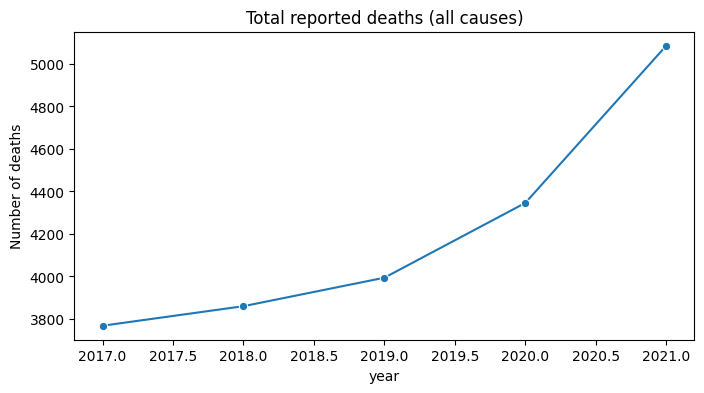

In [ ]:
#Exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns

total_per_year = df_long.groupby("year")["deaths"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=total_per_year, x="year", y="deaths", marker="o")
plt.title("Total reported deaths (all causes)")
plt.ylabel("Number of deaths")
plt.show()

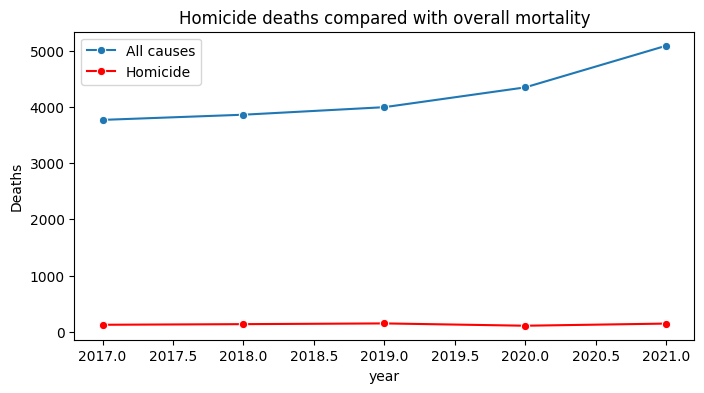

In [ ]:
#Homicide vs. total deaths
homicide_trend = df_long[df_long["cause_of_death"] == "homicide"]

plt.figure(figsize=(8,4))
sns.lineplot(data=total_per_year, x="year", y="deaths",
             label="All causes", marker="o")
sns.lineplot(data=homicide_trend, x="year", y="deaths",
             label="Homicide", marker="o", color="red")
plt.title("Homicide deaths compared with overall mortality")
plt.ylabel("Deaths")
plt.legend()
plt.show()

# [Conjunto de Datos] Preschool Education

Los conjuntos de datos fueron previamente limpiados en Excel

## Preparación de archivos

Los archivos fueron pre-procesados en Google Sheets, sin embargo
siempre se revisa la información general para validar la correcta ingesta de datos

In [ ]:
# Nos preparamos para usar los csv respectivos
base_url = 'https://drive.google.com/uc?export=download&id='

# PreSchoolEducation_Cleaned - Preschools by District.csv
preschools_district_path = base_url + '1J3sXDrK4imXNi_hwjeEfA7Z8cwvZoVUE'

# PreSchoolEducation_Cleaned - Number of Preschools by Management x District.csv
preschools_management_district_path = base_url + '1Rt4eJOHg5Sucg9WaFmcuHQTUi_AwJiFb'

# PreSchoolEducation_Cleaned - Number of Preschools by Management x UrbanRural.csv
preschools_management_urbanRural_path = base_url + '1MzTF0jR6XYTQDRSgCh1bkH7QdwcAODGV'

# PreSchoolEducation_Cleaned - Preschool Enrollment by Age,  District and Sex.csv
preschoolEnrollment_age_district_sex_path = base_url + '179RBmkqmUh9lHAAALwCgH9iDruTb5BoS'

# PreSchoolEducation_Cleaned - Preschool Enrolment by Management District and Urban-Rural.csv
preschoolEnrollment_management_district_urbanRural_path = base_url + '1cYojHXMywFZAto1gfudc3XIQVgVuj_4I'

# PreSchoolEducation_Cleaned - Preschool Enrolment by Sex and District.csv
preschoolEnrollment_sex_district_path = base_url + '1_2OdYk2VK_3mHnCwDbUd3y7EtYWEQYLN'

# PreSchoolEducation_Cleaned - Number of Males Enrolled in Preschools per 100 Females by District.csv
preschoolMalesEnrolledx100Females_district_path = base_url + '1CsBlEGbwMkwLz_pgdyFpequIdFeUWteq'

# PreSchoolEducation_Cleaned -  Preschool Teachers by Management and District.csv
preschoolTeachers_management_district_path = base_url + '1YrH6t_grZFCe4EtoyNpXB1xa7y2fzLMR'

# PreSchoolEducation_Cleaned - Number of Preschool Teachers by District.csv
preschoolTeachers_district_path = base_url + '1fZFFVtlHeJKSUi-qgnHumOceMrX1_i_l'

# PreSchoolEducation_Cleaned - Preschool Pupil-Teacher Ratio.csv
preschoolPupilxTeacherRatio_path = base_url + '13hFjfcIgMuMMS_GQPud8A5OrR-kUjcn8'


## Librerías necesarias para realizar EDA y configuraciones

In [ ]:
from IPython.display import display
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import seaborn as sns


pd.options.display.float_format = "{:.2f}".format

## Escuelas Prescolares por distrito

In [ ]:
# @title Estadísticas

df = pd.read_csv(preschools_district_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year district  number_preschools
count    60.00       60              60.00
unique     NaN        6                NaN
top        NaN   Toledo                NaN
freq       NaN       10                NaN
mean   2016.50      NaN              37.13
std       2.90      NaN               9.53
min    2012.00      NaN              24.00
25%    2014.00      NaN              30.00
50%    2016.50      NaN              35.00
75%    2019.00      NaN              43.25
max    2021.00      NaN              58.00

year     district  number_preschools
59  2012       Toledo                 26
58  2012  Stann Creek                 33
54  2012      Corozal                 36
55  2012  Orange Walk                 26
57  2012         Cayo                 39
56  2012       Belize                 53
48  2013      Corozal                 38
49  2013  Orange Walk                 25
52  2013  Stann Creek                 29
53  2013       Toledo                 29

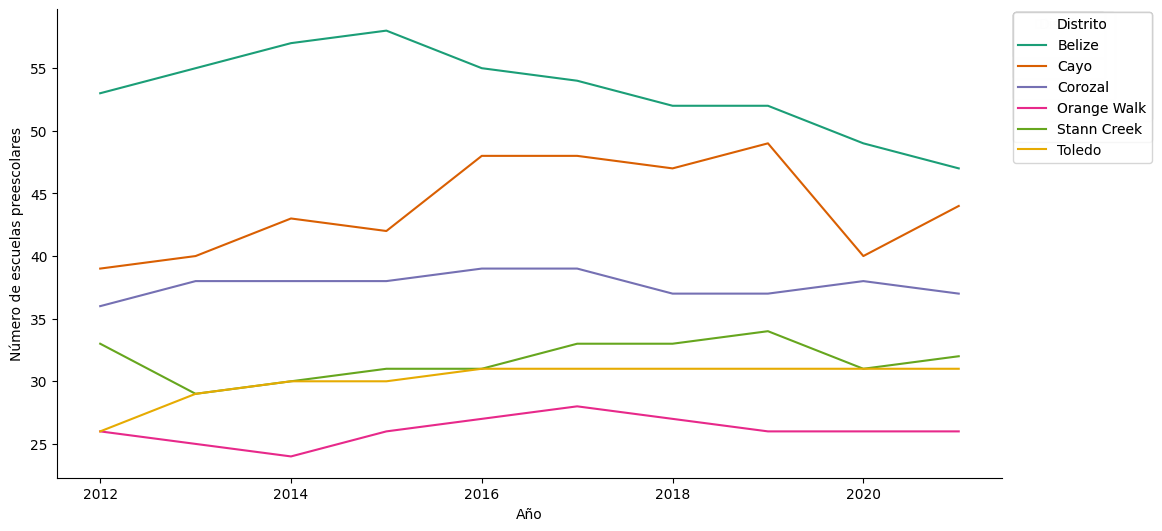

In [ ]:
# @title Evolución Anual de Escuelas Prescolares por Distrito

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['number_preschools']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
for i, (series_name, series) in enumerate(df.groupby('district')):
  _plot_series(series, series_name, i)
  fig.legend(title='Distrito', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Año')
_ = plt.ylabel('Número de escuelas preescolares')

## Escuelas Prescolares por tipo de administración y distrito

In [ ]:
# @title Estadísticas
df = pd.read_csv(preschools_management_district_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year      management     district  number_preschools
count   180.00             180          180             180.00
unique     NaN               3            6                NaN
top        NaN  denominational  Stann Creek                NaN
freq       NaN              60           30                NaN
mean   2016.50             NaN          NaN              11.13
std       2.88             NaN          NaN               8.16
min    2012.00             NaN          NaN               0.00
25%    2014.00             NaN          NaN               4.00
50%    2016.50             NaN          NaN              10.00
75%    2019.00             NaN          NaN              17.00
max    2021.00             NaN          NaN              27.00

year            management     district  number_preschools
178  2012        denominational  Stann Creek                 23
179  2012        denominational       Toledo                 21
165  2012  government_community         Cayo                  9
164  2012  government_community       Belize                 11
166  2012  government_community  Stann Creek                  7
167  2012  government_community       Toledo                  2
169  2012               private  Orange Walk                  5
168  2012               private      Corozal                  3
172  2012               private  Stann Creek                  3
173  2012               private       Toledo                  3

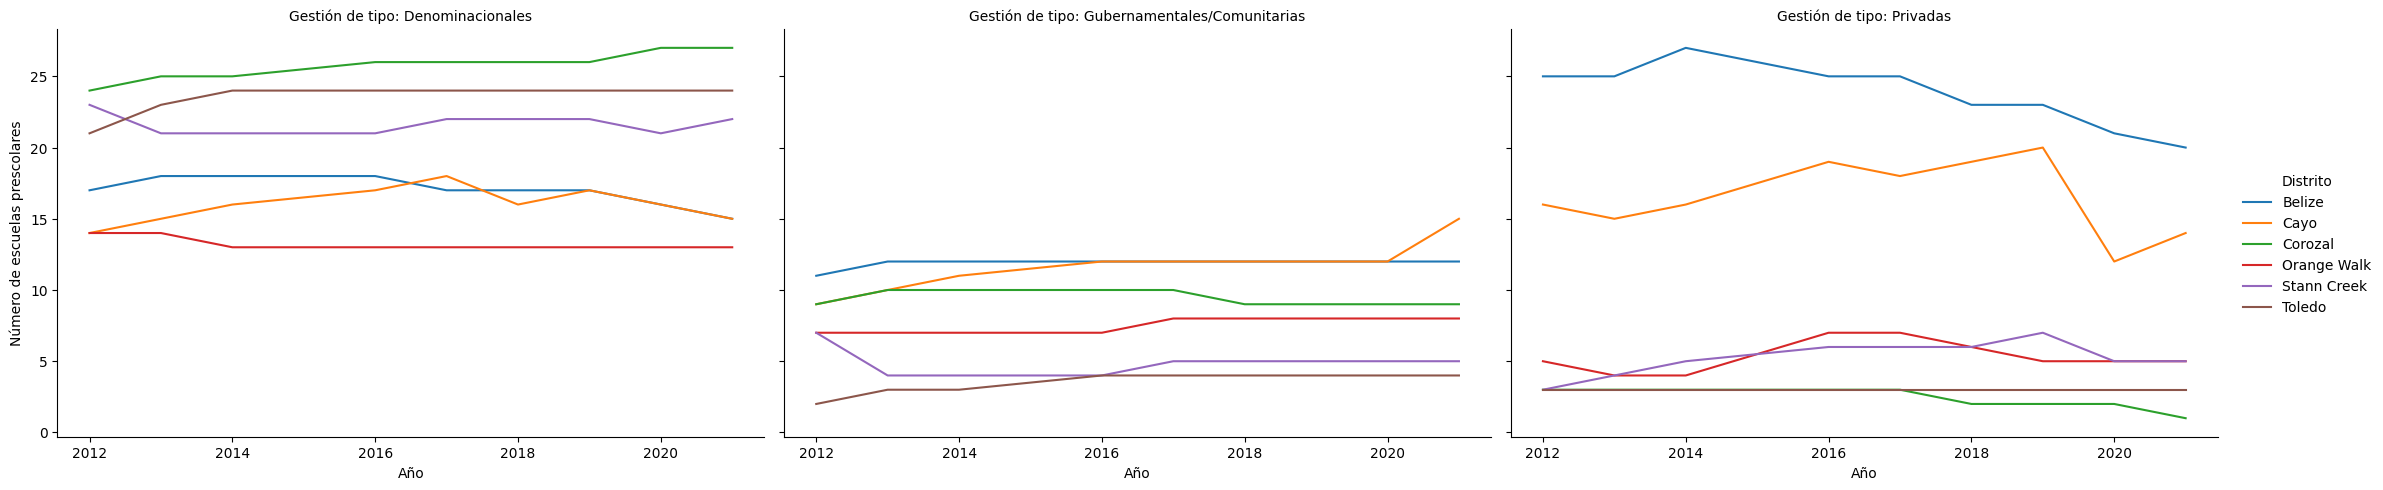

In [ ]:
# @title Evolución Anual de Escuelas Prescolares por Distrito y Gestión

col_name_dict = {
    'denominational': 'Denominacionales',
    'government_community': 'Gubernamentales/Comunitarias',
    'private': 'Privadas'
}

df['management_visual'] = df['management'].map(col_name_dict)

df_filtrado = df[df['year'] != 2015].copy() # No existen datos para el 2015

# Para ordenar los distritos alfabéticamente
orden_alfabetico_distritos = sorted(df_filtrado['district'].unique())

g = sns.relplot(
    data = df_filtrado,
    x = 'year',
    y = 'number_preschools',
    hue = 'district',
    hue_order = orden_alfabetico_distritos,
    col = 'management_visual',
    kind = 'line',
    height = 5,
    aspect = 1.5,
)

# Ajustes finales del gráfico
g.set_axis_labels('Año', 'Número de escuelas prescolares')
g._legend.set_title('Distrito')
g.set_titles(col_template="Gestión de tipo: {col_name}")

plt.show()

## Escuelas Prescolares por tipo de administración y zona (Urbana o Rural)

In [ ]:
# @title Estadísticas
df = pd.read_csv(preschools_management_urbanRural_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year      management rural_urban  number_preschools
count    60.00              60          60              60.00
unique     NaN               3           2                NaN
top        NaN  denominational       rural                NaN
freq       NaN              20          30                NaN
mean   2016.50             NaN         NaN              37.13
std       2.90             NaN         NaN              22.02
min    2012.00             NaN         NaN              11.00
25%    2014.00             NaN         NaN              17.00
50%    2016.50             NaN         NaN              36.00
75%    2019.00             NaN         NaN              41.00
max    2021.00             NaN         NaN              83.00

year            management rural_urban  number_preschools
59  2012        denominational       rural                 78
58  2012        denominational       urban                 35
54  2012  government_community       urban                 13
55  2012  government_community       rural                 32
57  2012               private       rural                 11
56  2012               private       urban                 44
48  2013  government_community       urban                 14
49  2013  government_community       rural                 32
52  2013        denominational       urban                 37
53  2013        denominational       rural                 79

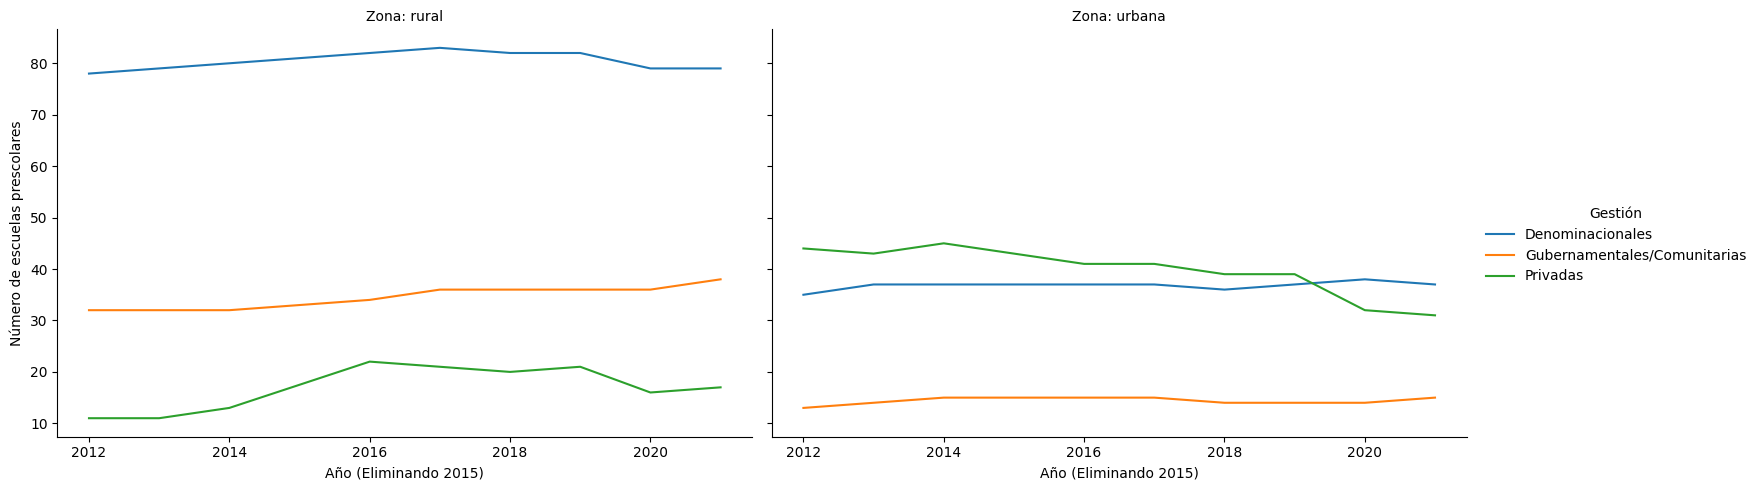

In [ ]:
# @title Evolución Anual de Escuelas Prescolares por Distrito y Zona

col_name_dict = {
    'denominational': 'Denominacionales',
    'government_community': 'Gubernamentales/Comunitarias',
    'private': 'Privadas'
}

col_name_dict2 = {
    'rural': 'rural',
    'urban': 'urbana'
}

df['management_visual'] = df['management'].map(col_name_dict)
df['rural_urban_visual'] = df['rural_urban'].map(col_name_dict2)

df_filtrado = df[df['year'] != 2015].copy() # No existen datos para el 2015

g = sns.relplot(
    data = df_filtrado,
    x = 'year',
    y = 'number_preschools',
    hue = 'management_visual',
    col = 'rural_urban_visual',
    kind = 'line',
    height = 5,
    aspect = 1.5,
)

# Ajustes finales del gráfico
g.set_axis_labels('Año (Eliminando 2015)', 'Número de escuelas prescolares')
g._legend.set_title('Gestión')
g.set_titles(col_template="Zona: {col_name}")

plt.show()

## Matrícula a escuelas preescolares por año, distrito y sexo

In [ ]:
# @title Estadísticas
df = pd.read_csv(preschoolEnrollment_age_district_sex_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year district     sex          age  preschool_enrollment
count   300.00      300     300          300                300.00
unique     NaN        6       2            5                   NaN
top        NaN   Toledo  female  more_than_5                   NaN
freq       NaN       50     150           60                   NaN
mean   2019.00      NaN     NaN          NaN                109.85
std       1.42      NaN     NaN          NaN                159.95
min    2017.00      NaN     NaN          NaN                  0.00
25%    2018.00      NaN     NaN          NaN                  3.00
50%    2019.00      NaN     NaN          NaN                 31.50
75%    2020.00      NaN     NaN          NaN                175.50
max    2021.00      NaN     NaN          NaN                791.00

year district     sex          age  preschool_enrollment
299  2017   Toledo  female  more_than_5                     4
298  2017   Toledo    male  more_than_5                     3
297  2017   Toledo  female            5                    15
296  2017   Toledo    male            5                    13
295  2017   Toledo  female            4                   261
294  2017   Toledo    male            4                   271
262  2017   Belize    male            3                   507
263  2017   Belize  female            3                   570
264  2017   Belize    male            4                   639
265  2017   Belize  female            4                   647

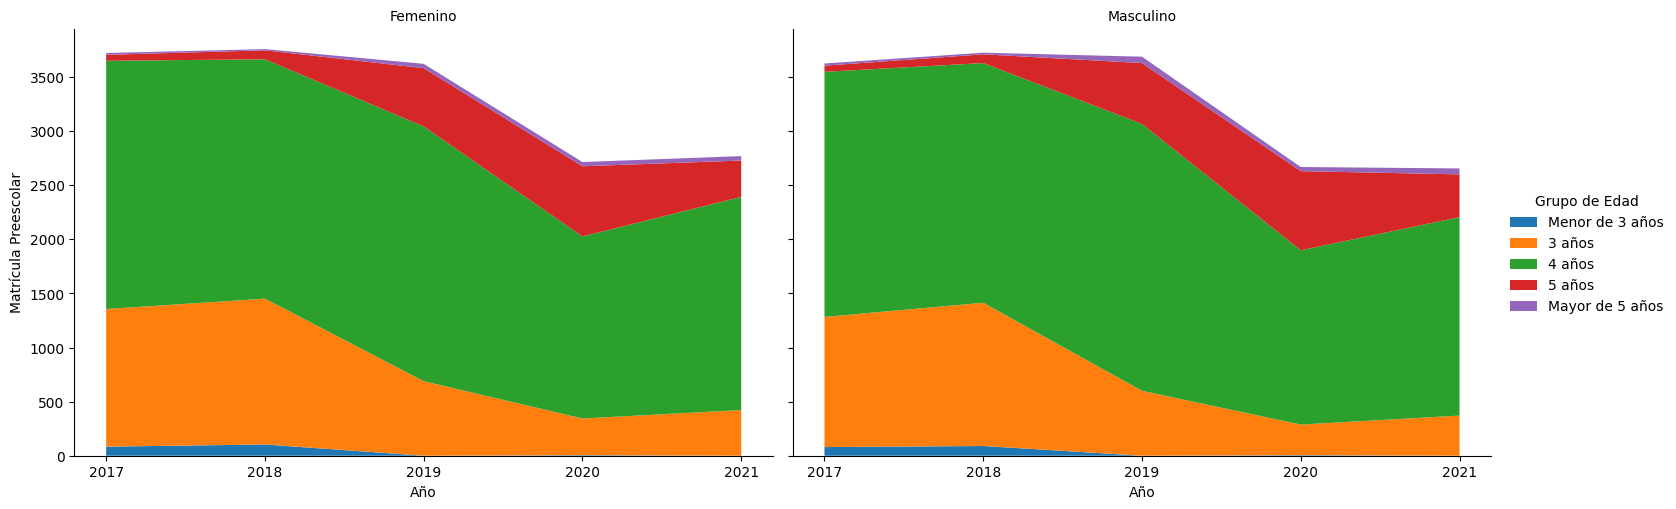

In [ ]:
# @title Composición de la Matrícula Preescolar por Edad a lo Largo del Tiempo

# Nombres visualmente agradables
col_name_dict = {
    'more_than_5': 'Mayor de 5 años',
    '5': '5 años',
    '4': '4 años',
    '3': '3 años',
    'less_than_3': 'Menor de 3 años'
}

# Nombres visualmente agradables
col_name_dict2 = {
    'female': 'Femenino',
    'male': 'Masculino'
}

# Creamos las columnas correspondientes
df['age_visual'] = df['age'].map(col_name_dict)
df['sex_visual'] = df['sex'].map(col_name_dict2)

def plot_area_chart(data, **kwargs):
    # Reestructuramos los datos para el gráfico de áreas
    df_pivot = pd.pivot_table(
        data,
        index='year',
        columns='age_visual',
        values='preschool_enrollment',
        aggfunc='sum'
    )

    # Ordenamos las columnas para que la leyenda y el apilado sean consistentes
    age_order = ['Menor de 3 años', '3 años', '4 años', '5 años', 'Mayor de 5 años']
    df_pivot = df_pivot.reindex(columns=age_order)

    # Obtenemos el eje actual donde Seaborn quiere que dibujemos
    ax = plt.gca()

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Dibujamos el gráfico de áreas apiladas en ese eje
    ax.stackplot(
        df_pivot.index,       # Eje X (años)
        df_pivot.T,           # Eje Y (datos de cada grupo de edad, transpuestos)
        labels=df_pivot.columns,
    )

# Usamos un FacetGrid
g = sns.FacetGrid(
    df,
    col='sex_visual',
    height=5,
    aspect=1.5,
)

# Mapeamos usando nuestra función
g.map_dataframe(plot_area_chart)


# Últimos ajustes
g.add_legend(title='Grupo de Edad')
g.set_axis_labels('Año', 'Matrícula Preescolar')
g.set_titles(col_template="{col_name}")

plt.show()

## Matrícula a escuelas preescolares por administración, distrito y zona

In [ ]:
# @title Estadísticas
df = pd.read_csv(preschoolEnrollment_management_district_urbanRural_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year district rural_urban      management  preschool_enrollment
count   180.00      180         180             180                180.00
unique     NaN        6           2               3                   NaN
top        NaN   Belize       urban  denominational                   NaN
freq       NaN       30          90              60                   NaN
mean   2019.00      NaN         NaN             NaN                183.09
std       1.42      NaN         NaN             NaN                202.19
min    2017.00      NaN         NaN             NaN                  0.00
25%    2018.00      NaN         NaN             NaN                 58.75
50%    2019.00      NaN         NaN             NaN                143.00
75%    2020.00      NaN         NaN             NaN                235.50
max    2021.00      NaN         NaN             NaN               1281.00

year     district rural_urban            management  preschool_enrollment
160  2017       Belize       urban        denominational                   418
161  2017       Belize       rural        denominational                   152
162  2017         Cayo       urban  government_community                   254
163  2017         Cayo       rural  government_community                   285
164  2017         Cayo       urban               private                   229
165  2017         Cayo       rural               private                   145
166  2017         Cayo       urban        denominational                   212
167  2017         Cayo       rural        denominational                   353
168  2017  Stann Creek       urban  government_community                    52
169  2017  Stann Creek       rural  government_community                   113

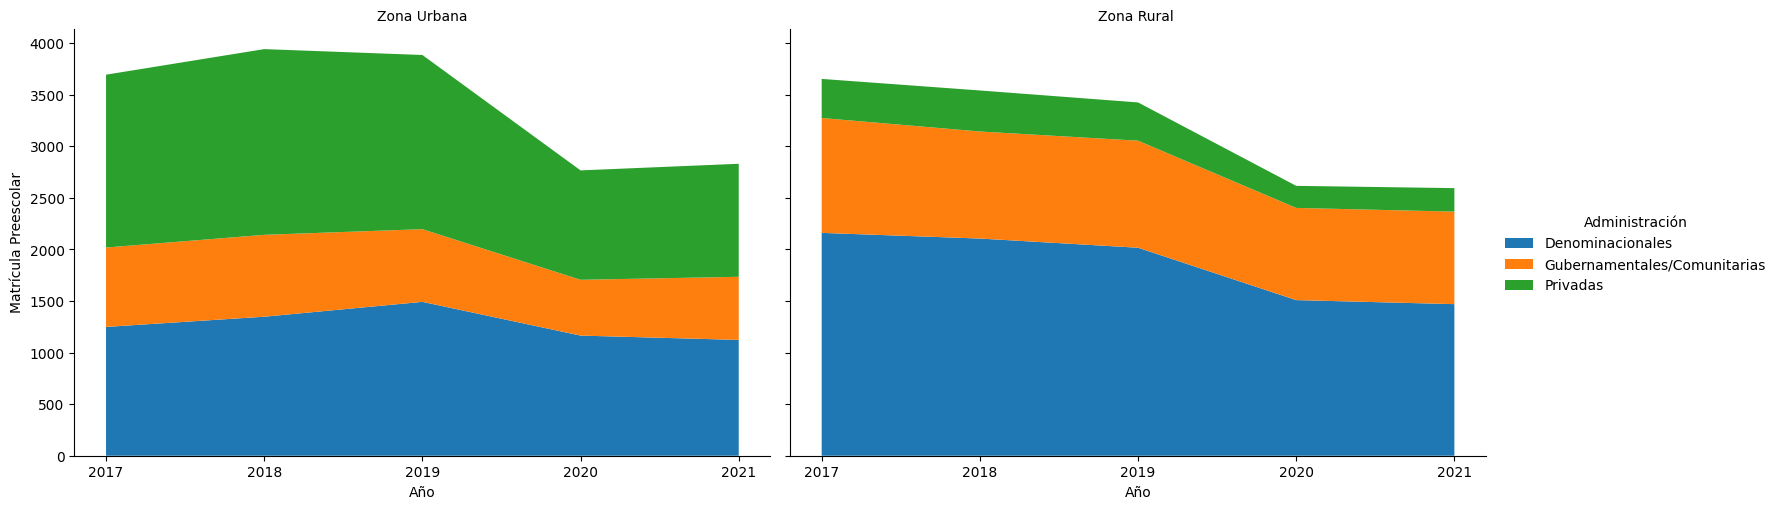

In [ ]:
# @title Composición de la Matrícula Preescolar por administración (Zona)

# Nombres visualmente agradables
col_name_dict = {
    'denominational': 'Denominacionales',
    'government_community': 'Gubernamentales/Comunitarias',
    'private': 'Privadas'
}

# Nombres visualmente agradables
col_name_dict2 = {
    'urban': 'Urbana',
    'rural': 'Rural '
}

# Creamos las columnas correspondientes
df['management_visual'] = df['management'].map(col_name_dict)
df['rural_urban_visual'] = df['rural_urban'].map(col_name_dict2)

def plot_area_chart(data, **kwargs):
    # Reestructuramos los datos para el gráfico de áreas
    df_pivot = pd.pivot_table(
        data,
        index='year',
        columns='management_visual',
        values='preschool_enrollment',
        aggfunc='sum'
    )

    # Ordenamos las columnas para que la leyenda y el apilado sean consistentes
    management_order = ['Denominacionales', 'Gubernamentales/Comunitarias', 'Privadas']
    df_pivot = df_pivot.reindex(columns=management_order)

    # Obtenemos el eje actual donde Seaborn quiere que dibujemos
    ax = plt.gca()

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Dibujamos el gráfico de áreas apiladas en ese eje
    ax.stackplot(
        df_pivot.index,    # Eje X (años)
        df_pivot.T,        # Eje Y (datos de cada grupo de administración, transpuestos)
        labels=df_pivot.columns,
    )

# Usamos un FacetGrid
g = sns.FacetGrid(
    df,
    col='rural_urban_visual',
    height=5,
    aspect=1.5,
)

# Mapeamos usando nuestra función
g.map_dataframe(plot_area_chart)


# Últimos ajustes
g.add_legend(title='Administración')
g.set_axis_labels('Año', 'Matrícula Preescolar')
g.set_titles(col_template="Zona {col_name}")

plt.show()

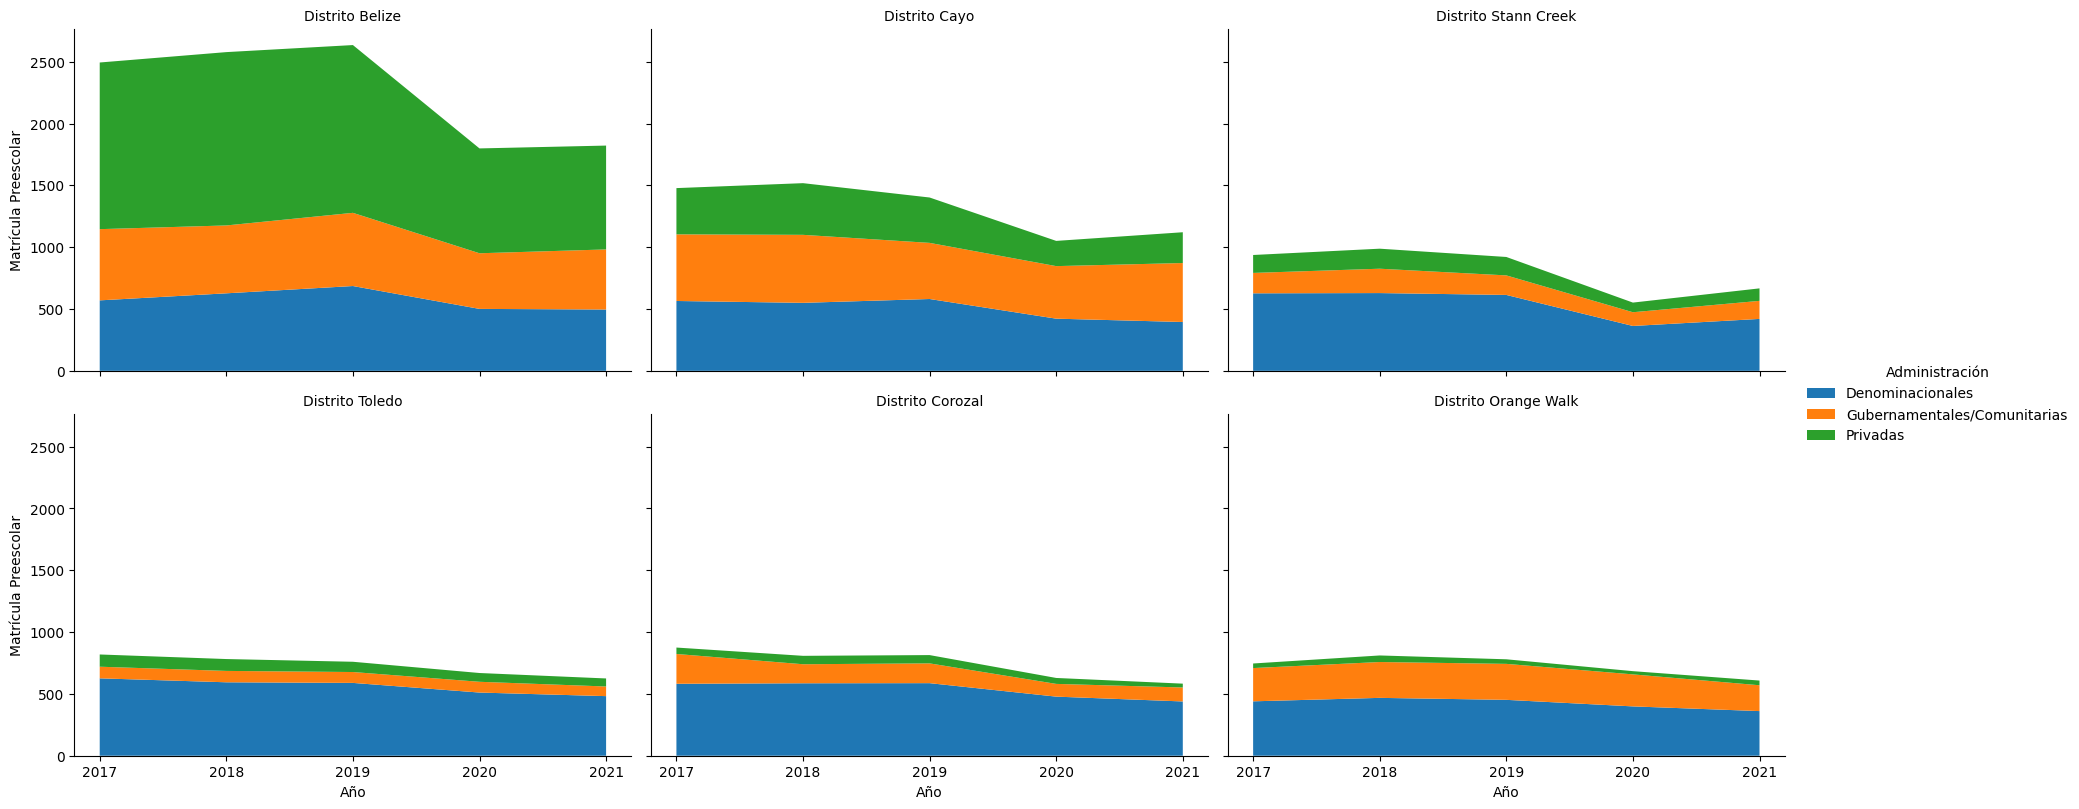

In [ ]:
# @title Composición de la Matrícula Preescolar por administración (Distrito)

g = sns.FacetGrid(
    df,
    col='district',
    col_wrap=3,
    height=4,
    aspect=1.5,
)

# Mapeamos usando nuestra función
g.map_dataframe(plot_area_chart)


# Últimos ajustes
g.add_legend(title='Administración')
g.set_axis_labels('Año', 'Matrícula Preescolar')
g.set_titles(col_template="Distrito {col_name}")

plt.show()

## Matrícula a escuelas preescolares por sexo y distrito

In [ ]:
# @title Estadísticas
df = pd.read_csv(preschoolEnrollment_sex_district_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year     district   sex  preschool_enrollment
count    60.00           60    60                 60.00
unique     NaN            6     2                   NaN
top        NaN  Stann Creek  male                   NaN
freq       NaN           10    30                   NaN
mean   2019.00          NaN   NaN                549.27
std       1.43          NaN   NaN                300.30
min    2017.00          NaN   NaN                264.00
25%    2018.00          NaN   NaN                349.50
50%    2019.00          NaN   NaN                420.50
75%    2020.00          NaN   NaN                692.50
max    2021.00          NaN   NaN               1321.00

year     district     sex  preschool_enrollment
56  2017  Stann Creek    male                   464
57  2017  Stann Creek  female                   473
58  2017       Toledo    male                   405
59  2017       Toledo  female                   414
48  2017      Corozal    male                   430
49  2017      Corozal  female                   445
50  2017  Orange Walk    male                   383
51  2017  Orange Walk  female                   363
52  2017       Belize    male                  1210
53  2017       Belize  female                  1284

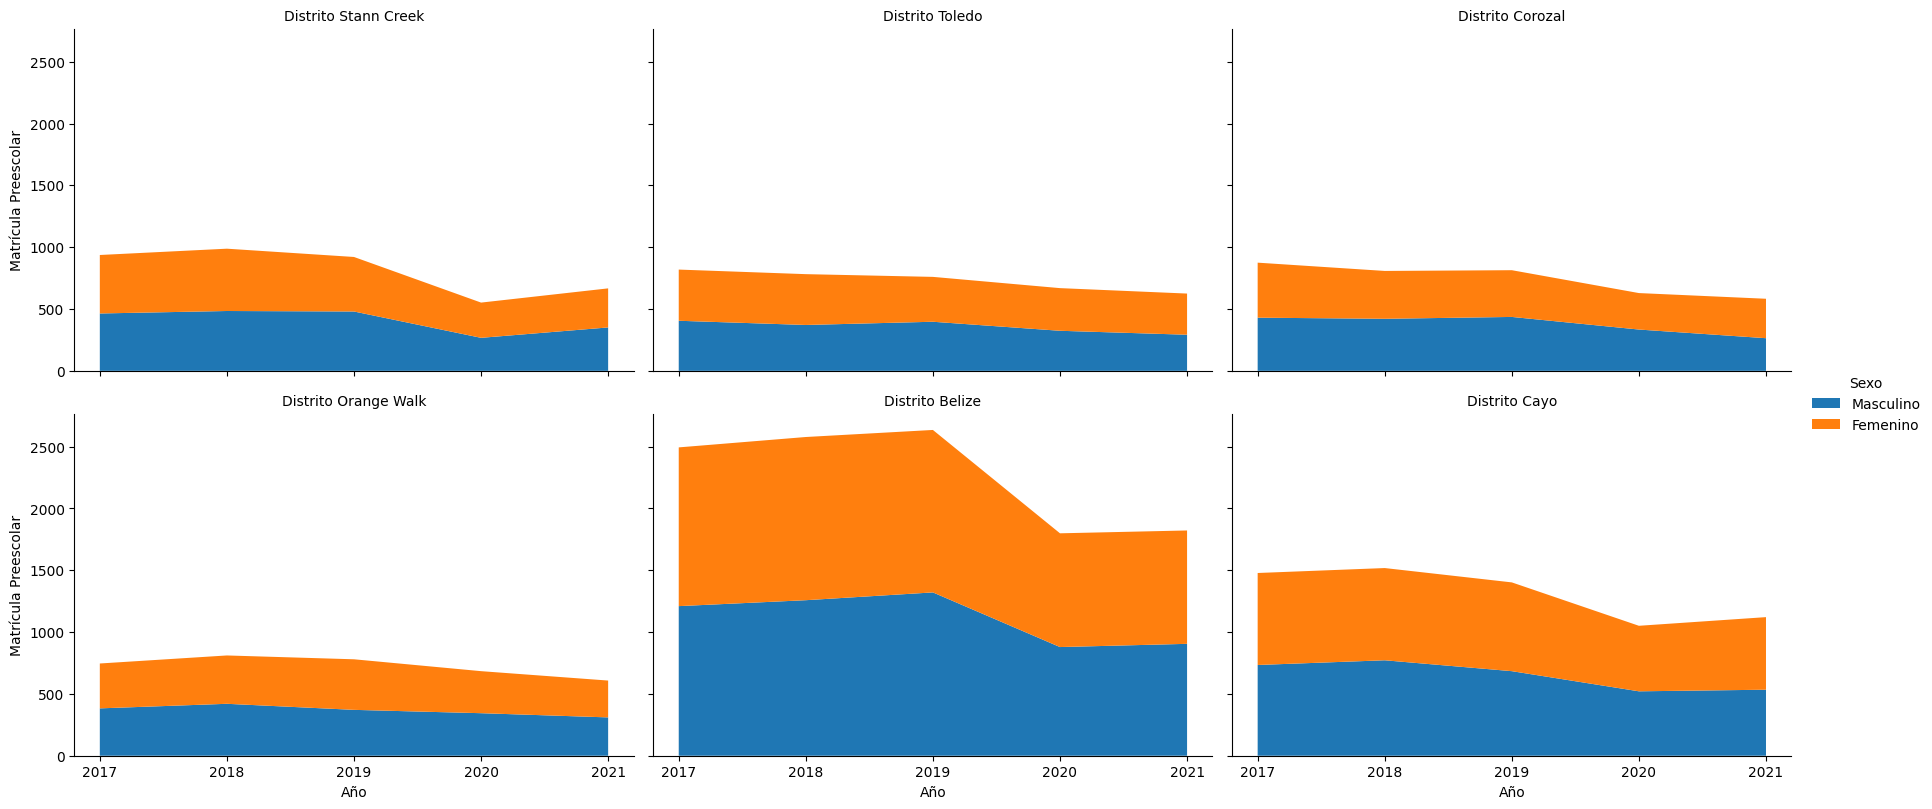

In [ ]:
# @title Composición de la Matrícula Preescolar por sexo


# Nombres visualmente agradables
col_name_dict = {
    'male': 'Masculino',
    'female': 'Femenino'
}

# Creamos las columnas correspondientes
df['sex_visual'] = df['sex'].map(col_name_dict)

def plot_area_chart(data, **kwargs):
    # Reestructuramos los datos para el gráfico de áreas
    df_pivot = pd.pivot_table(
        data,
        index='year',
        columns='sex_visual',
        values='preschool_enrollment',
        aggfunc='sum'
    )

    # Ordenamos las columnas para que la leyenda y el apilado sean consistentes
    sex_order = ['Masculino', 'Femenino']
    df_pivot = df_pivot.reindex(columns=sex_order)

    # Obtenemos el eje actual donde Seaborn quiere que dibujemos
    ax = plt.gca()

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Dibujamos el gráfico de áreas apiladas en ese eje
    ax.stackplot(
        df_pivot.index,    # Eje X (años)
        df_pivot.T,        # Eje Y (datos de cada grupo de sexo, transpuestos)
        labels=df_pivot.columns,
    )

# Usamos un FacetGrid
g = sns.FacetGrid(
    df,
    col='district',
    col_wrap=3,
    height=4,
    aspect=1.5,
)

# Mapeamos usando nuestra función
g.map_dataframe(plot_area_chart)


# Últimos ajustes
g.add_legend(title='Sexo')
g.set_axis_labels('Año', 'Matrícula Preescolar')
g.set_titles(col_template="Distrito {col_name}")

plt.show()

## Matrículas a escuelas prescolares de hombres por cada 100 mujeres por distrito

In [ ]:
# @title Estadísticas
df = pd.read_csv(preschoolMalesEnrolledx100Females_district_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year     district  males_enrrolx100_females
count    30.00           30                     30.00
unique     NaN            6                       NaN
top        NaN  Stann Creek                       NaN
freq       NaN            5                       NaN
mean   2019.00          NaN                     99.47
std       1.44          NaN                      7.81
min    2017.00          NaN                     83.00
25%    2018.00          NaN                     94.25
50%    2019.00          NaN                     98.00
75%    2020.00          NaN                    105.50
max    2021.00          NaN                    115.00

year     district  males_enrrolx100_females
28  2017  Stann Creek                        98
29  2017       Toledo                        98
24  2017      Corozal                        97
25  2017  Orange Walk                       106
26  2017       Belize                        94
27  2017         Cayo                        99
18  2018      Corozal                       109
19  2018  Orange Walk                       107
22  2018  Stann Creek                        96
23  2018       Toledo                        90

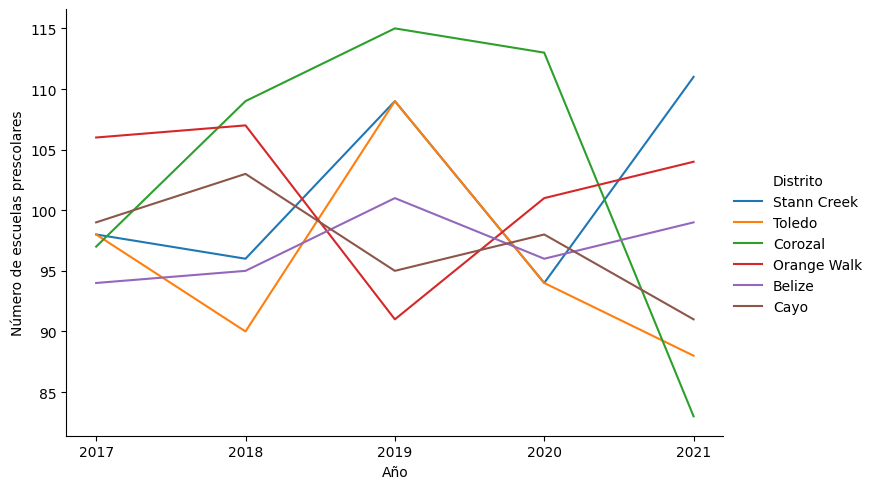

In [ ]:
# @title Matrículas a escuelas prescolares de hombres por cada 100 mujeres por distrito

df_filtrado = df[df['year'] != 2015].copy() # No existen datos para el 2015

g = sns.relplot(
    data = df_filtrado,
    x = 'year',
    y = 'males_enrrolx100_females',
    hue = 'district',
    kind = 'line',
    height = 5,
    aspect = 1.5,
)

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Ajustes finales del gráfico
g.set_axis_labels('Año', 'Hombres por cada 100 mujeres matriculadas')
g._legend.set_title('Distrito')

plt.show()

## Profesores(as) preescolares por administración y distrito

In [ ]:
# @title Estadísticas
df = pd.read_csv(preschoolTeachers_management_district_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year district      management  preschool_enrollment
count    90.00       90              90                 90.00
unique     NaN        6               3                   NaN
top        NaN   Belize  denominational                   NaN
freq       NaN       15              30                   NaN
mean   2019.00      NaN             NaN                 22.97
std       1.42      NaN             NaN                 16.66
min    2017.00      NaN             NaN                  2.00
25%    2018.00      NaN             NaN                  9.00
50%    2019.00      NaN             NaN                 22.00
75%    2020.00      NaN             NaN                 34.00
max    2021.00      NaN             NaN                 82.00

year     district            management  preschool_enrollment
80  2017       Belize        denominational                    38
81  2017         Cayo  government_community                    25
82  2017         Cayo               private                    34
83  2017         Cayo        denominational                    28
84  2017  Stann Creek  government_community                     9
85  2017  Stann Creek               private                    13
86  2017  Stann Creek        denominational                    37
87  2017       Toledo  government_community                     5
72  2017      Corozal  government_community                    12
73  2017      Corozal               private                     4

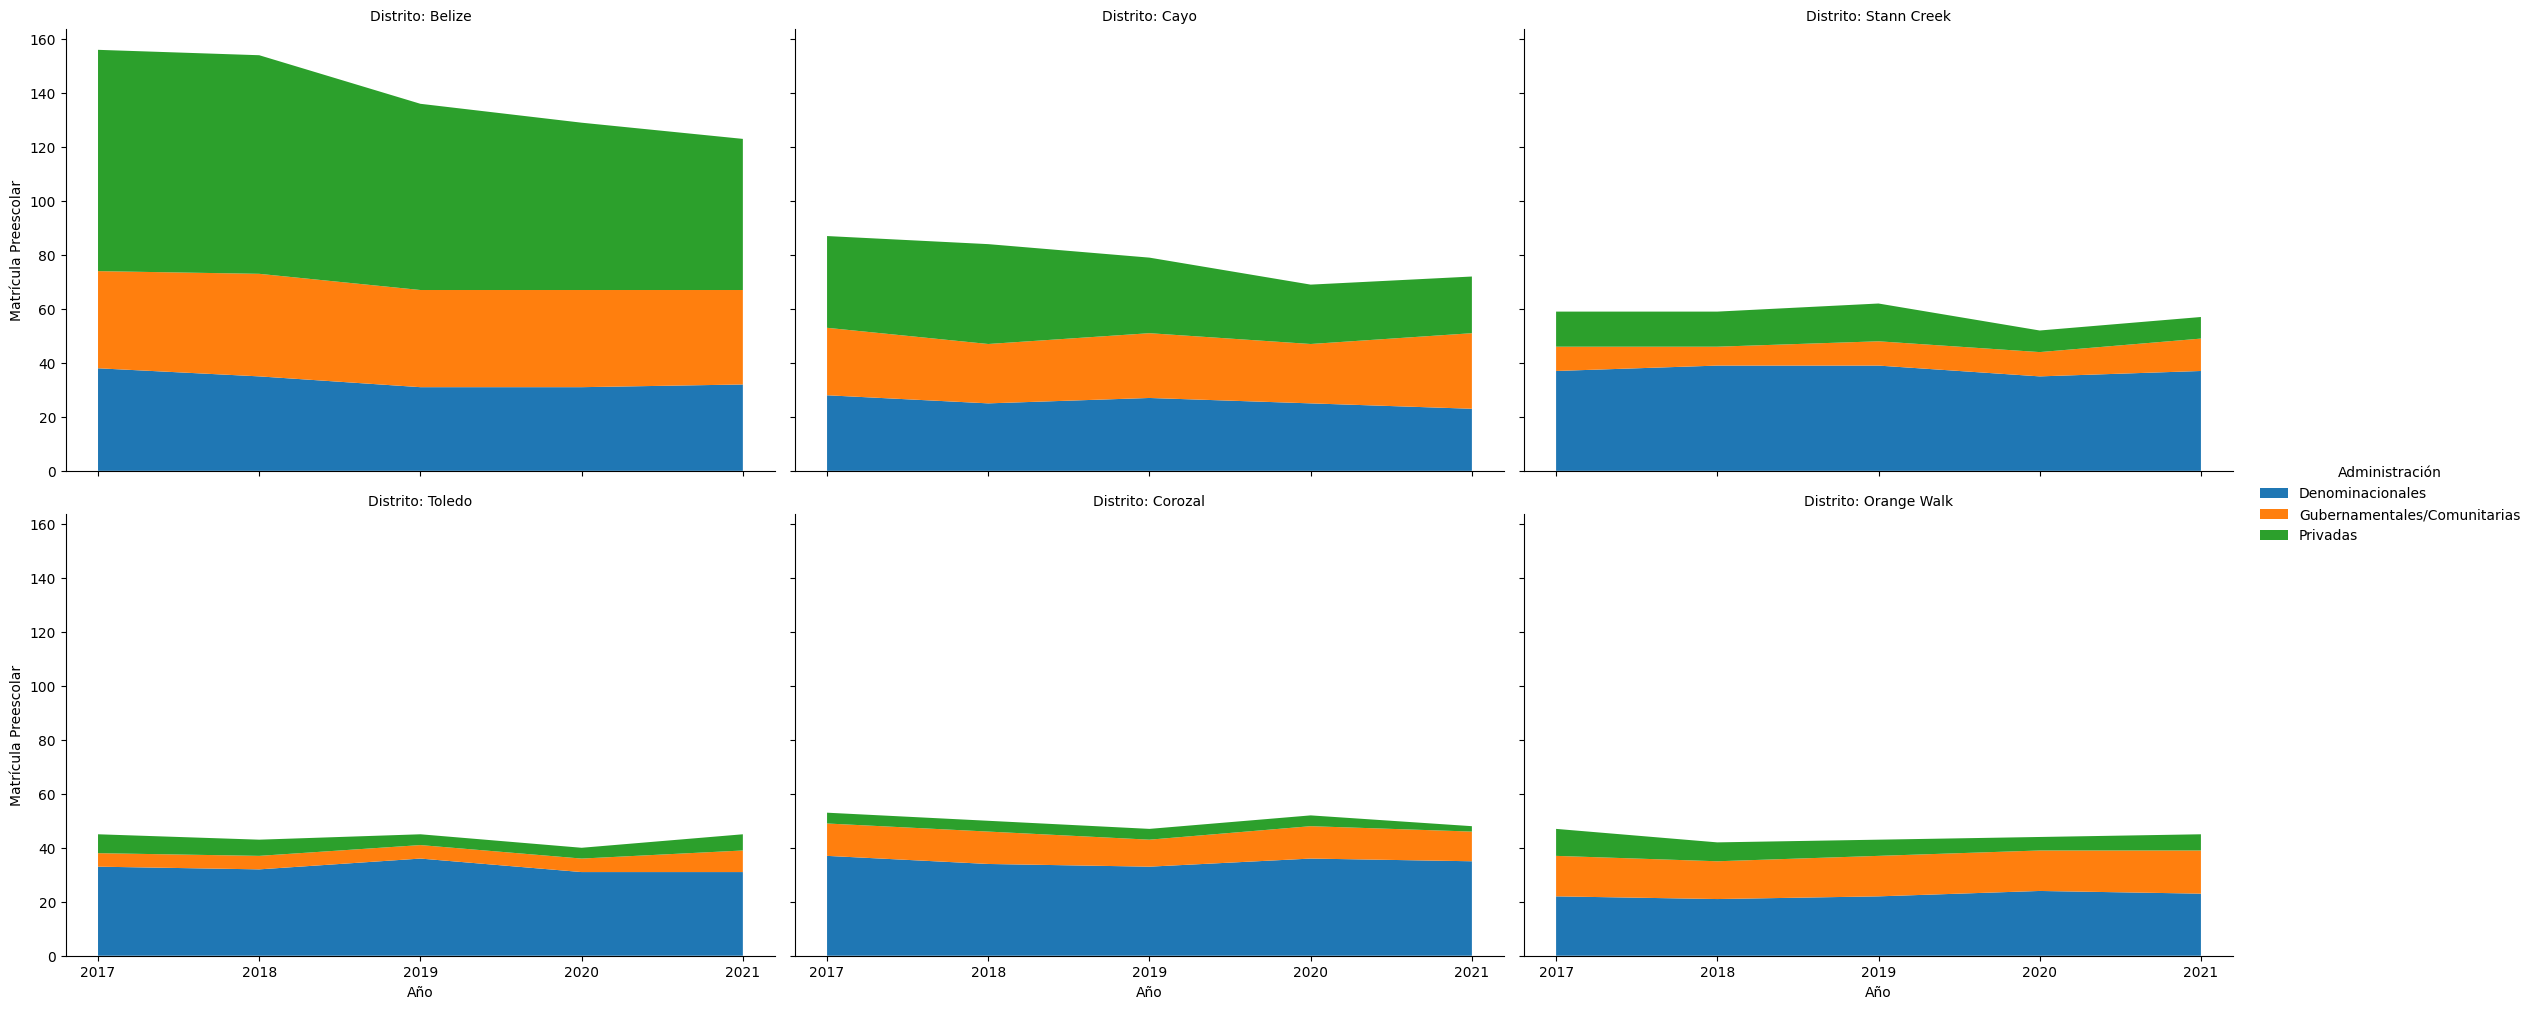

In [ ]:
# @title Composición de la Matrícula Preescolar por administración (Zona)

# Nombres visualmente agradables
col_name_dict = {
    'denominational': 'Denominacionales',
    'government_community': 'Gubernamentales/Comunitarias',
    'private': 'Privadas'
}

# Creamos las columnas correspondientes
df['management_visual'] = df['management'].map(col_name_dict)

def plot_area_chart(data, **kwargs):
    # Reestructuramos los datos para el gráfico de áreas
    df_pivot = pd.pivot_table(
        data,
        index='year',
        columns='management_visual',
        values='preschool_enrollment',
        aggfunc='sum'
    )

    # Ordenamos las columnas para que la leyenda y el apilado sean consistentes
    management_order = ['Denominacionales', 'Gubernamentales/Comunitarias', 'Privadas']
    df_pivot = df_pivot.reindex(columns=management_order)

    # Obtenemos el eje actual donde Seaborn quiere que dibujemos
    ax = plt.gca()

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Dibujamos el gráfico de áreas apiladas en ese eje
    ax.stackplot(
        df_pivot.index,    # Eje X (años)
        df_pivot.T,        # Eje Y (datos de cada grupo de administración, transpuestos)
        labels=df_pivot.columns,
    )

# Usamos un FacetGrid
g = sns.FacetGrid(
    df,
    col='district',
    col_wrap=3,
    height=5,
    aspect=1.5,
)

# Mapeamos usando nuestra función
g.map_dataframe(plot_area_chart)


# Últimos ajustes
g.add_legend(title='Administración')
g.set_axis_labels('Año', 'Matrícula Preescolar')
g.set_titles(col_template="Distrito: {col_name}")

plt.show()

## Profesores(as) preescolares por distrito

In [ ]:
# @title Estadísticas
df = pd.read_csv(preschoolTeachers_district_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year     district  number_teachers
count    30.00           30            30.00
unique     NaN            6              NaN
top        NaN  Stann Creek              NaN
freq       NaN            5              NaN
mean   2019.00          NaN            68.90
std       1.44          NaN            34.89
min    2017.00          NaN            40.00
25%    2018.00          NaN            45.00
50%    2019.00          NaN            52.50
75%    2020.00          NaN            77.25
max    2021.00          NaN           156.00

year     district  number_teachers
28  2017  Stann Creek               59
29  2017       Toledo               45
24  2017      Corozal               53
25  2017  Orange Walk               47
26  2017       Belize              156
27  2017         Cayo               87
18  2018      Corozal               50
19  2018  Orange Walk               42
22  2018  Stann Creek               59
23  2018       Toledo               43

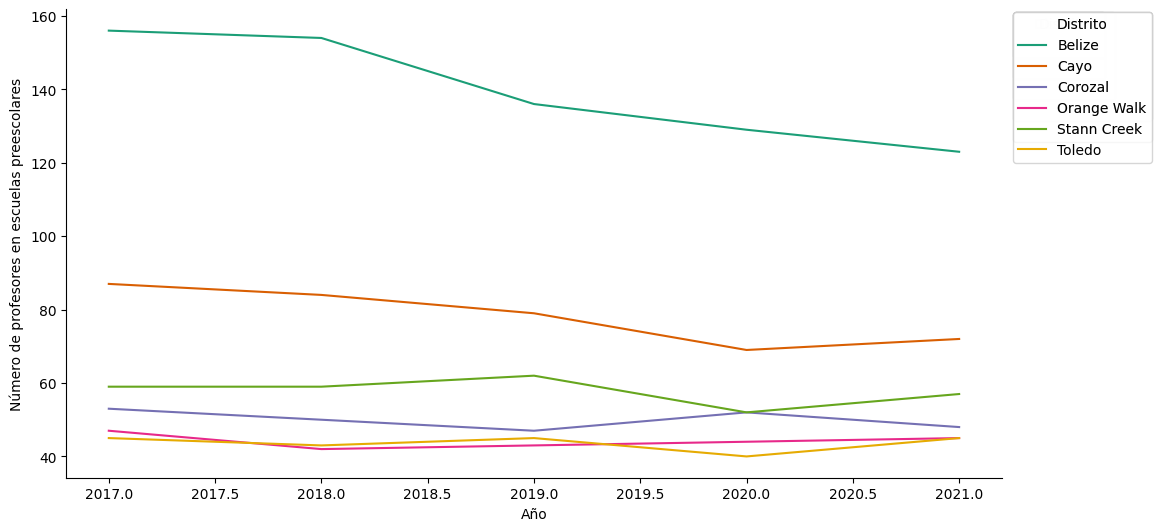

In [ ]:
# @title Evolución Anual de Profesores de Escuelas Prescolares por Distrito

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['number_teachers']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
for i, (series_name, series) in enumerate(df.groupby('district')):
  _plot_series(series, series_name, i)
  fig.legend(title='Distrito', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Año')
_ = plt.ylabel('Número de profesores en escuelas preescolares')

## Evolución Anual de Proporción Estudiantes x Profesor

In [ ]:
# @title Estadísticas
df = pd.read_csv(preschoolPupilxTeacherRatio_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year     district  pupil_teacher_ratio
count    30.00           30                30.00
unique     NaN            6                  NaN
top        NaN  Stann Creek                  NaN
freq       NaN            5                  NaN
mean   2019.00          NaN                15.90
std       1.44          NaN                 2.14
min    2017.00          NaN                11.00
25%    2018.00          NaN                15.00
50%    2019.00          NaN                16.00
75%    2020.00          NaN                17.00
max    2021.00          NaN                19.00

year     district  pupil_teacher_ratio
28  2017  Stann Creek                   16
29  2017       Toledo                   18
24  2017      Corozal                   17
25  2017  Orange Walk                   16
26  2017       Belize                   16
27  2017         Cayo                   17
18  2018      Corozal                   16
19  2018  Orange Walk                   19
22  2018  Stann Creek                   17
23  2018       Toledo                   18

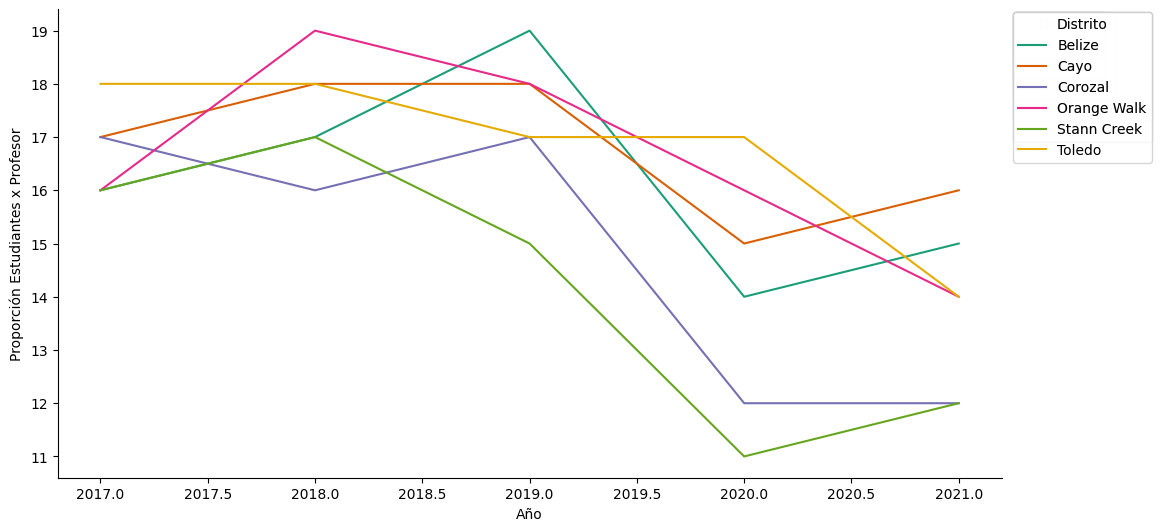

In [ ]:
# @title Evolución Anual de Proporción Estudiantes x Profesor

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['pupil_teacher_ratio']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
for i, (series_name, series) in enumerate(df.groupby('district')):
  _plot_series(series, series_name, i)
  fig.legend(title='Distrito', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Año')
_ = plt.ylabel('Proporción Estudiantes x Profesor')

## Escuelas prescolares por administración y área

In [ ]:
# @title Estadísticas
df = pd.read_csv(preschools_management_urbanRural_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year      management rural_urban  number_preschools
count    60.00              60          60              60.00
unique     NaN               3           2                NaN
top        NaN  denominational       rural                NaN
freq       NaN              20          30                NaN
mean   2016.50             NaN         NaN              37.13
std       2.90             NaN         NaN              22.02
min    2012.00             NaN         NaN              11.00
25%    2014.00             NaN         NaN              17.00
50%    2016.50             NaN         NaN              36.00
75%    2019.00             NaN         NaN              41.00
max    2021.00             NaN         NaN              83.00

year            management rural_urban  number_preschools
59  2012        denominational       rural                 78
58  2012        denominational       urban                 35
54  2012  government_community       urban                 13
55  2012  government_community       rural                 32
57  2012               private       rural                 11
56  2012               private       urban                 44
48  2013  government_community       urban                 14
49  2013  government_community       rural                 32
52  2013        denominational       urban                 37
53  2013        denominational       rural                 79

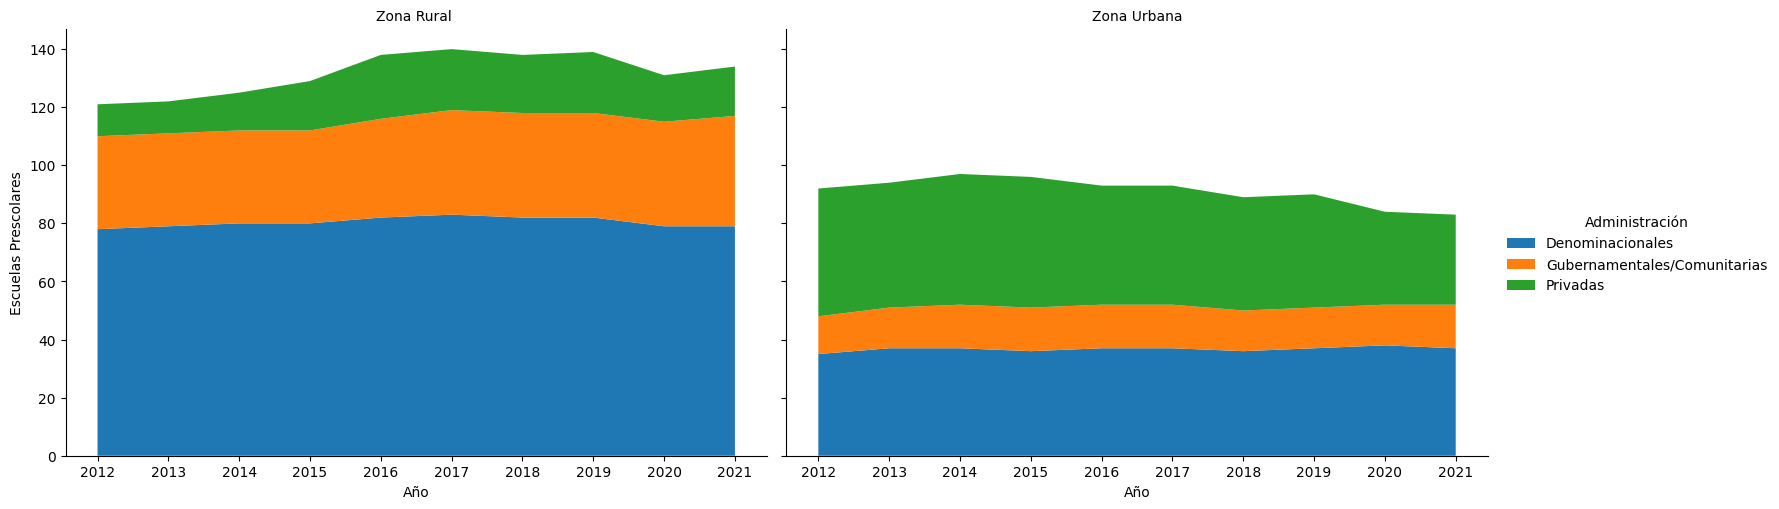

In [ ]:
# @title Escuelas prescolares por administración y área

# Nombres visualmente agradables
col_name_dict = {
    'denominational': 'Denominacionales',
    'government_community': 'Gubernamentales/Comunitarias',
    'private': 'Privadas'
}

# Nombres visualmente agradables
col_name_dict2 = {
    'urban': 'Urbana',
    'rural': 'Rural '
}

# Creamos las columnas correspondientes
df['management_visual'] = df['management'].map(col_name_dict)
df['rural_urban_visual'] = df['rural_urban'].map(col_name_dict2)

def plot_area_chart(data, **kwargs):
    # Reestructuramos los datos para el gráfico de áreas
    df_pivot = pd.pivot_table(
        data,
        index='year',
        columns='management_visual',
        values='number_preschools',
        aggfunc='sum'
    )

    # Ordenamos las columnas para que la leyenda y el apilado sean consistentes
    management_order = ['Denominacionales', 'Gubernamentales/Comunitarias', 'Privadas']
    df_pivot = df_pivot.reindex(columns=management_order)

    # Obtenemos el eje actual donde Seaborn quiere que dibujemos
    ax = plt.gca()

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Dibujamos el gráfico de áreas apiladas en ese eje
    ax.stackplot(
        df_pivot.index,    # Eje X (años)
        df_pivot.T,        # Eje Y (datos de cada grupo de administración, transpuestos)
        labels=df_pivot.columns,
    )

# Usamos un FacetGrid
g = sns.FacetGrid(
    df,
    col='rural_urban_visual',
    height=5,
    aspect=1.5,
)

# Mapeamos usando nuestra función
g.map_dataframe(plot_area_chart)


# Últimos ajustes
g.add_legend(title='Administración')
g.set_axis_labels('Año', 'Escuelas Prescolares')
g.set_titles(col_template="Zona {col_name}")

plt.show()

# [Conjunto de Datos] Secondary Education

## Preparación de archivos

Los archivos fueron pre-procesados en Google Sheets, sin embargo
siempre se revisa la información general para validar la correcta ingesta de datos

In [ ]:
# Nos preparamos para usar los csv respectivos
base_url = 'https://drive.google.com/uc?export=download&id='

# SecondaryEducation_CLEANED - secondary_district.csv
secondary_district_path = base_url + '18aQ87Fo4VoaGuoZR9e20BFaDkm9gTA2J'

# SecondaryEducation_CLEANED - secondary_management_urbanRural.csv
secondary_management_urbanRural_path = base_url + '1XUt8mWhCVuc-LLQxFoDw1zxDQnT3SzIm'

# SecondaryEducation_CLEANED - secondaryTeachers_district.csv
secondaryTeachers_district_path = base_url + '1L4uecvYKDKZYNyi_ggZdGgnzWyZM0nhR'

# SecondaryEducation_CLEANED - secondaryCompletion_sex.csv
secondaryCompletion_sex_path = base_url + '1HN-bUjXFFanOHN7AtNduvDuuN-lY9cmi'

## Librerías necesarias para realizar EDA y configuraciones

In [ ]:
from IPython.display import display
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import seaborn as sns


pd.options.display.float_format = "{:.2f}".format

## Escuelas Secundarias por Distrito

In [ ]:
# @title Estadísticas
df = pd.read_csv(secondary_district_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year     district  number_secondary_by_district
count    30.00           30                         30.00
unique     NaN            6                           NaN
top        NaN  Stann Creek                           NaN
freq       NaN            5                           NaN
mean   2019.00          NaN                         10.17
std       1.44          NaN                          5.33
min    2017.00          NaN                          6.00
25%    2018.00          NaN                          6.00
50%    2019.00          NaN                          7.00
75%    2020.00          NaN                         17.00
max    2021.00          NaN                         18.00

year     district  number_secondary_by_district
28  2017  Stann Creek                             6
29  2017       Toledo                             6
24  2017      Corozal                             6
25  2017  Orange Walk                             7
26  2017       Belize                            18
27  2017         Cayo                            16
18  2018      Corozal                             6
19  2018  Orange Walk                             8
22  2018  Stann Creek                             6
23  2018       Toledo                             6

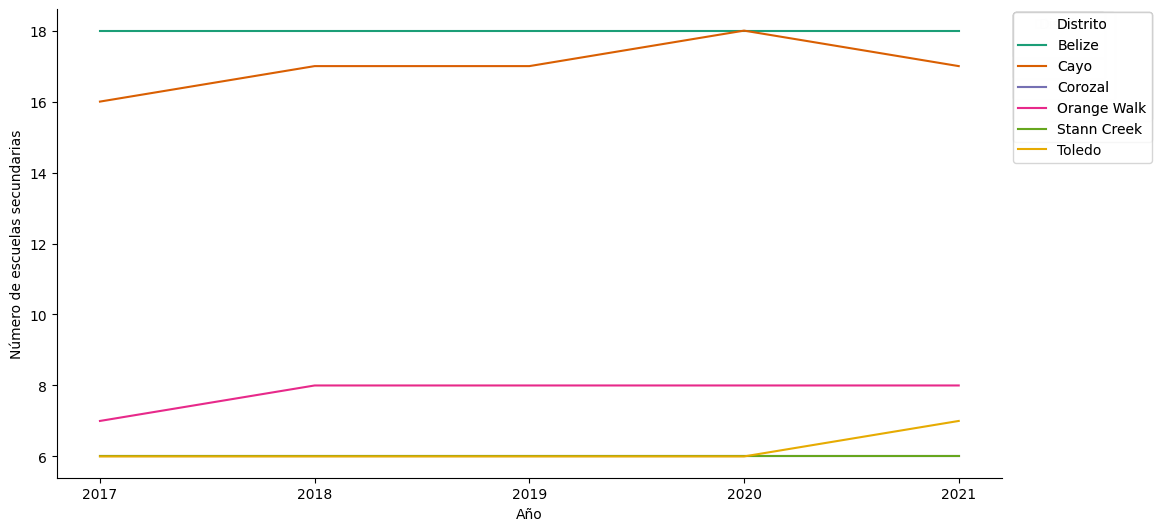

In [ ]:
# @title Escuelas Secundarias por Distrito

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['number_secondary_by_district']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])



fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
for i, (series_name, series) in enumerate(df.groupby('district')):
  _plot_series(series, series_name, i)
  fig.legend(title='Distrito', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Año')
_ = plt.ylabel('Número de escuelas secundarias')

## Escuelas Secundarias por Administración y Zona

In [ ]:
# @title Estadísticas
df = pd.read_csv(secondary_management_urbanRural_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year rural_urban        management  number_secondary
count    30.00          30                30             30.00
unique     NaN           2                 3               NaN
top        NaN       rural  government_aided               NaN
freq       NaN          15                10               NaN
mean   2019.00         NaN               NaN             10.20
std       1.44         NaN               NaN              6.05
min    2017.00         NaN               NaN              1.00
25%    2018.00         NaN               NaN              8.00
50%    2019.00         NaN               NaN              8.50
75%    2020.00         NaN               NaN             13.75
max    2021.00         NaN               NaN             21.00

year rural_urban        management  number_secondary
28  2017       rural  government_aided                 8
29  2017       rural           private                12
24  2017       urban        government                 8
25  2017       urban  government_aided                21
26  2017       urban           private                 1
27  2017       rural        government                 9
18  2018       urban        government                 8
19  2018       urban  government_aided                21
22  2018       rural  government_aided                 8
23  2018       rural           private                14

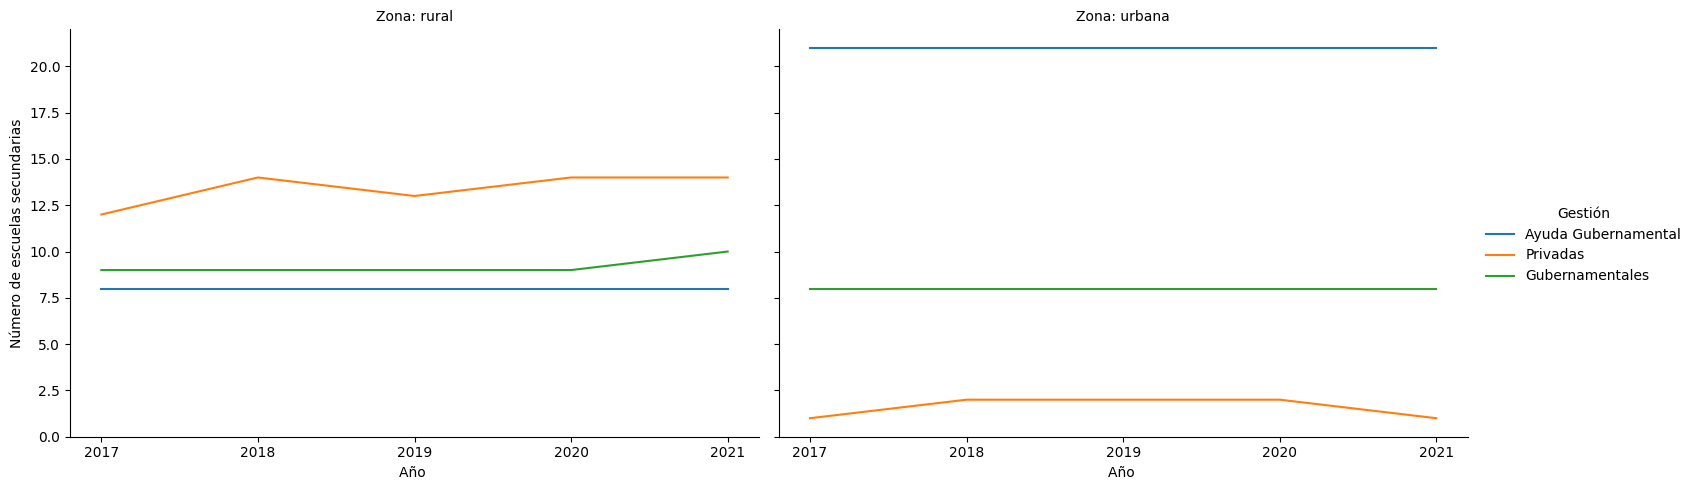

In [ ]:
# @title Escuelas Secundarias por Administración y Zona

# @title Evolución Anual de Escuelas Prescolares por Distrito y Zona

col_name_dict = {
    'government_aided': 'Ayuda Gubernamental',
    'government': 'Gubernamentales',
    'private': 'Privadas'
}

col_name_dict2 = {
    'rural': 'rural',
    'urban': 'urbana'
}

df['management_visual'] = df['management'].map(col_name_dict)
df['rural_urban_visual'] = df['rural_urban'].map(col_name_dict2)

g = sns.relplot(
    data = df,
    x = 'year',
    y = 'number_secondary',
    hue = 'management_visual',
    col = 'rural_urban_visual',
    kind = 'line',
    height = 5,
    aspect = 1.5,
)

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Ajustes finales del gráfico
g.set_axis_labels('Año ', 'Número de escuelas secundarias')
g._legend.set_title('Gestión')
g.set_titles(col_template="Zona: {col_name}")

plt.show()

## Profesores de Escuelas Secundarias por Distrito

In [ ]:
# @title Estadísticas
df = pd.read_csv(secondaryTeachers_district_path)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year district  numberTeachers
count    30.00       30           30.00
unique     NaN        6             NaN
top        NaN  Corozal             NaN
freq       NaN        5             NaN
mean   2019.00      NaN          241.63
std       1.44      NaN          127.55
min    2017.00      NaN          135.00
25%    2018.00      NaN          147.25
50%    2019.00      NaN          173.50
75%    2020.00      NaN          331.50
max    2021.00      NaN          493.00

year     district  numberTeachers
0  2017      Corozal             145
1  2017  Orange Walk             148
2  2017       Belize             493
3  2017         Cayo             330
4  2017  Stann Creek             197
5  2017       Toledo             143
6  2018      Corozal             142
7  2018  Orange Walk             157
8  2018       Belize             479
9  2018         Cayo             324

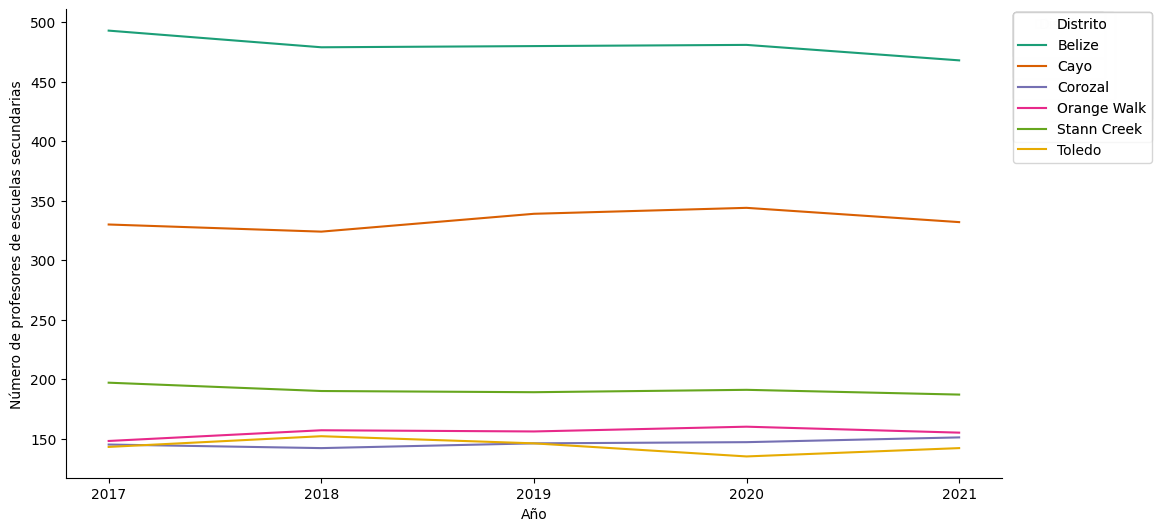

In [ ]:
# @title Profesores de Escuelas Secundarias por Distrito

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['numberTeachers']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])



fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
for i, (series_name, series) in enumerate(df.groupby('district')):
  _plot_series(series, series_name, i)
  fig.legend(title='Distrito', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Año')
_ = plt.ylabel('Número de profesores de escuelas secundarias')

## Completitud en Escuelas Secundarias por Sexo

In [ ]:
# @title Estadísticas
df = pd.read_csv(secondaryCompletion_sex_path)
df['secondaryCompletionRate'] = df['secondaryCompletionRate'].str.replace(',', '.').astype(float)
df.sort_values('year', ascending=True, inplace=True)
display(df.describe(include='all'))
print('\n')
display(df.head(10))

year   sex  secondaryCompletionRate
count    10.00    10                    10.00
unique     NaN     2                      NaN
top        NaN  male                      NaN
freq       NaN     5                      NaN
mean   2019.00   NaN                    69.97
std       1.49   NaN                     7.00
min    2017.00   NaN                    60.40
25%    2018.00   NaN                    64.55
50%    2019.00   NaN                    70.45
75%    2020.00   NaN                    73.65
max    2021.00   NaN                    80.30

year     sex  secondaryCompletionRate
0  2017    male                    61.20
1  2017  female                    72.00
2  2018    male                    60.40
3  2018  female                    71.40
4  2019    male                    63.60
5  2019  female                    74.20
6  2020    male                    67.40
7  2020  female                    79.70
8  2021    male                    69.50
9  2021  female                    80.30

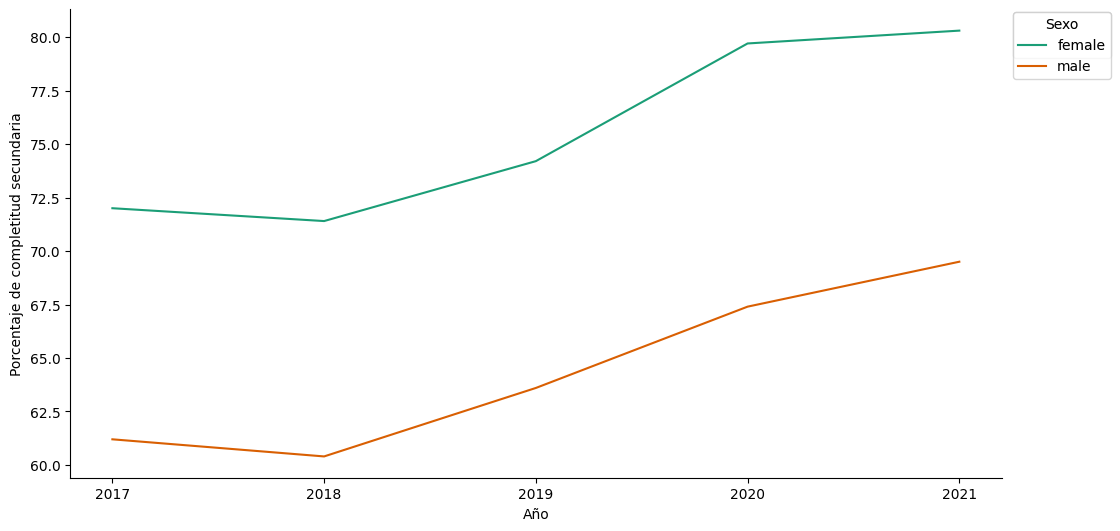

In [ ]:
# @title Completitud en Escuelas Secundarias por Sexo

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['secondaryCompletionRate']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])



fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
for i, (series_name, series) in enumerate(df.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sexo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Año')
_ = plt.ylabel('Porcentaje de completitud secundaria')

# EDA Combinados

## Limpieza y Estandarización de datos combinados

**PARTE 1:** Lectura de los documentos desde el drive

In [ ]:
!pip -q install pandas numpy scipy statsmodels google-api-python-client openpyxl matplotlib

import io, re, unicodedata, os
import numpy as np
import pandas as pd
from datetime import datetime
from google.colab import auth
from google.auth import default
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
from scipy.stats import spearmanr
import scipy.stats as ss
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ===================== CONFIG =====================
URL_A = "https://docs.google.com/spreadsheets/d/1Rm96lMuZS1jySxGoQpTlik0nXpGVfjpg/edit?usp=drive_link&ouid=114296319640760349211&rtpof=true&sd=true"
URL_B = "https://docs.google.com/spreadsheets/d/1hYPFi4zLR5tZtVVc8Ig0VYzIcBzlskAq/edit?usp=drive_link&ouid=114296319640760349211&rtpof=true&sd=true"
URL_C = "https://docs.google.com/spreadsheets/d/1mH3eRAEpPuKxd1CICGtTmcSON82cgaDy/edit?usp=sharing&ouid=114296319640760349211&rtpof=true&sd=true" ## UPDATED

SHEET_PRIORITY = ["cleaned_data", "cleaned"]

# >>> Ventana de anos
WINDOW_MIN_YEAR = 2017
WINDOW_MAX_YEAR = 2022

OUT_DIR = "/content"
os.makedirs(OUT_DIR, exist_ok=True)
TS = datetime.now().strftime("%Y%m%d_%H%M%S")
# ==================================================

# ---------- Auth & clients ----------
auth.authenticate_user()
SCOPES = ["https://www.googleapis.com/auth/spreadsheets",
          "https://www.googleapis.com/auth/drive"]
creds, _ = default(scopes=SCOPES)
drive = build("drive", "v3", credentials=creds)

# ===================== HELPERS =====================
def to_snake_case(s: str) -> str:
    if s is None: return "columna"
    s = str(s).strip()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = s.lower()
    s = re.sub(r"[^\w\s]", " ", s)
    s = re.sub(r"\s+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s if s else "columna"

def extract_file_id(url: str) -> str:
    m = re.search(r"/(?:spreadsheets|file)/d/([A-Za-z0-9_-]+)", url)
    if not m: raise ValueError(f"URL inválido: {url}")
    return m.group(1)

def export_sheet_to_xlsx_bytes(file_id: str) -> bytes:
    return drive.files().export(
        fileId=file_id,
        mimeType="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"
    ).execute()

def read_first_valid_sheet(xlsx_bytes: bytes, priority=SHEET_PRIORITY):
    xl = pd.ExcelFile(io.BytesIO(xlsx_bytes))
    sheet_name = None
    for s in priority:
        if s in xl.sheet_names:
            sheet_name = s; break
    if sheet_name is None: sheet_name = xl.sheet_names[0]
    df = xl.parse(sheet_name)
    return df, sheet_name, xl.sheet_names

def read_gsheet(url: str):
    fid = extract_file_id(url)
    meta = drive.files().get(fileId=fid, fields="mimeType,name").execute()
    if meta["mimeType"] != "application/vnd.google-apps.spreadsheet":
        # Excel en Drive
        req = drive.files().get_media(fileId=fid)
        fh = io.BytesIO()
        downloader = MediaIoBaseDownload(fh, req)
        done = False
        while not done:
            _, done = downloader.next_chunk()
        fh.seek(0)
        xlsx_bytes = fh.read()
    else:
        xlsx_bytes = export_sheet_to_xlsx_bytes(fid)
    df, used_sheet, all_sheets = read_first_valid_sheet(xlsx_bytes)
    df = df.dropna(how="all")
    df.columns = [to_snake_case(c) for c in df.columns]
    return df, used_sheet, all_sheets, meta["name"]

**PARTE 2:**  verificacions y estandarizacion de meses, limpia and se encarga de los factores idiomaticos, y se encarga de la definicion correcta para el tipo de variable


In [ ]:
# Meses EN/ES y num
MONTH_MAP = {
    "january":1,"february":2,"march":3,"april":4,"may":5,"june":6,
    "july":7,"august":8,"september":9,"october":10,"november":11,"december":12,
    "jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"sept":9,"oct":10,"nov":11,"dec":12,
    "enero":1,"febrero":2,"marzo":3,"abril":4,"mayo":5,"junio":6,
    "julio":7,"agosto":8,"septiembre":9,"setiembre":9,"octubre":10,"noviembre":11,"diciembre":12,
    "ene":1,"feb":2,"mar":3,"abr":4,"may":5,"jun":6,"jul":7,"ago":8,"sep":9,"set":9,"oct":10,"nov":11,"dic":12,
}
def month_to_num(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    try:
        v = int(float(s))
        if 1 <= v <= 12: return v
    except: pass
    return MONTH_MAP.get(s, np.nan)

def ensure_period_dt(df, year_col="year", month_col="month", period_col="period"):
    out = df.copy()
    if period_col in out.columns:
        try_dt = pd.to_datetime(out[period_col], errors="coerce")
        if try_dt.notna().mean() > 0.6:
            out["period_dt"] = try_dt.dt.to_period("M").dt.to_timestamp("MS")
            out["year"] = out["period_dt"].dt.year
            out["month_num"] = out["period_dt"].dt.month
            return out
    y = pd.to_numeric(out[year_col], errors="coerce") if year_col in out.columns else np.nan
    mcol = out[month_col] if month_col in out.columns else np.nan
    if isinstance(mcol, pd.Series):
        if mcol.dtype == object:
            m = mcol.map(month_to_num)
        else:
            m = pd.to_numeric(mcol, errors="coerce")
    else:
        m = pd.to_numeric(mcol, errors="coerce")
    out["period_dt"] = pd.to_datetime(dict(year=y, month=m, day=1), errors="coerce")
    out["year"] = out["period_dt"].dt.year
    out["month_num"] = out["period_dt"].dt.month
    return out

def choose_population_col(df):
    cands = [c for c in df.columns if any(k in c for k in [
        "period_total","working_age","population","pop_total","pop",">=_14","ge_14","_14"
    ])]
    priority = ["working_age", "period_total", "population", "pop"]
    if cands:
        for p in priority:
            for c in cands:
                if p in c: return c
        return cands[0]
    return None

def make_unique_columns(cols):
    seen = {}
    new = []
    for c in cols:
        if c in seen:
            seen[c] += 1
            new.append(f"{c}.{seen[c]}")
        else:
            seen[c] = 0
            new.append(c)
    return new

def dedup_columns(df):
    df2 = df.copy()
    df2.columns = make_unique_columns(list(df2.columns))
    return df2

def save_html(df, path, title=None):
    df2 = dedup_columns(df.reset_index(drop=True))
    sty = (df2.style
           .format(lambda v: f"{v:.2f}" if isinstance(v, (float, np.floating)) else v)
           .set_properties(**{"font-family": "Arial", "font-size": "12px"})
           .set_table_styles([
               {"selector":"th", "props":[("background","#f2f2f2"), ("text-align","center")]},
               {"selector":"td", "props":[("text-align","right")]},
           ]))
    html = sty.to_html()
    if title:
        html = f"<h3>{title}</h3>\n" + html
    with open(path, "w", encoding="utf-8") as f:
        f.write(html)

def cramers_v_corrected(confusion):
    chi2 = ss.chi2_contingency(confusion)[0]
    n = confusion.to_numpy().sum()
    phi2 = chi2 / n
    r, k = confusion.shape
    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    rcorr = r - (r-1)**2/(n-1)
    kcorr = k - (k-1)**2/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# ---- parseo del ano para Vocational (primer ano de rangos tipo "2012/13")
def extract_first_year_from_period(val):
    """
    Toma strings como '2012/13', '2019-2020', '2018 – 2019', '2020' y devuelve 2012, 2019, 2018, 2020, etc.
    """
    if pd.isna(val): return np.nan
    s = str(val)
    m = re.search(r"(\d{4})", s)
    if m:
        try:
            return int(m.group(1))
        except:
            return np.nan
    # fallback: intentar conversión directa
    try:
        return int(float(s))
    except:
        return np.nan

# ---- Filtro de ventana de anos 2017–2021 con sub-rango disponible
def filter_year_window(df, min_year=2018, max_year=2022, year_col="year"):
    if df is None or len(df) == 0:
        return df.copy(), None, None
    d = df.copy()
    # determinar serie de años
    if year_col in d.columns:
        yrs = pd.to_numeric(d[year_col], errors="coerce")
    elif "period_dt" in d.columns:
        yrs = pd.to_datetime(d["period_dt"], errors="coerce").dt.year
    else:
        return d.iloc[0:0].copy(), None, None  # sin referencia temporal
    in_window = yrs[(yrs >= min_year) & (yrs <= max_year)]
    if not in_window.notna().any():
        # no hay datos en la ventana -> devolver vacío pero consistente
        return d.iloc[0:0].copy(), None, None
    used_min = int(np.nanmin(in_window))
    used_max = int(np.nanmax(in_window))
    mask = (yrs >= used_min) & (yrs <= used_max)
    return d[mask].copy(), used_min, used_max

**PARTE 3:** Asignación de roles >> crime / labour / vocational
o	Primero por nombre de archivo >> contiene “crime/murder”, “labour/labor”, “vocational/education” o si existe una duda, usa principios de heuristica por columnas Ejemplo : si tiene unemployment_rate, es “labour”

In [ ]:
dfs_meta = []  # (df, hoja_usada, nombre_archivo)
for u in [URL_A, URL_B, URL_C]:
    d, sh, allsh, nm = read_gsheet(u)
    dfs_meta.append((d, sh, nm))
    print(f"Leído: {nm} | hoja: {sh} | columnas: {len(d.columns)}")

def role_by_name(name: str):
    s = name.lower()
    if any(x in s for x in ["crime","murder"]): return "crime"
    if any(x in s for x in ["labour","labor"]): return "labour"
    if any(x in s for x in ["vocational","education"]): return "vocational"
    return None

def score_roles(df):
    cols = set(df.columns)
    s_crime = sum(k in cols for k in ["crime","type_of_weapon","type_of_waepon","location_type","motivation"])
    s_lab   = sum(any(k in c for k in ["labour","labor","unemploy","participation","working_age","not_in_labour"]) for c in cols)
    s_voc   = sum(any(k in c for k in ["vocational","pupil_teacher","teachers","school_enrollment","education"]) for c in cols)
    return s_crime, s_lab, s_voc

def assign_roles(dfs_meta):
    name_roles = [role_by_name(nm) for _,_,nm in dfs_meta]
    idxs = {"crime": None, "labour": None, "vocational": None}
    # 1) por nombre
    for i, r in enumerate(name_roles):
        if r and idxs[r] is None:
            idxs[r] = i
    # 2) por columnas para los que falten
    scored = [(i,)+score_roles(dfs_meta[i][0]) for i in range(3)]
    order = [("crime",1), ("labour",2), ("vocational",3)]
    for role, pos in order:
        if idxs[role] is None:
            candidates = [t for t in scored if t[0] not in idxs.values()]
            if candidates:
                best = max(candidates, key=lambda t: t[pos])
                idxs[role] = best[0]
    return idxs["crime"], idxs["labour"], idxs["vocational"]

idx_crime, idx_lab, idx_voc = assign_roles(dfs_meta)
df_crime, sh_c, name_c = dfs_meta[idx_crime][0], dfs_meta[idx_crime][1], dfs_meta[idx_crime][2]
df_lab,   sh_l, name_l = dfs_meta[idx_lab][0],   dfs_meta[idx_lab][1],   dfs_meta[idx_lab][2]
df_voc,   sh_v, name_v = dfs_meta[idx_voc][0],   dfs_meta[idx_voc][1],   dfs_meta[idx_voc][2]

print("\nAsignación de roles:")
print(f"  CRIME -> {name_c}")
print(f"  LABOUR -> {name_l}")
print(f"  VOCATIONAL -> {name_v}")

Leído: MainLaborForceIndicators_2012-2024.xlsx | hoja: cleaned_data | columnas: 15
Leído: Major crimes-Murder crimes_Snake_Case.xlsx | hoja: cleaned | columnas: 9
Leído: Major Crimes 2018-2024.xlsx | hoja: Major Crime Incidents | columnas: 11

Asignación de roles:
  CRIME -> Major crimes-Murder crimes_Snake_Case.xlsx
  LABOUR -> MainLaborForceIndicators_2012-2024.xlsx
  VOCATIONAL -> Major Crimes 2018-2024.xlsx


**PARTE 4:** Limpiezas específicas detectadas en los datos para el EDA, por ejemplo, CRIME: se renombra type_of_waepon a  type_of_weapon; se limpia, se  normaliza district >> trim + mayúsculas, con LABOUR se resolvio los duplicados de la columna 14 renombrandolas como population_14_plus y population_under_14. mientas que con VOCATIONAL se normaliza district igual que en crime.

In [ ]:
# ---------- Limpiezas especificas por dataset ----------
# CRIME: corregir typo y normalizar strings
if "type_of_waepon" in df_crime.columns and "type_of_weapon" not in df_crime.columns:
    df_crime = df_crime.rename(columns={"type_of_waepon":"type_of_weapon"})
for c in ["crime","district","location_type","formation","pricinct_rural_coastal","type_of_weapon","motivation","month"]:
    if c in df_crime.columns and df_crime[c].dtype == object:
        df_crime[c] = df_crime[c].astype(str).str.strip()

# Normalizar distritos
if "district" in df_crime.columns:
    df_crime["district"] = (df_crime["district"].astype(str)
                            .str.strip()
                            .str.replace(r"\s+"," ", regex=True)
                            .str.upper())

# LABOUR: resolver columnas duplicadas == "14"
if list(df_lab.columns).count("14") >= 2:
    new_cols = list(df_lab.columns)
    seen = 0
    for i, col in enumerate(new_cols):
        if col == "14":
            if seen == 0:
                new_cols[i] = "population_14_plus"
            elif seen == 1:
                new_cols[i] = "population_under_14"
            else:
                new_cols[i] = f"14.{seen}"
            seen += 1
    df_lab.columns = new_cols

# VOCATIONAL: normalizar distritos
if "district" in df_voc.columns:
    df_voc["district"] = (df_voc["district"].astype(str)
                          .str.strip()
                          .str.replace(r"\s+"," ", regex=True)
                          .str.upper())

# ---------- Construir llaves temporales y tipos ----------
df_crime = ensure_period_dt(df_crime)
df_lab   = ensure_period_dt(df_lab)

# Vocational: ano = primer ano del campo 'period' (si existe), si no, usar 'year' numerico
if "period" in df_voc.columns:
    df_voc["year"] = df_voc["period"].apply(extract_first_year_from_period)
elif "year" in df_voc.columns:
    df_voc["year"] = pd.to_numeric(df_voc["year"], errors="coerce")
else:
    # intentar derivar de period_dt si existiera
    df_voc = ensure_period_dt(df_voc)
    if "year" in df_voc.columns:
        df_voc["year"] = pd.to_numeric(df_voc["year"], errors="coerce")

# Asegurar tipo Int64 para 'year'
for d in (df_crime, df_lab, df_voc):
    if "year" in d.columns:
        d["year"] = pd.to_numeric(d["year"], errors="coerce").astype("Int64")

# ===================== FILTRAR > 2018–2022 =====================
df_crime_win, used_min_crime, used_max_crime = filter_year_window(df_crime, WINDOW_MIN_YEAR, WINDOW_MAX_YEAR, "year")
df_lab_win,   used_min_lab,   used_max_lab   = filter_year_window(df_lab,   WINDOW_MIN_YEAR, WINDOW_MAX_YEAR, "year")
df_voc_win,   used_min_voc,   used_max_voc   = filter_year_window(df_voc,   WINDOW_MIN_YEAR, WINDOW_MAX_YEAR, "year")

print(f"\nVentana solicitada: {WINDOW_MIN_YEAR}–{WINDOW_MAX_YEAR}")
print(f"  CRIME: usado -> {used_min_crime}–{used_max_crime}")
print(f"  LABOUR: usado -> {used_min_lab}–{used_max_lab}")
print(f"  VOCATIONAL: usado -> {used_min_voc}–{used_max_voc}")


Ventana solicitada: 2017–2022
  CRIME: usado -> 2018–2022
  LABOUR: usado -> 2017–2022
  VOCATIONAL: usado -> 2018–2022


**PARTE 5:** Creacion de paneles, esto para ayudar con el orden y el anlineamiento por medio de usar una sola tabla con crimen + variables laborales + población ya alineadas por mes/distrito, nos permite correr correlaciones de forma mas facil

Formula: tasa = delitos/poblacion expuesta x 100000 (Facilita comparar anos, dsitritos y paises puede ser util para futuros usos del data set, ademas es el standars de criminologia )


* se usa  para comparar distritos y meses/años de forma justa.
* comparar en el tiempo y entre distritos sin que el denominador cambie el sentido.
* para evitar sesgos por tamaño poblacional se compara per capita, no solo conteos
¿Qué población usamos como denominador?
* Denominador > Prioridad automática: working_age_* (≥14 años) > luego period_total > Por ultimo > cualquier population/pop*.

Porque ? >   working_age_ se aproxima mejor a la población expuesta a la mayoria de delitos, si no existe, usamos la población total del periodo.

* como se lee ? mas alta = mas riesgo per capita, no necesariamente más habitantes


**MENSUAL: crime + labour:**

* En crime, si ya existe una columna numerica value la usa; si no, asume 1 fila = 1 incidente /count=1, agrega por period_dt (y por district y/o crime si existen).

* En labour, promedia columnas numéricas por period_dt (excluye llaves y year).Merge por period_dt (y district si aplica), detecta la columna de población (prioriza working_age_* o period_total) y calcula crime_rate_100k.


In [ ]:
# ============================================================
# Panel MENSUAL: crimen + laboral
# ============================================================

crime_col    = "crime" if "crime" in df_crime_win.columns else None
district_col = "district" if "district" in df_crime_win.columns else None

# Conteo por fila o columna 'value'
value_is_count = "value" in df_crime_win.columns and pd.api.types.is_numeric_dtype(df_crime_win["value"])
df_crime_win["count"] = pd.to_numeric(df_crime_win["value"], errors="coerce").fillna(0) if value_is_count else 1

group_keys = ["period_dt"]
if district_col: group_keys.append(district_col)
if crime_col:    group_keys.append(crime_col)

crime_monthly = (df_crime_win
                 .dropna(subset=["period_dt"])
                 .groupby(group_keys)["count"].sum()
                 .reset_index())

# Labour mensual: excluir claves de la agregación
lab_keys = ["period_dt"] + ([district_col] if (district_col and district_col in df_lab_win.columns) else [])
num_cands_lab = df_lab_win.select_dtypes(include=[np.number]).columns.tolist()
lab_exclude = set(lab_keys + ["year","month","month_num"])
lab_cols_num = [c for c in num_cands_lab if c not in lab_exclude]

lab_monthly = (df_lab_win
               .dropna(subset=["period_dt"])
               .groupby(lab_keys)[lab_cols_num].mean()
               .reset_index())

panel_monthly = pd.merge(
    crime_monthly, lab_monthly,
    on=list(set(lab_keys) & set(group_keys)) or ["period_dt"],
    how="left"
)

# Tasa por 100k
pop_col = choose_population_col(panel_monthly)
if pop_col and pop_col in panel_monthly.columns:
    panel_monthly["crime_rate_100k"] = (panel_monthly["count"] / panel_monthly[pop_col].replace(0, np.nan)) * 1e5


**ANUAL: crimen + vocacional:** Suma crimen por year y district si esta, creando crime_count_year, promedia lo numerico en vocational por year (y district si está) despues Une ambos y agrega la población media anual (desde el panel mensual) para estimar crime_rate_year_100k.

In [ ]:
# ============================================================
# Panel ANUAL: crimen + vocacional
# ============================================================
keys_year = ["year"] + ([district_col] if district_col else [])
crime_annual = (df_crime_win
                .dropna(subset=["year"])
                .groupby(keys_year)["count"].sum()
                .reset_index()
                .rename(columns={"count":"crime_count_year"}))

voc_keys = ["year"] + ([district_col] if (district_col and district_col in df_voc_win.columns) else [])
num_cands_voc = df_voc_win.select_dtypes(include=[np.number]).columns.tolist()
voc_cols_num = [c for c in num_cands_voc if c not in set(voc_keys)]

voc_annual = (df_voc_win
              .dropna(subset=["year"])
              .groupby(voc_keys)[voc_cols_num].mean()
              .reset_index())

panel_annual = pd.merge(
    crime_annual, voc_annual,
    on=list(set(keys_year) & set(voc_keys)) or ["year"],
    how="left"
)

if pop_col:
    lab_year_pop = (panel_monthly
                    .dropna(subset=["period_dt"])
                    .assign(year=lambda d: d["period_dt"].dt.year)
                    .groupby(list(set(["year"] + ([district_col] if district_col else []))))[pop_col].mean()
                    .reset_index())
    panel_annual = panel_annual.merge(
        lab_year_pop,
        on=list(set(["year"] + ([district_col] if district_col else []))),
        how="left", suffixes=("","_pop")
    )
    panel_annual["crime_rate_year_100k"] = (
        panel_annual["crime_count_year"] / panel_annual[pop_col].replace(0, np.nan)
    ) * 1e5



#### Pruebas EDA Archivos : Vocational | Main Labor | Major Crime

**clasificación “explicativa”:** *los resultados se puden ver en Content CSV file*

*crime × type_of_weapon:*
* V alto (≈0.3–0.5+) sugiere que ciertos delitos usan armas específicas (p. ej., ROBBERY/FIREARM),la clase “delito” esta bien diferenciada por arma.

*crime × location_type:*
* V alto indica que cada delito tiene entornos tipicos (p. ej., BURGLARY en RESIDENCE).

*crime × motivation:*

* V moderado/alto: que tienen moviles característicos por tipo (p. ej., FINANCIAL para THEFT/ROBBERY, DOMESTIC/JEALOUSY para ciertos violentos).



V alto = la taxonomia si esya diferenciando comoportamientos.


Columnas usadas (CRIME): crime type_of_weapon location_type motivation
CSV Cramér's V guardado: /content/cramersV_pairs_20250902_020949.csv
[crime × type_of_weapon] V=0.36 (moderado): hay patrones tipicos por categoria.
[crime × location_type] V=0.30 (moderado): hay patrones tipicos por categoria.
[crime × motivation] V=0.39 (moderado): hay patrones tipicos por categoria.


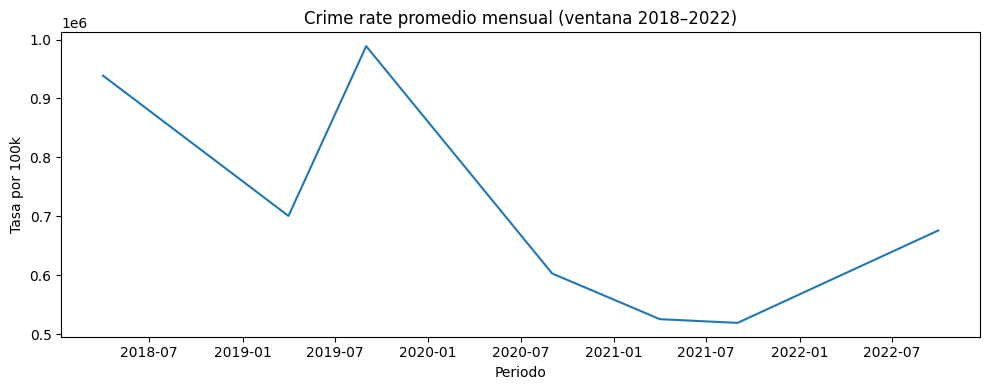

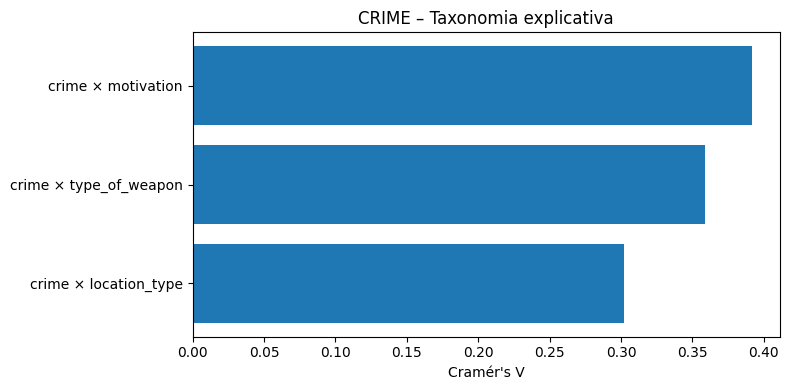

In [ ]:
# ============================================================
# EDA CONSISTENTE CON 2017–2022 (o sub-rango disponible)
# Requiere: df_crime_win, df_lab_win, df_voc_win, panel_monthly,
#           district_col, pop_col, OUT_DIR, TS
# ============================================================

import os, difflib
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, spearmanr

# ---------- Utilidades ----------
def strength_label_v(v):
    if pd.isna(v): return "sin dato"
    if v < 0.10:   return "trivial"
    if v < 0.30:   return "bajo"
    if v < 0.50:   return "moderado"
    return "alto"

def strength_label_rho(r):
    if pd.isna(r): return "sin dato"
    a = abs(r)
    if a < 0.10: return "muy bajo"
    if a < 0.30: return "bajo"
    if a < 0.50: return "moderado"
    return "fuerte"

def cramers_v_corrected(tab_df):
    """Cramér's V con corrección por sesgo."""
    r, k = tab_df.shape
    if r < 2 or k < 2:
        return np.nan, (r, k)
    chi2, _, _, _ = chi2_contingency(tab_df)
    n = tab_df.to_numpy().sum()
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    denom = min((kcorr-1), (rcorr-1))
    if denom <= 0:
        return np.nan, (r, k)
    return float(np.sqrt(phi2corr / denom)), (r, k)

def find_col(df, target, synonyms=()):
    cols = list(df.columns)
    if target in cols:
        return target
    lowmap = {c.lower().strip(): c for c in cols}
    if target.lower() in lowmap:
        return lowmap[target.lower()]
    keys = [target, target.replace("type_of_", "")]
    keys.extend(synonyms)
    for k in set(keys):
        for c in cols:
            if k.lower() in c.lower():
                return c
    m = difflib.get_close_matches(target, cols, n=1, cutoff=0.6)
    return m[0] if m else None

def standardize(x):
    x = pd.Series(x).astype(float)
    m = x.mean(); s = x.std(ddof=0)
    return (x - m) / (s if s not in (0, np.nan, None) else 1)

def crosscorr_full(sx, sy, max_lag=24):
    """
    Devuelve correlaciones para lags −max_lag…+max_lag.
    Definición: lag > 0 => X lidera a Y (X_{t-k} ↔ Y_t).
    """
    sx = pd.Series(sx).astype(float)
    sy = pd.Series(sy).astype(float)
    out = []
    for k in range(-max_lag, max_lag+1):
        if k > 0:
            x = sx.shift(k)
            y = sy
        elif k < 0:
            x = sx
            y = sy.shift(-k)
        else:
            x = sx; y = sy
        z = pd.concat([x, y], axis=1).dropna()
        if len(z) >= 3:
            r = z.iloc[:,0].corr(z.iloc[:,1])
            out.append((k, float(r), len(z)))
        else:
            out.append((k, np.nan, len(z)))
    return pd.DataFrame(out, columns=["lag","corr","n"])

# =============== Cramér's V: taxonomía explicativa (CRIME) ===============
# datos filtrados a 2017–2022
df_crime_eda = df_crime_win.copy()

col_crime  = find_col(df_crime_eda, "crime", ("offense","delito","crime_type","tipo_delito"))
col_weapon = find_col(df_crime_eda, "type_of_weapon",
                      ("weapon","weapon_type","arma","tipo_de_arma","weapon used","type_of_waepon"))
col_loc    = find_col(df_crime_eda, "location_type", ("location","ubicacion","lugar","place"))
col_motive = find_col(df_crime_eda, "motivation", ("motive","motivo"))

print("Columnas usadas (CRIME):", col_crime, col_weapon, col_loc, col_motive)

pairs = [
    ("crime × type_of_weapon", col_crime, col_weapon),
    ("crime × location_type",  col_crime, col_loc),
    ("crime × motivation",     col_crime, col_motive),
]

rows = []
for label, x, y in pairs:
    if x and y and x in df_crime_eda.columns and y in df_crime_eda.columns:
        sub = df_crime_eda.dropna(subset=[x, y])
        # limitar a top categorias si aplica
        if sub[x].nunique() > 100 or sub[y].nunique() > 100:
            top_x = sub[x].value_counts().head(50).index
            top_y = sub[y].value_counts().head(50).index
            sub = sub[sub[x].isin(top_x) & sub[y].isin(top_y)]
        tab = pd.crosstab(sub[x], sub[y])
        v, (r, k) = cramers_v_corrected(tab)
        rows.append({"pair": label, "cramers_v": v, "n_rows": r, "n_cols": k, "strength": strength_label_v(v)})
    else:
        rows.append({"pair": label, "cramers_v": np.nan, "n_rows": np.nan, "n_cols": np.nan, "strength": "sin dato"})

cv_df = pd.DataFrame(rows)
cv_path = os.path.join(OUT_DIR, f"cramersV_pairs_{TS}.csv")
cv_df.to_csv(cv_path, index=False, float_format="%.3f")
print("CSV Cramér's V guardado:", cv_path)

# Lectura/diagnostico rápido
for _, r in cv_df.iterrows():
    if pd.notna(r["cramers_v"]):
        if r["cramers_v"] >= 0.50:
            print(f"[{r['pair']}] V={r['cramers_v']:.2f} (alto): la taxonomia diferencia comportamientos con claridad.")
        elif r["cramers_v"] >= 0.30:
            print(f"[{r['pair']}] V={r['cramers_v']:.2f} (moderado): hay patrones tipicos por categoria.")
        elif r["cramers_v"] >= 0.10:
            print(f"[{r['pair']}] V={r['cramers_v']:.2f} (bajo): señal debil; revisar calidad/etiquetado.")
        else:
            print(f"[{r['pair']}] V={r['cramers_v']:.2f} (trivial).")

import matplotlib.pyplot as plt

# Mapa Serie de tiempo rapida (promedio mensual de la tasa por 100k)
try:
    if "crime_rate_100k" in panel_monthly.columns and "period_dt" in panel_monthly.columns:
        ts = (panel_monthly.dropna(subset=["period_dt","crime_rate_100k"])
                          .groupby("period_dt")["crime_rate_100k"].mean()
                          .sort_index())
        if len(ts) >= 3:
            plt.figure(figsize=(10,4))
            plt.plot(ts.index, ts.values)
            plt.title("Crime rate promedio mensual (ventana 2018–2022)")
            plt.xlabel("Periodo")
            plt.ylabel("Tasa por 100k")
            plt.tight_layout()
            plt.show()
except Exception as e:
    print("Aviso (serie mensual):", e)

# Mapa Craer's V (taxonomia explicativa)
try:
    if "cv_df" in locals() and not cv_df.empty:
        dfp = cv_df.copy()
        dfp = dfp.sort_values("cramers_v", ascending=True)
        plt.figure(figsize=(8,4))
        plt.barh(range(len(dfp)), dfp["cramers_v"])
        plt.yticks(range(len(dfp)), dfp["pair"])
        plt.xlabel("Cramér's V")
        plt.title("CRIME – Taxonomia explicativa")
        plt.tight_layout()
        plt.show()
except Exception as e:
    print("Aviso (Cramér's V):", e)

Que variables influyen en la ocurrencia?
aca el pipeline esta evaluando la influencia desde tres angulos:

1) Variables laborales (mensual)
Mira la tabla de Top-15 Spearman:

* Signo (ρ):


Positivo >  la variable sube y (tasa o conteo de) crimen sube también.

Negativo >  cuando sube la variable, el crimen baja.

Magnitud > |ρ|≈0.1 bajo, ≈0.3 moderado, ≈0.5+ fuerte.

p-value: <0.05 sugiere que no es una coincidencia aleatoria (ojo, hay múltiples pruebas; lo uso como indicio no como resultado final).

Candidatas tipicas en LABOUR: unemployment_rate, underemployment_rate, labour_force_participation_rate, not_in_labour_force, y población (period_total/working_age_14) > esta la use para las tasas.

* Lectura :

Si unemployment_rate sale con ρ positivo y significativo vs crime_rate_100k, sugiere que más desempleo >  más crimen (co-movimiento).

Si labour_force_participation_rate es negativo, sugiere que una economia mas alineada en empleo formal coincide con menor incidencia.

CSV Spearman guardados:
 - /content/spearman_all_crime_rate_100k_20250902_020949.csv
 - /content/spearman_top15_crime_rate_100k_20250902_020949.csv

Top-15 (interpretación rápida):
 population_14_plus: ρ=-0.24 negativo (p<0.05) → bajo
 labour_force_participation_rate: ρ=0.24 positivo (p<0.05) → bajo
 not_in_labour_force: ρ=-0.24 negativo (p<0.05) → bajo
 population_under_14: ρ=0.24 positivo (p<0.05) → bajo
 don_t_know_not_stated: ρ=0.20 positivo (p<0.05) → bajo
 labour_force: ρ=0.18 positivo (p<0.05) → bajo
 employed: ρ=0.15 positivo → bajo
 period_total: ρ=0.11 positivo → bajo
 underemployment_rate: ρ=0.07 positivo → muy bajo
 unemployment_rate: ρ=0.03 positivo → muy bajo
 unemployed: ρ=0.02 positivo → muy bajo


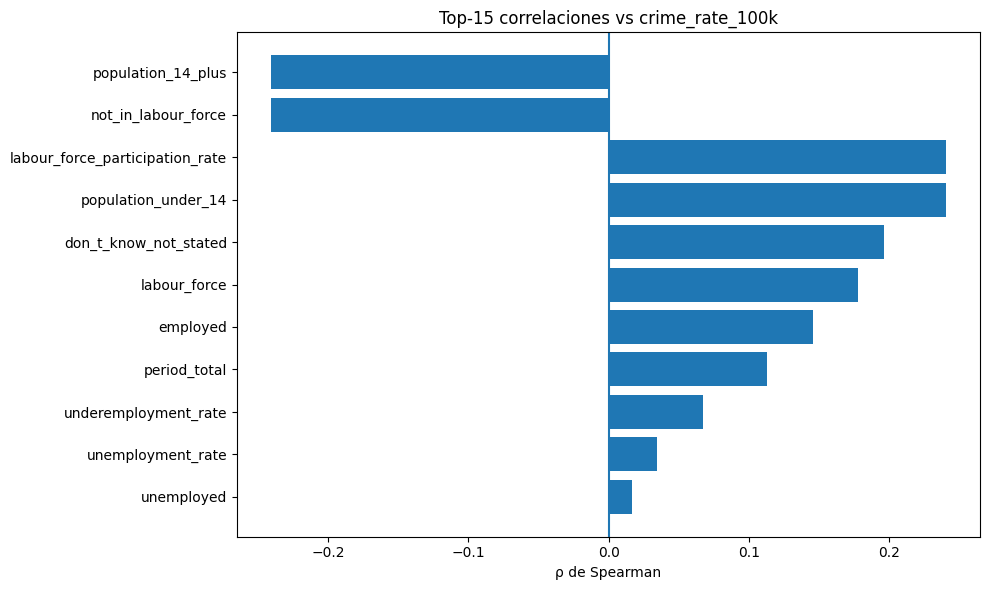

In [ ]:
# =============== Spearman mensual con panel_monthly =====================
# Objetivo: prioriza tasa per-capita (evita sesgos de tamaño)
target_candidates = [c for c in ["crime_rate_100k","count"] if c in panel_monthly.columns]
if target_candidates:
    target = target_candidates[0]
    num_cols = panel_monthly.select_dtypes(include=[np.number]).columns.tolist()
    # Exclusiones para evitar artefactos
    exclude = {"month_num","year","crime_rate_year_100k","crime_count_year","period_dt","count"}
    if pop_col: exclude.add(pop_col)
    exclude.discard(target)  # por si el target coincide con alguno
    num_cols = [c for c in num_cols if c not in exclude and c != target]

    corr_rows = []
    for c in num_cols:
        s = panel_monthly[[target, c]].dropna()
        if len(s) >= 12:
            rho, p = spearmanr(s[target], s[c])
            corr_rows.append((c, rho, p, len(s)))

    if corr_rows:
        corr_df_full = (pd.DataFrame(corr_rows, columns=["variable","spearman_rho","p_value","n"])
                        .assign(target=target)
                        .assign(abs_rho=lambda d: d["spearman_rho"].abs())
                        .sort_values("abs_rho", ascending=False))

        corr_df_top = corr_df_full.head(15).copy()

        out_full = os.path.join(OUT_DIR, f"spearman_all_{target}_{TS}.csv")
        out_top  = os.path.join(OUT_DIR, f"spearman_top15_{target}_{TS}.csv")
        corr_df_full.to_csv(out_full, index=False, float_format="%.3f")
        corr_df_top.to_csv(out_top,  index=False, float_format="%.3f")
        print("CSV Spearman guardados:")
        print(" -", out_full)
        print(" -", out_top)

        # Resumen interpretativo
        if len(corr_df_top) > 0:
            print("\nTop-15 (interpretación rápida):")
            for _, r in corr_df_top.iterrows():
                label = strength_label_rho(r["spearman_rho"])
                trend = "positivo" if r["spearman_rho"] > 0 else "negativo"
                mark  = " (p<0.05)" if r["p_value"] < 0.05 else ""
                print(f" {r['variable']}: ρ={r['spearman_rho']:.2f} {trend}{mark} → {label}")
    else:
        print("No hay pares suficientes (>=12 observaciones) para Spearman.")
else:
    print("No hay variable objetivo para Spearman (crime_rate_100k o count).")



# Mapa Spearman Top-15 (mensual)
try:
    if ("corr_df_top" in locals()) and (corr_df_top is not None) and (len(corr_df_top) > 0):
        order = (corr_df_top.assign(abs_rho=corr_df_top["spearman_rho"].abs())
                              .sort_values("abs_rho", ascending=True))
        plt.figure(figsize=(10,6))
        plt.barh(range(len(order)), order["spearman_rho"])
        plt.yticks(range(len(order)), order["variable"])
        plt.axvline(0)
        plt.xlabel("ρ de Spearman")
        plt.title(f"Top-15 correlaciones vs {order['target'].iloc[0]}")
        plt.tight_layout()
        plt.show()
except Exception as e:
    print("Aviso (Spearman):", e)


2) Desfase temporal (CCF)
Si la CCF entre unemployment y el objetivo (conteo/tasa) es máxima en lag k > 0, significa que el desempleo antecede al crimen k meses > esto da una posible influencia temporal >> PODRIAMOS USARLO PARA ALERTAS A TIEMPO o PREDICCION

Si la maxima está en lag ≤ 0, el crimen va a la par o precede a la variable, esto puede  indicar retroalimentación o que el orden no es el esperado.

3) Variables vocacionales/educativas (anual)
El panel anual une crimen con VOCATIONAL por año y distrito **si aplica**

La variable numérica en Vocational suele estar en value (matrícula, docentes, ratio, etc. según education/level_of_education/sex).

**Para ver influencia:**

Se puede correlacionar crime_rate_year_100k con subseries de value filtrando por education Ex., vocational_education, pupil_teacher_ratio, etc.).

*algunas indicios >*  mas matricula tecnica >> menos crimen (si negativo), o ratio alumno/docente alto >> más crimen (si positivo), pero dependera del contexto.


CCF evaluada en distrito: BELIZE
CSV CCF (−lags…+lags) guardado: /content/ccf_full_unemployed_to_crime_rate_100k_BELIZE_20250902_020949.csv
Top lags CCF (|corr|):
 lag=-23, corr=0.58, n=7 → CRIME lidera
 lag=-21, corr=0.53, n=3 → CRIME lidera
 lag=-22, corr=0.38, n=5 → CRIME lidera
VOC: no se encontró columna numérica representativa (p.ej., 'value') o 'year'.


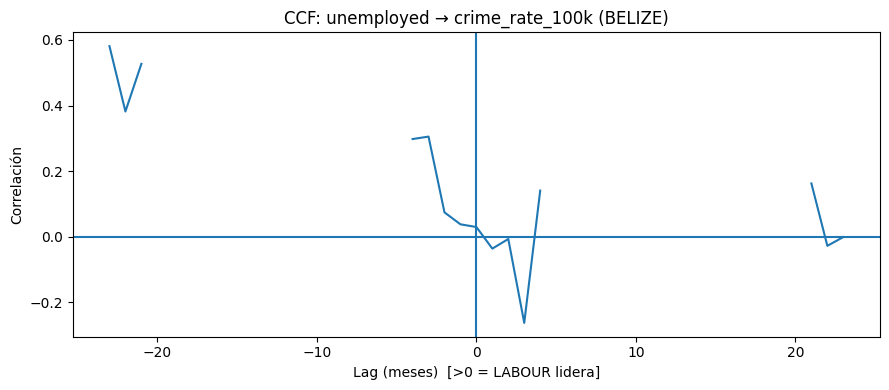

In [ ]:
# =============== Cross-correlation (CCF) desempleo vs crimen ==============
# Ahora con lags negativos y positivos (X lidera si lag > 0)
ccf_var = None
if "unemploy" in "".join(panel_monthly.columns).lower():
    for c in panel_monthly.columns:
        if isinstance(c, str) and "unemploy" in c.lower():
            ccf_var = c; break
# fallback: underemploy
if not ccf_var:
    for c in panel_monthly.columns:
        if isinstance(c, str) and "underemploy" in c.lower():
            ccf_var = c; break

if ccf_var and target_candidates:
    target = target_candidates[0]
    pm_sorted = panel_monthly.sort_values(["period_dt"] + ([district_col] if district_col else []))
    district_used = None

    if district_col and district_col in pm_sorted.columns:
        district_used = pm_sorted[district_col].value_counts().idxmax()
        pm_sorted = pm_sorted[pm_sorted[district_col] == district_used]
        print(f"\nCCF evaluada en distrito: {district_used}")

    s1 = pm_sorted[ccf_var].astype(float).to_numpy()
    s2 = pm_sorted[target].astype(float).to_numpy()

    # Estandarizar y calcular lags −L…+L
    L = min(24, len(pm_sorted))
    if L >= 3:
        ccdf = crosscorr_full(standardize(s1), standardize(s2), max_lag=L-1)
        # metadatos
        if district_used is not None:
            ccdf.insert(0, "district", district_used)
        ccdf.insert((1 if district_used is not None else 0), "labour_var", ccf_var)
        ccdf.insert((2 if district_used is not None else 1), "target", target)

        out_csv = os.path.join(
            OUT_DIR,
            f"ccf_full_{ccf_var}_to_{target}"
            f"{'_' + district_used if district_used else ''}_{TS}.csv"
        )
        ccdf.to_csv(out_csv, index=False, float_format="%.3f")
        print("CSV CCF (−lags…+lags) guardado:", out_csv)

        # Mejores lags por |corr|
        top3 = ccdf.reindex(ccdf["corr"].abs().sort_values(ascending=False).index).head(3)
        print("Top lags CCF (|corr|):")
        for _, r in top3.iterrows():
            lead = "LABOUR lidera" if r["lag"] > 0 else ("CRIME lidera" if r["lag"] < 0 else "Simultáneo")
            print(f" lag={int(r['lag'])}, corr={r['corr']:.2f}, n={int(r['n'])} → {lead}")
    else:
        print("Serie insuficiente para CCF (>=3 observaciones).")
else:
    print("No hay variable tipo 'unemploy*'/'underemploy*' o no hay target para CCF.")

# =============== Vocational (anual): correlaciones explicativas ===========
# Objetivo: correlacionar 'value' (VOC) vs crime_rate_year_100k por año (y distrito si aplica)
# Construir crime_rate_year_100k anual compatible con df_voc_win (manteniendo categorías)

# 4.1 Crime anual y poblacion anual (desde panel_monthly)
# Si ya se tiene lab_year_pop del armado del panel, puede reutilizarlo. Lo recalculo aquí por independencia.
annual_pop = None
if pop_col and pop_col in panel_monthly.columns:
    annual_pop = (panel_monthly
                  .dropna(subset=["period_dt"])
                  .assign(year=lambda d: d["period_dt"].dt.year)
                  .groupby(list(set(["year"] + ([district_col] if district_col else []))))[pop_col].mean()
                  .reset_index()
                  .rename(columns={pop_col:"annual_pop"}))

# crime anual (del mismo sub-rango usado)
crime_year = (df_crime_win.dropna(subset=["year"])
              .assign(count=lambda d: (pd.to_numeric(d.get("count", 1), errors="coerce")
                                       if "count" in d.columns else 1))
              .groupby(list(set(["year"] + ([district_col] if district_col else []))))["count"].sum()
              .reset_index()
              .rename(columns={"count":"crime_count_year"}))

if annual_pop is not None:
    crime_year = crime_year.merge(annual_pop, on=list(set(["year"] + ([district_col] if district_col else []))), how="left")
    crime_year["crime_rate_year_100k"] = (crime_year["crime_count_year"] / crime_year["annual_pop"].replace(0, np.nan))*1e5

# 4.2 Vocational 'value' + categorías
voc_df = df_voc_win.copy()
value_col = None
for cand in ["value","enrollment","students","pupil_teacher_ratio","teachers","ratio"]:
    if cand in voc_df.columns and pd.api.types.is_numeric_dtype(voc_df[cand]):
        value_col = cand; break

if "year" in voc_df.columns and value_col:
    cat_candidates = [c for c in ["education","level_of_education","qualification","sex","program","area","institution"]
                      if c in voc_df.columns and voc_df[c].dtype == object]
    if len(cat_candidates) == 0:
        cat_candidates = []  # seguira un analisis sin segmentar si no hay categorias

    # Merge con crimen anual para obtener la tasa anual (o conteo si no hay pop)
    join_keys = ["year"] + ([district_col] if (district_col and district_col in voc_df.columns and district_col in crime_year.columns) else [])
    voc_join = voc_df[join_keys + [value_col] + cat_candidates].dropna(subset=["year"]).copy()
    voc_join = voc_join.merge(crime_year, on=join_keys, how="left")

    target_year = "crime_rate_year_100k" if "crime_rate_year_100k" in voc_join.columns else "crime_count_year"

    # a) Correlacion global (sin segmentar)
    base = voc_join[[value_col, target_year]].dropna()
    corr_global = None
    if len(base) >= 5:
        rg, pg = spearmanr(base[value_col], base[target_year])
        corr_global = (float(rg), float(pg), len(base))

    # b) Correlacion por categoria (si existe)
    voc_rows = []
    if cat_candidates:
        for cat in cat_candidates:
            for lvl, g in voc_join.dropna(subset=[cat]).groupby(cat):
                g2 = g[[value_col, target_year]].dropna()
                if len(g2) >= 5:
                    rho, p = spearmanr(g2[value_col], g2[target_year])
                    voc_rows.append({
                        "category": cat,
                        "level": lvl,
                        "rho": float(rho),
                        "p_value": float(p),
                        "n": int(len(g2)),
                        "strength": strength_label_rho(rho),
                        "target": target_year,
                        "value_col": value_col
                    })

    voc_corr_df = pd.DataFrame(voc_rows)
    out_voc = os.path.join(OUT_DIR, f"vocational_correlations_{target_year}_{TS}.csv")
    if len(voc_corr_df) > 0:
        voc_corr_df.assign(abs_rho=lambda d: d["rho"].abs()).sort_values("abs_rho", ascending=False).to_csv(out_voc, index=False, float_format="%.3f")
        print("CSV Vocational guardado:", out_voc)
        # Resumen
        print("\nVOC Top señales (|ρ|):")
        for _, r in voc_corr_df.assign(abs_rho=lambda d: d["rho"].abs()) \
                               .sort_values("abs_rho", ascending=False) \
                               .head(10).iterrows():
            trend = "positivo" if r["rho"] > 0 else "negativo"
            mark  = " (p<0.05)" if r["p_value"] < 0.05 else ""
            print(f" [{r['category']}={r['level']}] ρ={r['rho']:.2f}{mark} ({trend}, n={r['n']}) → {r['strength']}")
    else:
        print("VOC: sin categorías suficientes para correlación segmentada.")
    if corr_global:
        rg, pg, ng = corr_global
        print(f"VOC Global: ρ={rg:.2f}{' (p<0.05)' if pg<0.05 else ''}, n={ng} ({strength_label_rho(rg)})")
else:
    print("VOC: no se encontró columna numérica representativa (p.ej., 'value') o 'year'.")

# Mapa CCF (desempleo ↔ crimen) con lags negativos y positivos
try:
    if ("ccdf" in locals()) and (ccdf is not None) and (len(ccdf) > 0):
        ttl = f"CCF: {ccdf['labour_var'].iloc[0]} → {ccdf['target'].iloc[0]}"
        if "district" in ccdf.columns and pd.notna(ccdf["district"].iloc[0]):
            ttl += f" ({ccdf['district'].iloc[0]})"
        plt.figure(figsize=(9,4))
        plt.plot(ccdf["lag"], ccdf["corr"])
        plt.axhline(0)
        plt.axvline(0)
        plt.xlabel("Lag (meses)  [>0 = LABOUR lidera]")
        plt.ylabel("Correlación")
        plt.title(ttl)
        plt.tight_layout()
        plt.show()
except Exception as e:
    print("Aviso (CCF):", e)

# Mapa Vocational vs tasa anual – Top 10 |ρ|
try:
    if ("voc_corr_df" in locals()) and (voc_corr_df is not None) and (len(voc_corr_df) > 0):
        top10 = (voc_corr_df.assign(abs_rho=voc_corr_df["rho"].abs())
                              .sort_values("abs_rho", ascending=True)
                              .tail(10))
        labels = [f"{row['category']}={row['level']}" for _, row in top10.iterrows()]
        plt.figure(figsize=(10,6))
        plt.barh(range(len(top10)), top10["rho"])
        plt.yticks(range(len(top10)), labels)
        plt.axvline(0)
        plt.xlabel("ρ de Spearman")
        plt.title(f"VOC vs {top10['target'].iloc[0]} (Top 10 |ρ|)")
        plt.tight_layout()
        plt.show()
except Exception as e:
    print("Aviso (VOC):", e)

# EDA + Gráficos

basados en los tres data sets y los paneles

### Heatmap de conteos de crimen por mes × año (2017–2022)


**HEATMAP:** dice si un delito (o el total) es estacional o seasonal, si hay meses consistentemente “calientes”, por ejemplo  Octubre del 2022

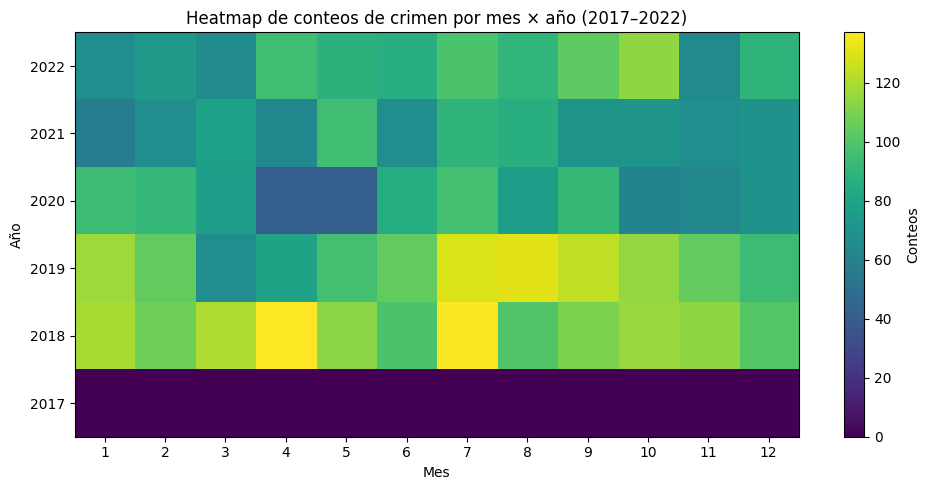

PNG guardado en: /content/eda_heatmap_2017_2022_20250902_020949.png


In [ ]:
# ============================================================
# Heatmap mes × año (2017–2022)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Fallbacks por si no existen (no afectan si ya estan definidos)
OUT_DIR = OUT_DIR if 'OUT_DIR' in locals() else "/content"
TS = TS if 'TS' in locals() else pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
os.makedirs(OUT_DIR, exist_ok=True)

# 1) Fuente: usa el DF filtrado; si no existe, cae a otros
if "df_crime_win" in locals():
    df_hm = df_crime_win.copy()
elif "df_crime_5y" in locals():
    df_hm = df_crime_5y.copy()
elif "df_crime" in locals():
    df_hm = df_crime.copy()
else:
    raise RuntimeError("No encuentro df_crime_win/df_crime_5y/df_crime para el heatmap.")

# 2) Asegurar columna 'count'
if "count" not in df_hm.columns:
    if "value" in df_hm.columns and pd.api.types.is_numeric_dtype(df_hm["value"]):
        df_hm["count"] = pd.to_numeric(df_hm["value"], errors="coerce").fillna(0)
    else:
        df_hm["count"] = 1

# 3) Asegurar 'period_dt'
def _month_to_num(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    MAP = {
        "january":1,"february":2,"march":3,"april":4,"may":5,"june":6,
        "july":7,"august":8,"september":9,"october":10,"november":11,"december":12,
        "jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"sept":9,"oct":10,"nov":11,"dec":12,
        "enero":1,"febrero":2,"marzo":3,"abril":4,"mayo":5,"junio":6,
        "julio":7,"agosto":8,"septiembre":9,"setiembre":9,"octubre":10,"noviembre":11,"diciembre":12,
        "ene":1,"abr":4,"may":5,"ago":8,"set":9,"dic":12,
    }
    try:
        v = int(float(s))
        return v if 1 <= v <= 12 else np.nan
    except:
        return MAP.get(s, np.nan)

if "period_dt" not in df_hm.columns or not pd.api.types.is_datetime64_any_dtype(df_hm["period_dt"]):
    try:
        # Si existe tu helper original
        df_hm = ensure_period_dt(df_hm)
    except Exception:
        # Fallback manual
        if "year" in df_hm.columns:
            y = pd.to_numeric(df_hm["year"], errors="coerce")
        else:
            y = pd.Series(np.nan, index=df_hm.index)

        if "month_num" in df_hm.columns:
            m = pd.to_numeric(df_hm["month_num"], errors="coerce")
        elif "month" in df_hm.columns:
            m_raw = df_hm["month"]
            m = m_raw.map(_month_to_num) if m_raw.dtype == object else pd.to_numeric(m_raw, errors="coerce")
        else:
            m = pd.Series(np.nan, index=df_hm.index)

        df_hm["period_dt"] = pd.to_datetime(dict(year=y, month=m, day=1), errors="coerce")

# 4) Filtrar exactamente 2017–2022
df_hm = (df_hm.dropna(subset=["period_dt"])
               .assign(year=lambda d: d["period_dt"].dt.year,
                       month_num=lambda d: d["period_dt"].dt.month))
df_hm = df_hm[(df_hm["year"] >= 2017) & (df_hm["year"] <= 2022)]

# 5) Pivot con todas las celdas (rellena 0 si faltan)
hm = (df_hm.groupby(["year","month_num"])["count"].sum()
             .unstack(fill_value=0)
             .reindex(index=list(range(2017, 2023)), fill_value=0)
             .reindex(columns=list(range(1,13)), fill_value=0))

# 6) Plot
if hm.empty or hm.values.sum() == 0:
    print("No hay datos de crimen en el rango 2017–2022 para construir el heatmap.")
else:
    hm = hm.sort_index(ascending=False)  # anos de mas reciente a más antiguo

    plt.figure(figsize=(10, 5))
    plt.imshow(hm.values, aspect="auto")
    plt.xticks(ticks=np.arange(0,12), labels=[str(i) for i in range(1,13)])
    plt.yticks(ticks=np.arange(len(hm.index)), labels=[str(y) for y in hm.index])
    plt.title("Heatmap de conteos de crimen por mes × año (2017–2022)")
    plt.xlabel("Mes"); plt.ylabel("Año")
    plt.colorbar(label="Conteos")
    heatmap_path = os.path.join(OUT_DIR, f"eda_heatmap_2017_2022_{TS}.png")
    plt.tight_layout()
    plt.savefig(heatmap_path, dpi=150)
    plt.show()
    print("PNG guardado en:", heatmap_path)




### Promedio anual por distrito (2017–2022)

**Barras por distrito:** clasifica territorios de alto/medio/bajo riesgo, se uso utasa ya que es mejor que conteo haciendo una comparacion mas justa entre distritos

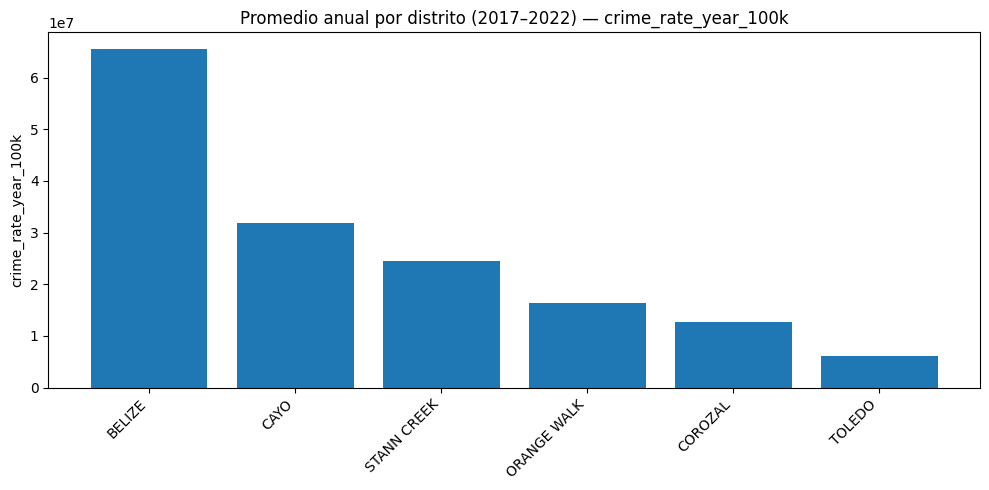

PNG guardado en: /content/eda_barras_distrito_2017_2022_20250902_020949.png


In [ ]:
# ============================================================
# # Barras por distrito (tasa o conteo) (2017–2022)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

bars_path = None

# Chequeos básicos
if 'panel_annual' not in locals() or not isinstance(panel_annual, pd.DataFrame):
    raise RuntimeError("No encuentro 'panel_annual'. Asegurate de correrlo antes el armado de paneles.")

# Detectar columna de distrito
dist_col = None
for cand in ["district"]:
    if cand in panel_annual.columns:
        dist_col = cand; break
if dist_col is None:
    # búsqueda flexible
    for c in panel_annual.columns:
        if isinstance(c, str) and "district" in c.lower():
            dist_col = c; break

if dist_col is None:
    print("No hay columna de distrito en 'panel_annual'; no se pueden hacer las barras.")
else:
    # Filtrar rango 2017–2022
    pa = panel_annual.copy()
    if "year" in pa.columns:
        pa = pa[(pa["year"] >= 2017) & (pa["year"] <= 2022)]
    else:
        print("Advertencia: 'panel_annual' no tiene columna 'year'; se usara tal cual.")
    if pa.empty:
        print("No hay datos en el rango 2017–2021 para construir las barras por distrito.")
    else:
        # Elegir metrico disponible y con datos
        metric_candidates = []
        if "crime_rate_year_100k" in pa.columns and pa["crime_rate_year_100k"].notna().any():
            metric_candidates.append("crime_rate_year_100k")
        if "crime_count_year" in pa.columns and pa["crime_count_year"].notna().any():
            metric_candidates.append("crime_count_year")

        if not metric_candidates:
            print("No hay metricos disponibles ('crime_rate_year_100k' o 'crime_count_year') con datos.")
        else:
            metric = metric_candidates[0]  # prioriza tasa si existe

            base = (pa.groupby(dist_col, dropna=False)[[metric]]
                      .mean()
                      .sort_values(by=metric, ascending=False))

            if base.empty:
                print("Sin datos agrupables por distrito en 2017–2022.")
            else:
                plt.figure(figsize=(10,5))
                plt.bar(base.index.astype(str), base[metric].values)
                plt.title(f"Promedio anual por distrito (2017–2022) — {metric}")
                plt.ylabel(metric)
                plt.xticks(rotation=45, ha="right")
                plt.tight_layout()
                bars_path = os.path.join(OUT_DIR, f"eda_barras_distrito_2017_2022_{TS}.png")
                plt.savefig(bars_path, dpi=150)
                plt.show()
                print("PNG guardado en:", bars_path)



### Seasonal, Trend, Left o residual Analysis



**STL (Seasonal, Trend, Left o residual):** separa la serie en Tendencia, Estacionalidad y Residuo, para entender que parte del cambio es estructural, ciclica o atipica.

Serie + Tendencia: ¿la tendencia sube o baja entre 2017–2021? Los puntos marcan meses excepcionalmente altos/bajos.

Estacionalidad: identifica meses calientes/fríos recurrentes dentro del año (Planificacion ?? ).

Residuo: picos residuales = eventos raros (no explicados por lo ci
clico ni lo estructural).

Usando archivo: /content/FIORELLA-Major crimes-Murder crimes.xlsx
Ventana solicitada: 2017 - 2022
Ventana observada (graficada): 2018-01-01 > 2022-12-01 | n meses: 60


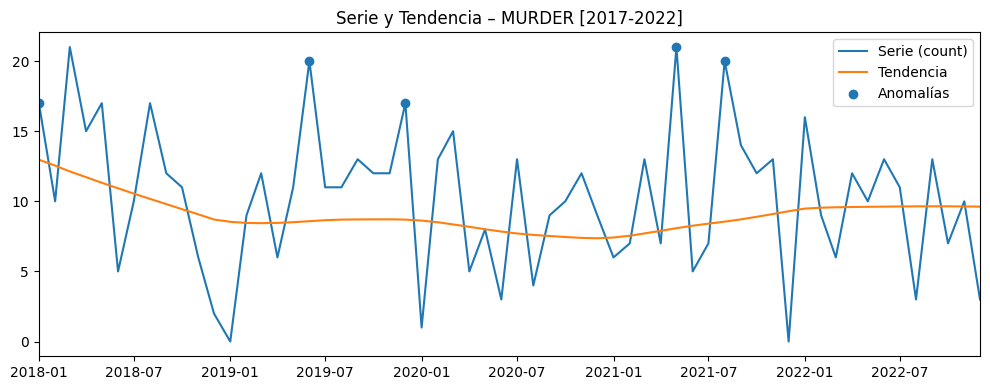

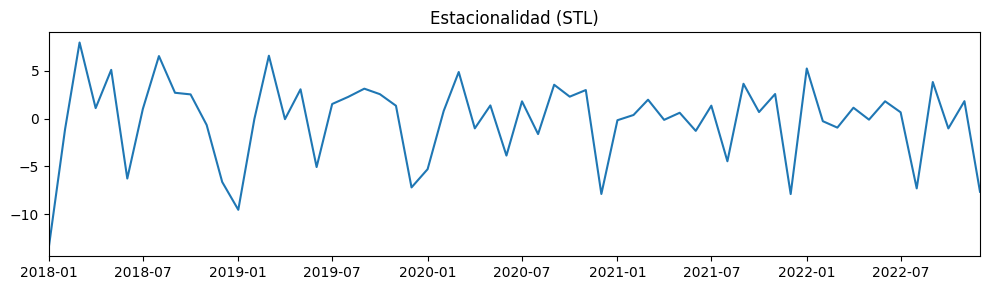

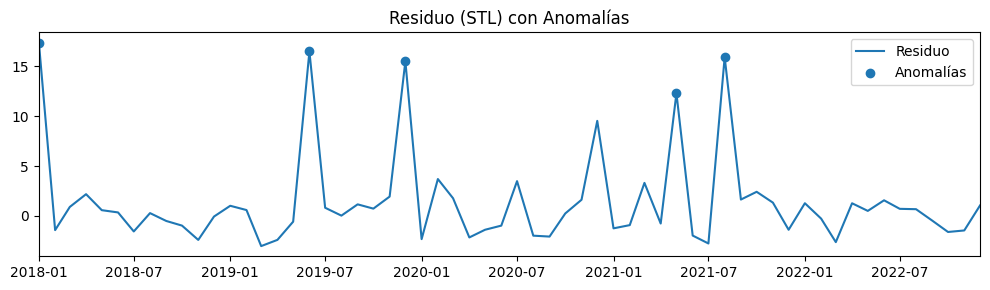


Guardado en:
 - /content/stl_MURDER_2017_2022_series_trend.png 
 - /content/stl_MURDER_2017_2022_seasonal.png 
 - /content/stl_MURDER_2017_2022_residual.png 
 - /content/stl_MURDER_2017_2022_anomalies.csv

Top 10 anomalías por |z|:


date  value  resid  zscore   type
0 2018-01-01  17.00  17.38    3.35  spike
1 2019-06-01  20.00  16.49    3.16  spike
4 2021-08-01  20.00  15.92    3.04  spike
2 2019-12-01  17.00  15.51    2.96  spike
3 2021-05-01  21.00  12.30    2.28  spike

In [ ]:
# # ============================================================
## STL de delitos 2017-2022 solo meses disponibles en ese rango)
## se reindexa solo desde el primer mes observado dentro de 2017–2022 hasta el ultimo mes observado en ese rango
# ============================================================


import os, re, unicodedata, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from IPython.display import display
warnings.filterwarnings("ignore")

# ---------- Paramentros ----------
#------defino que analizar (delito, distrito),
## como medirlo (conteo vs tasa)
###la sensibilidad para detectar picos (SIGMA_Z) y el intervalo temporal (2017–2021)

CRIME_PREF   = "MURDER"    # si existe, usa ese; si no, el mas frecuente
BY_DISTRICT  = None        # ej. "BELIZE" o None para nacional
USE_RATE     = False       # True si el df tiene 'crime_rate_100k'
SIGMA_Z      = 2.0         # umbral |z| para anomalias en 2.0
MIN_MONTHS   = 12          # minimo para STL de meses
OUT_DIR      = "/content"

YEAR_START = 2017
YEAR_END   = 2022

CANDIDATE_NAMES = [
    "Data Request_Major Crimes updated.xlsx",
    "FIORELLA-Major crimes-Murder crimes.xlsx",
    "ANGIE_Major crimes-Murder crimes_Snake_Case.xlsx",
]

# ---------- Helpers ----------
# menos errores por diferencias de formato
## serie temporal mensual limpia para descomponer

def to_snake_case(s: str) -> str:
    if s is None: return "columna"
    s = str(s).strip()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = s.lower()
    s = re.sub(r"[^\w\s]", " ", s)
    s = re.sub(r"\s+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s if s else "columna"

MONTH_MAP = {"january":1,"february":2,"march":3,"april":4,"may":5,"june":6,
             "july":7,"august":8,"september":9,"october":10,"november":11,"december":12,
             "jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"sept":9,"oct":10,"nov":11,"dec":12}
def month_to_num(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    try:
        v = int(float(s))
        if 1 <= v <= 12: return v
    except: pass
    return MONTH_MAP.get(s, np.nan)

def ensure_period_dt(df, year_col="year", month_col="month", period_col="period"):
    out = df.copy()
    if "period_dt" in out.columns:
        try_dt = pd.to_datetime(out["period_dt"], errors="coerce")
        if try_dt.notna().mean() > 0.6:
            out["period_dt"] = try_dt.dt.to_period("M").dt.to_timestamp()
            out["year"]      = out["period_dt"].dt.year.astype("Int64")
            out["month_num"] = out["period_dt"].dt.month.astype("Int64")
            return out
    if period_col in out.columns:
        try_dt = pd.to_datetime(out[period_col], errors="coerce")
        if try_dt.notna().mean() > 0.6:
            out["period_dt"] = try_dt.dt.to_period("M").dt.to_timestamp()
            out["year"]      = out["period_dt"].dt.year.astype("Int64")
            out["month_num"] = out["period_dt"].dt.month.astype("Int64")
            return out
    y = pd.to_numeric(out.get(year_col), errors="coerce")
    mcol = out.get(month_col)
    m = mcol.map(month_to_num) if (isinstance(mcol, pd.Series) and mcol.dtype==object) else pd.to_numeric(mcol, errors="coerce")
    out["period_dt"] = pd.to_datetime(dict(year=y, month=m, day=1), errors="coerce")
    out["year"]      = out["period_dt"].dt.year.astype("Int64")
    out["month_num"] = out["period_dt"].dt.month.astype("Int64")
    return out

def normalize_district(s):
    if s is None: return s
    s = str(s).strip()
    s = re.sub(r"\s+"," ", s)
    return s.upper()

def load_crime_major(path_excel: str) -> pd.DataFrame:
    xl = pd.ExcelFile(path_excel)
    sheet = "Major Crime Incidents" if "Major Crime Incidents" in xl.sheet_names else xl.sheet_names[0]
    df = xl.parse(sheet)
    df = df.dropna(how="all")
    df.columns = [to_snake_case(c) for c in df.columns]
    if "district" in df.columns:
        df["district"] = df["district"].apply(normalize_district)
    period_col = "date_of_incident" if "date_of_incident" in df.columns else "period"
    df = ensure_period_dt(df, year_col="year", month_col="month", period_col=period_col)
    df["count"] = 1
    if "crime" not in df.columns and "major_crime" in df.columns:
        df = df.rename(columns={"major_crime":"crime"})
    return df

def find_or_upload_crime_file():
    # 1) /content exacto
    for name in CANDIDATE_NAMES:
        p = os.path.join("/content", name)
        if os.path.exists(p):
            return p
    # 2) MyDrive raiz (sin recursivo)
    root = "/content/drive/MyDrive"
    if os.path.isdir(root):
        for name in CANDIDATE_NAMES:
            p = os.path.join(root, name)
            if os.path.exists(p):
                import shutil
                dst = os.path.join("/content", os.path.basename(p))
                try: shutil.copy2(p, dst)
                except Exception: dst = p
                return dst
    # 3) API Drive (busqueda por nombre)
    try:
        from google.colab import auth, drive as colab_drive
        from googleapiclient.discovery import build
        from googleapiclient.http import MediaIoBaseDownload
        auth.authenticate_user()
        if not os.path.isdir("/content/drive/MyDrive"):
            colab_drive.mount("/content/drive", force_remount=False)
        drive = build("drive", "v3")
        q = "(" + " or ".join([f"name = '{n}'" for n in CANDIDATE_NAMES]) + ") and trashed = false"
        res = drive.files().list(q=q, fields="files(id,name,modifiedTime)", orderBy="modifiedTime desc").execute()
        files = res.get("files", [])
        if files:
            fid, fname = files[0]["id"], files[0]["name"]
            request = drive.files().get_media(fileId=fid)
            from io import BytesIO
            fh = BytesIO()
            downloader = MediaIoBaseDownload(fh, request)
            done = False
            while not done:
                _, done = downloader.next_chunk()
            with open(os.path.join("/content", fname), "wb") as out:
                out.write(fh.getvalue())
            return os.path.join("/content", fname)
    except Exception:
        pass
    # 4) Subida manual
    from google.colab import files
    print("Selecciona el archivo de crimen (XLSX con la hoja 'Major Crime Incidents'):")
    up = files.upload()
    if up:
        return list(up.keys())[0]
    raise FileNotFoundError("No se proporcionó archivo de crimen.")

# ============ Cargar SIEMPRE desde archivo ============
path = find_or_upload_crime_file()
print("Usando archivo:", path)
df_all = load_crime_major(path)

# ============ Filtro de ventana 2017–2021 ============
start = pd.Timestamp(f"{YEAR_START}-01-01")
end   = pd.Timestamp(f"{YEAR_END}-12-31")

df_plot = df_all.copy()
if BY_DISTRICT:
    df_plot = df_plot[df_plot["district"] == normalize_district(BY_DISTRICT)]
df_plot = df_plot[(df_plot["period_dt"] >= start) & (df_plot["period_dt"] <= end)].copy()

if df_plot.empty:
    raise ValueError(f"No hay datos dentro de {YEAR_START}-{YEAR_END} para el filtro dado.")

# ============ Seleccion de delito ============
## enfoco en categoria de interes o el que domina los datos

cands = df_plot["crime"].astype(str).str.upper()
TOP_CRIME = CRIME_PREF if (CRIME_PREF and CRIME_PREF.upper() in set(cands.unique())) else df_plot["crime"].value_counts().idxmax()

# ============ Serie mensual SOLO donde hay datos (dentro del rango definido del 2017-2022) ============
value_col = "crime_rate_100k" if (USE_RATE and "crime_rate_100k" in df_plot.columns) else "count"
g = (df_plot[df_plot["crime"].astype(str).str.upper() == str(TOP_CRIME).upper()]
        .dropna(subset=["period_dt"])
        .groupby("period_dt")[value_col].sum()
        .sort_index())

if g.empty:
    raise ValueError(f"No hay datos para el delito '{TOP_CRIME}' en {YEAR_START}-{YEAR_END}.")

# Construir un indice mensual continuo **solo** desde el primer mes observado hasta el último dentro del rango
obs_start = g.index.min().to_period("M").to_timestamp()  # normaliza al inicio del mes
obs_end   = g.index.max().to_period("M").to_timestamp()
idx = pd.date_range(start=max(start, obs_start), end=min(end, obs_end), freq="MS")

# Reindexa a ese intervalo (rellena huecos internos con 0, pero no anade anos ausentes fuera de lo observado)
ts = g.reindex(idx).fillna(0)

print("Ventana solicitada:", YEAR_START, "-", YEAR_END)
print("Ventana observada (graficada):", ts.index.min().date(), ">", ts.index.max().date(), "| n meses:", len(ts))

# Chequeo de longitud para STL
assert len(ts) >= MIN_MONTHS, f"Serie insuficiente para STL (>= {MIN_MONTHS} meses). Observados: {len(ts)}."

# ============ STL ============
stl = STL(ts, period=12, robust=True).fit()
trend, seasonal, resid = stl.trend, stl.seasonal, stl.resid

# ---------- Anomalias ----------
## Marca anomalias cuando |z| ≥ SIGMA_Z > por defecto 2.0
### Senala meses inusuales que no encuentran razon en su tendencia o momento (Puntos a investigar ??**)

rmean, rstd = resid.mean(), resid.std(ddof=1) if resid.std(ddof=1) > 0 else 1.0
z = (resid - rmean) / rstd
anom = z.abs() >= SIGMA_Z
anomalies = pd.DataFrame({
    "date": z.index[anom],
    "value": ts.loc[anom].values,
    "resid": resid.loc[anom].values,
    "zscore": z.loc[anom].values,
    "type": np.where(z.loc[anom].values > 0, "spike", "dip")
}).sort_values("zscore", key=lambda s: s.abs(), ascending=False)

# ============ Plots (ejes bloqueados a lo observado) ============
os.makedirs(OUT_DIR, exist_ok=True)
tag = f"{str(TOP_CRIME).replace(' ','_')}{'_'+normalize_district(BY_DISTRICT) if BY_DISTRICT else ''}_{YEAR_START}_{YEAR_END}"

def lock_xlim_to_observed():
    ax = plt.gca()
    ax.set_xlim(ts.index.min(), ts.index.max())
    ax.margins(x=0)

plt.figure(figsize=(10,4))
plt.plot(ts, label=f"Serie ({value_col})")
plt.plot(trend, label="Tendencia")
if not anomalies.empty:
    plt.scatter(anomalies["date"], anomalies["value"], label="Anomalías")
plt.title(f"Serie y Tendencia – {TOP_CRIME}" + (f" – {BY_DISTRICT.upper()}" if BY_DISTRICT else "") + f" [{YEAR_START}-{YEAR_END}]")
plt.legend()
lock_xlim_to_observed()
f1 = os.path.join(OUT_DIR, f"stl_{tag}_series_trend.png")
plt.tight_layout(); plt.savefig(f1, dpi=150); plt.show()

plt.figure(figsize=(10,3))
plt.plot(seasonal)
plt.title("Estacionalidad (STL)")
lock_xlim_to_observed()
f2 = os.path.join(OUT_DIR, f"stl_{tag}_seasonal.png")
plt.tight_layout(); plt.savefig(f2, dpi=150); plt.show()

plt.figure(figsize=(10,3))
plt.plot(resid, label="Residuo")
if not anomalies.empty:
    plt.scatter(anomalies["date"], anomalies["resid"], label="Anomalías")
plt.title("Residuo (STL) con Anomalías")
plt.legend()
lock_xlim_to_observed()
f3 = os.path.join(OUT_DIR, f"stl_{tag}_residual.png")
plt.tight_layout(); plt.savefig(f3, dpi=150); plt.show()

csv_path = os.path.join(OUT_DIR, f"stl_{tag}_anomalies.csv")
anomalies.to_csv(csv_path, index=False)

print("\nGuardado en:\n -", f1, "\n -", f2, "\n -", f3, "\n -", csv_path)
print("\nTop 10 anomalías por |z|:")
display(anomalies.head(10))



### Incidentes por distrito (2017–2022)

**Tendencia por Distrito** : incidente por distrito entre 2017 al 2022

[info] usando dataframe fuente: df_crime_win
Meses detectados en el rango: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Cobertura mensual por año (número de meses con datos 1–12):
year
2018    12
2019    12
2020    12
2021    12
2022    12
{'geo_cols': {'lat': None, 'lon': None, 'district': 'district'}, 'rows_after_filter': 5441}


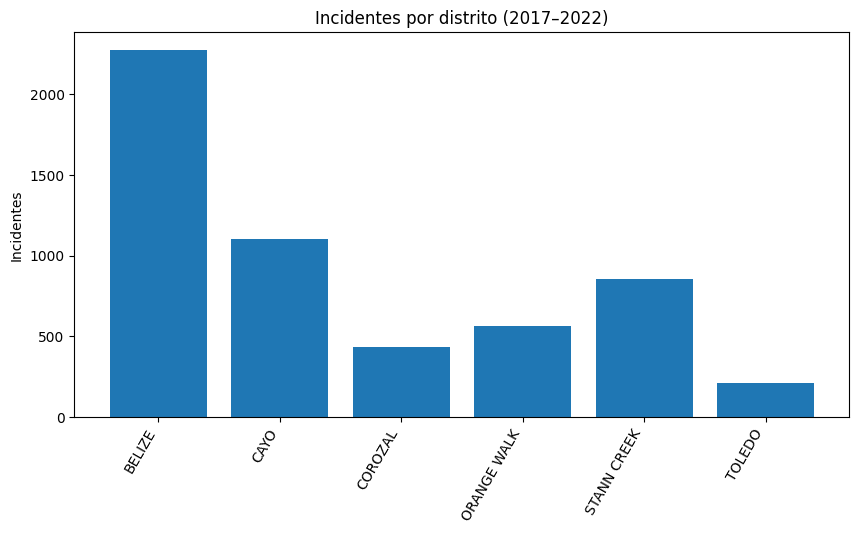

[saved] /content/08_por_distrito.png
[info] No se detectaron columnas lat/lon.


In [ ]:
# ---------- Geografía (detectar meses reales y normalizar distritos) ----------
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------- Utilidades de salida --------------------
OUT_DIR = OUT_DIR if 'OUT_DIR' in locals() else "/content/outputs"
os.makedirs(OUT_DIR, exist_ok=True)

def save_show(fig, name):
    path = os.path.join(OUT_DIR, name)
    fig.savefig(path, dpi=150, bbox_inches="tight"); plt.show()
    print(f"[saved] {path}")

# -------------------- Limpieza de columnas --------------------
def snake(s):
    if s is None: return s
    s = re.sub(r"[\s\-\/]+","_", str(s).strip().lower())
    s = re.sub(r"[^a-z0-9_]", "", s)
    return re.sub(r"_+","_", s)

def standardize_columns(df):
    df = df.copy()
    df.columns = [snake(c) for c in df.columns]
    return df

# -------------------- Mapa de meses EN/ES --------------------
MONTH_MAP = {
    "january":1,"february":2,"march":3,"april":4,"may":5,"june":6,
    "july":7,"august":8,"september":9,"october":10,"november":11,"december":12,
    "jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"sept":9,"oct":10,"nov":11,"dec":12,
    "enero":1,"febrero":2,"marzo":3,"abril":4,"mayo":5,"junio":6,
    "julio":7,"agosto":8,"septiembre":9,"setiembre":9,"octubre":10,"noviembre":11,"diciembre":12,
    "ene":1,"abr":4,"ago":8,"set":9,"dic":12,
}

def _to_month_num(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    # YYYY-MM o YYYY/MM
    if re.fullmatch(r"\d{4}[-/]\d{1,2}", s):
        dt = pd.to_datetime(s, errors="coerce"); return dt.month if pd.notna(dt) else np.nan
    # MM/YYYY
    if re.fullmatch(r"\d{1,2}[-/]\d{4}", s):
        dt = pd.to_datetime(s, errors="coerce", dayfirst=True); return dt.month if pd.notna(dt) else np.nan
    # formatos tipo "Jan 2019" o "Enero 2021"
    if re.search(r"[a-z]", s) and re.search(r"(?:19|20)\d{2}", s):
        try:
            dt = pd.to_datetime(s, errors="coerce")
            return dt.month if pd.notna(dt) else MONTH_MAP.get(s.split()[0], np.nan)
        except:
            pass
    # número directo o nombre de mes
    try:
        v = int(float(s));  return v if 1 <= v <= 12 else np.nan
    except:
        return MONTH_MAP.get(s, np.nan)

def _looks_like_year_only(series_obj):
    """True si ~90% de los valores lucen como 'YYYY' o 'YYYY/YY' (sin mes)."""
    s = series_obj.dropna().astype(str).str.strip()
    if len(s) == 0: return False
    pat = s.str.match(r"^(?:19|20)\d{2}(?:\s*[/\-]\s*\d{2})?$")
    return pat.mean() >= 0.9

def coerce_datetime_rich(df):
    """
    Deriva year y month desde múltiples columnas, evitando usar columnas que son solo AÑO.
    month_dt se crea SOLO si hay year y month válidos (1..12).
    """
    df = df.copy()
    # 1) intenta YEAR y MONTH por columnas explícitas
    y = None; m = None
    if "year" in df.columns:
        y = pd.to_numeric(df["year"], errors="coerce")
    # candidatos de mes
    for cand in ["month_num","month","mes","mes_num","monthname","month_name","period","periodo"]:
        if cand in df.columns and m is None:
            col = df[cand]
            if _looks_like_year_only(col):  # si parece solo año, ignora
                continue
            m_try = col.map(_to_month_num) if col.dtype == object else pd.to_numeric(col, errors="coerce")
            if m_try.notna().sum() > 0:
                m = m_try

    # 2) Si aún no hay YEAR/MONTH, busca columnas fecha REALES (no solo año)
    dt = None
    for c in df.columns:
        name = str(c).lower()
        if any(k in name for k in ["datetime","date","fecha","incident","occurr","event","start","end","created"]):
            col = df[c]
            if _looks_like_year_only(col):
                continue
            tmp = pd.to_datetime(col, errors="coerce", infer_datetime_format=True)
            if tmp.notna().sum() > 0:
                dt = tmp; break

    if dt is not None:
        if y is None: y = dt.dt.year
        if m is None: m = dt.dt.month

    # 3) Asigna columnas finales
    df["year"]  = pd.to_numeric(y, errors="coerce")
    df["month"] = pd.to_numeric(m, errors="coerce")

    # 4) Derivados diarios SOLO si tenemos dt real
    if dt is not None:
        df["datetime"] = pd.to_datetime(dt, errors="coerce")
        df["date"]     = pd.to_datetime(df["datetime"].dt.date, errors="coerce")
        df["day"]      = df["datetime"].dt.day
        df["weekday"]  = df["datetime"].dt.day_name()
        df["hour"]     = df["datetime"].dt.hour
    else:
        df["datetime"] = pd.NaT
        df["date"] = pd.NaT
        df["day"] = np.nan
        df["weekday"] = np.nan
        df["hour"] = np.nan

    # 5) month_dt SOLO si hay year y month válidos
    mask = df["year"].notna() & df["month"].between(1,12, inclusive="both")
    df["month_dt"] = pd.NaT
    df.loc[mask, "month_dt"] = pd.to_datetime(
        dict(year=df.loc[mask,"year"].astype(int),
             month=df.loc[mask,"month"].astype(int),
             day=1),
        errors="coerce"
    )
    return df

def detect_geo_columns(df):
    cols = df.columns
    lat = next((c for c in cols if c in ("lat","latitude","y","latitud")), None)
    lon = next((c for c in cols if c in ("lon","lng","longitude","x","longitud")), None)
    district = next((c for c in cols if c in ("district","distrito","municipio","canton","county","borough","sector","zone","zona","parish")), None)
    return lat, lon, district

# -------------------- Normalización de distritos --------------------
# 6 distritos oficiales de Belice
VALID_DISTRICTS = {
    "belize", "cayo", "stann creek", "orange walk", "corozal", "toledo"
}

# Localidad/pueblo/ciudad -> distrito
LOCALITY_TO_DISTRICT = {
    # BELIZE
    "belize city": "belize", "ladyville": "belize", "san pedro": "belize",
    "san pedro town": "belize", "caye caulker": "belize", "burrell boom": "belize",
    "hattieville": "belize",

    # CAYO
    "belmopan": "cayo", "san ignacio": "cayo", "santa elena": "cayo",
    "benque viejo del carmen": "cayo", "benque viejo": "cayo",

    # STANN CREEK
    "dangriga": "stann creek", "hopkins": "stann creek", "placencia": "stann creek",
    "seine bight": "stann creek", "independence": "stann creek", "mango creek": "stann creek",

    # TOLEDO
    "punta gorda": "toledo", "indian creek": "toledo", "big falls": "toledo", "big fall": "toledo",

    # ORANGE WALK
    "orange walk town": "orange walk", "trial farm": "orange walk",
    "yo creek": "orange walk", "guinea grass": "orange walk",

    # COROZAL
    "corozal town": "corozal", "sarteneja": "corozal", "consejo": "corozal",
}

def _clean_key(s):
    s = str(s)
    s = s.strip().lower()
    s = (s.encode("ascii", "ignore").decode("ascii"))  # quita acentos
    s = re.sub(r"[^a-z\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def to_district_standard(val):
    k = _clean_key(val)
    if not k:
        return np.nan
    if k in VALID_DISTRICTS:
        return k
    if k in LOCALITY_TO_DISTRICT:
        return LOCALITY_TO_DISTRICT[k]
    # intenta quitar sufijos comunes
    k2 = re.sub(r"\s+(town|village|city|comunidad|barrio)$", "", k).strip()
    if k2 in VALID_DISTRICTS:
        return k2
    if k2 in LOCALITY_TO_DISTRICT:
        return LOCALITY_TO_DISTRICT[k2]
    return np.nan  # si no se reconoce, descarta

# -------------------- Reconstrucción y filtrado del DF --------------------
# 1) Reconstruir 'crime' si no existe a partir de variables conocidas
if 'crime' not in locals():
    source = None
    for name in ['df_crime_win','df_crime_5y','df_crime','crime_df']:
        if name in locals():
            source = eval(name).copy()
            print(f"[info] usando dataframe fuente: {name}")
            break
    if source is None:
        raise RuntimeError("No encontré un dataframe de crimen en memoria (df_crime_win/df_crime_5y/df_crime/crime_df).")
    crime = standardize_columns(source)

# 2) Derivar YEAR/MONTH y filtrar 2017–2022
crime = coerce_datetime_rich(crime)
crime = crime[(crime["year"]>=2017) & (crime["year"]<=2022)].copy()

# 3) Diagnóstico de meses detectados por año
months_present = sorted(crime["month"].dropna().astype(int).unique().tolist())
print("Meses detectados en el rango:", months_present if months_present else "(sin mes detectado)")

cov = (crime.dropna(subset=["month"])
             .groupby(["year","month"]).size()
             .unstack(fill_value=0)
             .reindex(columns=range(1,13), fill_value=0))
if not cov.empty:
    cov["n_meses_con_datos"] = (cov>0).sum(axis=1)
    print("\nCobertura mensual por año (número de meses con datos 1–12):")
    print(cov["n_meses_con_datos"].to_string())
else:
    print("\nNo hay cobertura mensual (los registros no traen 'month').")

# 4) Detección de columnas geográficas
lat_col, lon_col, district_col = detect_geo_columns(crime)
print({"geo_cols":{"lat":lat_col,"lon":lon_col,"district":district_col},
       "rows_after_filter": len(crime)})

# -------------------- Estandarización de distrito --------------------
if district_col:
    crime["district_std"] = crime[district_col].map(to_district_standard)

    # Diagnóstico: etiquetas no mapeadas (para enriquecer el diccionario si hace falta)
    unknown = (crime[district_col][crime["district_std"].isna()]
               .astype(str)
               .map(_clean_key))
    unknown_counts = unknown[unknown != ""].value_counts().head(15)
    if len(unknown_counts) > 0:
        print("\n[diag] Etiquetas NO mapeadas (top 15):")
        print(unknown_counts.to_string())
else:
    crime["district_std"] = np.nan
    print("[info] No se detectó columna de distrito (district/distrito/municipio...).")

# -------------------- Gráficas --------------------
# A) Barras por distrito usando el campo estandarizado
by_dist = (crime.dropna(subset=["district_std"])
                .groupby("district_std").size()
                .reindex(sorted(list(VALID_DISTRICTS)), fill_value=0))

if by_dist.sum() > 0:
    fig = plt.figure(figsize=(10,5))
    plt.bar(by_dist.index.str.upper(), by_dist.values)
    plt.xticks(rotation=60, ha="right")
    plt.title("Incidentes por distrito (2017–2022)")
    plt.ylabel("Incidentes")
    save_show(fig, "08_por_distrito.png")
else:
    print("[info] No hay datos válidos de distrito tras la estandarización.")

# B) Hexbin espacial si hay lat/lon
if lat_col and lon_col:
    dfgeo = crime[[lat_col,lon_col]].dropna()
    if len(dfgeo) > 0:
        fig = plt.figure(figsize=(6,6))
        plt.hexbin(dfgeo[lon_col], dfgeo[lat_col], gridsize=40, mincnt=1)
        plt.xlabel("Longitud"); plt.ylabel("Latitud"); plt.title("Densidad espacial (hexbin)")
        cb = plt.colorbar(); cb.set_label("Incidentes")
        save_show(fig, "09_hexbin_espacial.png")
    else:
        print("[info] No hay coordenadas válidas para el hexbin tras el filtro 2017–2022.")
else:
    print("[info] No se detectaron columnas lat/lon.")


### Tendencias

**Lectura**:

**YoY**

`2018 > 2019:` baja moderada (–7.8%).

`2019 > 2020:` caida pronunciada (–29.7%), consistente con el impacto de la pandemia/restricciones.

`2020 > 2021:` practicamente sin cambio (–0.6%).

`2021 > 2022:` rebote (+17.2%), aunque el nivel de 2022 sigue –24.5% por debajo de 2018 (1,035 vs 1,371).

`Balance 2018 > 2022:`reduccion acumulada aproximada de –24.5% del total anual.

Meses detectados en el rango: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Cobertura mensual por año (número de meses con datos 1–12):
year
2018    12
2019    12
2020    12
2021    12
2022    12

=== Variación anual (YoY %) ===
      count  yoy_pct
year                
2018   1371      NaN
2019   1264    -7.80
2020    888   -29.75
2021    883    -0.56
2022   1035    17.21


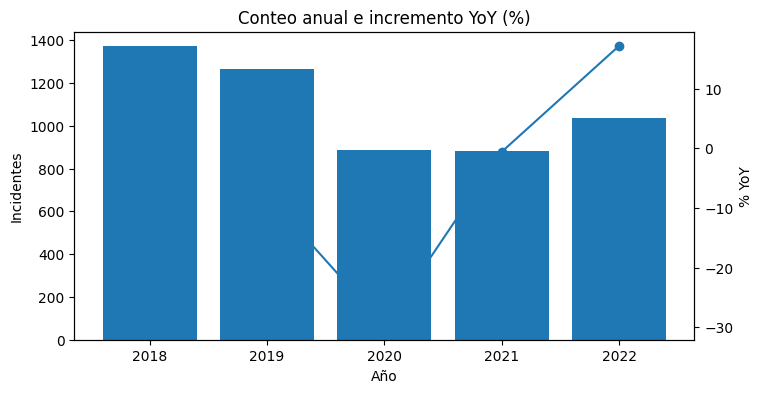

[saved] /content/12_yoy_plot.png


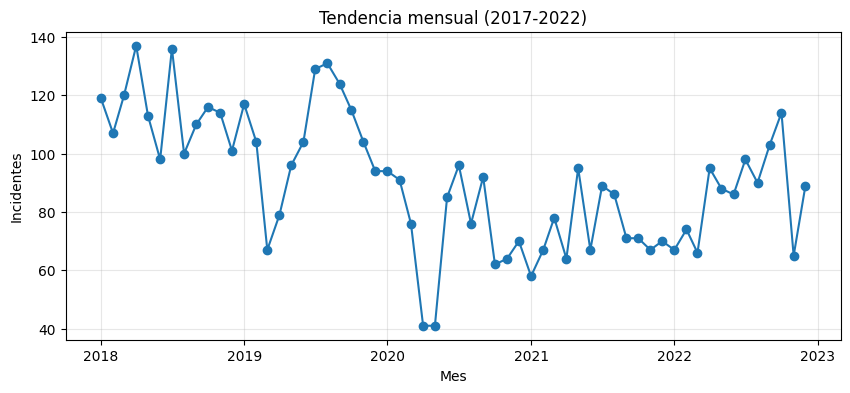

[saved] /content/01_tendencia_mensual_REAL.png


In [ ]:
# ---------- Metricas extra: YoY + diagnostico de meses ----------
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, re

# Asegurar OUT_DIR y helper para guardar
OUT_DIR = OUT_DIR if 'OUT_DIR' in locals() else "/content/outputs"
os.makedirs(OUT_DIR, exist_ok=True)

if 'save_show' not in locals():
    def save_show(fig, name, out_dir=OUT_DIR):
        path = os.path.join(out_dir, name)
        fig.savefig(path, dpi=150, bbox_inches="tight"); plt.show()
        print(f"[saved] {path}")

# --- Mapeo de meses (EN/ES) para columnas textuales ---
MONTH_MAP = {
  # EN completo
  "january":1,"february":2,"march":3,"april":4,"may":5,"june":6,
  "july":7,"august":8,"september":9,"october":10,"november":11,"december":12,
  # EN abreviado
  "jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"sept":9,"oct":10,"nov":11,"dec":12,
  # ES completo
  "enero":1,"febrero":2,"marzo":3,"abril":4,"mayo":5,"junio":6,
  "julio":7,"agosto":8,"septiembre":9,"setiembre":9,"octubre":10,"noviembre":11,"diciembre":12,
  # ES abreviado
  "ene":1,"abr":4,"ago":8,"set":9,"dic":12,
}

def _to_month_num(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    # si viene como "YYYY-MM" o "YYYY/MM" lo parseamos directo
    if re.fullmatch(r"\d{4}[-/]\d{1,2}", s):
        try:
            dt = pd.to_datetime(s, errors="coerce")
            return dt.month if pd.notna(dt) else np.nan
        except:
            return np.nan
    # si es numero
    try:
        v = int(float(s))
        return v if 1 <= v <= 12 else np.nan
    except:
        return MONTH_MAP.get(s, np.nan)

def ensure_time_cols_no_fake_january(df):
    """
    - Intenta derivar YEAR y MONTH desde múltiples columnas.
    - NO 'inventa' enero: si no hay mes, deja month=NaN.
    - Construye month_dt solo cuando (year y month) existen.
    """
    df = df.copy()

    y = None; m = None

    # 1) Si ya hay una columna datetime consistente, se usa
    for c in df.columns:
        if any(k in str(c).lower() for k in ["datetime","date","fecha","period","periodo","month_name"]):
            tmp = pd.to_datetime(df[c], errors="coerce", infer_datetime_format=True)
            if tmp.notna().any():
                if y is None: y = tmp.dt.year
                # si trae mes real, se usa; si son puras fechas de 1/ene, igual se capturan
                m = tmp.dt.month
                break

    # 2) Columnas dedicadas de year / month
    if y is None and "year" in df.columns:
        y = pd.to_numeric(df["year"], errors="coerce")
    if m is None:
        if "month_num" in df.columns:
            m = pd.to_numeric(df["month_num"], errors="coerce")
        elif "month" in df.columns:
            col = df["month"]
            m = col.map(_to_month_num) if col.dtype == object else pd.to_numeric(col, errors="coerce")

    # 3) Como último recurso para el AÑO, intenta extraer de cadenas tipo "2019/20" -> 2019
    if y is None and "period" in df.columns:
        y = pd.to_numeric(df["period"].astype(str).str.extract(r"((?:19|20)\d{2})", expand=False), errors="coerce")

    # 4) Asigna columnas; 'month' puede quedar NaN y está bien
    df["year"]  = pd.to_numeric(y, errors="coerce")
    df["month"] = pd.to_numeric(m, errors="coerce")

    # 5) month_dt solo si tenemos year y month validos
    mask_month = df["year"].notna() & df["month"].between(1,12, inclusive="both")
    df["month_dt"] = pd.NaT
    df.loc[mask_month, "month_dt"] = pd.to_datetime(dict(year=df.loc[mask_month,"year"].astype(int),
                                                         month=df.loc[mask_month,"month"].astype(int),
                                                         day=1), errors="coerce")
    return df

# ----------------- Ejecutar preparacion -----------------
START_YEAR = 2017 if 'START_YEAR' not in locals() else START_YEAR
END_YEAR   = 2022 if 'END_YEAR'   not in locals() else END_YEAR

# Asegurar que 'crime' existe
if 'crime' not in locals():
    raise RuntimeError("No encuentro el DataFrame 'crime' en memoria.")

crime_t = ensure_time_cols_no_fake_january(crime)
crime_f = crime_t[(crime_t['year']>=START_YEAR) & (crime_t['year']<=END_YEAR)].copy()

# ----------------- Diagnostico de meses -----------------
months_present = sorted(crime_f["month"].dropna().unique().astype(int).tolist())
print("Meses detectados en el rango:", months_present if months_present else "(sin mes detectado)")

# Cobertura: cuantos meses validos hay por año
cov = (crime_f.dropna(subset=["month"])
               .groupby(["year","month"]).size()
               .unstack(fill_value=0)
               .reindex(columns=range(1,13), fill_value=0))
if not cov.empty:
    cov["n_meses_con_datos"] = (cov>0).sum(axis=1)
    print("\nCobertura mensual por año (número de meses con datos 1–12):")
    print(cov["n_meses_con_datos"].to_string())
else:
    print("\nNo hay cobertura mensual (los registros no traen 'month').")

# ----------------- YoY (usa TODO lo disponible por año) -----------------
yoy = (crime_f.groupby("year").size()
       .rename("count")
       .to_frame()
       .assign(yoy_pct=lambda d: d["count"].pct_change()*100))

print("\n=== Variación anual (YoY %) ===")
print(yoy.to_string())

# CSV y grafico YoY
yoy.to_csv(os.path.join(OUT_DIR, "12_yoy_variacion_anual.csv"))
fig = plt.figure(figsize=(8,4))
ax = plt.gca()
ax.bar(yoy.index.astype(str), yoy["count"].values)
ax.set_xlabel("Año"); ax.set_ylabel("Incidentes")
ax.set_title("Conteo anual e incremento YoY (%)")
ax2 = ax.twinx()
ax2.plot(yoy.index.astype(str), yoy["yoy_pct"].values, marker="o")
ax2.set_ylabel("% YoY")
save_show(fig, "12_yoy_plot.png")

# ----------------- (Opcional) Serie mensual real -----------------
# Solo si existen meses validos, graficar tendencia mensual
if crime_f["month_dt"].notna().any():
    ts_month = (crime_f.dropna(subset=["month_dt"])
                        .set_index("month_dt")
                        .groupby(pd.Grouper(freq="MS"))
                        .size()
                        .rename("count")
                        .reset_index()
                        .sort_values("month_dt"))
    fig = plt.figure(figsize=(10,4))
    plt.plot(ts_month["month_dt"], ts_month["count"], marker="o")
    plt.title(f"Tendencia mensual ({START_YEAR}-{END_YEAR})"); plt.xlabel("Mes"); plt.ylabel("Incidentes")
    plt.grid(True, alpha=.3)
    save_show(fig, "01_tendencia_mensual_REAL.png")
else:
    print("\n[AVISO] No hay mes válido en los datos; no se genera gráfica mensual.")



# Modelado Predictivo


## Modelo predictivo: Regresión Lineal Múltiple

Para el modelo, necesitamos hacer los siguientes pasos:
- Definir una variable objetivo para nuestro modelo de regresión lineal
- Cargar y preparar los demás 'datasets'
- Unificar los 'Datasets' en un solo DataFrame


### Preparamos los datos para el modelo de regresión lineal múltiple

In [ ]:
# @title Librerías necesarias
from IPython.display import display
import pandas as pd

In [ ]:
# @title Archivos preprocesados y limpios

base_url = 'https://drive.google.com/uc?export=download&id='

# MidYear_Estimates_AdministrativeArea_Sex_2015-2025.xlsx
midYearEstimates_administrativeArea_sex_path = base_url + '1Ir3rT2pjOE1GZFpkkcez68RFzMmhSGeE'

# VocationalEducation_2021-2022_standardized.xlsx
vocationalEducation_standardized_path = base_url + '1Xedy_1X8IUVLsVRQEfWNfeCPau-Y2_BI'

# Leading causes of death 2017-2021.xlsx
leadingCausesOfDeath_path = base_url + '1SfzV66PEk9Umop6I6LvN_48A8GRZNU59'

# MainLaborForceIndicators_2012-2024.xlsx
mainLaborForceIndicators_path = base_url + '1Rm96lMuZS1jySxGoQpTlik0nXpGVfjpg'

# Major crimes-Murder crimes_Snake_Case.xlsx
majorCrimes_MurderCrimes_path = base_url + '1hYPFi4zLR5tZtVVc8Ig0VYzIcBzlskAq'

# PreSchoolEducation_Cleaned - Preschools by District.csv
preschools_district_path = base_url + '1J3sXDrK4imXNi_hwjeEfA7Z8cwvZoVUE'

# PreSchoolEducation_Cleaned - Number of Preschools by Management x UrbanRural.csv
preschools_management_urbanRural_path = base_url + '1MzTF0jR6XYTQDRSgCh1bkH7QdwcAODGV'

# PreSchoolEducation_Cleaned - Number of Preschool Teachers by District.csv
preschoolTeachers_district_path = base_url + '1fZFFVtlHeJKSUi-qgnHumOceMrX1_i_l'

# SecondaryEducation_CLEANED - secondary_district.csv
secondary_district_path = base_url + '18aQ87Fo4VoaGuoZR9e20BFaDkm9gTA2J'

# SecondaryEducation_CLEANED - secondary_management_urbanRural.csv
secondary_management_urbanRural_path = base_url + '1XUt8mWhCVuc-LLQxFoDw1zxDQnT3SzIm'

# SecondaryEducation_CLEANED - secondaryTeachers_district.csv
secondaryTeachers_district_path = base_url + '1L4uecvYKDKZYNyi_ggZdGgnzWyZM0nhR'

# SecondaryEducation_CLEANED - secondaryCompletion_sex.csv
secondaryCompletion_sex_path = base_url + '1HN-bUjXFFanOHN7AtNduvDuuN-lY9cmi'

In [ ]:
# @title Preparamos majorCrimes_MurderCrimes

df_mc = pd.read_excel(majorCrimes_MurderCrimes_path, engine='openpyxl')
display(df_mc.describe(include='all'))
print('\n')
display(df_mc.head(15))

crime         year month district location_type    formation  \
count       7619  7619.000000  7619     7619          7619         7619   
unique         6          NaN    14       14            14           25   
top     BURGLARY          NaN  JULY   BELIZE     RESIDENCE  BELIZE CITY   
freq        4198          NaN   715     3129          3499         1493   
mean         NaN  2020.862580   NaN      NaN           NaN          NaN   
std          NaN     2.092038   NaN      NaN           NaN          NaN   
min          NaN  2018.000000   NaN      NaN           NaN          NaN   
25%          NaN  2019.000000   NaN      NaN           NaN          NaN   
50%          NaN  2021.000000   NaN      NaN           NaN          NaN   
75%          NaN  2023.000000   NaN      NaN           NaN          NaN   
max          NaN  2024.000000   NaN      NaN           NaN          NaN   

       pricinct_rural_coastal type_of_waepon    motivation  
count                    7445           7619          7619  
unique                      8              7            25  
top              UNDETERMINED   UNDETERMINED  UNDETERMINED  
freq                     5140           3030          3593  
mean                      NaN            NaN           NaN  
std                       NaN            NaN           NaN  
min                       NaN            NaN           NaN  
25%                       NaN            NaN           NaN  
50%                       NaN            NaN           NaN  
75%                       NaN            NaN           NaN  
max                       NaN            NaN           NaN

crime  year     month district   location_type    formation  \
0   BURGLARY  2018    AUGUST   BELIZE       RESIDENCE    LADYVILLE   
1   BURGLARY  2018    AUGUST   BELIZE       RESIDENCE  BELIZE CITY   
2   BURGLARY  2018    AUGUST   BELIZE       RESIDENCE  BELIZE CITY   
3   BURGLARY  2018  DECEMBER   BELIZE       RESIDENCE    SAN PEDRO   
4   BURGLARY  2018  DECEMBER   BELIZE    PUBLIC PLACE    LADYVILLE   
5   BURGLARY  2018  DECEMBER   BELIZE       RESIDENCE  BELIZE CITY   
6   BURGLARY  2018  DECEMBER   BELIZE       RESIDENCE  BELIZE CITY   
7   BURGLARY  2018  NOVEMBER   BELIZE       RESIDENCE  BELIZE CITY   
8   BURGLARY  2018  NOVEMBER   BELIZE       RESIDENCE    LADYVILLE   
9   BURGLARY  2018  NOVEMBER   BELIZE    PUBLIC PLACE  BELIZE CITY   
10  BURGLARY  2018  NOVEMBER   BELIZE  BUSINESS PLACE  BELIZE CITY   
11  BURGLARY  2018  NOVEMBER   BELIZE    PUBLIC PLACE    LADYVILLE   
12  BURGLARY  2018   JANUARY   BELIZE       RESIDENCE    LADYVILLE   
13  BURGLARY  2018   JANUARY   BELIZE       RESIDENCE  BELIZE CITY   
14  BURGLARY  2018   JANUARY   BELIZE       RESIDENCE  BELIZE CITY   

   pricinct_rural_coastal type_of_waepon        motivation  
0                   RURAL        FIREARM         FINANCIAL  
1                       3   UNDETERMINED         FINANCIAL  
2                       4        FIREARM         FINANCIAL  
3                 COASTAL   SHARP OBJECT  MISUNDERSTANDING  
4                   RURAL        FIREARM         FINANCIAL  
5                       3        FIREARM         FINANCIAL  
6                       3        FIREARM         FINANCIAL  
7                       2   SHARP OBJECT         FINANCIAL  
8                   RURAL        FIREARM         FINANCIAL  
9                       4        FIREARM         FINANCIAL  
10                      2        FIREARM         FINANCIAL  
11                  RURAL        FIREARM  MISUNDERSTANDING  
12                  RURAL   SHARP OBJECT             OTHER  
13                      1   SHARP OBJECT         FINANCIAL  
14                      1   SHARP OBJECT            SEXUAL

Definimos la variable objetivo **'crime_count'**

In [ ]:
  df_mc_rdy = df_mc.groupby(['year', 'month', 'district']).size().reset_index(name='crime_count')
  df_mc_rdy.head()

year  month     district  crime_count
0  2018  APRIL       BELIZE           59
1  2018  APRIL         CAYO           26
2  2018  APRIL      COROZAL            7
3  2018  APRIL  ORANGE WALK           11
4  2018  APRIL  STANN CREEK           31

In [ ]:
# @title Preparamos midYearEstimates_administrativeArea_sex

df_mye = pd.read_excel(midYearEstimates_administrativeArea_sex_path, engine='openpyxl')
display(df_mye.dtypes)
display(df_mye.describe(include='all'))
print('\n')
display(df_mye.head(15))

country                object
admin_level            object
district               object
admin_area             object
sex                    object
year                    int64
population            float64
period_dt      datetime64[ns]
dtype: object

country          admin_level district  \
count     1782                 1782      396   
unique       1                    3        6   
top     Belize  administrative_area   Belize   
freq      1782                 1320       66   
mean       NaN                  NaN      NaN   
min        NaN                  NaN      NaN   
25%        NaN                  NaN      NaN   
50%        NaN                  NaN      NaN   
75%        NaN                  NaN      NaN   
max        NaN                  NaN      NaN   
std        NaN                  NaN      NaN   

                                      admin_area    sex         year  \
count                                       1782   1782  1782.000000   
unique                                        28      3          NaN   
top     Source:  Statistical Institute of Belize  total          NaN   
freq                                         132    913          NaN   
mean                                         NaN    NaN  2020.000000   
min                                          NaN    NaN  2015.000000   
25%                                          NaN    NaN  2017.000000   
50%                                          NaN    NaN  2020.000000   
75%                                          NaN    NaN  2023.000000   
max                                          NaN    NaN  2025.000000   
std                                          NaN    NaN     3.163165   

           population                      period_dt  
count     1584.000000                           1782  
unique            NaN                            NaN  
top               NaN                            NaN  
freq              NaN                            NaN  
mean     37900.641414  2020-06-30 15:16:21.818181888  
min       2612.000000            2015-07-01 00:00:00  
25%      10304.000000            2017-07-01 00:00:00  
50%      19026.000000            2020-07-01 00:00:00  
75%      37969.250000            2023-07-01 00:00:00  
max     417634.000000            2025-07-01 00:00:00  
std      53366.998957                            NaN

country          admin_level district   admin_area     sex  year  \
0   Belize             district   Belize       Belize  female  2015   
1   Belize             district   Belize       Belize  female  2016   
2   Belize             district   Belize       Belize  female  2017   
3   Belize             district   Belize       Belize  female  2018   
4   Belize             district   Belize       Belize  female  2019   
5   Belize             district   Belize       Belize  female  2020   
6   Belize             district   Belize       Belize  female  2021   
7   Belize             district   Belize       Belize  female  2022   
8   Belize             district   Belize       Belize  female  2023   
9   Belize             district   Belize       Belize  female  2024   
10  Belize             district   Belize       Belize  female  2025   
11  Belize  administrative_area      NaN  Belize City  female  2015   
12  Belize  administrative_area      NaN  Belize City  female  2016   
13  Belize  administrative_area      NaN  Belize City  female  2017   
14  Belize  administrative_area      NaN  Belize City  female  2018   

    population  period_dt  
0      53016.0 2015-07-01  
1      53843.0 2016-07-01  
2      54790.0 2017-07-01  
3      55759.0 2018-07-01  
4      56721.0 2019-07-01  
5      57638.0 2020-07-01  
6      58505.0 2021-07-01  
7      58469.0 2022-07-01  
8      59214.0 2023-07-01  
9      60075.0 2024-07-01  
10     60936.0 2025-07-01  
11     31489.0 2015-07-01  
12     31845.0 2016-07-01  
13     32251.0 2017-07-01  
14     32668.0 2018-07-01

En este caso, vamos a obtener los valores poblacionales por distrito. Extraemos los datos de hombres y mujeres por separado.

In [ ]:
# Filtro los datos por nivel de administración y sex
filter_admin = df_mye['admin_level'] == 'district'
filter_sex = df_mye['sex'].isin(['female', 'male'])
df_mye_tmp = df_mye[filter_admin & filter_sex]
# Elimino columnas innecesarias
mye_drop_cols = ['country', 'admin_level', 'admin_area', 'period_dt']
df_mye_tmp = df_mye_tmp.drop(mye_drop_cols, axis=1)
# Normalizo los datos de distrito y sexo
df_mye_tmp['district'] = df_mye_tmp['district'].str.upper()
df_mye_tmp['sex'] = df_mye_tmp['sex'].str.upper()
# Ajusto el tipo de datos de las columnas
df_mye_tmp['population'] = df_mye_tmp['population'].astype(int)
# Agrupo los datos para agregarlo al dataset consolidado
# Si hay filas repetidas, utilizamos el promedio
df_mye_tmp = df_mye_tmp.groupby(['year', 'district', 'sex'])['population'].mean().reset_index()
# Imprimo el data frame final
display(df_mye_tmp.describe(include='all'))
print('\n')
display(df_mye_tmp.head(10))


year district     sex    population
count    132.000000      132     132    132.000000
unique          NaN        6       2           NaN
top             NaN   BELIZE  FEMALE           NaN
freq            NaN       22      66           NaN
mean    2020.000000      NaN     NaN  32630.113636
std        3.174324      NaN     NaN  14829.147573
min     2015.000000      NaN     NaN  16940.000000
25%     2017.000000      NaN     NaN  21896.875000
50%     2020.000000      NaN     NaN  24992.250000
75%     2023.000000      NaN     NaN  48227.625000
max     2025.000000      NaN     NaN  60936.000000

year     district     sex  population
0  2015       BELIZE  FEMALE     53016.0
1  2015       BELIZE    MALE     53379.5
2  2015         CAYO  FEMALE     43475.0
3  2015         CAYO    MALE     42315.0
4  2015      COROZAL  FEMALE     21715.0
5  2015      COROZAL    MALE     22200.0
6  2015  ORANGE WALK  FEMALE     24824.0
7  2015  ORANGE WALK    MALE     24287.5
8  2015  STANN CREEK  FEMALE     19988.0
9  2015  STANN CREEK    MALE     19231.5

Usamos pivot_table para crear una columna de población femenina y otra masculina. Esto nos va a ayudar a la hora de consolidar la tabla.

In [ ]:
df_mye_rdy = df_mye_tmp.pivot_table(index=['year', 'district'], columns='sex', values='population').reset_index()

# Limpiar y renombrar las columnas
df_mye_rdy.rename(
    columns={
        'FEMALE': 'female_population',
        'MALE': 'male_population'
    },
    inplace=True
)

df_mye_rdy.columns.name = None

display(df_mye_rdy.describe(include='all'))
print('\n')
display(df_mye_rdy.head(10))

year district  female_population  male_population
count     66.00000       66          66.000000        66.000000
unique         NaN        6                NaN              NaN
top            NaN   BELIZE                NaN              NaN
freq           NaN       11                NaN              NaN
mean    2020.00000      NaN       32831.484848     32428.742424
std        3.18651      NaN       14889.425429     14879.953966
min     2015.00000      NaN       16977.000000     16940.000000
25%     2017.00000      NaN       22065.250000     21520.750000
50%     2020.00000      NaN       25223.000000     24775.000000
75%     2023.00000      NaN       49088.000000     47151.500000
max     2025.00000      NaN       60936.000000     60522.500000

year     district  female_population  male_population
0  2015       BELIZE            53016.0          53379.5
1  2015         CAYO            43475.0          42315.0
2  2015      COROZAL            21715.0          22200.0
3  2015  ORANGE WALK            24824.0          24287.5
4  2015  STANN CREEK            19988.0          19231.5
5  2015       TOLEDO            16977.0          16940.0
6  2016       BELIZE            53843.0          54620.0
7  2016         CAYO            44532.0          43351.5
8  2016      COROZAL            21926.0          22561.0
9  2016  ORANGE WALK            25200.0          24572.0

In [ ]:
# @title Preparamos vocationalEducation_standardized

df_ve = pd.read_excel(vocationalEducation_standardized_path, engine='openpyxl')
display(df_ve.dtypes)
display(df_ve.describe(include='all'))
print('\n')
display(df_ve.head(15))

education              object
district               object
sex                    object
level_of_education     object
period                  int64
value                 float64
dtype: object

education district     sex level_of_education  \
count                             420      420     420                420   
unique                              5        7       3                  7   
top     vocational_education_teachers       na  female                 na   
freq                              120      110     160                310   
mean                              NaN      NaN     NaN                NaN   
std                               NaN      NaN     NaN                NaN   
min                               NaN      NaN     NaN                NaN   
25%                               NaN      NaN     NaN                NaN   
50%                               NaN      NaN     NaN                NaN   
75%                               NaN      NaN     NaN                NaN   
max                               NaN      NaN     NaN                NaN   

             period         value  
count    420.000000    420.000000  
unique          NaN           NaN  
top             NaN           NaN  
freq            NaN           NaN  
mean    2016.500000   3757.551810  
std        2.875707  10563.060552  
min     2012.000000      1.000000  
25%     2014.000000      6.000000  
50%     2016.500000     11.105000  
75%     2019.000000   1654.500000  
max     2021.000000  53690.000000

education     district     sex level_of_education  period  \
0   vocational_technical  orange_walk    male                 na    2012   
1   vocational_technical  orange_walk    male                 na    2013   
2   vocational_technical  orange_walk    male                 na    2014   
3   vocational_technical  orange_walk    male                 na    2015   
4   vocational_technical  orange_walk    male                 na    2016   
5   vocational_technical  orange_walk    male                 na    2017   
6   vocational_technical  orange_walk    male                 na    2018   
7   vocational_technical  orange_walk    male                 na    2019   
8   vocational_technical  orange_walk    male                 na    2020   
9   vocational_technical  orange_walk    male                 na    2021   
10  vocational_technical  orange_walk  female                 na    2012   
11  vocational_technical  orange_walk  female                 na    2013   
12  vocational_technical  orange_walk  female                 na    2014   
13  vocational_technical  orange_walk  female                 na    2015   
14  vocational_technical  orange_walk  female                 na    2016   

    value  
0   170.0  
1   156.0  
2   160.0  
3   218.0  
4   224.0  
5   265.0  
6   261.0  
7   305.0  
8   196.0  
9   270.0  
10   18.0  
11   17.0  
12   13.0  
13   12.0  
14   16.0

Extraemos la información de matrículas en prescolar, primaria, secundaria, colegio junior y universidad

In [ ]:
# Filtro los datos por nivel de administración y sex
filter_education = df_ve['education'] == 'school_enrollment_level'
filter_level_of_education = df_ve['level_of_education'].isin(['pre_school', 'primary', 'secondary', 'jr_college', 'university'])
df_ve_enrollment_tmp = df_ve[filter_education & filter_level_of_education]
# Elimino columnas innecesarias
mye_drop_cols = ['education', 'district'] # La matricula no posee informacion del distrito
df_ve_enrollment_tmp = df_ve_enrollment_tmp.drop(mye_drop_cols, axis=1)
# Renombro columnas correctamente
df_ve_enrollment_tmp = df_ve_enrollment_tmp.rename(columns={'period': 'year'})
# Agrupo los datos para agregarlo al dataset consolidado
# Si hay filas repetidas, utilizamos el promedio
df_ve_enrollment_tmp = df_ve_enrollment_tmp.groupby(['year', 'sex', 'level_of_education'])['value'].mean().reset_index()
# Imprimimos
display(df_ve_enrollment_tmp.describe(include='all'))
print('\n')
display(df_ve_enrollment_tmp.head(10))

year     sex level_of_education         value
count    100.000000     100                100    100.000000
unique          NaN       2                  5           NaN
top             NaN  female         jr_college           NaN
freq            NaN      50                 20           NaN
mean    2016.500000     NaN                NaN  10440.950000
std        2.886751     NaN                NaN  11886.501649
min     2012.000000     NaN                NaN   1527.000000
25%     2014.000000     NaN                NaN   2466.500000
50%     2016.500000     NaN                NaN   3717.000000
75%     2019.000000     NaN                NaN  11525.500000
max     2021.000000     NaN                NaN  35296.000000

year     sex level_of_education    value
0  2012  female         jr_college   2291.0
1  2012  female         pre_school   3636.0
2  2012  female            primary  33525.0
3  2012  female          secondary  10642.0
4  2012  female         university   2975.0
5  2012    male         jr_college   1527.0
6  2012    male         pre_school   3764.0
7  2012    male            primary  35287.0
8  2012    male          secondary   9897.0
9  2012    male         university   1677.0

Usamos pivot_table para crear una columna de matriculas en diferentes niveles de educacion por sexo

In [ ]:
# Hacer pivot en 'sex' y 'level_of_education' sobre 'value'
df_ve_enrollment_rdy = df_ve_enrollment_tmp.pivot_table(index='year', columns=['sex', 'level_of_education'], values='value')

# Aplanar el multi-index de las columnas y formatear los nombres
df_ve_enrollment_rdy.columns = [f'{sex}_{level_of_education}_enrollment' for sex, level_of_education in df_ve_enrollment_rdy.columns]

# Resetear el índice para que 'year' vuelva a ser una columna
df_ve_enrollment_rdy = df_ve_enrollment_rdy.reset_index()

display(df_ve_enrollment_rdy.describe(include='all'))
print('\n')
display(df_ve_enrollment_rdy.head(10))

year  female_jr_college_enrollment  female_pre_school_enrollment  \
count    10.00000                     10.000000                     10.000000   
mean   2016.50000                   2470.700000                   3515.200000   
std       3.02765                    161.061789                    410.259755   
min    2012.00000                   2270.000000                   2715.000000   
25%    2014.25000                   2325.000000                   3626.250000   
50%    2016.50000                   2464.000000                   3717.000000   
75%    2018.75000                   2578.500000                   3729.500000   
max    2021.00000                   2741.000000                   3760.000000   

       female_primary_enrollment  female_secondary_enrollment  \
count                  10.000000                     10.00000   
mean                32019.800000                  11404.70000   
std                  1155.229251                    355.31959   
min                 29725.000000                  10642.00000   
25%                 31457.250000                  11345.75000   
50%                 32267.000000                  11542.00000   
75%                 32757.250000                  11613.75000   
max                 33525.000000                  11777.00000   

       female_university_enrollment  male_jr_college_enrollment  \
count                     10.000000                   10.000000   
mean                    3293.800000                 1734.600000   
std                      228.470664                  118.504758   
min                     2975.000000                 1527.000000   
25%                     3109.000000                 1662.250000   
50%                     3308.000000                 1777.500000   
75%                     3444.250000                 1805.250000   
max                     3661.000000                 1876.000000   

       male_pre_school_enrollment  male_primary_enrollment  \
count                   10.000000                10.000000   
mean                  3528.900000             34258.000000   
std                    461.627182              1116.974982   
min                   2657.000000             31857.000000   
25%                   3641.750000             33777.500000   
50%                   3713.500000             34614.500000   
75%                   3776.000000             35042.750000   
max                   3887.000000             35296.000000   

       male_secondary_enrollment  male_university_enrollment  
count                  10.000000                   10.000000  
mean                10450.600000                 1733.200000  
std                   309.747998                   94.686383  
min                  9897.000000                 1617.000000  
25%                 10326.250000                 1678.250000  
50%                 10510.500000                 1691.500000  
75%                 10607.500000                 1793.500000  
max                 10983.000000                 1896.000000

year  female_jr_college_enrollment  female_pre_school_enrollment  \
0  2012                        2291.0                        3636.0   
1  2013                        2308.0                        3711.0   
2  2014                        2270.0                        3725.0   
3  2015                        2376.0                        3731.0   
4  2016                        2459.0                        3760.0   
5  2017                        2469.0                        3723.0   
6  2018                        2647.0                        3759.0   
7  2019                        2741.0                        3623.0   
8  2020                        2562.0                        2715.0   
9  2021                        2584.0                        2769.0   

   female_primary_enrollment  female_secondary_enrollment  \
0                    33525.0                      10642.0   
1                    33026.0                      10948.0   
2                    32665.0                      11351.0   
3                    32788.0                      11575.0   
4                    32508.0                      11509.0   
5                    32026.0                      11601.0   
6                    31914.0                      11682.0   
7                    31305.0                      11618.0   
8                    30716.0                      11777.0   
9                    29725.0                      11344.0   

   female_university_enrollment  male_jr_college_enrollment  \
0                        2975.0                      1527.0   
1                        3072.0                      1565.0   
2                        3010.0                      1635.0   
3                        3220.0                      1744.0   
4                        3373.0                      1837.0   
5                        3454.0                      1798.0   
6                        3515.0                      1800.0   
7                        3661.0                      1876.0   
8                        3243.0                      1807.0   
9                        3415.0                      1757.0   

   male_pre_school_enrollment  male_primary_enrollment  \
0                      3764.0                  35287.0   
1                      3790.0                  35043.0   
2                      3780.0                  35042.0   
3                      3887.0                  35296.0   
4                      3701.0                  34790.0   
5                      3626.0                  34439.0   
6                      3726.0                  34079.0   
7                      3689.0                  33677.0   
8                      2669.0                  33070.0   
9                      2657.0                  31857.0   

   male_secondary_enrollment  male_university_enrollment  
0                     9897.0                      1677.0  
1                    10056.0                      1690.0  
2                    10293.0                      1647.0  
3                    10537.0                      1693.0  
4                    10527.0                      1756.0  
5                    10426.0                      1806.0  
6                    10631.0                      1868.0  
7                    10662.0                      1896.0  
8                    10983.0                      1682.0  
9                    10494.0                      1617.0

In [ ]:
# @title Preparamos leadingCausesOfDeath

df_lcd = pd.read_excel(leadingCausesOfDeath_path, engine='openpyxl')
display(df_lcd.dtypes)
display(df_lcd.describe(include='all'))
print('\n')
display(df_lcd.head(15))

cause_of_death    object
2017               int64
2018               int64
2019               int64
2020               int64
2021               int64
dtype: object

cause_of_death         2017         2018         2019         2020  \
count                  16    16.000000    16.000000    16.000000    16.000000   
unique                 16          NaN          NaN          NaN          NaN   
top     diseases_of_heart          NaN          NaN          NaN          NaN   
freq                    1          NaN          NaN          NaN          NaN   
mean                  NaN   235.500000   241.250000   249.625000   271.625000   
std                   NaN   449.053672   447.440201   475.546125   518.535614   
min                   NaN     0.000000     0.000000     0.000000     0.000000   
25%                   NaN    66.500000    78.000000    71.000000    78.750000   
50%                   NaN   128.500000   124.000000   139.000000   104.000000   
75%                   NaN   209.000000   197.250000   234.250000   258.750000   
max                   NaN  1884.000000  1889.000000  1997.000000  2173.000000   

               2021  
count     16.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean     317.875000  
std      595.719495  
min        0.000000  
25%       68.250000  
50%      142.000000  
75%      357.750000  
max     2493.000000

cause_of_death  2017  2018  2019  2020  2021
0                             diseases_of_heart   244   254   281   317   357
1                          malignant_neoplasmas   209   213   247   261   272
2                             diabetes_mellitus   209   192   165   166   164
3                        unintentional_injuries   140   139   154    98   136
4                                   hiv_disease   130   110    95    94    71
5                                      homicide   127   138   151   110   148
6                      cerebrovascular_diseases    98   106   127    98   117
7                       influenza_and_pneumonia    77   105    82    82   110
8                           prenatal_conditions    68    82    72     0    60
9   hypertension_and_hypertensive_renal_disease    62    66    68    69     0
10                           ill_defined_causes    17    13    21    39    36
11            chronic_lower_respiratory_disease     0    56     0     0     0
12                                        covid     0     0     0   258   360
13                                        other   173   183   230   231   365
14                           total_other_causes   330   314   304   350   397

Derretimos las columnas que representan años para convertirla en una sola columna 'year'. Seguidamente convertimos cada valor único en causes_of_death en una columna.

In [ ]:
# Usar 'melt' para convertir las columnas de años en filas
df_lcd_rdy = df_lcd.melt(id_vars=['cause_of_death'], var_name='year', value_name='count')

# Ahora, hacer un pivot para que las 'cause_of_death' se conviertan en columnas
df_lcd_rdy = df_lcd_rdy.pivot(index='year', columns='cause_of_death', values='count')

# Reiniciar el índice para que 'year' sea una columna normal
df_lcd_rdy = df_lcd_rdy.reset_index()
df_lcd_rdy.columns.name = None

# Actualizamos los nombres de las columnas
new_column_names = {col: 'death_by_' + col for col in df_lcd_rdy.columns if col != 'year'}

# Renombrar las columnas del dataframe
df_lcd_rdy = df_lcd_rdy.rename(columns=new_column_names)

display(df_lcd_rdy.describe(include='all'))
print('\n')
display(df_lcd_rdy.head(15))

year  death_by_cerebrovascular_diseases  \
count     5.000000                           5.000000   
mean   2019.000000                         109.200000   
std       1.581139                          12.637247   
min    2017.000000                          98.000000   
25%    2018.000000                          98.000000   
50%    2019.000000                         106.000000   
75%    2020.000000                         117.000000   
max    2021.000000                         127.000000   

       death_by_chronic_lower_respiratory_disease  death_by_covid  \
count                                    5.000000        5.000000   
mean                                    11.200000      123.600000   
std                                     25.043961      173.045659   
min                                      0.000000        0.000000   
25%                                      0.000000        0.000000   
50%                                      0.000000        0.000000   
75%                                      0.000000      258.000000   
max                                     56.000000      360.000000   

       death_by_diabetes_mellitus  death_by_diseases_of_heart  \
count                    5.000000                    5.000000   
mean                   179.200000                  290.600000   
std                     20.364184                   46.661547   
min                    164.000000                  244.000000   
25%                    165.000000                  254.000000   
50%                    166.000000                  281.000000   
75%                    192.000000                  317.000000   
max                    209.000000                  357.000000   

       death_by_hiv_disease  death_by_homicide  \
count              5.000000           5.000000   
mean             100.000000         134.800000   
std               21.805962          16.754104   
min               71.000000         110.000000   
25%               94.000000         127.000000   
50%               95.000000         138.000000   
75%              110.000000         148.000000   
max              130.000000         151.000000   

       death_by_hypertension_and_hypertensive_renal_disease  \
count                                            5.00000      
mean                                            53.00000      
std                                             29.74895      
min                                              0.00000      
25%                                             62.00000      
50%                                             66.00000      
75%                                             68.00000      
max                                             69.00000      

       death_by_ill_defined_causes  death_by_influenza_and_pneumonia  \
count                     5.000000                           5.00000   
mean                     25.200000                          91.20000   
std                      11.627553                          15.12283   
min                      13.000000                          77.00000   
25%                      17.000000                          82.00000   
50%                      21.000000                          82.00000   
75%                      36.000000                         105.00000   
max                      39.000000                         110.00000   

       death_by_malignant_neoplasmas  death_by_other  \
count                        5.00000         5.00000   
mean                       240.40000       236.40000   
std                         28.29841        76.61462   
min                        209.00000       173.00000   
25%                        213.00000       183.00000   
50%                        247.00000       230.00000   
75%                        261.00000       231.00000   
max                        272.00000       365.00000   

       death_by_prenatal_conditions  death_by_total_deaths  \
count                       5.00000               5.00000

year  death_by_cerebrovascular_diseases  \
0  2017                                 98   
1  2018                                106   
2  2019                                127   
3  2020                                 98   
4  2021                                117   

   death_by_chronic_lower_respiratory_disease  death_by_covid  \
0                                           0               0   
1                                          56               0   
2                                           0               0   
3                                           0             258   
4                                           0             360   

   death_by_diabetes_mellitus  death_by_diseases_of_heart  \
0                         209                         244   
1                         192                         254   
2                         165                         281   
3                         166                         317   
4                         164                         357   

   death_by_hiv_disease  death_by_homicide  \
0                   130                127   
1                   110                138   
2                    95                151   
3                    94                110   
4                    71                148   

   death_by_hypertension_and_hypertensive_renal_disease  \
0                                                 62      
1                                                 66      
2                                                 68      
3                                                 69      
4                                                  0      

   death_by_ill_defined_causes  death_by_influenza_and_pneumonia  \
0                           17                                77   
1                           13                               105   
2                           21                                82   
3                           39                                82   
4                           36                               110   

   death_by_malignant_neoplasmas  death_by_other  \
0                            209             173   
1                            213             183   
2                            247             230   
3                            261             231   
4                            272             365   

   death_by_prenatal_conditions  death_by_total_deaths  \
0                            68                   1884   
1                            82                   1889   
2                            72                   1997   
3                             0                   2173   
4                            60                   2493   

   death_by_total_other_causes  death_by_unintentional_injuries  
0                          330                              140  
1                          314                              139  
2                          304                              154  
3                          350                               98  
4                          397                              136

In [ ]:
# @title Preparamos mainLaborForceIndicators

df_mlfi = pd.read_excel(mainLaborForceIndicators_path, engine='openpyxl')
display(df_mlfi.dtypes)
display(df_mlfi.describe(include='all'))
print('\n')
display(df_mlfi.head(15))

main_labor_force_indicators         object
year                                 int64
month                               object
don_t_know_not_stated              float64
employed                           float64
labour_force                       float64
labour_force_participation_rate    float64
not_in_labour_force                float64
>=_14                              float64
period_total                       float64
<=_14                              float64
underemployment_rate               float64
unemployed                         float64
unemployment_rate                  float64
working_age_>=_14                  float64
dtype: object

main_labor_force_indicators         year  month  don_t_know_not_stated  \
count                           69    69.000000     69              69.000000   
unique                           3          NaN      3                    NaN   
top              female_population          NaN  april                    NaN   
freq                            23          NaN     33                    NaN   
mean                           NaN  2017.739130    NaN             795.074928   
std                            NaN     3.886826    NaN             832.260513   
min                            NaN  2012.000000    NaN               0.000000   
25%                            NaN  2014.000000    NaN             131.540000   
50%                            NaN  2017.000000    NaN             467.000000   
75%                            NaN  2021.000000    NaN            1157.550000   
max                            NaN  2024.000000    NaN            3619.530000   

             employed   labour_force  labour_force_participation_rate  \
count       69.000000      69.000000                        69.000000   
unique            NaN            NaN                              NaN   
top               NaN            NaN                              NaN   
freq              NaN            NaN                              NaN   
mean     98789.415217  108860.518261                         0.625217   
std      39578.952075   41862.663461                         0.118006   
min      45577.570000   57905.920000                         0.420000   
25%      63634.370000   69309.000000                         0.510000   
50%      92678.140000   99704.040000                         0.640000   
75%     134587.470000  153000.730000                         0.730000   
max     170458.490000  190307.380000                         0.810000   

        not_in_labour_force          >=_14   period_total          <=_14  \
count             69.000000      69.000000      69.000000      69.000000   
unique                  NaN            NaN            NaN            NaN   
top                     NaN            NaN            NaN            NaN   
freq                    NaN            NaN            NaN            NaN   
mean           66207.330290  175862.925217  255162.906522   79299.981594   
std            31131.260954   65145.660618   92377.954839   29055.723609   
min            22876.000000  111254.000000  169467.000000   48443.280000   
25%            37874.580000  125918.170000  187956.000000   57920.000000   
50%            63397.900000  143195.000000  201623.120000   63396.410000   
75%            85923.960000  240457.750000  360838.000000  112015.440000   
max           129652.570000  302209.000000  412319.000000  137054.760000   

        underemployment_rate    unemployed  unemployment_rate  \
count              69.000000     69.000000          69.000000   
unique                   NaN           NaN                NaN   
top                      NaN           NaN                NaN   
freq                     NaN           NaN                NaN   
mean                0.146667  10071.133333           0.099710   
std                 0.071961   5620.564948           0.055013   
min                 0.010000   1367.000000           0.010000   
25%                 0.100000   5601.700000           0.060000   
50%                 0.150000   9206.220000           0.090000   
75%                 0.210000  13657.830000           0.140000   
max                 0.330000  24387.060000           0.220000   

        working_age_>=_14  
count           69.000000  
unique                NaN  
top                   NaN  
freq                  NaN  
mean             0.686377  
std              0.032266  
min              0.660000  
25%              0.660000  
50%              0.670000  
75%              0.720000  
max              0.760000

main_labor_force_indicators  year      month  don_t_know_not_stated  \
0            female_population  2012      april                   0.00   
1            female_population  2012  september                   0.00   
2            female_population  2013      april                1140.92   
3            female_population  2013  september                 131.54   
4            female_population  2014      april                 374.13   
5            female_population  2014  september                1456.51   
6            female_population  2015      april                1121.79   
7            female_population  2015  september                   0.00   
8            female_population  2016      april                   0.00   
9            female_population  2016  september                 384.49   
10           female_population  2017      april                 294.51   
11           female_population  2017  september                 155.41   
12           female_population  2018      april                 825.69   
13           female_population  2019      april                 927.50   
14           female_population  2019  september                1066.70   

    employed  labour_force  labour_force_participation_rate  \
0   46428.00      59715.00                             0.52   
1   47529.11      61248.33                             0.53   
2   46857.89      58703.77                             0.51   
3   45577.57      58030.70                             0.49   
4   46661.63      57905.92                             0.49   
5   48075.85      60389.88                             0.51   
6   51655.52      60866.38                             0.50   
7   49954.31      59229.54                             0.48   
8   54658.01      63289.57                             0.50   
9   52550.13      63740.85                             0.50   
10  54074.08      64051.90                             0.50   
11  57171.73      66178.00                             0.51   
12  59508.06      69893.86                             0.53   
13  63695.07      71751.20                             0.53   
14  67724.28      80334.32                             0.59   

    not_in_labour_force      >=_14  period_total     <=_14  \
0              55378.00  115093.00     169467.00  54374.00   
1              53554.18  114802.51     171313.85  56511.35   
2              56694.46  116539.16     173911.00  57371.84   
3              59644.69  117806.93     175807.00  58000.07   
4              61308.26  119588.31     178471.00  58882.69   
5              59043.23  120889.63     180417.00  59527.37   
6              60729.59  122717.76     183151.00  60433.24   
7              64823.52  124053.06     185148.00  61094.94   
8              62639.10  125928.67     187953.00  62024.33   
9              63174.22  127299.55     190003.00  62703.45   
10             64877.56  129223.97     192881.00  63657.03   
11             64297.45  130630.86     194985.00  64354.14   
12             62147.78  132867.34     197939.00  65071.66   
13             63397.90  136076.59     203129.00  67052.41   
14             56157.27  137558.30     205345.00  67786.70   

    underemployment_rate  unemployed  unemployment_rate  working_age_>=_14  
0                   0.26    13287.00               0.22               0.68  
1                   0.21    13719.22               0.22               0.67  
2                   0.23    11845.88               0.20               0.66  
3                   0.22    12453.13               0.21               0.67  
4                   0.23    11244.30               0.19               0.67  
5                   0.20    12314.04               0.20               0.66  
6                   0.19     9210.86               0.15               0.66  
7                   0.20     9275.23               0.16               0.67  
8                   0.22     8631.56               0.14               0.67  
9                   0.24    11190.72          

En métricas laborales, nos enfocaremos en:
- Personas sin trabajo
  - 'unemployed'
- Personas con trabajo  
  - 'employed'
- Personas empleadas o buscando trabajo
  - 'labour_force'
- Personas que no forman parte de la fuerza laboral
  - 'not_in_labour_force'
- Personas con edad para trabajar (Mayor o igual a 14 años)
  - '\>=_14'
- Personas sin edad para trabajar (Menor a 14 años)
  - '<_14'
- Personas con trabajos para los que están sobrecalificados. Generalmente trabajos indeseados, salarios bajos o inestables
  - 'underemployment_rate'
- Porcentaje de la población con edad para trabajar que son parte de la fuerza laboral
  - 'labour_force_participation_rate'

$$ \frac{\text{Cantidad de empleados} + \text{Cantidad de desempleados}}{\text{Población Total con Edad para Trabajar}} \times 100 $$

- Porcentaje de desempleo
  - 'unemployment_rate'

$$ \frac{\text{Number of Unemployed}}{\text{Labor Force}} \times 100 $$



In [ ]:
# Elimino columnas innecesarias
mlfi_drop_cols = ['month', 'don_t_know_not_stated', 'period_total', 'working_age_>=_14']
df_mlfi_rdy = df_mlfi.drop(mlfi_drop_cols, axis=1)
# Renombro columnas para mayor facilidad
df_mlfi_rdy = df_mlfi_rdy.rename(columns={'>=_14': 'working-age', '<=_14': 'not-working-age'})
# Cambiamos los valores de main_labor_force_indicators para el pivote
df_mlfi_rdy['main_labor_force_indicators'] = df_mlfi_rdy['main_labor_force_indicators'].replace('female_population', 'female')
df_mlfi_rdy['main_labor_force_indicators'] = df_mlfi_rdy['main_labor_force_indicators'].replace('male_population', 'male')
df_mlfi_rdy['main_labor_force_indicators'] = df_mlfi_rdy['main_labor_force_indicators'].replace('total_population', 'total')
# Agrupamos por año ya que la información mensual es incompleta, usamos el promedio
df_mlfi_rdy = df_mlfi_rdy.groupby(['year', 'main_labor_force_indicators']).mean()
# Debido al groupby podemos usar unstack para modificar nuestra tabla y que sea
# más sencillo de consolidar adelante
df_mlfi_rdy = df_mlfi_rdy.unstack(level='main_labor_force_indicators')
# Aplanamos el dataframe
df_mlfi_rdy.columns = [f'{sex}_{indicator}' for indicator, sex in df_mlfi_rdy.columns]
# Reseteamos el índice para que 'year' y 'month' vuelvan a ser columnas normales.
df_mlfi_rdy = df_mlfi_rdy.reset_index()

display(df_mlfi_rdy.head(10))

year  female_employed  male_employed  total_employed  female_labour_force  \
0  2012        46978.555      79695.035      126673.090            60481.665   
1  2013        46217.730      83605.140      129822.875            58367.235   
2  2014        47368.740      87185.625      134554.365            59147.900   
3  2015        50804.915      88505.100      139310.010            60047.960   
4  2016        53604.070      92006.090      145610.150            63515.210   
5  2017        55622.905      94429.860      150052.765            65114.950   
6  2018        59508.060      96441.790      155949.840            69893.860   
7  2019        65709.675     101940.335      167650.010            76042.760   
8  2020        51931.880      83010.920      134942.810            62502.270   
9  2021        58958.680      95712.010      154670.685            69526.055   

   male_labour_force  total_labour_force  \
0          89070.455          149552.120   
1          90732.355          149099.590   
2          93010.995          152158.895   
3          94987.825          155035.785   
4          97436.150          160951.360   
5         100377.080          165492.040   
6         102192.180          172086.040   
7         108360.610          184403.370   
8          93954.020          156456.290   
9         102764.360          172290.425   

   female_labour_force_participation_rate  \
0                                   0.525   
1                                   0.500   
2                                   0.500   
3                                   0.490   
4                                   0.500   
5                                   0.505   
6                                   0.530   
7                                   0.560   
8                                   0.420   
9                                   0.470   

   male_labour_force_participation_rate  \
0                                 0.790   
1                                 0.780   
2                                 0.785   
3                                 0.775   
4                                 0.780   
5                                 0.780   
6                                 0.780   
7                                 0.805   
8                                 0.690   
9                                 0.745   

   total_labour_force_participation_rate  ...  total_not-working-age  \
0                                  0.655  ...             113440.280   
1                                  0.645  ...             116662.290   
2                                  0.640  ...             119729.080   
3                                  0.630  ...             122876.575   
4                                  0.640  ...             126106.505   
5                                  0.640  ...             129421.195   
6                                  0.660  ...             131751.700   
7                                  0.680  ...             136289.260   
8                                  0.550  ...             108098.200   
9                                  0.605  ...             112357.070   

   female_underemployment_rate  male_underemployment_rate  \
0                        0.235                      0.130   
1                        0.225                      0.120   
2                        0.215                      0.105   
3                        0.195                      0.100   
4                        0.230                      0.105   
5                        0.235                      0.115   
6                        0.200                      0.100   
7                        0.275                      0.135   
8                        0.230                      0.240   
9                        0.205                      0.200   

   total_underemployment_rate  female_unemployed  male_unemployed  \
0                       0.175          13503.110         9375.420   
1                       0.160          12149.505         7127.21

In [ ]:
# @title Preparamos preschools_district.csv

df_preschools_district = pd.read_csv(preschools_district_path)
# Normalizo los datos de distrito
df_preschools_district['district'] = df_preschools_district['district'].str.upper()
display(df_preschools_district.dtypes)
display(df_preschools_district.describe(include='all'))
print('\n')
display(df_preschools_district.head(15))

year                  int64
district             object
number_preschools     int64
dtype: object

year district  number_preschools
count     60.00000       60          60.000000
unique         NaN        6                NaN
top            NaN  COROZAL                NaN
freq           NaN       10                NaN
mean    2016.50000      NaN          37.133333
std        2.89652      NaN           9.530445
min     2012.00000      NaN          24.000000
25%     2014.00000      NaN          30.000000
50%     2016.50000      NaN          35.000000
75%     2019.00000      NaN          43.250000
max     2021.00000      NaN          58.000000

year     district  number_preschools
0   2021      COROZAL                 37
1   2021  ORANGE WALK                 26
2   2021       BELIZE                 47
3   2021         CAYO                 44
4   2021  STANN CREEK                 32
5   2021       TOLEDO                 31
6   2020      COROZAL                 38
7   2020  ORANGE WALK                 26
8   2020       BELIZE                 49
9   2020         CAYO                 40
10  2020  STANN CREEK                 31
11  2020       TOLEDO                 31
12  2019      COROZAL                 37
13  2019  ORANGE WALK                 26
14  2019       BELIZE                 52

In [ ]:
# @title Preparamos preschools_management_urbanRural.csv

df_preschools_management_urbanRural = pd.read_csv(preschools_management_urbanRural_path)
display(df_preschools_management_urbanRural.dtypes)
display(df_preschools_management_urbanRural.describe(include='all'))
print('\n')
display(df_preschools_management_urbanRural.head(10))
# No existen datos para el 2015, pero no es nuestro rango para el modelo

year                  int64
management           object
rural_urban          object
number_preschools     int64
dtype: object

year            management rural_urban  number_preschools
count     60.00000                    60          60          60.000000
unique         NaN                     3           2                NaN
top            NaN  government_community       urban                NaN
freq           NaN                    20          30                NaN
mean    2016.50000                   NaN         NaN          37.133333
std        2.89652                   NaN         NaN          22.018072
min     2012.00000                   NaN         NaN          11.000000
25%     2014.00000                   NaN         NaN          17.000000
50%     2016.50000                   NaN         NaN          36.000000
75%     2019.00000                   NaN         NaN          41.000000
max     2021.00000                   NaN         NaN          83.000000

year            management rural_urban  number_preschools
0  2021  government_community       urban                 15
1  2021  government_community       rural                 38
2  2021               private       urban                 31
3  2021               private       rural                 17
4  2021        denominational       urban                 37
5  2021        denominational       rural                 79
6  2020  government_community       urban                 14
7  2020  government_community       rural                 36
8  2020               private       urban                 32
9  2020               private       rural                 16

In [ ]:
df_preschools_management_urbanRural_rdy = df_preschools_management_urbanRural.pivot_table(
    index='year',
    columns=['management', 'rural_urban'],
    values='number_preschools'
)

# Aplanamos las columnas
df_preschools_management_urbanRural_rdy.columns = ['_'.join(col).strip() for col in df_preschools_management_urbanRural_rdy.columns.values]

# Reseteamos el índice para que 'year' vuelva a ser una columna
df_preschools_management_urbanRural_rdy = df_preschools_management_urbanRural_rdy.reset_index()

# Cambiamos el nombre de las columnas para consolidar
new_column_names = {
    col: f'preschool_{col}' for col in df_preschools_management_urbanRural_rdy.columns if col != 'year'
}
df_preschools_management_urbanRural_rdy = df_preschools_management_urbanRural_rdy.rename(columns=new_column_names)

display(df_preschools_management_urbanRural_rdy.head(10))

year  preschool_denominational_rural  preschool_denominational_urban  \
0  2012                            78.0                            35.0   
1  2013                            79.0                            37.0   
2  2014                            80.0                            37.0   
3  2015                            80.0                            36.0   
4  2016                            82.0                            37.0   
5  2017                            83.0                            37.0   
6  2018                            82.0                            36.0   
7  2019                            82.0                            37.0   
8  2020                            79.0                            38.0   
9  2021                            79.0                            37.0   

   preschool_government_community_rural  preschool_government_community_urban  \
0                                  32.0                                  13.0   
1                                  32.0                                  14.0   
2                                  32.0                                  15.0   
3                                  32.0                                  15.0   
4                                  34.0                                  15.0   
5                                  36.0                                  15.0   
6                                  36.0                                  14.0   
7                                  36.0                                  14.0   
8                                  36.0                                  14.0   
9                                  38.0                                  15.0   

   preschool_private_rural  preschool_private_urban  
0                     11.0                     44.0  
1                     11.0                     43.0  
2                     13.0                     45.0  
3                     17.0                     45.0  
4                     22.0                     41.0  
5                     21.0                     41.0  
6                     20.0                     39.0  
7                     21.0                     39.0  
8                     16.0                     32.0  
9                     17.0                     31.0

In [ ]:
# @title Preparamos preschoolTeachers_district.csv

df_preschoolTeachers_district = pd.read_csv(preschoolTeachers_district_path)
# Normalizo los datos de distrito
df_preschoolTeachers_district['district'] = df_preschoolTeachers_district['district'].str.upper()
# Cambiamos el nombre de las columnas para consolidar
new_column_names = {
    'number_teachers': 'preschool_number_teachers'
}
df_preschoolTeachers_district = df_preschoolTeachers_district.rename(columns=new_column_names)
display(df_preschoolTeachers_district.dtypes)
display(df_preschoolTeachers_district.describe(include='all'))
print('\n')
display(df_preschoolTeachers_district.head(10))

year                          int64
district                     object
preschool_number_teachers     int64
dtype: object

year district  preschool_number_teachers
count     30.00000       30                  30.000000
unique         NaN        6                        NaN
top            NaN  COROZAL                        NaN
freq           NaN        5                        NaN
mean    2019.00000      NaN                  68.900000
std        1.43839      NaN                  34.891309
min     2017.00000      NaN                  40.000000
25%     2018.00000      NaN                  45.000000
50%     2019.00000      NaN                  52.500000
75%     2020.00000      NaN                  77.250000
max     2021.00000      NaN                 156.000000

year     district  preschool_number_teachers
0  2021      COROZAL                         48
1  2021  ORANGE WALK                         45
2  2021       BELIZE                        123
3  2021         CAYO                         72
4  2021  STANN CREEK                         57
5  2021       TOLEDO                         45
6  2020      COROZAL                         52
7  2020  ORANGE WALK                         44
8  2020       BELIZE                        129
9  2020         CAYO                         69

In [ ]:
# @title Preparamos secondary_district.csv

df_secondary_district = pd.read_csv(secondary_district_path)
df_secondary_district['district'] = df_preschoolTeachers_district['district'].str.upper()
display(df_secondary_district.dtypes)
display(df_secondary_district.describe(include='all'))
print('\n')
display(df_secondary_district.head(10))

year                             int64
district                        object
number_secondary_by_district     int64
dtype: object

year district  number_secondary_by_district
count     30.00000       30                     30.000000
unique         NaN        6                           NaN
top            NaN  COROZAL                           NaN
freq           NaN        5                           NaN
mean    2019.00000      NaN                     10.166667
std        1.43839      NaN                      5.330998
min     2017.00000      NaN                      6.000000
25%     2018.00000      NaN                      6.000000
50%     2019.00000      NaN                      7.000000
75%     2020.00000      NaN                     17.000000
max     2021.00000      NaN                     18.000000

year     district  number_secondary_by_district
0  2021      COROZAL                             6
1  2021  ORANGE WALK                             8
2  2021       BELIZE                            18
3  2021         CAYO                            17
4  2021  STANN CREEK                             6
5  2021       TOLEDO                             7
6  2020      COROZAL                             6
7  2020  ORANGE WALK                             8
8  2020       BELIZE                            18
9  2020         CAYO                            18

In [ ]:
# @title Preparamos secondary_management_urbanRural.csv

df_secondary_management_urbanRural = pd.read_csv(secondary_management_urbanRural_path)
display(df_secondary_management_urbanRural.dtypes)
display(df_secondary_management_urbanRural.describe(include='all'))
print('\n')
display(df_secondary_management_urbanRural.head(10))

year                 int64
rural_urban         object
management          object
number_secondary     int64
dtype: object

year rural_urban  management  number_secondary
count     30.00000          30          30         30.000000
unique         NaN           2           3               NaN
top            NaN       urban  government               NaN
freq           NaN          15          10               NaN
mean    2019.00000         NaN         NaN         10.200000
std        1.43839         NaN         NaN          6.053782
min     2017.00000         NaN         NaN          1.000000
25%     2018.00000         NaN         NaN          8.000000
50%     2019.00000         NaN         NaN          8.500000
75%     2020.00000         NaN         NaN         13.750000
max     2021.00000         NaN         NaN         21.000000

year rural_urban        management  number_secondary
0  2021       urban        government                 8
1  2021       urban  government_aided                21
2  2021       urban           private                 1
3  2021       rural        government                10
4  2021       rural  government_aided                 8
5  2021       rural           private                14
6  2020       urban        government                 8
7  2020       urban  government_aided                21
8  2020       urban           private                 2
9  2020       rural        government                 9

In [ ]:
df_secondary_management_urbanRural_rdy = df_secondary_management_urbanRural.pivot_table(
    index='year',
    columns=['management', 'rural_urban'],
    values='number_secondary'
)

# Aplanamos las columnas
df_secondary_management_urbanRural_rdy.columns = ['_'.join(col).strip() for col in df_secondary_management_urbanRural_rdy.columns.values]

# Reseteamos el índice para que 'year' vuelva a ser una columna
df_secondary_management_urbanRural_rdy = df_secondary_management_urbanRural_rdy.reset_index()

# Cambiamos el nombre de las columnas para consolidar
new_column_names = {
    col: f'secondary_{col}' for col in df_secondary_management_urbanRural_rdy.columns if col != 'year'
}
df_secondary_management_urbanRural_rdy = df_secondary_management_urbanRural_rdy.rename(columns=new_column_names)

display(df_secondary_management_urbanRural_rdy.head(10))

year  secondary_government_rural  secondary_government_urban  \
0  2017                         9.0                         8.0   
1  2018                         9.0                         8.0   
2  2019                         9.0                         8.0   
3  2020                         9.0                         8.0   
4  2021                        10.0                         8.0   

   secondary_government_aided_rural  secondary_government_aided_urban  \
0                               8.0                              21.0   
1                               8.0                              21.0   
2                               8.0                              21.0   
3                               8.0                              21.0   
4                               8.0                              21.0   

   secondary_private_rural  secondary_private_urban  
0                     12.0                      1.0  
1                     14.0                      2.0  
2                     13.0                      2.0  
3                     14.0                      2.0  
4                     14.0                      1.0

In [ ]:
# @title Preparamos secondaryTeachers_district.csv

df_secondaryTeachers_district = pd.read_csv(secondaryTeachers_district_path)
# Normalizamos los datos
df_secondaryTeachers_district['district'] = df_secondaryTeachers_district['district'].str.upper()
# Cambiamos el nombre de las columnas para consolidar
new_column_names = {
    'numberTeachers': 'secondary_numberTeachers'
}
df_secondaryTeachers_district = df_secondaryTeachers_district.rename(columns=new_column_names)
display(df_secondaryTeachers_district.dtypes)
display(df_secondaryTeachers_district.describe(include='all'))
print('\n')
display(df_secondaryTeachers_district.head(10))

year                         int64
district                    object
secondary_numberTeachers     int64
dtype: object

year district  secondary_numberTeachers
count     30.00000       30                 30.000000
unique         NaN        6                       NaN
top            NaN  COROZAL                       NaN
freq           NaN        5                       NaN
mean    2019.00000      NaN                241.633333
std        1.43839      NaN                127.549715
min     2017.00000      NaN                135.000000
25%     2018.00000      NaN                147.250000
50%     2019.00000      NaN                173.500000
75%     2020.00000      NaN                331.500000
max     2021.00000      NaN                493.000000

year     district  secondary_numberTeachers
0  2017      COROZAL                       145
1  2017  ORANGE WALK                       148
2  2017       BELIZE                       493
3  2017         CAYO                       330
4  2017  STANN CREEK                       197
5  2017       TOLEDO                       143
6  2018      COROZAL                       142
7  2018  ORANGE WALK                       157
8  2018       BELIZE                       479
9  2018         CAYO                       324

In [ ]:
# @title Preparamos secondaryCompletion_sex.csv

df_secondaryCompletion_sex = pd.read_csv(secondaryCompletion_sex_path)
display(df_secondaryCompletion_sex.dtypes)
display(df_secondaryCompletion_sex.describe(include='all'))
print('\n')
display(df_secondaryCompletion_sex.head(10))

year                        int64
sex                        object
secondaryCompletionRate    object
dtype: object

year   sex secondaryCompletionRate
count     10.000000    10                      10
unique          NaN     2                      10
top             NaN  male                   61,20
freq            NaN     5                       1
mean    2019.000000   NaN                     NaN
std        1.490712   NaN                     NaN
min     2017.000000   NaN                     NaN
25%     2018.000000   NaN                     NaN
50%     2019.000000   NaN                     NaN
75%     2020.000000   NaN                     NaN
max     2021.000000   NaN                     NaN

year     sex secondaryCompletionRate
0  2017    male                   61,20
1  2017  female                   72,00
2  2018    male                   60,40
3  2018  female                   71,40
4  2019    male                   63,60
5  2019  female                   74,20
6  2020    male                   67,40
7  2020  female                   79,70
8  2021    male                   69,50
9  2021  female                   80,30

In [ ]:
# Convertimos la columna a float
df_secondaryCompletion_sex['secondaryCompletionRate'] = df_secondaryCompletion_sex['secondaryCompletionRate'].str.replace(',', '.').astype(float)
#Pivoteamos
df_secondaryCompletion_sex_rdy = df_secondaryCompletion_sex.pivot_table(
    index='year',
    columns='sex',
    values='secondaryCompletionRate'
)
# Reseteamos el índice para que 'year' vuelva a ser una columna
df_secondaryCompletion_sex_rdy = df_secondaryCompletion_sex_rdy.reset_index()
# Limpiamos el nombre del índice
df_secondaryCompletion_sex_rdy.columns.name = None
# Cambiamos el nombre de las columnas para consolidar
new_column_names = {
    col: f'secondaryCompletionRate_{col}' for col in df_secondaryCompletion_sex_rdy.columns if col != 'year'
}
df_secondaryCompletion_sex_rdy = df_secondaryCompletion_sex_rdy.rename(columns=new_column_names)

display(df_secondaryCompletion_sex_rdy.head(10))

year  secondaryCompletionRate_female  secondaryCompletionRate_male
0  2017                            72.0                          61.2
1  2018                            71.4                          60.4
2  2019                            74.2                          63.6
3  2020                            79.7                          67.4
4  2021                            80.3                          69.5

### Consolidamos los datos

In [ ]:
# Especificamos los dataframes a unir
dataframes_with_district = [
    df_mye_rdy,
    df_preschools_district,
    df_preschoolTeachers_district,
    df_secondary_district,
    df_secondaryTeachers_district
]

dataframes_with_only_year = [
    df_ve_enrollment_rdy,
    df_lcd_rdy,
    df_mlfi_rdy,
    df_preschools_management_urbanRural_rdy,
    df_secondary_management_urbanRural_rdy,
    df_secondaryCompletion_sex_rdy
]

# DataFrame final
df_final = df_mc_rdy.copy()

# Unimos los dataframes con distrito
for df in dataframes_with_district:
    df_final = pd.merge(df_final, df, on=['year', 'district'], how='inner')

# Unimos los dataframes solo con año
for df in dataframes_with_only_year:
    df_final = pd.merge(df_final, df, on='year', how='inner')

display(df_final.head())
df_final.info()

year  month     district  crime_count  female_population  male_population  \
0  2018  APRIL       BELIZE           59            55759.0          57073.5   
1  2018  APRIL         CAYO           26            46979.0          45401.5   
2  2018  APRIL      COROZAL            7            22416.0          23275.0   
3  2018  APRIL  ORANGE WALK           11            26072.0          25134.5   
4  2018  APRIL  STANN CREEK           31            22031.0          20565.0   

   number_preschools  preschool_number_teachers  number_secondary_by_district  \
0                 52                        154                            18   
1                 47                         84                            17   
2                 37                         50                             6   
3                 27                         42                             8   
4                 33                         59                             6   

   secondary_numberTeachers  ...  preschool_private_rural  \
0                       479  ...                     20.0   
1                       324  ...                     20.0   
2                       142  ...                     20.0   
3                       157  ...                     20.0   
4                       190  ...                     20.0   

   preschool_private_urban  secondary_government_rural  \
0                     39.0                         9.0   
1                     39.0                         9.0   
2                     39.0                         9.0   
3                     39.0                         9.0   
4                     39.0                         9.0   

   secondary_government_urban  secondary_government_aided_rural  \
0                         8.0                               8.0   
1                         8.0                               8.0   
2                         8.0                               8.0   
3                         8.0                               8.0   
4                         8.0                               8.0   

   secondary_government_aided_urban  secondary_private_rural  \
0                              21.0                     14.0   
1                              21.0                     14.0   
2                              21.0                     14.0   
3                              21.0                     14.0   
4                              21.0                     14.0   

   secondary_private_urban  secondaryCompletionRate_female  \
0                      2.0                            71.4   
1                      2.0                            71.4   
2                      2.0                            71.4   
3                      2.0                            71.4   
4                      2.0                            71.4   

   secondaryCompletionRate_male  
0                          60.4  
1                          60.4  
2                          60.4  
3                          60.4  
4                          60.4  

[5 rows x 77 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 77 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   year                                                  288 non-null    int64  
 1   month                                                 288 non-null    object 
 2   district                                              288 non-null    object 
 3   crime_count                                           288 non-null    int64  
 4   female_population                                     288 non-null    float64
 5   male_population                                       288 non-null    float64
 6   number_preschools                                     288 non-null    int64  
 7   preschool_number_teachers                             288 non-null    int64  
 8   number_secondary_by_district                          288 no

In [ ]:
# Lo descargamos
# df_final.to_csv('df_final_linear_regression.csv', index=False)

### Creación del Modelo de Regresión Lineal Múltiple

In [ ]:
# @title Configuración del entorno

# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para preprocesamiento y selección de características
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

# Para el modelado estadístico y la evaluación
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Configuraciones de visualización
sns.set_style('whitegrid')
plt.rc('figure', figsize=(12, 8))

# Para imprimir en colab
from IPython.display import display

In [ ]:
# @title Cargamos el dataframe final y hacemos un EDA simple

base_url = 'https://drive.google.com/uc?export=download&id='

# df_final_linear_regression.csv
df_final_linear_regression_path = base_url + '13nw4lBktzVwBFHYbuQDqL1Zv8M8g9VrW'
df = pd.read_csv(df_final_linear_regression_path)

# Exploración inicial
print("Primeras 5 filas del DataFrame:")
display(df.head())
print("\nInformación general del DataFrame:")
display(df.info())
print("\nEstadísticas descriptivas de las variables numéricas:")
display(df.describe())
print("\nValores Duplicados?")
display(df[df.duplicated])
print("\nValores Nulos?")
display(df[df.isnull().any(axis=1)])

Primeras 5 filas del DataFrame:


year  month     district  crime_count  female_population  male_population  \
0  2018  APRIL       BELIZE           59            55759.0          57073.5   
1  2018  APRIL         CAYO           26            46979.0          45401.5   
2  2018  APRIL      COROZAL            7            22416.0          23275.0   
3  2018  APRIL  ORANGE WALK           11            26072.0          25134.5   
4  2018  APRIL  STANN CREEK           31            22031.0          20565.0   

   number_preschools  preschool_number_teachers  number_secondary_by_district  \
0                 52                        154                            18   
1                 47                         84                            17   
2                 37                         50                             6   
3                 27                         42                             8   
4                 33                         59                             6   

   secondary_numberTeachers  ...  preschool_private_rural  \
0                       479  ...                     20.0   
1                       324  ...                     20.0   
2                       142  ...                     20.0   
3                       157  ...                     20.0   
4                       190  ...                     20.0   

   preschool_private_urban  secondary_government_rural  \
0                     39.0                         9.0   
1                     39.0                         9.0   
2                     39.0                         9.0   
3                     39.0                         9.0   
4                     39.0                         9.0   

   secondary_government_urban  secondary_government_aided_rural  \
0                         8.0                               8.0   
1                         8.0                               8.0   
2                         8.0                               8.0   
3                         8.0                               8.0   
4                         8.0                               8.0   

   secondary_government_aided_urban  secondary_private_rural  \
0                              21.0                     14.0   
1                              21.0                     14.0   
2                              21.0                     14.0   
3                              21.0                     14.0   
4                              21.0                     14.0   

   secondary_private_urban  secondaryCompletionRate_female  \
0                      2.0                            71.4   
1                      2.0                            71.4   
2                      2.0                            71.4   
3                      2.0                            71.4   
4                      2.0                            71.4   

   secondaryCompletionRate_male  
0                          60.4  
1                          60.4  
2                          60.4  
3                          60.4  
4                          60.4  

[5 rows x 77 columns]


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 77 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   year                                                  288 non-null    int64  
 1   month                                                 288 non-null    object 
 2   district                                              288 non-null    object 
 3   crime_count                                           288 non-null    int64  
 4   female_population                                     288 non-null    float64
 5   male_population                                       288 non-null    float64
 6   number_preschools                                     288 non-null    int64  
 7   preschool_number_teachers                             288 non-null    int64  
 8   number_secondary_by_dist

None


Estadísticas descriptivas de las variables numéricas:


year  crime_count  female_population  male_population  \
count   288.000000   288.000000         288.000000       288.000000   
mean   2019.493056    15.013889       33543.118056     33157.774306   
std       1.107444    12.918930       14846.959363     15235.474017   
min    2018.000000     1.000000       17935.000000     17936.000000   
25%    2019.000000     6.000000       22661.000000     21424.500000   
50%    2019.500000    11.000000       26072.000000     25134.500000   
75%    2020.000000    19.250000       49381.000000     47392.000000   
max    2021.000000    68.000000       58505.000000     60522.500000   

       number_preschools  preschool_number_teachers  \
count         288.000000                 288.000000   
mean           37.309028                  68.694444   
std             8.501588                  33.356438   
min            26.000000                  40.000000   
25%            31.000000                  45.000000   
50%            37.000000                  52.000000   
75%            47.000000                  79.000000   
max            52.000000                 154.000000   

       number_secondary_by_district  secondary_numberTeachers  \
count                    288.000000                288.000000   
mean                      10.479167                246.993056   
std                        5.356905                126.248773   
min                        6.000000                135.000000   
25%                        6.000000                151.000000   
50%                        8.000000                187.000000   
75%                       17.000000                339.000000   
max                       18.000000                481.000000   

       female_jr_college_enrollment  female_pre_school_enrollment  ...  \
count                    288.000000                    288.000000  ...   
mean                    2633.597222                   3215.465278  ...   
std                       70.067893                    478.231606  ...   
min                     2562.000000                   2715.000000  ...   
25%                     2562.000000                   2715.000000  ...   
50%                     2615.500000                   3196.000000  ...   
75%                     2741.000000                   3623.000000  ...   
max                     2741.000000                   3759.000000  ...   

       preschool_private_rural  preschool_private_urban  \
count               288.000000               288.000000   
mean                 18.493056                35.260417   
std                   2.078583                 3.762769   
min                  16.000000                31.000000   
25%                  16.000000                32.000000   
50%                  18.500000                35.500000   
75%                  21.000000                39.000000   
max                  21.000000                39.000000   

       secondary_government_rural  secondary_government_urban  \
count                  288.000000                       288.0   
mean                     9.239583                         8.0   
std                      0.427572                         0.0   
min                      9.000000                         8.0   
25%                      9.000000                         8.0   
50%                      9.000000                         8.0   
75%                      9.000000                         8.0   
max                     10.000000                         8.0   

       secondary_government_aided_rural  secondary_government_aided_urban  \
count                             288.0                             288.0   
mean                                8.0                              21.0   
std                                 0.0                               0.0   
min                                 8.0                              21.0   
25%                                 8.0                              21.0   
50%                                 8.0      


Valores Duplicados?


Empty DataFrame
Columns: [year, month, district, crime_count, female_population, male_population, number_preschools, preschool_number_teachers, number_secondary_by_district, secondary_numberTeachers, female_jr_college_enrollment, female_pre_school_enrollment, female_primary_enrollment, female_secondary_enrollment, female_university_enrollment, male_jr_college_enrollment, male_pre_school_enrollment, male_primary_enrollment, male_secondary_enrollment, male_university_enrollment, death_by_cerebrovascular_diseases, death_by_chronic_lower_respiratory_disease, death_by_covid, death_by_diabetes_mellitus, death_by_diseases_of_heart, death_by_hiv_disease, death_by_homicide, death_by_hypertension_and_hypertensive_renal_disease, death_by_ill_defined_causes, death_by_influenza_and_pneumonia, death_by_malignant_neoplasmas, death_by_other, death_by_prenatal_conditions, death_by_total_deaths, death_by_total_other_causes, death_by_unintentional_injuries, female_employed, male_employed, total_employed, female_labour_force, male_labour_force, total_labour_force, female_labour_force_participation_rate, male_labour_force_participation_rate, total_labour_force_participation_rate, female_not_in_labour_force, male_not_in_labour_force, total_not_in_labour_force, female_working-age, male_working-age, total_working-age, female_not-working-age, male_not-working-age, total_not-working-age, female_underemployment_rate, male_underemployment_rate, total_underemployment_rate, female_unemployed, male_unemployed, total_unemployed, female_unemployment_rate, male_unemployment_rate, total_unemployment_rate, preschool_denominational_rural, preschool_denominational_urban, preschool_government_community_rural, preschool_government_community_urban, preschool_private_rural, preschool_private_urban, secondary_government_rural, secondary_government_urban, secondary_government_aided_rural, secondary_government_aided_urban, secondary_private_rural, secondary_private_urban, secondaryCompletionRate_female, secondaryCompletionRate_male]
Index: []

[0 rows x 77 columns]


Valores Nulos?


Empty DataFrame
Columns: [year, month, district, crime_count, female_population, male_population, number_preschools, preschool_number_teachers, number_secondary_by_district, secondary_numberTeachers, female_jr_college_enrollment, female_pre_school_enrollment, female_primary_enrollment, female_secondary_enrollment, female_university_enrollment, male_jr_college_enrollment, male_pre_school_enrollment, male_primary_enrollment, male_secondary_enrollment, male_university_enrollment, death_by_cerebrovascular_diseases, death_by_chronic_lower_respiratory_disease, death_by_covid, death_by_diabetes_mellitus, death_by_diseases_of_heart, death_by_hiv_disease, death_by_homicide, death_by_hypertension_and_hypertensive_renal_disease, death_by_ill_defined_causes, death_by_influenza_and_pneumonia, death_by_malignant_neoplasmas, death_by_other, death_by_prenatal_conditions, death_by_total_deaths, death_by_total_other_causes, death_by_unintentional_injuries, female_employed, male_employed, total_employed, female_labour_force, male_labour_force, total_labour_force, female_labour_force_participation_rate, male_labour_force_participation_rate, total_labour_force_participation_rate, female_not_in_labour_force, male_not_in_labour_force, total_not_in_labour_force, female_working-age, male_working-age, total_working-age, female_not-working-age, male_not-working-age, total_not-working-age, female_underemployment_rate, male_underemployment_rate, total_underemployment_rate, female_unemployed, male_unemployed, total_unemployed, female_unemployment_rate, male_unemployment_rate, total_unemployment_rate, preschool_denominational_rural, preschool_denominational_urban, preschool_government_community_rural, preschool_government_community_urban, preschool_private_rural, preschool_private_urban, secondary_government_rural, secondary_government_urban, secondary_government_aided_rural, secondary_government_aided_urban, secondary_private_rural, secondary_private_urban, secondaryCompletionRate_female, secondaryCompletionRate_male]
Index: []

[0 rows x 77 columns]

In [ ]:
# @title Recodificación de variables

month_map = {
    'JANUARY': 1, 'FEBRUARY': 2, 'MARCH': 3, 'APRIL': 4,
    'MAY': 5, 'JUNE': 6, 'JULY': 7, 'AUGUST': 8,
    'SEPTEMBER': 9, 'OCTOBER': 10, 'NOVEMBER': 11, 'DECEMBER': 12
}

df['month'] = df['month'].str.strip()
df['month'] = df['month'].map(month_map)

# Factorizamos los distritos
df['district'], district_categories = pd.factorize(df['district'])

display(df[['month', 'district']].head())

# Mostramos el mapeo de distrito como referencia
district_mapping = {code: name for code, name in enumerate(district_categories)}
print("\nMapeo generado para 'district':")
display(district_mapping)

month  district
0      4         0
1      4         1
2      4         2
3      4         3
4      4         4


Mapeo generado para 'district':


{0: 'BELIZE',
 1: 'CAYO',
 2: 'COROZAL',
 3: 'ORANGE WALK',
 4: 'STANN CREEK',
 5: 'TOLEDO'}


Correlación de las variables con 'crime_count':


crime_count                       1.000000
preschool_number_teachers         0.828169
secondary_numberTeachers          0.772018
male_population                   0.719651
female_population                 0.712376
number_preschools                 0.685300
number_secondary_by_district      0.665195
female_pre_school_enrollment      0.240431
male_pre_school_enrollment        0.235125
preschool_denominational_rural    0.233699
preschool_private_urban           0.230011
female_not-working-age            0.225207
total_not-working-age             0.224185
male_not-working-age              0.221295
preschool_private_rural           0.219809
Name: crime_count, dtype: float64

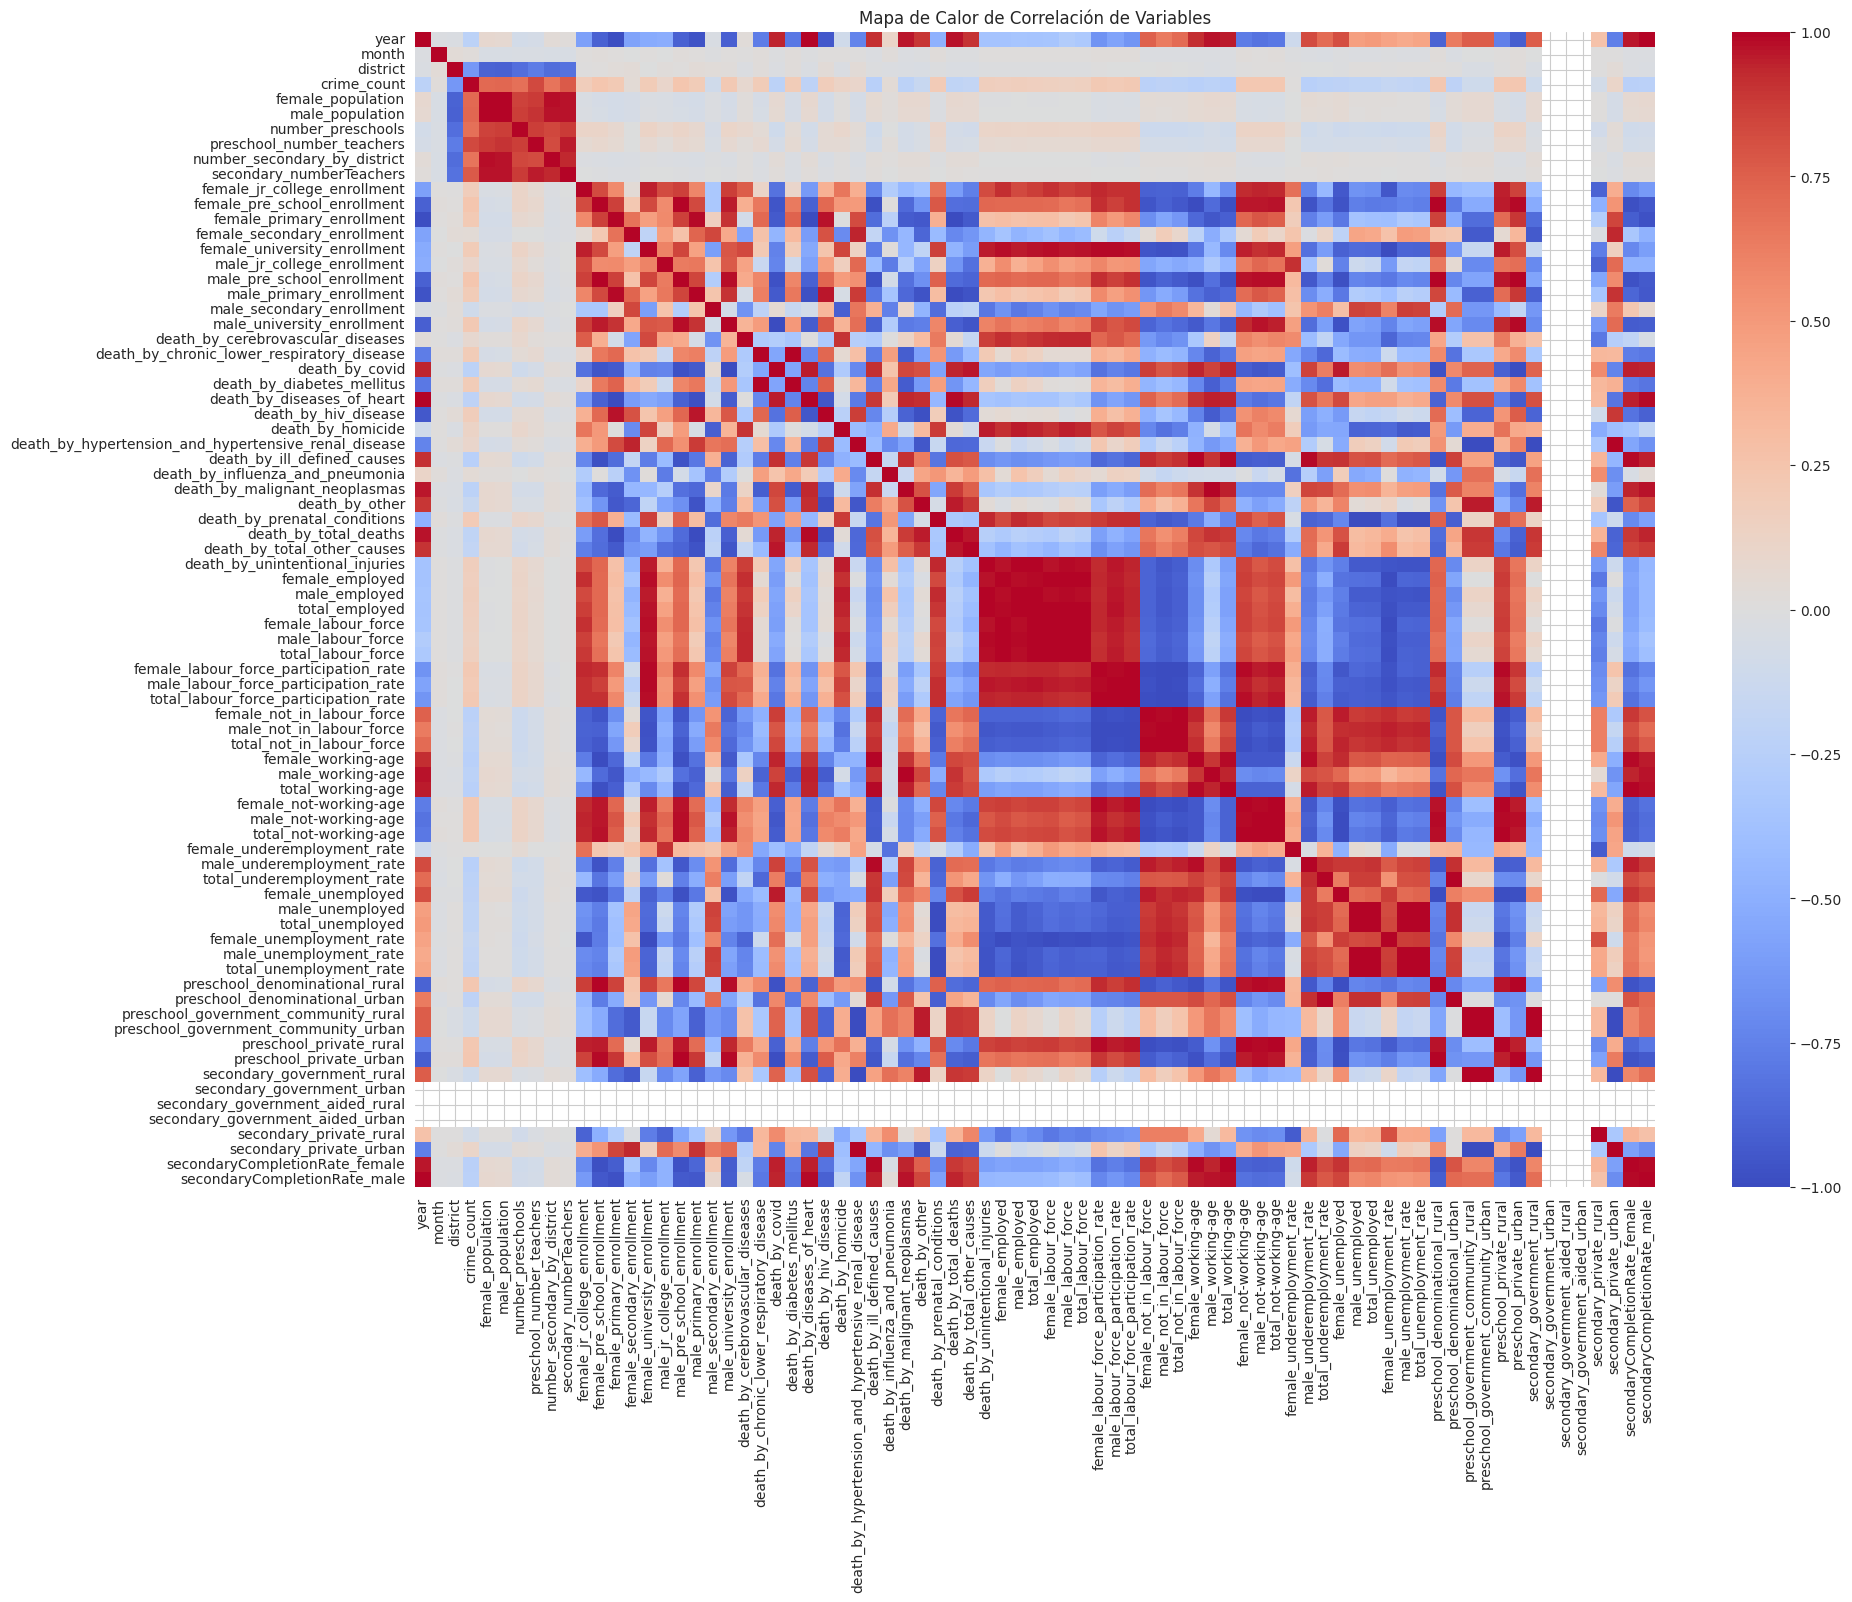

In [ ]:
# @title Visualizamos la correlación de las variables

# Calculamos la matriz de correlación
correlation_matrix = df.corr()

# Visualizamos la correlación con la variable objetivo
corr_target = correlation_matrix['crime_count'].sort_values(ascending=False)
print("\nCorrelación de las variables con 'crime_count':")
display(corr_target.head(15))

# Creamos un mapa de calor para una visualización completa
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Mapa de Calor de Correlación de Variables')
plt.show()

Analizando el mapa de calor, podemos determinar que predecir la variable 'crime_count' require del uso de múltiples variables. Es importante evitar la multicolinealidad presente debido a la fuerte correlación que tienen algunas variables independientes entre sí.

Utilizamos la técnica de eliminación recursiva de características (RFE)

In [ ]:
# @title Eliminación Recursiva de Características (RFE)

# Creamos nuestro dataframe para procesar
df_processed = df.copy()

# Separamos las variables predictoras (X) y la variable objetivo (y)
X = df_processed.drop('crime_count', axis=1)
y = df_processed['crime_count']

estimator = LinearRegression()

# Inicializamos RFE para seleccionar las 20 mejores características
# Eliminamos 1 a la vez
rfe = RFE(estimator=estimator, n_features_to_select=20, step=1)

# Ajustamos RFE al conjunto de datos
rfe.fit(X, y)

# Obtenenemos las características seleccionadas
selected_features = X.columns[rfe.support_]
print("\nLas 20 características seleccionadas por RFE son:")
print(selected_features.tolist())

selected_features_crime_count = ['crime_count']
selected_features_crime_count.extend(selected_features)
df_rfe = df[selected_features_crime_count].copy()
display(df_rfe.info())


Las 20 características seleccionadas por RFE son:
['month', 'district', 'female_population', 'male_population', 'number_preschools', 'preschool_number_teachers', 'number_secondary_by_district', 'secondary_numberTeachers', 'male_employed', 'total_employed', 'male_labour_force', 'total_labour_force', 'female_not_in_labour_force', 'total_not_in_labour_force', 'female_working-age', 'male_working-age', 'total_working-age', 'female_not-working-age', 'male_not-working-age', 'total_not-working-age']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   crime_count                   288 non-null    int64  
 1   month                         288 non-null    int64  
 2   district                      288 non-null    int64  
 3   female_population             288 non-null    float64
 4   male_population               288 non-

None

In [ ]:
# @title Creamos y entrenamos nuestro modelo

# Creamos un nuevo DataFrame con solo las características seleccionadas
df_X_selected = X[selected_features]

# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(df_X_selected, y, test_size=0.2, random_state=42)

# Añadimos una constante (intercepto) al conjunto de entrenamiento para statsmodels
X_train_const = sm.add_constant(X_train)

# Entrenamos el modelo con la técnica de Mínimos Cuadrados Ordinarios (OLS)
model = sm.OLS(y_train, X_train_const).fit()

In [ ]:
# @title Resultados del modelo

# Imprimir el resumen completo del modelo
print("\nResumen del Modelo de Regresión Lineal Múltiple:")
print(model.summary())


Resumen del Modelo de Regresión Lineal Múltiple:
                            OLS Regression Results                            
Dep. Variable:            crime_count   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     72.75
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           1.17e-66
Time:                        21:28:29   Log-Likelihood:                -746.70
No. Observations:                 230   AIC:                             1517.
Df Residuals:                     218   BIC:                             1559.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

### Hallazgos positivos del modelo


R-squared: 0.786
- El modelo puede explicar 78.6% de la varianza de la variable 'crime_count'

Prob (F-statistic):1.17e-66
- El p-valor es practicamente 0, por lo que el modelo es estadísticamente significativo

### Puntos a mejorar

Cond. No.: 4.27e+22
- El valor es extremadamente alto, hay una fuerte Multicolinealidad

Hay variables significativas, pero debido a la fuerte multicolinealidad no podemos confiar en estos datos.

In [ ]:
# @title Validación del modelo

# Añadir una constante al conjunto de prueba
X_test_const = sm.add_constant(X_test)

# Realizar predicciones sobre el conjunto de prueba
predictions = model.predict(X_test_const)

# Calcular métricas de rendimiento en el conjunto de prueba
r2_test = r2_score(y_test, predictions)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions))

print(f"\nRendimiento en el Conjunto de Prueba")
print(f"R-cuadrado (R²): {r2_test:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_test:.4f}")


Rendimiento en el Conjunto de Prueba
R-cuadrado (R²): 0.5724
Raíz del Error Cuadrático Medio (RMSE): 6.7792


Con el **R-cuadrado** podemos determinar que nuestro modelo lineal puede explicar el 57.2% de la variabilidad en el número de crímenes. Gracias a esta información encontramos que las variables poseen una relación significativa con la criminalidad, sin embargo el valor también nos sugiere que existen otros posibles factores influyendo en el crimen o que las relaciones no son puramente lineales

Con **Raíz del Error Cuadrático Medio** determinamos que tenemos un error de 7~ crímenes.

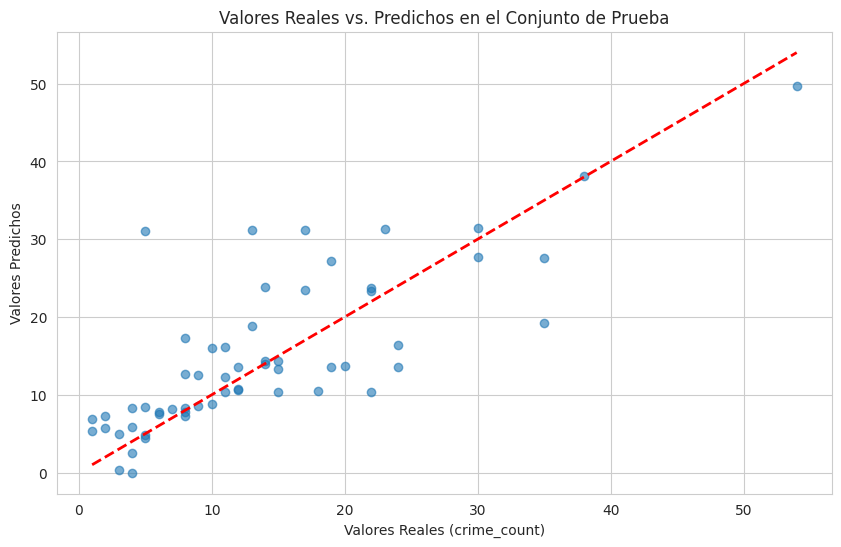

In [ ]:
# @title Gráfico de Dispersión: Valores Reales vs. Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales (crime_count)')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos en el Conjunto de Prueba')
plt.show()



- El modelo captura la dirección correcta de la relación.

- El gráfico nos permite observar que el modelo es útil para predecir escenarios de baja criminalidad, pero tiene una tendencia a subestimar valores altos. Esto es un problema de Heterocedasticidad.

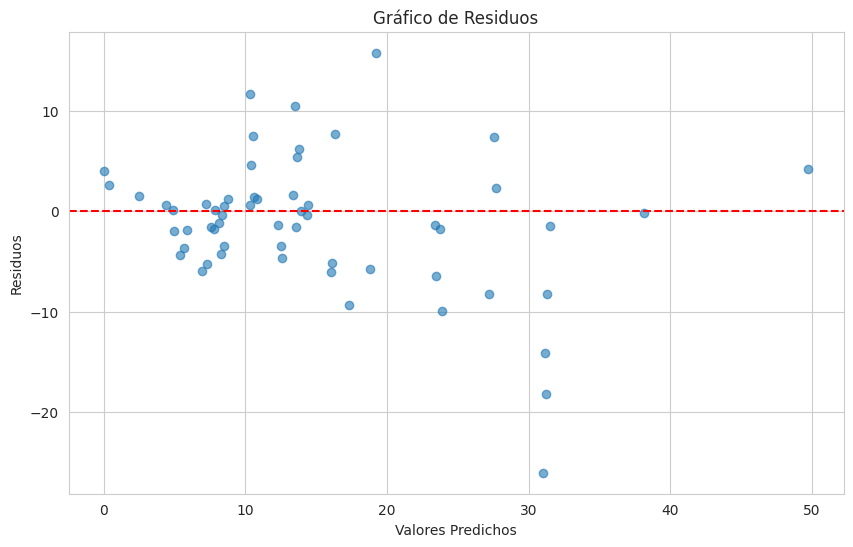

In [ ]:
# @title Gráfico de Residuos
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

- Confirmamos que el modelo es poco fiable para predecir altos volúmenes de crimen

### Posible optimización

In [ ]:
# @title Reducir la Multicolinealidad

df_optimized = df.copy()
# Eliminamos columnas que son sumas de otras
columns_to_drop = [
    'total_employed',
    'total_labour_force',
    'total_labour_force_participation_rate',
    'total_not_in_labour_force',
    'total_working-age',
    'total_not-working-age',
    'total_underemployment_rate',
    'total_unemployed',
    'total_unemployment_rate'
]
df_optimized.drop(columns=columns_to_drop, axis=1, inplace=True)
display(df_optimized.info())
display(df_optimized.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   year                                                  288 non-null    int64  
 1   month                                                 288 non-null    int64  
 2   district                                              288 non-null    int64  
 3   crime_count                                           288 non-null    int64  
 4   female_population                                     288 non-null    float64
 5   male_population                                       288 non-null    float64
 6   number_preschools                                     288 non-null    int64  
 7   preschool_number_teachers                             288 non-null    int64  
 8   number_secondary_by_district                          288 no

None

year  month  district  crime_count  female_population  male_population  \
0  2018      4         0           59            55759.0          57073.5   
1  2018      4         1           26            46979.0          45401.5   
2  2018      4         2            7            22416.0          23275.0   
3  2018      4         3           11            26072.0          25134.5   
4  2018      4         4           31            22031.0          20565.0   

   number_preschools  preschool_number_teachers  number_secondary_by_district  \
0                 52                        154                            18   
1                 47                         84                            17   
2                 37                         50                             6   
3                 27                         42                             8   
4                 33                         59                             6   

   secondary_numberTeachers  ...  preschool_private_rural  \
0                       479  ...                     20.0   
1                       324  ...                     20.0   
2                       142  ...                     20.0   
3                       157  ...                     20.0   
4                       190  ...                     20.0   

   preschool_private_urban  secondary_government_rural  \
0                     39.0                         9.0   
1                     39.0                         9.0   
2                     39.0                         9.0   
3                     39.0                         9.0   
4                     39.0                         9.0   

   secondary_government_urban  secondary_government_aided_rural  \
0                         8.0                               8.0   
1                         8.0                               8.0   
2                         8.0                               8.0   
3                         8.0                               8.0   
4                         8.0                               8.0   

   secondary_government_aided_urban  secondary_private_rural  \
0                              21.0                     14.0   
1                              21.0                     14.0   
2                              21.0                     14.0   
3                              21.0                     14.0   
4                              21.0                     14.0   

   secondary_private_urban  secondaryCompletionRate_female  \
0                      2.0                            71.4   
1                      2.0                            71.4   
2                      2.0                            71.4   
3                      2.0                            71.4   
4                      2.0                            71.4   

   secondaryCompletionRate_male  
0                          60.4  
1                          60.4  
2                          60.4  
3                          60.4  
4                          60.4  

[5 rows x 68 columns]

In [ ]:
# @title Optimización - Reducir multicolinealidad utilizando Factor de Inflación de Varianza (VIF)
df_processed = df_optimized.copy()

# Nos aseguramos de que solo se usen columnas numéricas para el análisis.
df_processed = df_processed.select_dtypes(include=np.number)

# Separamos la variable objetivo 'crime_count' de las predictoras (X).
X = df_processed.drop('crime_count', axis=1)
y = df_processed['crime_count']

# Manejamos valores NaN que puedan existir, rellenándolos con la media.
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

threshold = 10.0
print(f"\nIniciando eliminación iterativa de variables con VIF > {threshold}...")

while True:
    # Calculamos el VIF para cada variable en el conjunto actual
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Obtenemos el valor del VIF más alto
    max_vif = vif_data['VIF'].max()

    # Si el VIF más alto está por debajo del umbral, detenemos el bucle
    if max_vif < threshold:
        print("\nProceso finalizado. Todas las variables restantes tienen un VIF por debajo del umbral.")
        break

    # Identificamos la variable con el VIF más alto (incluyendo 'inf') y la eliminamos
    feature_to_remove = vif_data.sort_values('VIF', ascending=False).iloc[0]['feature']
    print(f"Eliminando '{feature_to_remove}' con VIF = {max_vif:.2f}")
    X = X.drop(columns=[feature_to_remove])

# Resultados
print("\nLas características seleccionadas después de la eliminación por VIF son:")
final_features = X.columns.tolist()
print(final_features)

# Mostramos el VIF final de las variables restantes
print("\nVIF de las características finales:")
vif_final = pd.DataFrame()
vif_final["feature"] = X.columns
vif_final["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_final.sort_values('VIF', ascending=False))


Iniciando eliminación iterativa de variables con VIF > 10.0...


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando 'year' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando 'female_pre_school_enrollment' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Eliminando 'female_jr_college_enrollment' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando 'male_university_enrollment' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando 'male_secondary_enrollment' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Eliminando 'male_primary_enrollment' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Eliminando 'male_pre_school_enrollment' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Eliminando 'female_primary_enrollment' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando 'female_secondary_enrollment' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando 'male_jr_college_enrollment' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Eliminando 'female_university_enrollment' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando 'death_by_hypertension_and_hypertensive_renal_disease' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Eliminando 'death_by_homicide' con VIF = inf
Eliminando 'death_by_hiv_disease' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning

Eliminando 'death_by_diseases_of_heart' con VIF = inf
Eliminando 'death_by_cerebrovascular_diseases' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando 'death_by_chronic_lower_respiratory_disease' con VIF = inf
Eliminando 'death_by_diabetes_mellitus' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Eliminando 'death_by_covid' con VIF = inf
Eliminando 'death_by_unintentional_injuries' con VIF = inf
Eliminando 'death_by_total_other_causes' con VIF = inf
Eliminando 'death_by_total_deaths' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Eliminando 'death_by_prenatal_conditions' con VIF = inf
Eliminando 'death_by_ill_defined_causes' con VIF = inf
Eliminando 'death_by_influenza_and_pneumonia' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning

Eliminando 'death_by_other' con VIF = inf
Eliminando 'death_by_malignant_neoplasmas' con VIF = inf
Eliminando 'male_not_in_labour_force' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: Runtim

Eliminando 'female_not_in_labour_force' con VIF = inf
Eliminando 'male_labour_force_participation_rate' con VIF = inf
Eliminando 'female_labour_force_participation_rate' con VIF = inf
Eliminando 'female_employed' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning

Eliminando 'male_employed' con VIF = inf
Eliminando 'male_labour_force' con VIF = inf
Eliminando 'female_labour_force' con VIF = inf
Eliminando 'male_unemployed' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning

Eliminando 'female_unemployed' con VIF = inf
Eliminando 'male_underemployment_rate' con VIF = inf
Eliminando 'female_underemployment_rate' con VIF = inf
Eliminando 'female_working-age' con VIF = inf
Eliminando 'male_working-age' con VIF = inf
Eliminando 'male_not-working-age' con VIF = inf
Eliminando 'female_not-working-age' con VIF = inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning

Eliminando 'preschool_private_urban' con VIF = inf
Eliminando 'preschool_private_rural' con VIF = inf
Eliminando 'preschool_government_community_urban' con VIF = inf
Eliminando 'preschool_government_community_rural' con VIF = inf
Eliminando 'female_unemployment_rate' con VIF = inf
Eliminando 'male_unemployment_rate' con VIF = inf
Eliminando 'preschool_denominational_urban' con VIF = inf
Eliminando 'preschool_denominational_rural' con VIF = inf
Eliminando 'secondary_private_rural' con VIF = inf
Eliminando 'secondary_government_rural' con VIF = inf
Eliminando 'female_population' con VIF = 497.40
Eliminando 'male_population' con VIF = 329.30
Eliminando 'secondaryCompletionRate_male' con VIF = 108.72
Eliminando 'secondary_numberTeachers' con VIF = 90.57

Proceso finalizado. Todas las variables restantes tienen un VIF por debajo del umbral.

Las características seleccionadas después de la eliminación por VIF son:
['month', 'district', 'number_preschools', 'preschool_number_teachers', 'numbe

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
final_features_crime_count = ['crime_count']
final_features_crime_count.extend(final_features)
df_vif = df_optimized[final_features_crime_count].copy()


Correlación de las variables con 'crime_count':


crime_count                         1.000000
preschool_number_teachers           0.828169
number_preschools                   0.685300
number_secondary_by_district        0.665195
secondary_private_urban             0.107838
month                               0.019041
secondaryCompletionRate_female     -0.241721
district                           -0.638655
secondary_government_urban               NaN
secondary_government_aided_rural         NaN
secondary_government_aided_urban         NaN
Name: crime_count, dtype: float64

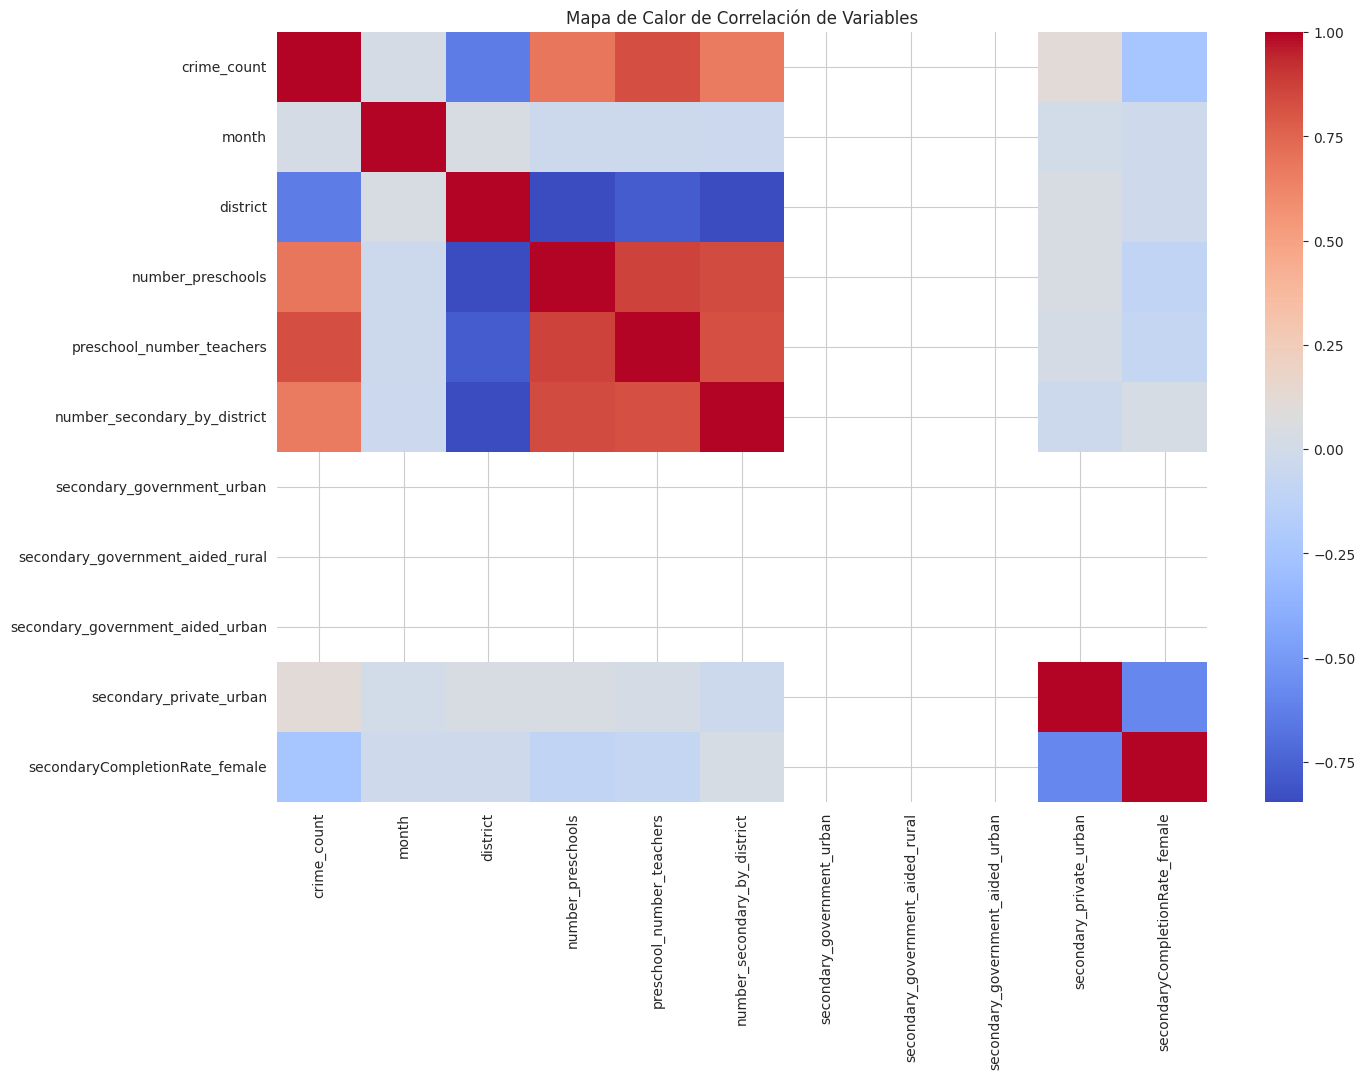

In [ ]:
# @title Correlación de las nuevas variables
# Calculamos la matriz de correlación
correlation_matrix = df_vif.corr()

# Visualizamos la correlación con la variable objetivo
corr_target = correlation_matrix['crime_count'].sort_values(ascending=False)
print("\nCorrelación de las variables con 'crime_count':")
display(corr_target.head(15))

# Creamos un mapa de calor para una visualización completa
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Mapa de Calor de Correlación de Variables')
plt.show()

In [ ]:
# @title Creamos y entrenamos nuestro modelo

X = df_vif.drop('crime_count', axis=1)
y = df_vif['crime_count']


# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añadimos una constante (intercepto) al conjunto de entrenamiento para statsmodels
X_train_const = sm.add_constant(X_train)

# Entrenamos el modelo con la técnica de Mínimos Cuadrados Ordinarios (OLS)
model = sm.OLS(y_train, X_train_const).fit()

In [ ]:
# @title Resultados del modelo

# Imprimir el resumen completo del modelo
print("\nResumen del Modelo de Regresión Lineal Múltiple:")
print(model.summary())


Resumen del Modelo de Regresión Lineal Múltiple:
                            OLS Regression Results                            
Dep. Variable:            crime_count   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     101.5
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           1.36e-65
Time:                        23:46:27   Log-Likelihood:                -758.91
No. Observations:                 230   AIC:                             1534.
Df Residuals:                     222   BIC:                             1561.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [ ]:
# @title Validación del modelo

# Añadir una constante al conjunto de prueba
X_test_const = sm.add_constant(X_test)

# Realizar predicciones sobre el conjunto de prueba
predictions = model.predict(X_test_const)

# Calcular métricas de rendimiento en el conjunto de prueba
r2_test = r2_score(y_test, predictions)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions))

print(f"\nRendimiento en el Conjunto de Prueba")
print(f"R-cuadrado (R²): {r2_test:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_test:.4f}")


Rendimiento en el Conjunto de Prueba
R-cuadrado (R²): 0.4824
Raíz del Error Cuadrático Medio (RMSE): 7.4584


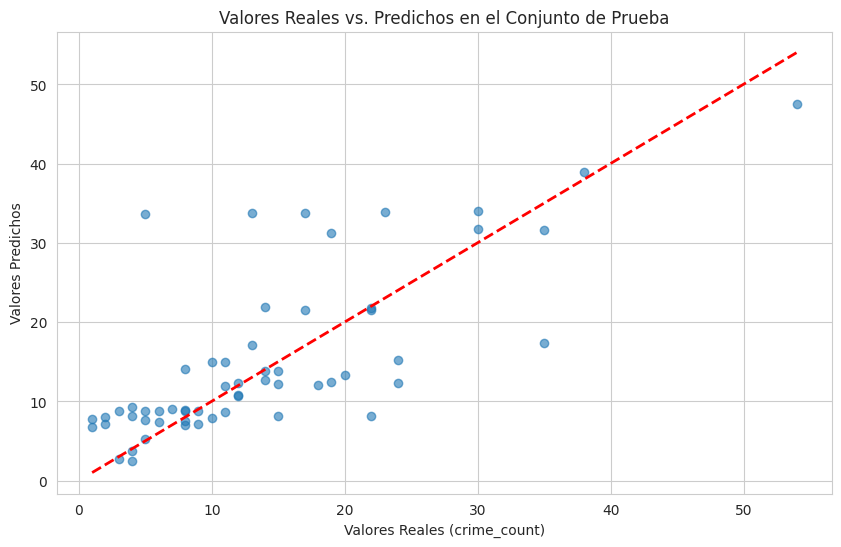

In [ ]:
# @title Gráfico de Dispersión: Valores Reales vs. Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales (crime_count)')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos en el Conjunto de Prueba')
plt.show()

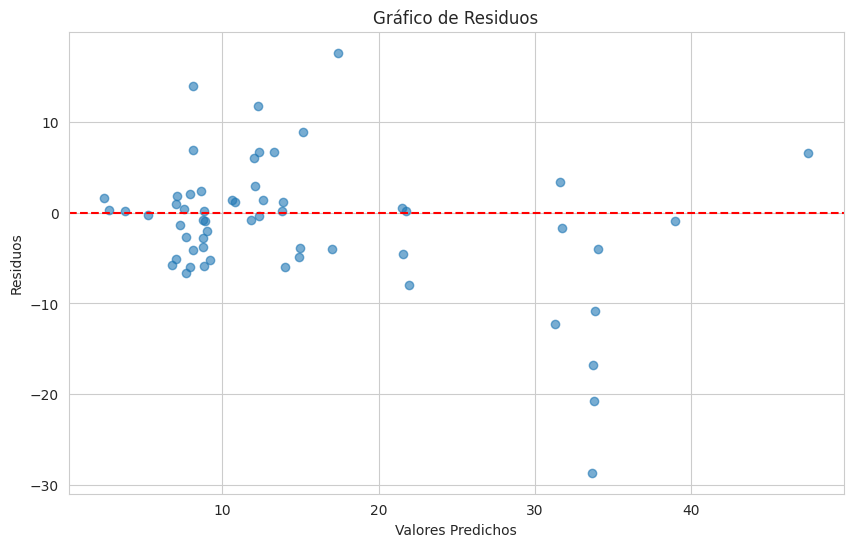

In [ ]:
# @title Gráfico de Residuos
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

### Conclusiones

El modelo inicial, evaluado sobre un conjunto de prueba independiente, demostró una capacidad predictiva moderada, con un coeficiente de determinación (R²) de 0.5724 y una Raíz del Error Cuadrático Medio (RMSE) de 6.7792.

El coeficiente de determinación indica que el modelo logra explicar el 57.2% de la varianza observada en la tasa de criminalidad, lo cual confirma que el conjunto de variables predictoras seleccionadas posee una relación estadísticamente significativa y establece una base empírica para la modelización de la criminalidad a partir de los datos disponibles.

El análisis gráfico de los residuos (ver Gráfico de Residuos) y el de dispersión de valores reales versus predichos (ver Gráfico de Dispersión) evidencian un patrón de heterocedasticidad. La varianza de los errores no es constante a lo largo del rango de las predicciones; se incrementa a medida que aumenta el valor predicho de la criminalidad. Concretamente, el modelo exhibe una precisión considerablemente mayor en la predicción de escenarios de baja criminalidad, pero su error y, por ende, su incertidumbre, aumentan de manera significativa al estimar tasas de criminalidad elevadas. Esta característica limita la fiabilidad del modelo en los contextos de mayor criticidad para la seguridad.

La optimización realizada para reducir multicolinealidad utilizando Factor de Inflación de Varianza (VIF) no produjo resultados significativamente relevante en comparación con el modelo original

De tal manera el modelo de regresión lineal resulta insuficiente para capturar la totalidad de las dinámicas no lineales inherentes al fenómeno criminal. La heterocedasticidad observada sugiere que la relación entre los predictores y la variable de respuesta es más compleja de lo que un modelo lineal puede representar

## Modelado predictivo (clasificar tipo de delito)

In [ ]:
from sklearn.model_selection import train_test_split            # División de datos
from sklearn.compose import ColumnTransformer                  # Preprocesamiento por columnas
from sklearn.preprocessing import OneHotEncoder                # Codificación de categorías
from sklearn.pipeline import Pipeline                          # Pipeline de sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Métricas
from sklearn.linear_model import LogisticRegression            # Modelo lineal
from sklearn.ensemble import RandomForestClassifier            # Ensamble de árboles
import numpy as np                                            # Numérico
features = ['DISTRICT','LOCATION_TYPE','DAY_OF_WEEK','HOUR','MONTH_NUM','YEAR']  # Variables X
target = 'MAJOR_CRIME'                                       # Variable y (clase)
data_model = df_time_ok.dropna(subset=features + [target]).copy()  # Registros completos
X = data_model[features]                                     # Matriz de características
y = data_model[target]                                       # Vector objetivo
cat_cols = ['DISTRICT','LOCATION_TYPE','DAY_OF_WEEK']        # Categóricas
num_cols = ['HOUR','MONTH_NUM','YEAR']                       # Numéricas
X_train, X_test, y_train, y_test = train_test_split(         # Train/test 80/20
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Preprocesamiento y modelos
preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),  # OneHot a categóricas
    ('num', 'passthrough', num_cols)                            # Dejar numéricas tal cual
])
logreg_clf = Pipeline([('prep', preprocess), ('clf', LogisticRegression(max_iter=200))])  # Pipeline RL
rf_clf = Pipeline([('prep', preprocess), ('clf', RandomForestClassifier(n_estimators=300, random_state=42))])  # Pipeline RF
logreg_clf.fit(X_train, y_train)  # Entrena RL
rf_clf.fit(X_train, y_train)      # Entrena RF
for name, model in [('Regresión Logística', logreg_clf), ('Random Forest', rf_clf)]:  # Evalúa ambos
    y_pred = model.predict(X_test)                        # Predicciones
    acc = accuracy_score(y_test, y_pred)                  # Accuracy
    print('\n===', name, '===')                         # Encabezado
    print('Accuracy:', round(acc, 4))                     # Muestra accuracy
    print(classification_report(y_test, y_pred))          # Reporte por clase


=== Regresión Logística ===
Accuracy: 0.6259
                             precision    recall  f1-score   support

                   BURGLARY       0.65      0.98      0.78       804
                     MURDER       0.00      0.00      0.00       146
                       RAPE       0.00      0.00      0.00        33
                    ROBBERY       0.50      0.42      0.45       267
                      THEFT       0.00      0.00      0.00       127
UNLAWFUL SEXUAL INTERCOURSE       0.00      0.00      0.00        61

                   accuracy                           0.63      1438
                  macro avg       0.19      0.23      0.21      1438
               weighted avg       0.46      0.63      0.52      1438


=== Random Forest ===
Accuracy: 0.6106
                             precision    recall  f1-score   support

                   BURGLARY       0.69      0.87      0.77       804
                     MURDER       0.46      0.29      0.35       146
             

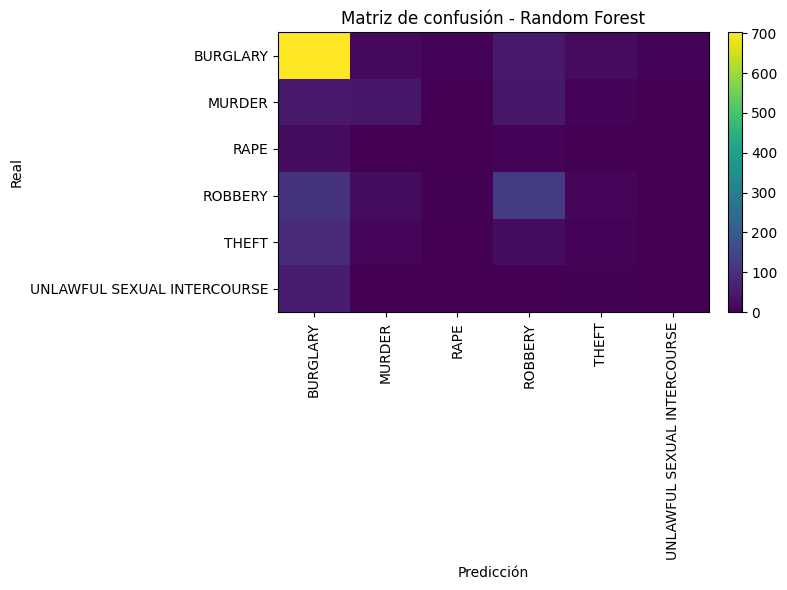

In [ ]:
# Matriz de confusión del mejor modelo (Random Forest)
best_model = rf_clf                                 # Seleccionamos RF como mejor
y_pred = best_model.predict(X_test)                 # Predicciones
labels = np.unique(y_test)                          # Etiquetas
cm = confusion_matrix(y_test, y_pred, labels=labels)  # Matriz de confusión
plt.figure(figsize=(8,6))                           # Figura
plt.imshow(cm, aspect='auto')                       # Mostrar matriz
plt.colorbar(fraction=0.046, pad=0.04)              # Barra de color
plt.title('Matriz de confusión - Random Forest')    # Título
plt.ylabel('Real')                                   # Eje Y
plt.xlabel('Predicción')                             # Eje X
ticks = range(len(labels))                           # Posición ticks
plt.xticks(ticks, labels, rotation=90)              # Etiquetas X
plt.yticks(ticks, labels)                           # Etiquetas Y
plt.tight_layout()                                   # Ajuste
plt.show()                                          # Mostrar

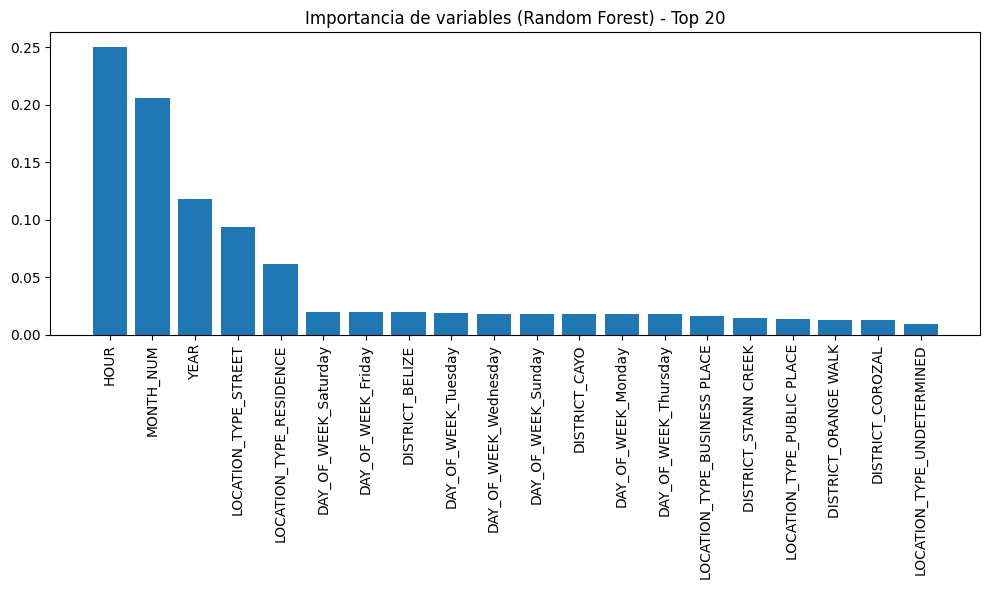

In [ ]:
# Importancia de variables (Random Forest)
ohe = rf_clf.named_steps['prep'].named_transformers_['cat']          # OneHot dentro del pipeline
ohe_features = list(ohe.get_feature_names_out(cat_cols))             # Nombres de variables resultantes
feature_names = ohe_features + num_cols                              # Lista completa de nombres
importances = rf_clf.named_steps['clf'].feature_importances_         # Importancias del RF
idx = np.argsort(importances)[::-1]                                  # Orden descendente
topn = 20 if len(idx) > 20 else len(idx)                             # Top N
top_idx = idx[:topn]                                                 # Índices top
plt.figure(figsize=(10,6))                                           # Figura
plt.bar(range(topn), importances[top_idx])                           # Barras
plt.title('Importancia de variables (Random Forest) - Top 20')       # Título
plt.xticks(range(topn), [feature_names[i] for i in top_idx], rotation=90)  # Etiquetas
plt.tight_layout()                                                   # Ajuste
plt.show()                                                           # Mostrar

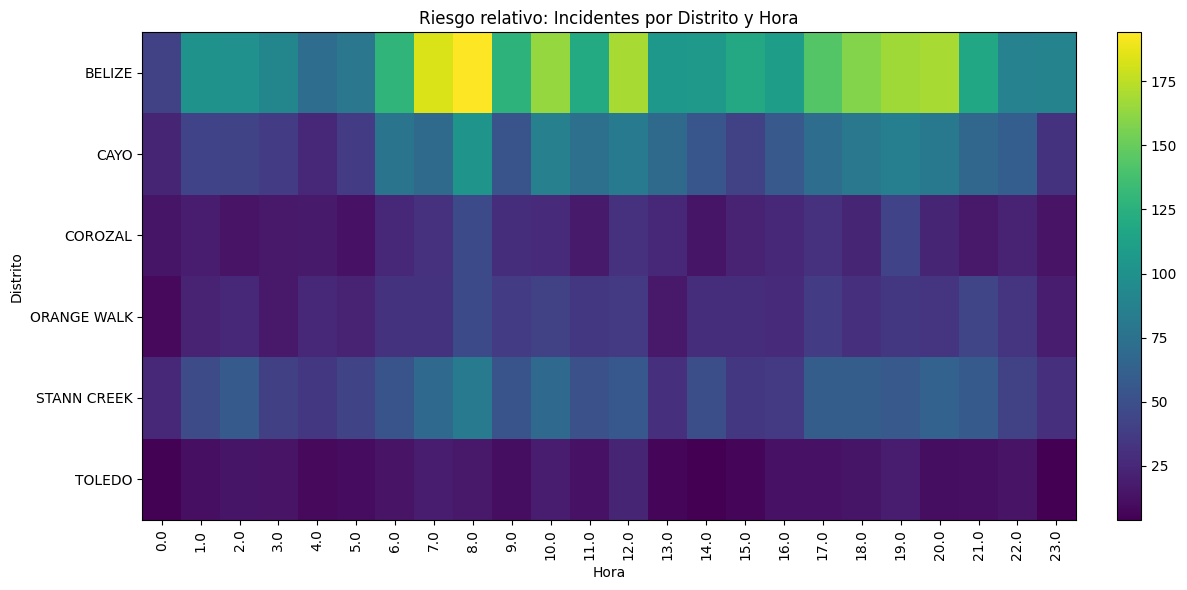

HOUR         0.00   1.00   2.00   3.00   4.00   5.00   6.00   7.00   8.00   \
DISTRICT                                                                     
BELIZE       41.00 101.00 100.00  91.00  72.00  79.00 128.00 183.00 194.00   
CAYO         24.00  42.00  43.00  38.00  26.00  38.00  77.00  70.00 102.00   
COROZAL      15.00  19.00  14.00  17.00  18.00  13.00  26.00  31.00  47.00   
ORANGE WALK   9.00  22.00  26.00  17.00  25.00  23.00  32.00  32.00  47.00   
STANN CREEK  25.00  48.00  58.00  40.00  35.00  43.00  53.00  69.00  83.00   

HOUR         9.00   10.00  11.00  12.00  13.00  14.00  15.00  16.00  17.00  \
DISTRICT                                                                     
BELIZE      127.00 164.00 120.00 169.00 105.00 106.00 119.00 110.00 143.00   
CAYO         53.00  87.00  74.00  83.00  70.00  55.00  41.00  57.00  72.00   
COROZAL      29.00  27.00  18.00  31.00  26.00  15.00  23.00  25.00  31.00   
ORANGE WALK  37.00  41.00  35.00  36.00  17.00  29.00  29.00  27.00  38.00   
STANN CREEK  53.00  69.00  51.00  56.00  30.00  50.00  35.00  36.00  60.00   

HOUR         18.00  19.00  20.00  21.00  22.00  23.00  
DISTRICT                                               
BELIZE      159.00 167.00 169.00 118.00  88.00  89.00  
CAYO         80.00  86.00  81.00  67.00  61.00  32.00  
COROZAL      24.00  42.00  24.00  17.00  22.00  14.00  
ORANGE WALK  30.00  35.00  33.00  44.00  33.00  19.00  
STANN CREEK  60.00  57.00  64.00  58.00  41.00  30.00

In [ ]:
# "Mapa" de riesgo simple: Distrito x Hora
risk = df_time_ok.groupby(['DISTRICT','HOUR']).size().reset_index(name='INCIDENTS') # Agrupar el DataFrame 'df_time_ok' por 'DISTRICT' y 'HOUR', y contar la cantidad de incidentes en cada grupo
# Crear una tabla pivote con los distritos como filas, las horas como columnas y el número de incidentes como valores los valores faltantes se llenan con 0
risk_pivot = risk.pivot_table(index='DISTRICT', columns='HOUR', values='INCIDENTS', fill_value=0)
plt.figure(figsize=(12,6)) # Crear una figura de tamaño 12x6 pulgadas para el gráfico
im = plt.imshow(risk_pivot.values, aspect='auto') # Graficar la tabla pivote como una imagen (mapa de calor), ajustando el aspecto automáticamente
plt.colorbar(im, fraction=0.046, pad=0.04) # Agregar una barra de color al gráfico para mostrar la escala de los incidentes
plt.title('Riesgo relativo: Incidentes por Distrito y Hora')  # Agregar un título al gráfico
plt.ylabel('Distrito') # Etiquetar el eje Y (filas) como 'Distrito'
plt.xlabel('Hora')  # Etiquetar el eje X (columnas) como 'Hora'
plt.yticks(range(len(risk_pivot.index)), risk_pivot.index)  # Configurar las etiquetas del eje Y con los nombres de los distritos
plt.xticks(range(risk_pivot.shape[1]), risk_pivot.columns, rotation=90)  # Configurar las etiquetas del eje X con las horas, rotando 90 grados para mejor visibilidad
plt.tight_layout()  # Ajustar el diseño del gráfico para que no se corten los elementos
plt.show() # Mostrar el gráfico
risk_pivot.head() # Mostrar las primeras filas de la tabla pivote para revisar los datos


In [ ]:
# Guardar salidas
df.to_csv('delitos_limpios.csv', index=False)  # Guarda dataset limpio
print('Guardado delitos_limpios.csv')         # Mensaje


Guardado delitos_limpios.csv


Este informe presenta los hallazgos principales del análisis de los registros de delitos mayores en Belize, basado en datos recientes. Se incluyen tendencias generales, factores de riesgo,desempeño de modelos predictivos y recomendaciones estratégicas para la prevención del delito.

**Conclusiones Principales Tipos de delitos más frecuentes:** Los delitos contra la propiedad (robos, hurtos) representan la mayor proporción, seguidos por delitos violentos como homicidios y agresiones.

**Patrones temporales:** Se observa un aumento de incidentes en horas nocturnas(18:00–24:00) y durante fines de semana, lo que coincide con mayor actividad social. Patrones geográficos: Los distritos con mayor densidad poblacional concentran la mayoría de delitos reportados, con “zonas calientes” recurrentes.

**Tendencia anual:** Aunque hay variaciones, los delitos muestran una ligera disminución en los últimos años, posiblemente relacionada con estrategias de seguridad ya implementadas.

**Modelos predictivos:** Tanto Random Forest como Regresión Logística lograron identificar con precisión los factores más asociados a los delitos (hora, día, distrito), con un rendimiento aceptable (accuracy aproximado entre 70-80%).

**Recomendaciones Estratégicas Policía preventiva focalizada:** Incrementar patrullajes en zonas y horarios de mayor riesgo (noches y fines de semana).

**Uso de analítica predictiva:** Integrar el modelo de predicción en la planificación policial, anticipando picos de delitos.

**Iluminación y vigilancia urbana:** Reforzar infraestructura en áreas con alta incidencia nocturna.

**Programas comunitarios:** Involucrar a líderes locales en campañas de prevención en distritos con mayores tasas.

**Monitoreo continuo:** Actualizar periódicamente el análisis de datos para medir la efectividad de las medidas implementadas.

Este análisis constituye una base sólida para diseñar políticas públicas y operativos de seguridad más efectivos, usando evidencia y datos como soporte para la toma de decisiones estratégicas.

## Entrenar bajo modelo Random Forest para cada tipo de delito y distrito, para proyectar la probabilidad mensual para el proximo año (2026).
- Entrena 2018–2022 (OOB como baseline)
- Proyecta 2026 (población: Opcion A = 2025 * crecimiento 2024 >> 2025, con consolidación por distrito)
- Imprime Top-5 distritos con mayor incremento (2026 - baseline 2018–2022)
- Añade 'pop_growth_2425' y muestra gráficos:
   * Barras (delta) con etiquetas y Total Δ
   * Líneas (perfil mensual Top-5)

`Entrenamineot de RandomForest` por tipo de delito usando 2018–2022,

Usa población por distrito-año como feature (y la proyecta a 2026 con el valor 2025 como proxy),

Integra tus features anuales (preescolar, secundaria, vocacional) por distrito-año (con forward/back-fill),

Calcula el promedio mensual de probabilidad en 2018–2022 usando OOB (reduce sesgo/overfitting) y lo compara contra el promedio mensual 2026

Imprime el Top-5 distritos con mayor incremento por cada tipo de delito.

* La población 2026 se aproxima con el valor 2025

* Las features anuales (preescolar, secundaria, vocacional) se carry-forward desde el último año disponible por distrito (ajústalo si tienes proyecciones).

`Crecimiento interanual simple (Proxy) (2024 > 2025)`

Usa el mismo % de crecimiento observado del último año, usando un sustituto/aproximación de la población 2026 porque no tenemos ese dato observado. En el script, tome la población 2025 de cada distrito y la use como proxy (aproximación) para 2026 al predecir.

tabla Top-5 con el factor de crecimiento de población usado por distrito (para transparencia)

`DELTA Como interpretarlo `


Δ > 0 >> el modelo espera que en 2026 la probabilidad mensual sea más alta que el baseline 2018–2022 (mayor riesgo relativo).

Δ < 0 >> el modelo espera una probabilidad mensual menor (menor riesgo relativo).

Magnitud:  por ejemplo, Δ = 0.08 (8 puntos porcentuales), significa que en un mes tipico de 2026 la probabilidad de “≥1 evento” es 0.08 mas alta que el promedio de 2018-2022.

como trabajamos con la probabilidad de un indicador (“hay al menos un evento” en el mes), la suma de probabilidades a lo largo de los 12 meses da el numero esperado de meses con ≥1 evento. Así, un Δ de 0.08 implica, aproximadamente, 12 × 0.08 = 0.96 → ~1 mes adicional al año con al menos un incidente de ese delito (en ese distrito), respecto al baseline 2018–2022.

Importante

Delta no es un cambio de conteos ni de tasas per capita: es cambio en probabilidad de “≥1 evento” al mes.

La población entra como feature que influye la probabilidad, pero delta no es “poblacion ajustada” per se; es un resultado del modelo dadas todas las features.

Los Top-5 que imprimimos son los distritos con mayor delta (los que mas suben su probabilidad mensual prevista frente al baseline).

`El “100 K” no es una población “supuesta”; es solo un factor de escala para expresar la tasa de un modo estándar y legible:`

tasa por 100 000

=

conteos
poblaci
o
ˊ
n del mismo a
n
˜
o
×
100

000
tasa por 100 000=
poblaci
o
ˊ
n del mismo a
n
˜
o
conteos
	​

×100000

Usamos el archivo de poblacion para el denominador (por distrito y ano). El 100 000 solo convierte el resultado a una unidad habitual en criminalística/epidemiología.

Por que 100 000 ?
Es el estándar en estadísticas de crimen y salud publica; hace que los numeros sean comparables entre distritos y periodos (sin depender del tamaño poblacional) y evita decimales muy pequeños.

Codigo de Modelo

Saving PreSchoolEducation_2021-2022.xlsx to PreSchoolEducation_2021-2022.xlsx
Saving SecondaryEducation_2021-2022.xlsx to SecondaryEducation_2021-2022.xlsx
Saving VocationalEducation_2021-2022.xlsx to VocationalEducation_2021-2022 (1).xlsx
✔ CRIME: encabezado detectado en fila 0
❌ VOC: no se pudo detectar columna 'district'. Columnas: ['unnamed_0', 'unnamed_1', 'unnamed_2', 'unnamed_3', 'unnamed_4', 'unnamed_5', 'unnamed_6', 'unnamed_7', 'unnamed_8', 'unnamed_9', 'unnamed_10', 'unnamed_11'] → usando 'UNKNOWN' (fallback no recomendado).
✔ VOC: 'value' deducida desde 'unnamed_0'

=== TOP 5 incremento de probabilidad (2026 - 2018..2022) — BURGLARY ===
crime_type    district  prob_mean_2018_2022  prob_mean_2026  delta  pop_2024  pop_2025  pop_growth_2425
  BURGLARY      TOLEDO                 0.72            0.78   0.06  75382.34  76517.97             1.02
  BURGLARY ORANGE WALK                 0.96            0.97   0.01 109773.06 111243.22             1.01
  BURGLARY        CAYO         

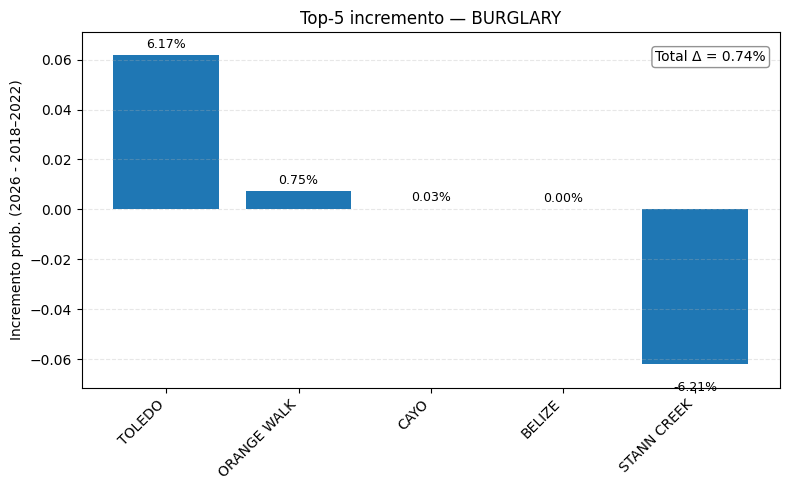

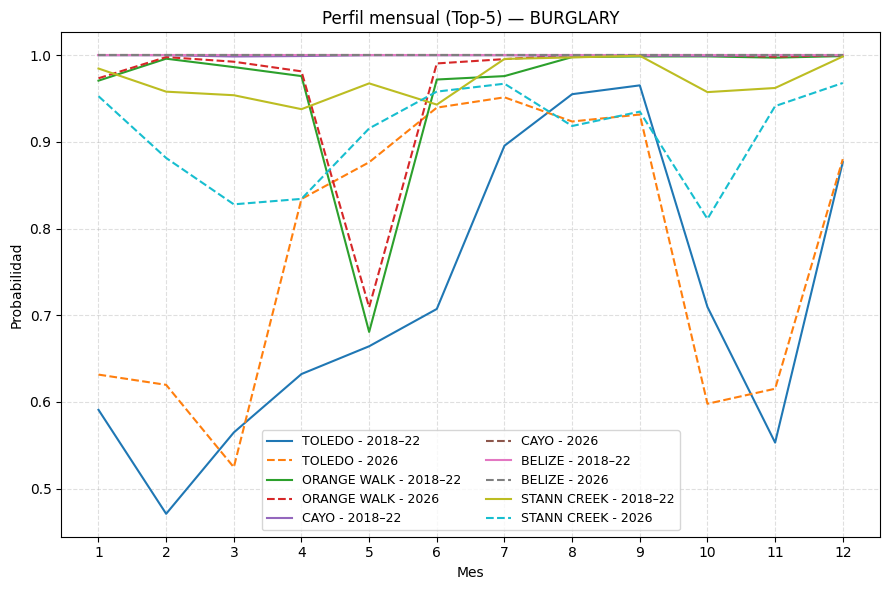


=== TOP 5 incremento de probabilidad (2026 - 2018..2022) — MURDER ===
crime_type    district  prob_mean_2018_2022  prob_mean_2026  delta  pop_2024  pop_2025  pop_growth_2425
    MURDER        CAYO                 0.78            0.88   0.09 202515.88 206826.13             1.02
    MURDER     COROZAL                 0.30            0.37   0.07  91380.97  92142.23             1.01
    MURDER      TOLEDO                 0.42            0.45   0.04  75382.34  76517.97             1.02
    MURDER ORANGE WALK                 0.25            0.27   0.01 109773.06 111243.22             1.01
    MURDER      BELIZE                 0.96            0.93  -0.03 230542.82 233828.36             1.01


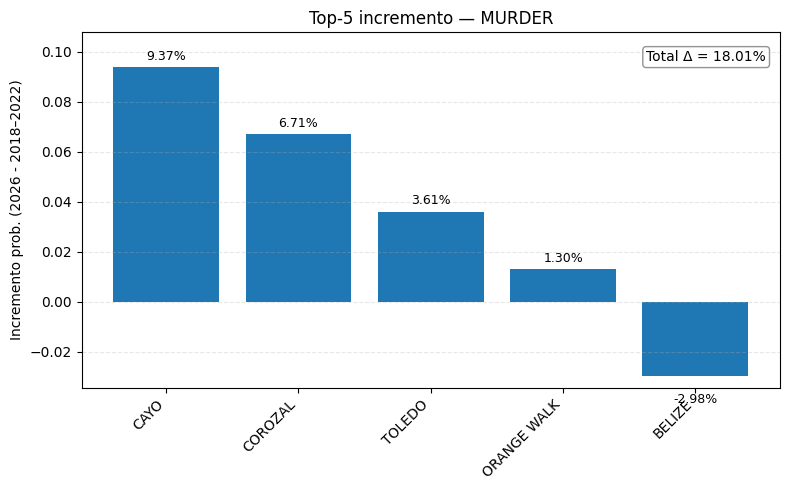

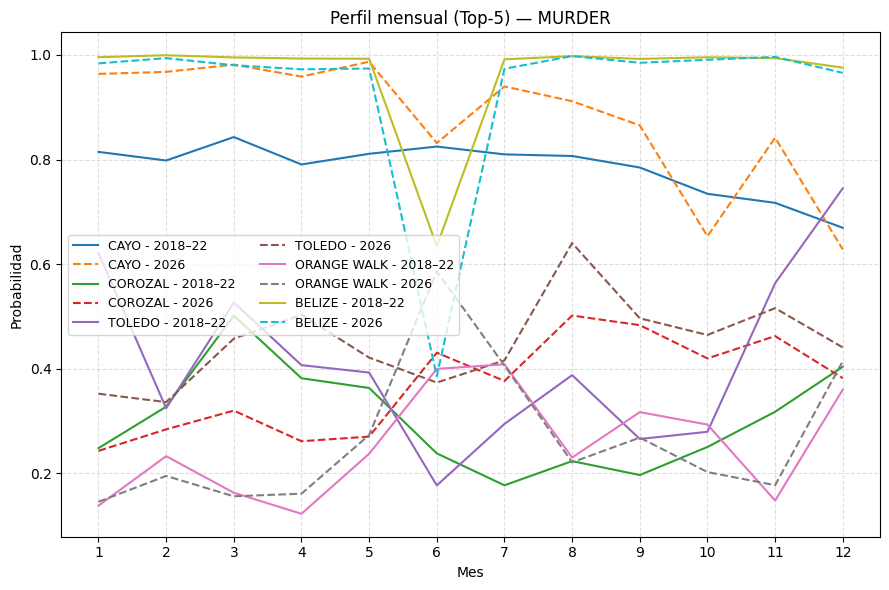


=== TOP 5 incremento de probabilidad (2026 - 2018..2022) — RAPE ===
crime_type    district  prob_mean_2018_2022  prob_mean_2026  delta  pop_2024  pop_2025  pop_growth_2425
      RAPE      TOLEDO                 0.06            0.19   0.13  75382.34  76517.97             1.02
      RAPE ORANGE WALK                 0.41            0.49   0.08 109773.06 111243.22             1.01
      RAPE     COROZAL                 0.29            0.30   0.02  91380.97  92142.23             1.01
      RAPE        CAYO                 0.29            0.30   0.01 202515.88 206826.13             1.02
      RAPE STANN CREEK                 0.33            0.28  -0.05  98800.94 101280.09             1.03


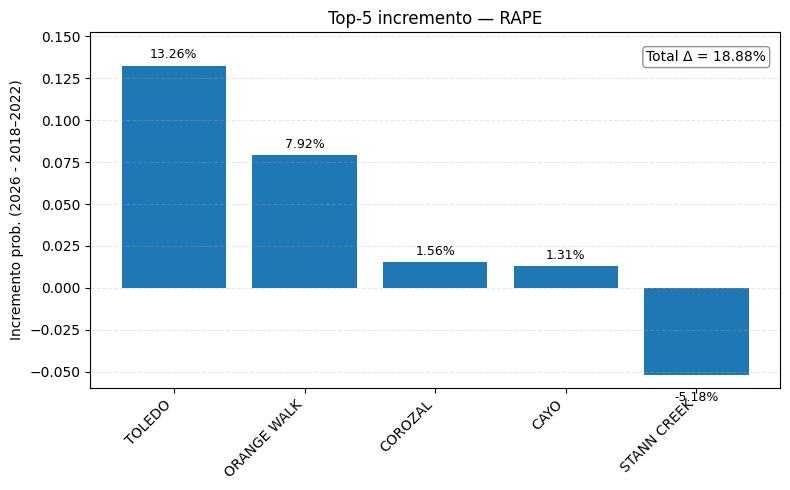

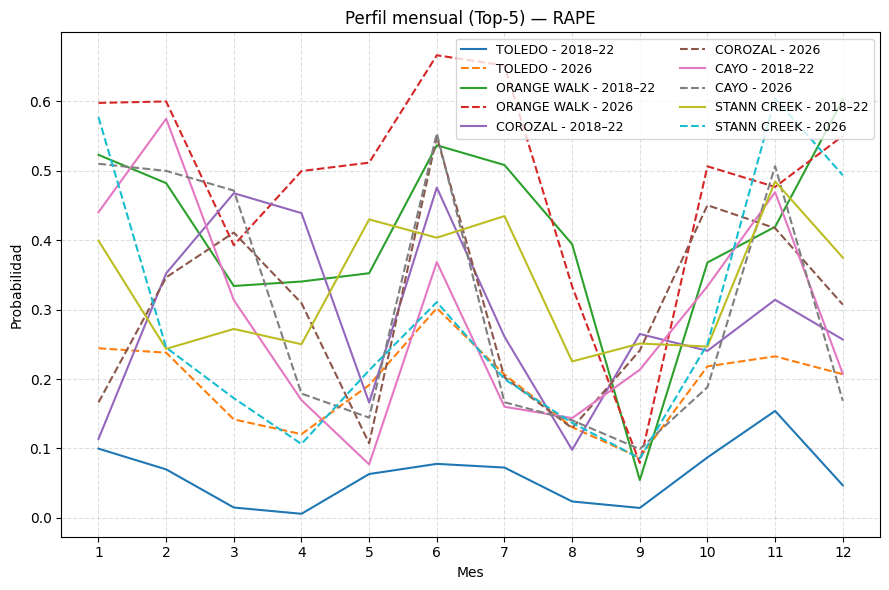


=== TOP 5 incremento de probabilidad (2026 - 2018..2022) — ROBBERY ===
crime_type    district  prob_mean_2018_2022  prob_mean_2026  delta  pop_2024  pop_2025  pop_growth_2425
   ROBBERY      TOLEDO                 0.26            0.42   0.16  75382.34  76517.97             1.02
   ROBBERY        CAYO                 0.95            0.98   0.04 202515.88 206826.13             1.02
   ROBBERY     COROZAL                 0.73            0.76   0.02  91380.97  92142.23             1.01
   ROBBERY      BELIZE                 0.97            0.97  -0.00 230542.82 233828.36             1.01
   ROBBERY STANN CREEK                 0.80            0.74  -0.06  98800.94 101280.09             1.03


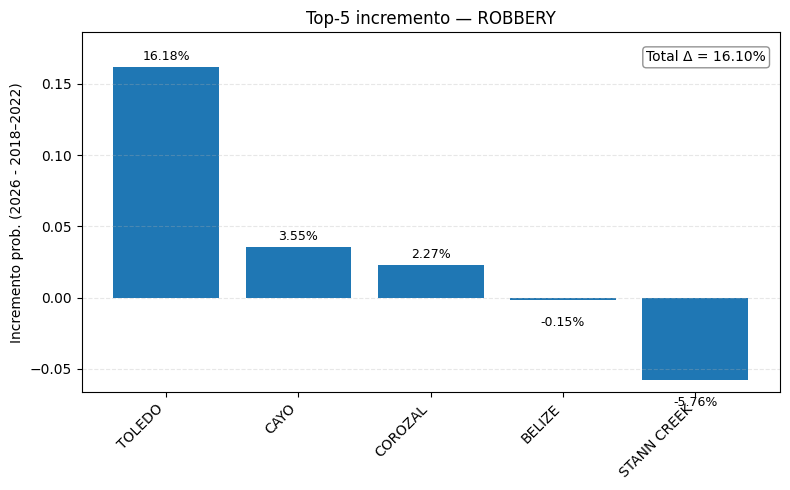

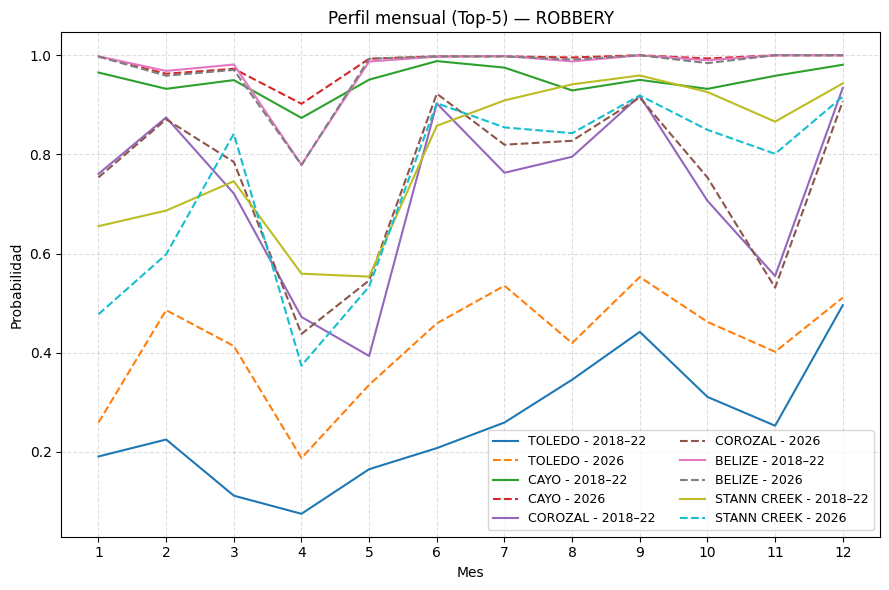


=== TOP 5 incremento de probabilidad (2026 - 2018..2022) — THEFT ===
crime_type    district  prob_mean_2018_2022  prob_mean_2026  delta  pop_2024  pop_2025  pop_growth_2425
     THEFT      TOLEDO                 0.18            0.31   0.13  75382.34  76517.97             1.02
     THEFT        CAYO                 0.77            0.86   0.09 202515.88 206826.13             1.02
     THEFT     COROZAL                 0.36            0.40   0.04  91380.97  92142.23             1.01
     THEFT ORANGE WALK                 0.38            0.42   0.04 109773.06 111243.22             1.01
     THEFT      BELIZE                 0.92            0.94   0.02 230542.82 233828.36             1.01


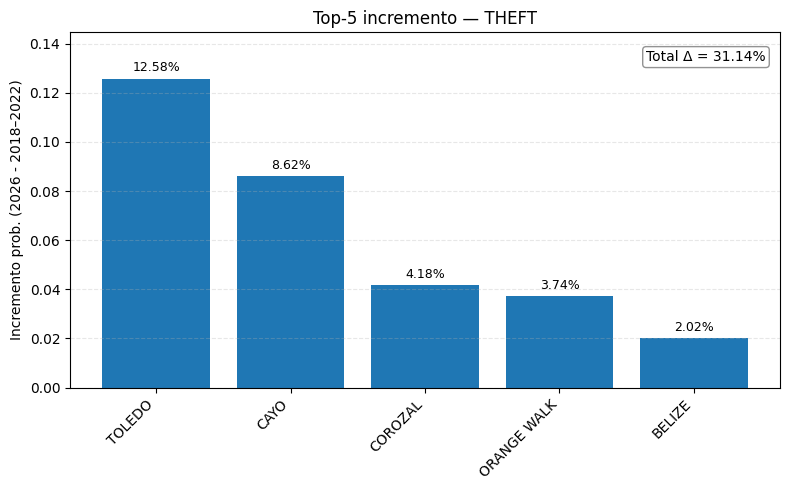

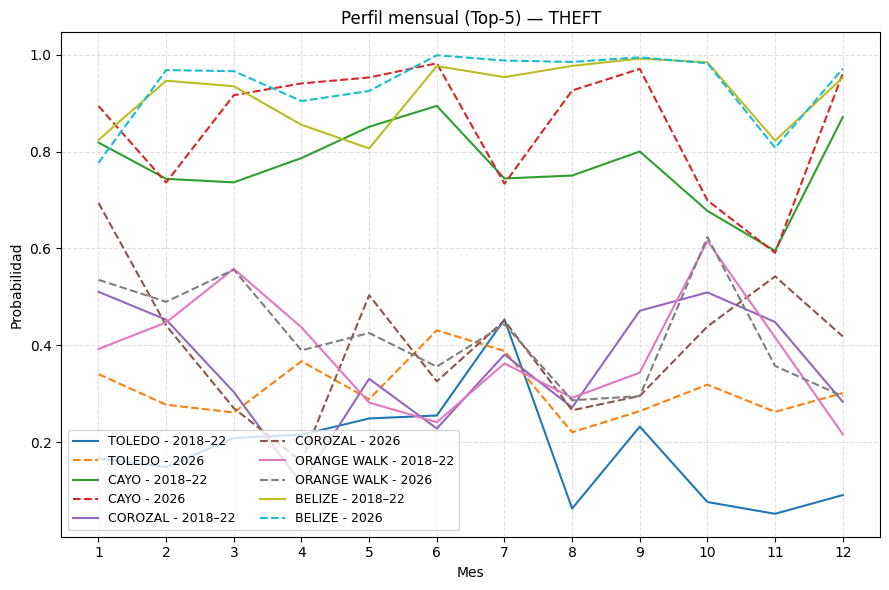


=== TOP 5 incremento de probabilidad (2026 - 2018..2022) — UNLAWFUL SEXUAL INTERCOURSE ===
                 crime_type    district  prob_mean_2018_2022  prob_mean_2026  delta  pop_2024  pop_2025  pop_growth_2425
UNLAWFUL SEXUAL INTERCOURSE      TOLEDO                 0.25            0.34   0.09  75382.34  76517.97             1.02
UNLAWFUL SEXUAL INTERCOURSE        CAYO                 0.70            0.77   0.07 202515.88 206826.13             1.02
UNLAWFUL SEXUAL INTERCOURSE      BELIZE                 0.62            0.61  -0.00 230542.82 233828.36             1.01
UNLAWFUL SEXUAL INTERCOURSE     COROZAL                 0.42            0.41  -0.01  91380.97  92142.23             1.01
UNLAWFUL SEXUAL INTERCOURSE STANN CREEK                 0.54            0.49  -0.05  98800.94 101280.09             1.03


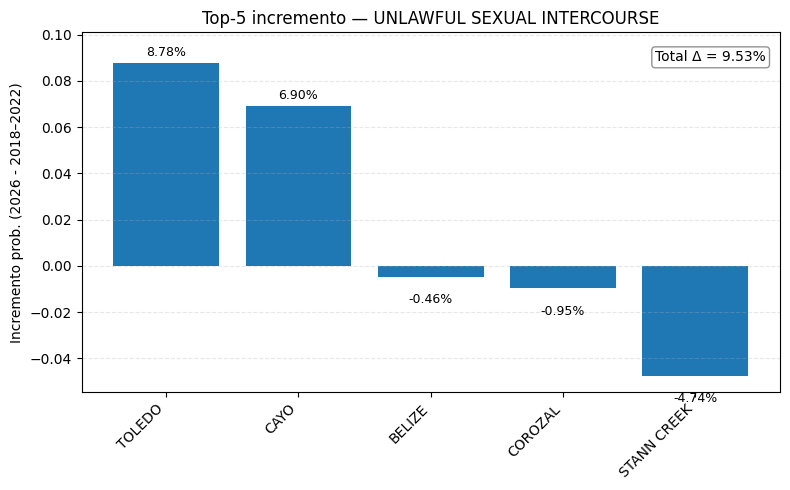

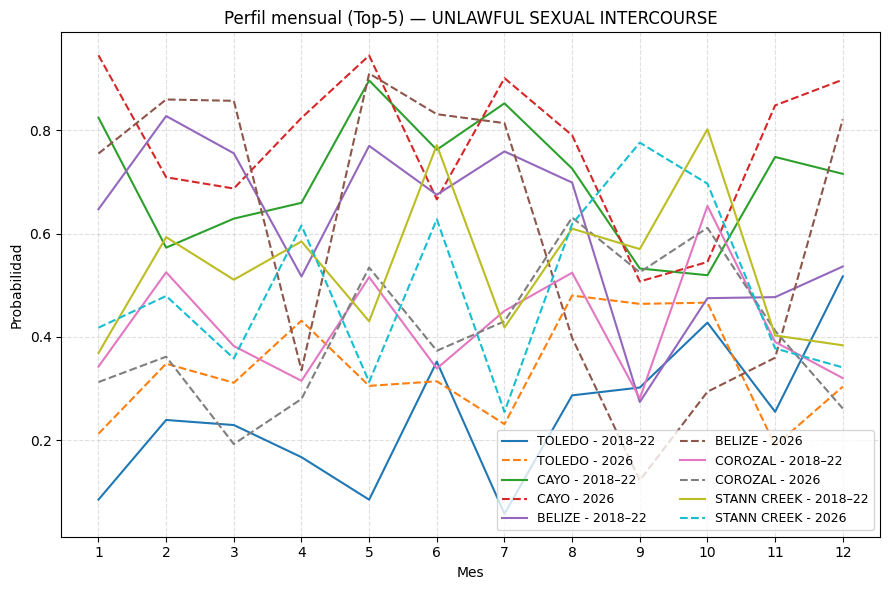

In [ ]:
# ================= PREDICCIONES + GRÁFICAS (ANTI KeyError: 'district') =================
from google.colab import files
uploaded = files.upload()

import os, re, warnings
import numpy as np
import pandas as pd
from itertools import product
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# ---------------------------- Configuración de archivos ----------------------------
PATH_CRIME = "Major Crimes 2018-2024.xlsx"
PATH_PRE   = "PreSchoolEducation_2021-2022.xlsx"
PATH_VOC   = "VocationalEducation_2021-2022.xlsx"
PATH_SEC   = "SecondaryEducation_2021-2022.xlsx"    # estructura especial (header=None)
PATH_POP   = "MidYear_Estimates_AdministrativeArea_Sex_2015-2025.xlsx"  # totales por distrito

OUT_FIGS = "figs"
os.makedirs(OUT_FIGS, exist_ok=True)

# Etiquetas como porcentaje (True) o decimal (False)
LABEL_AS_PERCENT = True
FMT = "{:.2%}" if LABEL_AS_PERCENT else "{:.3f}"

# ---------------------------- Utilidades robustas ---------------------------------
BELIZE_DISTRICTS = {
    "COROZAL","ORANGE WALK","BELIZE","CAYO","STANN CREEK","TOLEDO"
}

DISTRICT_NAME_PATTERNS = [
    # nombres típicos de columna
    "district","district_","administrative_area","admin_area","district_name",
    "distrito","municipality","borough","county","adminarea","administrativearea"
]

def normalize_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    def norm(c):
        return re.sub(r"_+", "_",
               re.sub(r"[^a-z0-9_]", "",
               re.sub(r"\s+", "_", str(c).strip().lower())))
    df.columns = [norm(c) for c in df.columns]
    return df

def std_district_value(x: str) -> str | None:
    """Normaliza el valor a uno de los 6 distritos de Belice o None si no encaja."""
    if pd.isna(x): return None
    s = str(x).upper()
    s = re.sub(r"\bDIST(RICT)?\b", "", s)        # quita 'DIST'/'DISTRICT'
    s = re.sub(r"\s+", " ", s).strip()
    s = s.replace("ORANGEWALK","ORANGE WALK").replace("STANNCREEK","STANN CREEK")
    s = s.replace("STANN  CREEK","STANN CREEK").replace("ORANGE  WALK","ORANGE WALK")
    if s in BELIZE_DISTRICTS:
        return s
    # tolerancias extra
    if s == "BELIZE CITY": return "BELIZE"
    if s == "ORANGE  WALK": return "ORANGE WALK"
    if s == "STANN CREEK DIST": return "STANN CREEK"
    return None

def detect_district_column_by_values(df: pd.DataFrame) -> tuple[pd.DataFrame, str | None, float]:
    """
    Busca la columna que más parece 'district' por contenido.
    Devuelve (df(posible_renombrado), nombre_detectado, fracción_match)
    """
    best_col, best_frac = None, 0.0
    for c in df.columns:
        vals = df[c].dropna()
        if vals.empty: continue
        vals = vals.astype(str).map(std_district_value)
        frac = (vals.notna()).mean()
        if frac > best_frac:
            best_frac, best_col = frac, c
    if best_col is not None and best_frac >= 0.4:  # umbral tolerante
        if best_col != "district":
            df = df.rename(columns={best_col: "district"})
        return df, best_col, best_frac
    return df, None, 0.0

def ensure_district_col(df: pd.DataFrame, dataset_label: str = "", strict: bool = True) -> pd.DataFrame:
    """
    Garantiza que exista una columna 'district' como columna (no índice),
    detectándola por nombre, por índice o por contenido. Estandariza valores.
    """
    df = normalize_columns(df)

    # 1) Si está en el índice, convertir a columna
    if "district" not in df.columns and "district" in (df.index.names or []):
        df = df.reset_index()
        print(f"ℹ️  {dataset_label}: 'district' estaba en el índice → reset_index()")

    # 2) Si ya existe, ok
    if "district" in df.columns:
        pass
    else:
        # 3) Buscar por nombre parecido
        name_hit = next((c for c in DISTRICT_NAME_PATTERNS if c in df.columns), None)
        if name_hit:
            df = df.rename(columns={name_hit: "district"})
            print(f"✔ {dataset_label}: columna 'district' mapeada desde '{name_hit}' (por nombre).")
        else:
            # 4) Detectar por contenido
            df, best_col, frac = detect_district_column_by_values(df)
            if best_col:
                pct = f"{frac*100:.0f}%"
                print(f"✔ {dataset_label}: 'district' detectada por contenido desde '{best_col}' (match ~ {pct}).")

    # 5) Si aún no existe, decidir fallback
    if "district" not in df.columns:
        msg = (f"❌ {dataset_label}: no se pudo detectar columna 'district'. "
               f"Columnas: {list(df.columns)}")
        if strict:
            raise KeyError(msg)
        else:
            print(msg + " → usando 'UNKNOWN' (fallback no recomendado).")
            df["district"] = "UNKNOWN"

    # 6) Estandariza valores
    df["district"] = df["district"].map(lambda v: std_district_value(v) or str(v).upper())
    return df

def month_to_num(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().upper()
    m = {'JANUARY':1,'FEBRUARY':2,'MARCH':3,'APRIL':4,'MAY':5,'JUNE':6,
         'JULY':7,'AUGUST':8,'SEPTEMBER':9,'OCTOBER':10,'NOVEMBER':11,'DECEMBER':12}
    if s in m: return m[s]
    try:
        v = int(float(s))
        if 1 <= v <= 12: return v
    except:
        pass
    return np.nan

def slug(s): return re.sub(r'[^a-zA-Z0-9]+','_', str(s)).strip('_').lower()

def try_header_rows(path, must_keys_map, dataset_label):
    """
    Lee Excel probando headers en filas 0..9 y None. Renombra alias si aparecen.
    Retorna DF con columnas requeridas presentes (o error claro).
    """
    alias_to_target = {alias: tgt for tgt, aliases in must_keys_map.items() for alias in aliases}
    last_cols = None
    for hdr in list(range(10)) + [None]:
        try:
            df = pd.read_excel(path, header=hdr, engine="openpyxl")
        except Exception:
            continue
        df = normalize_columns(df)
        for col in list(df.columns):
            if col in alias_to_target and alias_to_target[col] not in df.columns:
                df = df.rename(columns={col: alias_to_target[col]})
        last_cols = list(df.columns)
        # Intento de district por contenido (por si no aparece por nombre)
        if "district" not in df.columns:
            df = ensure_district_col(df, f"{dataset_label} (header={hdr})", strict=False)
        if all(k in df.columns for k in must_keys_map.keys()):
            if dataset_label:
                print(f"✔ {dataset_label}: encabezado detectado en fila {hdr if hdr is not None else 'None'}")
            return df
    raise RuntimeError(
        f"No pude mapear columnas requeridas {list(must_keys_map.keys())} en '{path}'. "
        f"Últimas columnas leídas: {last_cols}"
    )

def read_crime_smart(path):
    must = {
        "district": DISTRICT_NAME_PATTERNS,
        "year":     ["year","ano","año","period_year","periodo","period"],
        "month":    ["month","mes","month_name","monthname"],
        "major_crime": ["major_crime","major_crimes","major_crime_incident","major_crime_incidents",
                        "major_crime__incidents","crime","category","offense","tipo","tipo_delito","major crime"]
    }
    df = try_header_rows(path, must, "CRIME")
    df = ensure_district_col(df, "CRIME")
    # Normalizaciones de valores
    df["year"]      = pd.to_numeric(df["year"], errors="coerce").astype("Int64")
    df["month_num"] = df["month"].apply(month_to_num).astype("Int64")
    # Limpieza mínima
    df = df.dropna(subset=["district","year","month_num","major_crime"])
    return df

def build_secondary_long(path_xlsx):
    # Hoja sin cabecera; años fila 4 col 6..11; distritos filas 7..12 col 1.
    sec = pd.read_excel(path_xlsx, header=None, engine="openpyxl")
    years = sec.loc[4, 6:11].tolist()         # ej: '2021/22'
    districts = sec.loc[7:12, 1].tolist()     # nombres
    records = []
    for i, d in enumerate(districts):
        if isinstance(d, str) and d.strip():
            for j, y in enumerate(years):
                val = sec.loc[7 + i, 6 + j]
                if pd.notnull(val):
                    year_int = int(str(y).split('/')[0])  # 2021/22 >> 2021
                    dfix = std_district_value(d) or str(d).strip().upper()
                    records.append({'district': dfix, 'year': year_int,
                                    'number_secondary_by_district': float(val)})
    return pd.DataFrame(records)

def load_population(path_pop):
    raw = pd.read_excel(path_pop, sheet_name="Sheet1", header=None, engine="openpyxl")
    year_cols = list(range(3, 15))            # 2015..2025
    years = list(range(2015, 2026))
    names = raw[1].astype(str).str.strip()
    patt = re.compile(r'^(Corozal|Orange Walk|Belize|Cayo|Stann Creek|Toledo)$', re.I)
    idxs = [i for i, v in names.items() if patt.match(str(v).strip())]
    rows = []
    for i in idxs:
        dname = std_district_value(raw.iat[i, 1]) or str(raw.iat[i,1]).strip().upper()
        for c, y in zip(year_cols, years):
            val = raw.iat[i, c]
            try: pop = float(str(val).replace(",", ""))
            except: pop = np.nan
            rows.append((dname, y, pop))
    out = pd.DataFrame(rows, columns=["district", "year", "pop"]).dropna(subset=["pop"])
    out["year"] = pd.to_numeric(out["year"], errors="coerce")
    return out.reset_index(drop=True)

def autolabel(ax, rects, fmt):
    for r in rects:
        h = r.get_height()
        ax.annotate(fmt.format(h), xy=(r.get_x()+r.get_width()/2, h),
                    xytext=(0, 3 if h>=0 else -12), textcoords="offset points",
                    ha="center", va="bottom" if h>=0 else "top", fontsize=9)

def as_column(df: pd.DataFrame, col: str, label: str) -> pd.DataFrame:
    """Si 'col' está en el índice, hace reset_index(); si no existe, intenta detectarlo por contenido."""
    if col in df.columns: return df
    if col in (df.index.names or []):
        print(f"ℹ️  {label}: '{col}' estaba en índice → reset_index()")
        return df.reset_index()
    if col == "district":
        return ensure_district_col(df, label, strict=False)
    return df

# ---------------------------- 1) Cargar y preparar CRIMEN --------------------------
crimen = read_crime_smart(PATH_CRIME)
crimen = as_column(crimen, "district", "CRIME")

# Agregado mensual
agg = (crimen
       .groupby(['district','year','month_num','major_crime'], as_index=False)
       .size().rename(columns={'size':'count'}))

# Filtro 2018-2024
agg = agg[(agg['year']>=2018) & (agg['year']<=2024)].copy()
if agg.empty:
    raise RuntimeError("El agregado de crimen está vacío tras filtrar 2018-2024. Revisa PATH_CRIME y columnas.")

districts   = sorted(agg['district'].dropna().unique().tolist())
crime_types = sorted(agg['major_crime'].dropna().unique().tolist())

# Rejilla completa
grid = pd.DataFrame(list(product(districts, range(2018, 2025), range(1, 13), crime_types)),
                    columns=['district','year','month_num','major_crime'])

panel = (grid
         .merge(agg, on=['district','year','month_num','major_crime'], how='left')
         .assign(count=lambda d: d['count'].fillna(0).astype(int))
         .assign(target_bin=lambda d: (d['count']>0).astype(int)))

panel = as_column(panel, "district", "PANEL")

# ---------------- 2) Features anuales (pre, sec, voc) y población -----------------
# PRE
pre = pd.read_excel(PATH_PRE, engine="openpyxl")
pre = ensure_district_col(pre, "PRE", strict=False)
pre["year"] = pd.to_numeric(pre.get("year", np.nan), errors="coerce")

if "number_preschools" not in pre.columns:
    num_candidates = [c for c in pre.columns if c not in ("district","year")]
    num_candidates = [c for c in num_candidates if pd.api.types.is_numeric_dtype(pre[c])]
    if num_candidates:
        pre = pre.rename(columns={num_candidates[-1]: "number_preschools"})
        print(f"✔ PRE: 'number_preschools' deducida desde '{num_candidates[-1]}'")
    else:
        raise ValueError("PreSchoolEducation debe tener 'number_preschools' o una columna numérica identificable.")
pre_agg = pre.groupby(['district','year'], as_index=False)['number_preschools'].sum()
pre_agg = as_column(pre_agg, "district", "PRE_AGG")

# SEC
sec_long = build_secondary_long(PATH_SEC)
sec_long = as_column(sec_long, "district", "SEC_LONG")

# VOC
voc = pd.read_excel(PATH_VOC, engine="openpyxl")
voc = ensure_district_col(voc, "VOC", strict=False)
voc["year"] = pd.to_numeric(voc.get("year", np.nan), errors="coerce")
if "value" not in voc.columns:
    num_candidates = [c for c in voc.columns if c not in ("district","year")]
    num_candidates = [c for c in num_candidates if pd.api.types.is_numeric_dtype(voc[c])]
    if num_candidates:
        voc = voc.rename(columns={num_candidates[-1]: "value"})
        print(f"✔ VOC: 'value' deducida desde '{num_candidates[-1]}'")
    else:
        raise ValueError("VocationalEducation debe tener 'value' o una columna numérica identificable.")
voc_agg = voc.groupby(['district','year'], as_index=False)['value'].sum()
voc_agg = as_column(voc_agg, "district", "VOC_AGG")

# POBLACIÓN
pop = load_population(PATH_POP)
pop = as_column(pop, "district", "POP")

# Merge anual por distrito-año
annual = (panel[['district','year']].drop_duplicates()
          .merge(pre_agg, on=['district','year'], how='left')
          .merge(sec_long, on=['district','year'], how='left')
          .merge(voc_agg, on=['district','year'], how='left')
          .merge(pop, on=['district','year'], how='left'))
annual = as_column(annual, "district", "ANNUAL")

# Imputaciones por distrito (ffill/bfill por año)
for col in ['number_preschools','number_secondary_by_district','value','pop']:
    if col in annual.columns:
        annual[col] = (annual
                       .sort_values(['district','year'])
                       .groupby('district')[col]
                       .transform(lambda s: s.fillna(method='ffill').fillna(method='bfill')))

# Unir al panel mensual
data = panel.merge(annual, on=['district','year'], how='left')
data = as_column(data, "district", "DATA")

# Estacionalidad
data['month_sin'] = np.sin(2*np.pi*data['month_num']/12.0)
data['month_cos'] = np.cos(2*np.pi*data['month_num']/12.0)

# Imputación numérica
num_cols = ['number_preschools','number_secondary_by_district','value','pop','month_sin','month_cos']
for c in num_cols:
    if c in data.columns:
        med = data[c].median(skipna=True)
        data[c] = data[c].fillna(0 if pd.isna(med) else med)
    else:
        data[c] = 0.0

# ---------------- 3) Entrenamiento (2018–2022) + OOB + Gráficas -------------------
train_mask = (data['year']>=2018) & (data['year']<=2022)
feat_cols = ['number_preschools','number_secondary_by_district','value','pop','month_sin','month_cos']

def safe_plot_save(path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    plt.savefig(path, dpi=150)

resultados_top = []

crime_types = sorted(data['major_crime'].dropna().unique().tolist())
districts   = sorted(data['district'].dropna().unique().tolist())

for crime in crime_types:
    sub = data[(data['major_crime']==crime) & train_mask].copy()
    if sub.empty:
        continue
    sub = as_column(sub, "district", f"SUB[{crime}]")

    X_train = sub[feat_cols].copy()
    y_train = sub['target_bin'].astype(int).values

    rf = RandomForestClassifier(
        n_estimators=350, max_depth=None, min_samples_split=4, min_samples_leaf=2,
        class_weight="balanced_subsample", random_state=42, oob_score=True, n_jobs=-1
    )
    rf.fit(X_train, y_train)

    # OOB probabilities
    if hasattr(rf, "oob_decision_function_") and rf.oob_decision_function_ is not None:
        if rf.oob_decision_function_.ndim == 2 and rf.oob_decision_function_.shape[1] >= 2:
            p_oob = rf.oob_decision_function_[:, 1]
        else:
            p_oob = rf.oob_decision_function_
    else:
        p_oob = rf.predict_proba(X_train)[:,1]

    sub = sub.assign(p_oob=p_oob)

    # Baselines
    base = (sub.groupby('district', as_index=False)['p_oob']
              .mean().rename(columns={'p_oob':'prob_mean_2018_2022'}))
    base = as_column(base, "district", f"BASE[{crime}]")

    # Proyección 2026
    tmp26 = pd.DataFrame(list(product(districts, [2026], range(1,13))),
                         columns=['district','year','month_num'])

    # Población 2026 = 2025 * (pop_2025/pop_2024)
    pop_24 = (pop[pop['year']==2024]
              .assign(district=lambda d: d['district'].str.strip().str.upper())
              .groupby('district', as_index=False)['pop'].sum()
              .rename(columns={'pop':'pop_2024'}))
    pop_25 = (pop[pop['year']==2025]
              .assign(district=lambda d: d['district'].str.strip().str.upper())
              .groupby('district', as_index=False)['pop'].sum()
              .rename(columns={'pop':'pop_2025'}))
    pop_last = pop_25.merge(pop_24, on='district', how='left')
    pop_last = (pop_last
                .groupby('district', as_index=False)
                .agg(pop_2024=('pop_2024','max'),
                     pop_2025=('pop_2025','max')))
    pop_last['growth_2425'] = (pop_last['pop_2025'] / pop_last['pop_2024']).replace([np.inf, -np.inf], np.nan)
    pop_last['growth_2425'] = pop_last['growth_2425'].fillna(1.0)
    pop_last['pop_2026'] = pop_last['pop_2025'] * pop_last['growth_2425']
    pop_last['pop_2026'] = pop_last['pop_2026'].fillna(pop_last['pop_2025'])

    tmp26 = tmp26.merge(pop_last[['district','pop_2026']], on='district', how='left')

    # Últimas features anuales disponibles (carry-forward)
    last_annual = (annual.sort_values(['district','year'])
                        .groupby('district').tail(1)
                        [['district','number_preschools','number_secondary_by_district','value']]
                        .copy())
    tmp26 = tmp26.merge(last_annual, on='district', how='left')

    # Estacionalidad + población proyectada
    tmp26['month_sin'] = np.sin(2*np.pi*tmp26['month_num']/12.0)
    tmp26['month_cos'] = np.cos(2*np.pi*tmp26['month_num']/12.0)
    tmp26['pop'] = tmp26['pop_2026']

    for c in ['number_preschools','number_secondary_by_district','value','pop','month_sin','month_cos']:
        med = tmp26[c].median(skipna=True)
        tmp26[c] = tmp26[c].fillna(0 if pd.isna(med) else med)

    # Probabilidades 2026 (por mes)
    p26 = rf.predict_proba(tmp26[['number_preschools','number_secondary_by_district','value','pop','month_sin','month_cos']])[:,1]
    tmp26['proba_2026'] = p26

    # Promedio mensual por distrito 2026
    proj = (tmp26.groupby('district', as_index=False)['proba_2026']
                 .mean().rename(columns={'proba_2026':'prob_mean_2026'}))

    # Comparación y Δ
    comp = (base.merge(proj, on='district', how='outer')
                 .fillna(0.0)
                 .assign(delta=lambda d: d['prob_mean_2026'] - d['prob_mean_2018_2022']))
    comp = comp.merge(
        pop_last[['district','pop_2024','pop_2025','growth_2425']].rename(columns={'growth_2425':'pop_growth_2425'}),
        on='district', how='left'
    )
    comp = comp.drop_duplicates(subset=['district'], keep='first').sort_values('delta', ascending=False)

    top5 = comp.head(5).copy()
    top5.insert(0, 'crime_type', crime)
    resultados_top.append(top5)

    print(f"\n=== TOP 5 incremento de probabilidad (2026 - 2018..2022) — {crime} ===")
    print(
        top5[['crime_type','district',
              'prob_mean_2018_2022','prob_mean_2026','delta',
              'pop_2024','pop_2025','pop_growth_2425']]
        .round(4)
        .to_string(index=False)
    )

    # (A) Series mensuales (Top-5)
    top5_dists = top5['district'].tolist()

    top5_base_month = (
        sub[sub['district'].isin(top5_dists)]
        .groupby(['district','month_num'], as_index=False)['p_oob'].mean()
        .rename(columns={'p_oob':'prob_mean_month_2018_2022'})
    )
    top5_proj_month = (
        tmp26[tmp26['district'].isin(top5_dists)]
        .groupby(['district','month_num'], as_index=False)['proba_2026'].mean()
    )

    # (B) Barras: Top-5 deltas
    fig, ax = plt.subplots(figsize=(8, 5))
    x = np.arange(len(top5))
    heights = top5['delta'].values
    bars = ax.bar(x, heights)

    ax.set_xticks(x)
    ax.set_xticklabels(top5['district'].astype(str).tolist(), rotation=45, ha='right')
    ax.set_ylabel("Incremento prob. (2026 - 2018–2022)")
    ax.set_title(f"Top-5 incremento — {crime}")
    autolabel(ax, bars, FMT)

    total_delta = float(top5['delta'].sum())
    ax.text(0.98, 0.95, f"Total Δ = {FMT.format(total_delta)}",
            transform=ax.transAxes, ha='right', va='top', fontsize=10,
            bbox=dict(boxstyle='round,pad=0.25', fc='white', ec='gray', alpha=0.85))
    ymin = min(0, heights.min() * 1.15)
    ymax = max(heights.max() * 1.15, 0.05 if LABEL_AS_PERCENT else 0.005)
    ax.set_ylim(ymin, ymax)
    ax.grid(True, linestyle='--', alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_FIGS, f"top5_delta_{slug(crime)}.png"), dpi=150)
    plt.show()

    # (C) Líneas: perfil mensual (Top-5)
    months = np.arange(1, 13, dtype=int)
    fig = plt.figure(figsize=(9, 6))
    for dname in top5_dists:
        base_series = (
            top5_base_month[top5_base_month['district'] == dname]
            .set_index('month_num').reindex(months)['prob_mean_month_2018_2022']
        )
        proj_series = (
            top5_proj_month[top5_proj_month['district'] == dname]
            .set_index('month_num').reindex(months)['proba_2026']
        )
        plt.plot(months, base_series.values, label=f"{dname} - 2018–22")
        plt.plot(months, proj_series.values, linestyle='--', label=f"{dname} - 2026")
    plt.xlabel("Mes"); plt.ylabel("Probabilidad")
    plt.title(f"Perfil mensual (Top-5) — {crime}")
    plt.xticks(months)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(ncol=2, fontsize=9)
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_FIGS, f"top5_monthly_{slug(crime)}.png"), dpi=150)
    plt.show()

# ---------------- 4) Resultados consolidados (CSV opcional) -----------------------
if resultados_top:
    top_all = pd.concat(resultados_top, ignore_index=True)
    # top_all.to_csv("top5_incremento_por_delito.csv", index=False)
else:
    print("\nNo hubo suficientes datos para calcular incrementos.")



## Probabilidad mensual por distrito y delito basado en el entrenamiento
- Entrena con 2018–2022
- Valida en 2024 (incluye tasa real por 100k)
- Predice 2026 (incluye población proxy 2026=2025)

Archivos esperados en el mismo directorio
- Major Crimes 2018-2024.xlsx
- MainLaborForceIndicators_2012-2024.xlsx (opcional)
- PreSchoolEducation_2021-2022.xlsx
- SecondaryEducation_2021-2022.xlsx
- VocationalEducation_2021-2022.xlsx
- MidYear_Estimates_AdministrativeArea_Sex_2015-2025.xlsx (POBLACIÓN)

`Que hacemos ? `

Lee y limpia los delitos (2018–2024), arma el panel mensual distrito × delito y crea features mínimas (estacionalidad + dummies de distrito + promedios estaticos de laboral/preescolar/secundaria/vocacional si estan).

Carga y sanea la poblacion del archivo MidYear_Estimates_AdministrativeArea_Sex_2015-2025.xlsx (detecta totales por distrito 2015–2025).

Une poblacion por distrito-ano al panel. La poblacion entra como feature para el modelo (no fuga información).

Entrena Random Forest por tipo de delito con 2018–2022 y valida en 2024.

En las salidas 2024 agrega rate_100k_true = count / pop * 100000 (tasa real) para comparación con la probabilidad predicha.

Genera predicciones 2026, incluyendo una columna pop_2026_proxy (usa la población 2025 como aproximacion.

`PASO A PASO`

Selección de variables (set reducido):

De cada archivo (laboral, preescolar, secundaria, vocacional) toma todas las columnas numericas disponibles y calcula su promedio por distrito (features estaticas).

Anade: month_sin, month_cos (estacionalidad) y dummies de distrito.

Union y periodo: panel mensual 2018–2024 por distrito × delito (completando meses faltantes con 0 incidentes).

Entrenamiento: 2018–2022 por tipo de delito en RandomForestClassifier con balanceo de clases.

Validacion 2024: comparo prediccion vs realidad 2024 (en los CSV “predictions_2024_*” y las curvas ROC guardadas).

Prediccion 2026: genera calendario 2026 (12 meses × distrito) y estimo probabilidades por delito; estan en los CSV “predictions_2026_*”.

`SALIDAS : `

Salidas clave (carpeta rf_baseline_outputs_pop/)

metrics_2024_by_crime.csv — métricas por delito (AUC, F1, Accuracy, Brier, TP/FP/FN/TN).

feature_importance_<delito>.csv — top features por delito (incluye pop y las que resulten relevantes).

roc_2024_<delito>.png — curva ROC por delito (validación 2024).

predictions_2024_with_pop_<delito>.csv — por distrito-mes: count, pop, rate_100k_true, proba, pred_0_1.

predictions_2026_with_pop_<delito>.csv — por distrito-mes: pop_2026_proxy, proba (probabilidad estimada del evento).

`Nota :` no uso la tasa (que depende del count del mismo mes) como feature para evitar fuga de información; solo la reporto en las salidas 2024 para validar contra realidad

`codificaciones estacionales del mes:`

month_sin = sin(2π * mes / 12)

month_cos = cos(2π * mes / 12)

uso esto  Porque el mes es ciclico (despues de diciembre viene enero). En vez de usar 1–12 (donde 12 y 1 quedarían “lejos”), lo mapeo al circulo unitario. Asi, enero y diciembre quedan cerca en el plano (sin, cos) y el modelo puede aprender patrones de temporada sin el “salto” 12→1.

Ej:

Enero (mes=1): sin(30°)≈0.5, cos(30°)≈0.866

Julio (mes=7): sin(210°)≈-0.5, cos(210°)≈-0.866

Diciembre (mes=12): sin(360°)=0, cos(360°)=1 >>  cerca de enero en el circulo.

In [ ]:
# -*- coding: utf-8 -*-


import os, re, warnings, numpy as np, pandas as pd
import matplotlib.pyplot as plt ## - PreSchoolEducation_2021-2022.xlsx & SecondaryEducation_2021-2022.xlsx

warnings.filterwarnings("ignore")

DATA_FILES = {
    "crimes": "Major Crimes 2018-2024.xlsx",
    "labor": "MainLaborForceIndicators_2012-2024.xlsx",
    "pre": "PreSchoolEducation_2021-2022.xlsx",
    "sec": "SecondaryEducation_2021-2022.xlsx",
    "voc": "VocationalEducation_2021-2022.xlsx",
    "pop": "MidYear_Estimates_AdministrativeArea_Sex_2015-2025.xlsx",
}

OUT_DIR = "rf_baseline_outputs_pop"
os.makedirs(OUT_DIR, exist_ok=True)

def snake(s):
    if s is None: return None
    s = str(s).strip()
    s = re.sub(r"[\s\-\/]+","_", s.lower())
    s = re.sub(r"[^a-z0-9_]", "", s)
    s = re.sub(r"_+", "_", s)
    return s

def read_any_excel(path):
    x = pd.read_excel(path, sheet_name=None, engine="openpyxl")
    if isinstance(x, dict):
        best_df = max(x.values(), key=lambda df: len(df))
        df = best_df.copy()
    else:
        df = x.copy()
    df.columns = [snake(c) for c in df.columns]
    return df

def parse_period_cols(df):
    d = df.copy()
    cols = list(d.columns)
    year_col = next((c for c in cols if re.search(r'(^|_)year($|_)', c)), None)
    month_col = next((c for c in cols if re.search(r'(^|_)month($|_)', c)), None)
    date_col = next((c for c in cols if re.search(r'date|fech|incident_dt|date_of|period', c)), None)

    def m2n(x):
        if pd.isna(x): return np.nan
        s=str(x).strip().lower()
        mapm={'jan':1,'january':1,'feb':2,'february':2,'mar':3,'march':3,'apr':4,'april':4,'may':5,
              'jun':6,'june':6,'jul':7,'july':7,'aug':8,'august':8,'sep':9,'sept':9,'september':9,
              'oct':10,'october':10,'nov':11,'november':11,'dec':12,'december':12}
        try:
            v=float(s); return int(v)
        except:
            return mapm.get(s,np.nan)

    if year_col is not None and month_col is not None:
        d['year'] = pd.to_numeric(d[year_col], errors='coerce').astype('Int64')
        d['month_num'] = d[month_col].apply(m2n).astype('Int64')
    elif date_col is not None:
        dt = pd.to_datetime(d[date_col], errors='coerce')
        d['year'] = dt.dt.year.astype('Int64')
        d['month_num'] = dt.dt.month.astype('Int64')
    else:
        d['year'] = pd.NA; d['month_num'] = pd.NA

    y = d['year'].astype("Int64").astype(str)
    m = d['month_num'].astype("Int64").astype(str).str.zfill(2)
    d['period_dt'] = pd.to_datetime(y + "-" + m + "-01", errors='coerce')
    return d

def detect_district_col(df):
    for c in df.columns:
        if re.search(r'district|distrito', c): return c
    for c in df.columns:
        if re.search(r'area|region', c): return c
    return None

def detect_crime_type_col(df):
    for c in df.columns:
        if re.search(r'crime|offen|delit|category|type', c): return c
    return None

def summarize_by_district_static(path, prefix, dist_col_target):
    if not os.path.exists(path): return None
    df = read_any_excel(path); df = parse_period_cols(df)
    dist = detect_district_col(df)
    if dist is None: return None
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    num_cols = [c for c in num_cols if c not in ['year','month','month_num']]
    if not num_cols: return None
    agg = df.groupby(dist)[num_cols].mean(numeric_only=True).reset_index()
    if dist != dist_col_target:
        agg = agg.rename(columns={dist: dist_col_target})
    agg = agg.rename(columns={c:f"{prefix}_{c}" for c in num_cols})
    return agg

def build_crime_panel(path):
    dfc = read_any_excel(path); dfc = parse_period_cols(dfc)
    dist_col = detect_district_col(dfc); typ_col  = detect_crime_type_col(dfc)
    if typ_col is None: typ_col = 'crime_type'; dfc[typ_col] = 'all'
    dfc = dfc[~dfc['year'].isna() & ~dfc['month_num'].isna()].copy()
    dfc['year'] = dfc['year'].astype(int); dfc['month_num'] = dfc['month_num'].astype(int)
    cnt_col = next((c for c in dfc.columns if c in ['count','counts','incident_count','incidents','n']), None)
    if cnt_col is None:
        grouped = (dfc.groupby([dist_col,'year','month_num',typ_col]).size().reset_index(name='count'))
        dfc2 = grouped
    else:
        dfc2 = dfc[[dist_col,'year','month_num',typ_col,cnt_col]].rename(columns={cnt_col:'count'})
    dfc2 = dfc2[(dfc2['year']>=2018) & (dfc2['year']<=2024)].copy()
    districts  = sorted(dfc2[dist_col].dropna().astype(str).unique().tolist())
    crime_types= sorted(dfc2[typ_col].dropna().astype(str).unique().tolist())
    grid = []
    for y in range(2018,2025):
        for m in range(1,13):
            for d in districts:
                for t in crime_types:
                    grid.append((d,y,m,t))
    grid = pd.DataFrame(grid, columns=[dist_col,'year','month_num',typ_col])
    panel = grid.merge(dfc2, on=[dist_col,'year','month_num',typ_col], how='left')
    panel['count'] = panel['count'].fillna(0).astype(int)
    panel['target_bin'] = (panel['count']>0).astype(int)
    return panel, dist_col, typ_col

def load_population_belize(path):
    """Return tidy df: [district, year, pop] for 2015..2025 at district totals."""
    raw = pd.read_excel(path, sheet_name="Sheet1", header=None, engine="openpyxl")
    # columns 3..14 map to 2015..2025 por inspección
    year_cols = list(range(3, 15))
    years = list(range(2015, 2026))
    # distrito = columna 1 (nombres), usamos filas del total de distrito (no Town/Rural)
    names = raw[1].astype(str).str.strip()
    pattern = re.compile(r'^(Corozal|Orange Walk|Belize|Cayo|Stann Creek|Toledo)$', re.I)
    idxs = [i for i,v in names.items() if pattern.match(str(v).strip())]
    rows = []
    for i in idxs:
        dname = str(raw.iat[i,1]).strip().upper()
        for c, y in zip(year_cols, years):
            val = raw.iat[i, c]
            try:
                pop = float(str(val).replace(",",""))
            except:
                pop = np.nan
            rows.append((dname, y, pop))
    out = pd.DataFrame(rows, columns=["district","year","pop"]).dropna(subset=["pop"])
    out["district"] = out["district"].str.upper().str.strip()
    return out.reset_index(drop=True)

# === pipeline ===
panel, dist_col, typ_col = build_crime_panel(DATA_FILES["crimes"])

# Static features from other sources
static_all = None
for key,prefix in [('pre','pre'),('sec','sec'),('voc','voc'),('labor','lab')]:
    path = DATA_FILES.get(key,None)
    if path and os.path.exists(path):
        part = summarize_by_district_static(path, prefix, dist_col)
        if part is not None:
            static_all = part if static_all is None else static_all.merge(part, on=dist_col, how='outer')

data = panel.merge(static_all, on=dist_col, how='left') if static_all is not None else panel.copy()

# Simple numeric impute
for c in data.columns:
    if data[c].dtype.kind in "biufc":
        med = data[c].median(skipna=True)
        data[c] = data[c].fillna(0 if pd.isna(med) else med)
    else:
        data[c] = data[c].fillna("")

# Seasonal + district dummies
data['month_sin'] = np.sin(2*np.pi*data['month_num']/12.0)
data['month_cos'] = np.cos(2*np.pi*data['month_num']/12.0)
dist_dummies = pd.get_dummies(data[dist_col].astype(str), prefix="dist")
data = pd.concat([data, dist_dummies], axis=1)

# === Población y tasas ===
pop_df = load_population_belize(DATA_FILES["pop"])
# merge conservando 'district' original
pop_df2 = pop_df.rename(columns={"district":"district_pop","pop":"pop"})
data = data.merge(pop_df2, left_on=[dist_col,"year"], right_on=["district_pop","year"], how="left").drop(columns=["district_pop"])
# forward/back fill por distrito
data["pop"] = data.groupby(dist_col)["pop"].transform(lambda s: s.fillna(method="ffill").fillna(method="bfill"))

# Splits
train_mask = (data['year']>=2018)&(data['year']<=2022)
val_mask   = (data['year']==2024)

# Features (NO usar tasa basada en 'count' para evitar leakage)
ignore = set([dist_col, 'count','target_bin', typ_col,'year','month_num'])
feat_cols = [c for c in data.columns if c not in ignore and data[c].dtype.kind in "biufc"]
# asegurar que 'pop'(Population) esta incluido
if "pop" not in feat_cols: feat_cols = feat_cols + ["pop"]
X_all = data[feat_cols].copy()
y_all = data['target_bin'].astype(int)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, brier_score_loss, confusion_matrix, roc_curve

crime_types = sorted(data[typ_col].astype(str).unique().tolist())

rows = []
for crime in crime_types:
    ix = data[typ_col].astype(str).values==crime
    X = X_all.loc[ix]; y = y_all.loc[ix]
    tr = train_mask[ix].values; va = val_mask[ix].values
    if tr.sum() < 50 or va.sum() < 12: continue
    rf = RandomForestClassifier(n_estimators=300, min_samples_split=4, min_samples_leaf=2,
                                class_weight="balanced_subsample", random_state=42, n_jobs=-1)
    rf.fit(X[tr], y[tr])
    p = rf.predict_proba(X[va])[:,1]; yv = y[va]
    auc = roc_auc_score(yv,p) if len(np.unique(yv))>1 else np.nan
    yhat = (p>=0.5).astype(int)
    f1  = f1_score(yv, yhat, zero_division=0)
    acc = accuracy_score(yv, yhat)
    brier = brier_score_loss(yv, p)
    cm = confusion_matrix(yv,yhat)
    tn, fp, fn, tp = (cm.ravel() if cm.size==4 else (np.nan,np.nan,np.nan,np.nan))
    rows.append((crime,int(tr.sum()),int(va.sum()),auc,f1,acc,brier,tp,fp,fn,tn))

    # Guardar validación 2024 con tasa real por 100k
    val_out = data.loc[ix & val_mask, [dist_col,'year','month_num','count','pop']].copy()
    val_out['crime_type']=crime; val_out['y_true']=yv.values; val_out['proba']=p; val_out['pred_0_1']=yhat
    val_out['rate_100k_true'] = (val_out['count']/val_out['pop']*100000).round(3)
    fn = re.sub(r'[^a-zA-Z0-9]+','_', crime).lower()
    val_out.to_csv(os.path.join(OUT_DIR, f"predictions_2024_with_pop_{fn}.csv"), index=False)

    # Importancias
    fi = pd.Series(rf.feature_importances_, index=feat_cols).sort_values(ascending=False)
    fi.head(20).to_csv(os.path.join(OUT_DIR, f"feature_importance_{fn}.csv"))

    # ROC
    fpr,tpr,thr = roc_curve(yv,p)
    plt.figure(figsize=(5,4)); plt.plot(fpr,tpr,label=f"AUC={auc:.3f}"); plt.plot([0,1],[0,1],'--')
    plt.title(f"ROC 2024 - {crime}"); plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right"); plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, f"roc_2024_{fn}.png"), dpi=120); plt.close()

    # 2026 con población proxy (2025)
    districts = sorted(data[dist_col].astype(str).unique().tolist())
    pred26 = []
    for dname in districts:
        for m in range(1,13): pred26.append((dname,2026,m,crime))
    pred26 = pd.DataFrame(pred26, columns=[dist_col,'year','month_num','crime_type'])
    pop_2025 = pop_df[pop_df["year"]==2025][["district","pop"]].rename(columns={"district":dist_col,"pop":"pop_2026_proxy"})
    pred26 = pred26.merge(pop_2025, on=dist_col, how="left")
    pred26['month_sin'] = np.sin(2*np.pi*pred26['month_num']/12.0)
    pred26['month_cos'] = np.cos(2*np.pi*pred26['month_num']/12.0)
    for dcol in [c for c in data.columns if c.startswith('dist_')]:
        dval = dcol.replace('dist_','')
        pred26[dcol] = (pred26[dist_col].astype(str)==dval).astype(int)
    # unir features estáticas (si hay)
    static_cols = [c for c in feat_cols if c.startswith(('lab_','pre_','sec_','voc_'))]
    if len(static_cols):
        base_static = data[[dist_col]+static_cols].drop_duplicates(subset=[dist_col])
        pred26 = pred26.merge(base_static, on=dist_col, how='left')
    # asegurar columnas de features + imputar
    pred26['pop'] = pred26['pop_2026_proxy']
    for c in feat_cols:
        if c not in pred26.columns: pred26[c]=0.0
        med = pred26[c].median(skipna=True); pred26[c]=pred26[c].fillna(0 if pd.isna(med) else med)
    p26 = rf.predict_proba(pred26[feat_cols])[:,1]
    pred26['probability']=p26
    pred26.to_csv(os.path.join(OUT_DIR, f"predictions_2026_with_pop_{fn}.csv"), index=False)

# Métricas
metrics_df = pd.DataFrame(rows, columns=["crime_type","n_train","n_val_2024","roc_auc","f1","accuracy","brier","tp","fp","fn","tn"])
metrics_df.to_csv(os.path.join(OUT_DIR,"metrics_2024_by_crime.csv"), index=False)
print("Listo. Carpeta:", OUT_DIR)


Listo. Carpeta: rf_baseline_outputs_pop


# Modelo predictivo: Lightgbm

In [ ]:
# -------------------------------------------------
# 1. CARGA DE DATOS
# -------------------------------------------------
import pandas as pd
import numpy as np

# 1.1 Lectura del archivo Excel
excel_file = pd.ExcelFile("MainLaborForceIndicators_2012-2024.xlsx")

# 1.2 Tablas de fuerza laboral y crímenes (hoja 'cleaned_data')
lab_df   = excel_file.parse("cleaned_data")
crime_df = excel_file.parse("cleaned_data")

# -------------------------------------------------
# 2. LIMPIEZA Y NORMALIZACIÓN DE LA TABLA DE FUERZA LABORAL
# -------------------------------------------------
# 2.1 Nombres de columnas numéricas esperadas
num_cols_lab = [
    "don_t_know_not_stated","employed","labour_force",
    "labour_force_participation_rate","not_in_labour_force",
    ">=_14","period_total","<=_14","underemployment_rate",
    "unemployed","unemployment_rate","working_age_>=_14"
]

# 2.2 Convertir sólo las columnas que realmente existen
existentes_lab = [c for c in lab_df.columns if c in num_cols_lab]
lab_df[existentes_lab] = lab_df[existentes_lab].apply(pd.to_numeric, errors="coerce")

# 2.3 La primera fila contiene los encabezados reales → re‑etiquetar
lab_header = lab_df.iloc[0].tolist()
lab_df = pd.DataFrame(lab_df.values[1:], columns=lab_header)

# 2.4 Normalizar nombres de columnas (sin espacios ni caracteres especiales)
lab_df.columns = (
    lab_df.columns
    .str.replace(' ', '_')
    .str.replace('[^A-Za-z0-9_]+', '', regex=True)
    .str.lower()
)

# 2.5 Limpieza de valores numéricos (quitar comas de miles)
num_cols_limpios = [
    "don_t_know_not_stated","employed","labour_force",
    "labour_force_participation_rate","not_in_labour_force",
    "14","period_total","14_1","underemployment_rate",
    "unemployed","unemployment_rate","working_age_14"
]
existentes_limpios = [c for c in num_cols_limpios if c in lab_df.columns]

for col in existentes_limpios:
    lab_df[col] = lab_df[col].astype(str).str.replace(',', '', regex=False)
    lab_df[col] = pd.to_numeric(lab_df[col], errors='coerce')

# 2.6 Conversión de año y mes
if 'year' in lab_df.columns:
    lab_df['year'] = pd.to_numeric(lab_df['year'], errors='coerce').astype('Int64')
if 'month' in lab_df.columns:
    lab_df['month'] = lab_df['month'].astype(str)

# 2.7 Eliminar filas sin año (no se pueden analizar)
lab_df.dropna(subset=['year'], inplace=True)

# -------------------------------------------------
# 3. PREPARACIÓN DE LOS DATOS DE CRÍMENES
# -------------------------------------------------
# 3.1 Definir encabezado esperado (según el notebook original)
crime_header = [
    "year","month","type","date","time","city","location_type",
    "district","area_type","weapon","motive"
]

# Si el DataFrame original tiene una fila de encabezado, usarla; de lo contrario,
# crear el DataFrame a partir de los valores existentes.
# Aquí asumimos que crime_df ya contiene los datos sin encabezado adicional.
crime_df = pd.DataFrame(crime_df.values, columns=crime_header)

# 3.2 Eliminar filas completamente vacías
crime_df = crime_df.dropna(how='all')

# 3.3 Normalizar nombres de columnas
crime_df.columns = (
    crime_df.columns
    .str.replace(' ', '_')
    .str.replace('[^A-Za-z0-9_]+', '', regex=True)
    .str.lower()
)

# 3.4 Construir columna datetime y extraer hora
crime_df["datetime"] = pd.to_datetime(
    crime_df["date"].astype(str) + " " + crime_df["time"].astype(str),
    infer_datetime_format=True,
    errors="coerce"
)
crime_df = crime_df.dropna(subset=["datetime"])
crime_df["hour"] = crime_df["datetime"].dt.hour

# 3.5 Normalizar texto de columnas categóricas relevantes
for col in ['district','location_type','crime_type']:
    if col in crime_df.columns:
        crime_df[col] = crime_df[col].astype(str).str.upper().str.strip()

# -------------------------------------------------
# 4. AGRUPACIONES Y MÉTRICAS DE INTERÉS
# -------------------------------------------------
# 4.1 Tasa de desempleo promedio por año (2018‑2022)
unemp = (
    lab_df
    .query("year >= 2018 and year <= 2022")
    .groupby("year")
    .agg({"unemployment_rate":"mean"})
    .reset_index()
    .rename(columns={"unemployment_rate":"unemp_rate_avg"})
)

# 4.2 Conteo de crímenes por distrito, mes, hora y año
crime_agg = (
    crime_df
    .dropna(subset=["district","hour","month","year"])
    .groupby(["district","month","hour","year"])
    .size()
    .reset_index(name="crime_count")
)

# 4.3 Unir con la tasa de desempleo (por año)
crime_agg["year"] = pd.to_numeric(crime_agg["year"], errors='coerce').astype('Int64')
crime_agg = crime_agg.merge(unemp, on="year", how="left")

# -------------------------------------------------
# 5. VISUALIZACIONES EXPLORATORIAS
# -------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 5.1 Heat‑map Distrito vs Hora (todos los crímenes)
plt.figure(figsize=(12,8))
pivot = crime_agg.pivot_table(
    index='district', columns='hour',
    values='crime_count', aggfunc='sum', fill_value=0
)
sns.heatmap(pivot, cmap='Reds', linewidths=.5)
plt.title('Crímenes totales (2018‑2024) – Distrito vs. Hora')
plt.xlabel('Hora del día')
plt.ylabel('Distrito')
plt.show()

# 5.2 Correlación entre desempleo y número total de crímenes por año
yearly_crimes = crime_df.groupby('year').size().reset_index(name='total_crimes')
yearly = yearly_crimes.merge(unemp, on='year')
sns.scatterplot(data=yearly, x='unemp_rate_avg', y='total_crimes')
sns.regplot(data=yearly, x='unemp_rate_avg', y='total_crimes',
            scatter=False, color='orange')
plt.title('Crímenes anuales vs. tasa de desempleo (2018‑2022)')
plt.xlabel('Tasa de desempleo promedio')
plt.ylabel('Número total de crímenes')
plt.show()

# -------------------------------------------------
# 6. MODELO PREDICTIVO CON LIGHTGBM
# -------------------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import lightgbm as lgb
import numpy as np

# 6.1 Codificación de variables categóricas
le_dist  = LabelEncoder()
le_month = LabelEncoder()
crime_agg['district_enc'] = le_dist.fit_transform(crime_agg['district'])
crime_agg['month_enc']    = le_month.fit_transform(crime_agg['month'])

# 6.2 Definir características y objetivo
features = ['district_enc','month_enc','hour','unemp_rate_avg']
target   = 'crime_count'

X = crime_agg[features]
y = crime_agg[target]

# 6.3 División temporal (entrenamiento 2018‑2022, prueba 2024)
train_mask = crime_agg['year'] <= 2022
test_mask  = crime_agg['year'] == 2024

X_train, y_train = X[train_mask], y[train_mask]
X_test , y_test  = X[test_mask ], y[test_mask ]

lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_test , label=y_test, reference=lgb_train)

params = {
    'objective'       : 'regression',
    'metric'          : 'rmse',
    'learning_rate'   : 0.05,
    'num_leaves'      : 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq'    : 5,
    'verbosity'       : -1,
    'seed'            : 42,
}

model = lgb.train(
    params,
    lgb_train,
    num_boost_round=500,
    valid_sets=[lgb_train, lgb_valid],
    callbacks=[lgb.early_stopping(stopping_rounds=30, verbose=False)]
)

# 6.4 Evaluación en 2024
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE (2024): {mae:.2f}")
print(f"RMSE (2024): {rmse:.2f}")

# 6.5 Validación rolling‑origin (entrenar hasta cada año y predecir el siguiente)
errors = []
for yr in range(2018, 2024):
    tr = crime_agg['year'] <= yr
    te = crime_agg['year'] == yr + 1
    if te.sum() == 0:
        continue
    lgb_valid = lgb.Dataset(X[te], label=y[te])
    mdl = lgb.train(
        params,
        lgb.Dataset(X[tr], label=y[tr]),
        num_boost_round=300,
        valid_sets=[lgb_valid],
        callbacks=[lgb.early_stopping(stopping_rounds=30, verbose=False)]
    )
    pred = mdl.predict(X[te])
    mae = mean_absolute_error(y[te], pred)
    errors.append({'train_until': yr, 'test_year': yr+1, 'MAE': mae})

# -------------------------------------------------
# 7. PROYECCIÓN DE LA TASA DE DESEMPLEO (2025‑2026)
# -------------------------------------------------
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(unemp[['year']], unemp['unemp_rate_avg'])

future_years = pd.DataFrame({'year':[2025,2026]})
future_unemp = lr.predict(future_years)

proj_unemp = future_years.copy()
proj_unemp['unemp_rate_avg'] = future_unemp

# -------------------------------------------------
# 8. PREDICCIÓN DE CRÍMENES PARA 2025‑2026
# -------------------------------------------------
# 8.1 Crear cuadrícula completa (distrito × mes × hora × año)
districts = crime_agg['district'].unique()
months    = crime_agg['month'].unique()
hours     = range(24)

grid = pd.MultiIndex.from_product(
    [districts, months, hours, [2025, 2026]],
    names=['district','month','hour','year']
).to_frame(index=False)

# 8.2 Codificar usando los mismos label encoders entrenados
grid['district_enc'] = le_dist.transform(grid['district'])
grid['month_enc']    = le_month.transform(grid['month'])

# 8.3 Añadir la tasa de desempleo proyectada
grid = grid.merge(proj_unemp, on='year', how='left')

# 8.4 Generar predicciones
X_future = grid[features]
grid['predicted_crime_count'] = model.predict(
    X_future, num_iteration=model.best_iteration
)

# 8.5 Totales anuales previstos
totales = (
    grid.groupby('year')
    .agg(predicted_total=('predicted_crime_count','sum'))
    .reset_index()
)
print(totales)

# -------------------------------------------------
# 9. VISUALIZACIÓN DE LAS PROYECCIONES
# -------------------------------------------------
# 9.1 Barras de crímenes reales (2024) y proyectados (2025‑2026)
df_plot = pd.DataFrame({
    "Año": [2024, 2025, 2026],
    "Crímenes": [
        crime_df[crime_df['year']==2024].shape[0],
        int(totales.loc[totales.year==2025,'predicted_total']),
        int(totales.loc[totales.year==2026,'predicted_total'])
    ]
})
fig = px.bar(df_plot, x='Año', y='Crímenes',
             title='Proyección de crímenes totales (2024‑2026)',
             text_auto=True)
fig.show()

# 9.2 Heat‑map de la predicción 2025‑2026 (Distrito vs Hora)
pivot_pred = grid.pivot_table(
    index='district', columns='hour',
    values='predicted_crime_count', aggfunc='sum'
)
fig = px.imshow(
    pivot_pred,
    color_continuous_scale='Reds',
    title='Predicción 2025‑2026 – Distribución Distrito vs Hora (todos los crímenes)',
    labels={'x':'Hora del día','y':'Distrito','color':'Crímenes previstos'}
)
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'MainLaborForceIndicators_2012-2024.xlsx'

Importación de librerías

Lectura de datasets